In [8]:
import time
import random
from Crypto.Cipher import AES
import base64
import codecs
import requests
import json
import unicodedata as unicode
import pandas as pd

# 天地
# 歌手：吴亦凡
# https://music.163.com/#/song?id=571068108
# 20180801 18:35 共51177条评论
# song = 'R_SO_4_571068108' 

url = 'https://music.163.com/weapi/v1/resource/comments/R_SO_4_571068108?' \
      'csrf_token='
    
header = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36' 
    '(KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36',
    'Referer': 'https://music.163.com/#/song?id=571068108',
    'Origin': 'http://music.163.com',
    'Host': 'music.163.com'
}
first_param = "{rid:\"\", offset:\"0\", total:\"true\", limit:\"20\", csrf_token:\"\"}"
second_param = '010001'
third_param = '00e0b509f6259df8642dbc35662901477df22677ec152b5ff68ace615bb7b725152b3ab17a876aea8a5aa' \
              '76d2e417629ec4ee341f56135fccf695280104e0312ecbda92557c93870114af6c9d05c4f7f0c3685b7a46bee' \
              '255932575cce10b424d813cfe4875d3e82047b97ddef52741d546b8e289dc6935b3ece0462db0a22b8e7'
forth_param =b'0CoJUm6Qyw8W8jud'
# params 解析之后四个参数
strw = 'S' * 16

def aesEncrypt(text, key):
    # 偏移量
    iv = b'0102030405060708'
    pad = 16 - len(text) % 16
    # print(type(text))
    tt = pad * chr(pad)
    text = text + tt.encode('utf-8')
    encrpyptor = AES.new(key, AES.MODE_CBC, iv)
    cipher_text = encrpyptor.encrypt(text)
    cipher_text = base64.b64encode(cipher_text)
    return cipher_text

def rsaEncrypt(pubkey, text, mouduls):
    text = text[::-1]
    rs = int(codecs.encode(text.encode('utf-8'), 'hex_codec'), 16) ** int(pubkey, 16) % int(mouduls, 16)
    rs = format(rs, 'x').zfill(256)
    #print(rs)
    return rs

def get_params(text):
    if text == 1:
        first_param = b'{"rid":"", "offset":"0", "total":"true", "limit":"20", "csrf_token":""}'
        params = aesEncrypt(first_param, forth_param)
    else:
        offset = str((text-1)*20)
        first_param = b'{"rid":"", "offset":"%b", "total":"false", "limit":"20", "csrf_token":""}' % offset.encode('utf-8')
        params = aesEncrypt(first_param, forth_param)
    # print('params的随机值是: ')
    # print(params)
    params = aesEncrypt(params, strw.encode('utf-8'))
    # print('第二次加密后的随机值是：')
    # print(params)
    return params


def get_rsa(text):
    encseckey = rsaEncrypt(second_param, text, third_param)
    return encseckey
    

def AES_encrypt(text, key, iv):
    pad = 16 - len(text) % 16
    text = text + pad * chr(pad)
    encryptor = AES.new(key, AES.MODE_CBC, iv)
    encrypt_text = encryptor.encrypt(text)
    encrypt_text = base64.b64encode(encrypt_text)
    encrypt_text = str(encrypt_text, encoding="utf-8")
    return encrypt_text


def get_json(url, params, encSecKey):
    data = {
         "params": params,
         "encSecKey": encSecKey
    }
    json_text = requests.post(url, headers=header, data=data).text
    return json_text
        

In [9]:
params = get_params(1)
encSecKey = get_rsa(strw)
print (encSecKey)
json_text = get_json(url, params, encSecKey)
json_dict = json.loads(json_text)
comments_num = int(json_dict['total'])
if comments_num % 20 == 0:
    page = comments_num / 20
else:
    page = int(comments_num / 20) + 1
print("共有%d条评论!" % comments_num)  # 全部评论总数
print("共有%d页评论!" % page)
music_comments = pd.DataFrame(columns = ['page','json_comments'])

start_page = 0 # 修改起始页数（初始值为 0）和 csv 文件名，方便爬虫中断后，继续爬取 # 断点续爬
try:
    for i in range(start_page, page):  # 逐页抓取
        params = get_params(i + 1)
        encSecKey = get_rsa(strw)
        json_text = get_json(url, params, encSecKey)
        json_dict = json.loads(json_text)
        json_comments = json_dict['comments'] # 
        music_comments = music_comments.append({'page':i+1,'json_comments':json_comments},ignore_index=True)            
        print(i+1, len(json_comments))
        #if page%5==0:
        #    #time.sleep(random.randint(0,1))
except:
    print("Error")
music_comments.to_csv('August_JSon_Comments_1.csv',index=False,encoding='utf-8')


0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
共有51295条评论!
共有2565页评论!
1 20
2 20
3 20
4 20
5 20
6 20
7 20
8 20
9 20
10 20
11 20
12 20
13 20
14 20
15 20
16 20
17 20
18 20
19 20
20 20
21 20
22 20
23 20
24 20
25 20
26 20
27 20
28 20
29 20
30 20
31 20
32 20
33 20
34 20
35 20
36 20
37 20
38 20
39 20
40 20
41 20
42 20
43 20
44 20
45 20
46 20
47 20
48 20
49 20
50 20
51 20
52 20
53 20
54 20
55 20
56 20
57 20
58 20
59 20
60 20
61 20
62 20
63 20
64 20
65 20
66 20
67 20
68 20
69 20
70 20
71 20
72 20
73 20
74 20
75 20
76 20
77 20
78 20
79 20
80 20
81 20
82 20
83 20
84 20
85 20
86 20
87 20
88 20
89 20
90 20
91 20
92 20
93 20
94 20
95 20
96 20
97 20
98 20
99 20
100 20
101 20
102 20
103 20
104 20
105 20
106 20
107 20
108 20
109 20
110 20
111 20
112 20
113 20
114 20
115 20
116 20
117 20
118 20
11

1129 20
1130 20
1131 20
1132 20
1133 20
1134 20
1135 20
1136 20
1137 20
1138 20
1139 20
1140 20
1141 20
1142 20
1143 20
1144 20
1145 20
1146 20
1147 20
1148 20
1149 20
1150 20
1151 20
1152 20
1153 20
1154 20
1155 20
1156 20
1157 20
1158 20
1159 20
1160 20
1161 20
1162 20
1163 20
1164 20
1165 20
1166 20
1167 20
1168 20
1169 20
1170 20
1171 20
1172 20
1173 20
1174 20
1175 20
1176 20
1177 20
1178 20
1179 20
1180 20
1181 20
1182 20
1183 20
1184 20
1185 20
1186 20
1187 20
1188 20
1189 20
1190 20
1191 20
1192 20
1193 20
1194 20
1195 20
1196 20
1197 20
1198 20
1199 20
1200 20
1201 20
1202 20
1203 20
1204 20
1205 20
1206 20
1207 20
1208 20
1209 20
1210 20
1211 20
1212 20
1213 20
1214 20
1215 20
1216 20
1217 20
1218 20
1219 20
1220 20
1221 20
1222 20
1223 20
1224 20
1225 20
1226 20
1227 20
1228 20
1229 20
1230 20
1231 20
1232 20
1233 20
1234 20
1235 20
1236 20
1237 20
1238 20
1239 20
1240 20
1241 20
1242 20
1243 20
1244 20
1245 20
1246 20
1247 20
1248 20
1249 20
1250 20
1251 20
1252 20
1253 20


2154 20
2155 20
2156 20
2157 20
2158 20
2159 20
2160 20
2161 20
2162 20
2163 20
2164 20
2165 20
2166 20
2167 20
2168 20
2169 20
2170 20
2171 20
2172 20
2173 20
2174 20
2175 20
2176 20
2177 20
2178 20
2179 20
2180 20
2181 20
2182 20
2183 20
2184 20
2185 20
2186 20
2187 20
2188 20
2189 20
2190 20
2191 20
2192 20
2193 20
2194 20
2195 20
2196 20
2197 20
2198 20
2199 20
2200 20
2201 20
2202 20
2203 20
2204 20
2205 20
2206 20
2207 20
2208 20
2209 20
2210 20
2211 20
2212 20
2213 20
2214 20
2215 20
2216 20
2217 20
2218 20
2219 20
2220 20
2221 20
2222 20
2223 20
2224 20
2225 20
2226 20
2227 20
2228 20
2229 20
2230 20
2231 20
2232 20
2233 20
2234 20
2235 20
2236 20
2237 20
2238 20
2239 20
2240 20
2241 20
2242 20
2243 20
2244 20
2245 20
2246 20
2247 20
2248 20
2249 20
2250 20
2251 20
2252 20
2253 20
2254 20
2255 20
2256 20
2257 20
2258 20
2259 20
2260 20
2261 20
2262 20
2263 20
2264 20
2265 20
2266 20
2267 20
2268 20
2269 20
2270 20
2271 20
2272 20
2273 20
2274 20
2275 20
2276 20
2277 20
2278 20


In [ ]:
json_text

In [1]:
import pandas as pd
df = pd.read_csv('August_JSon_Comments_1.csv',encoding='utf-8')
df.head()

page                                      json_comments
0     1  [{'user': {'locationInfo': None, 'vipType': 0,...
1     2  [{'user': {'locationInfo': None, 'vipType': 0,...
2     3  [{'user': {'locationInfo': None, 'expertTags':...
3     4  [{'user': {'locationInfo': None, 'vipType': 0,...
4     5  [{'user': {'locationInfo': None, 'vipType': 0,...

In [2]:
df.loc[0,'json_comments']

"[{'user': {'locationInfo': None, 'vipType': 0, 'userId': 428398372, 'nickname': '朽静君', 'userType': 0, 'expertTags': None, 'authStatus': 0, 'remarkName': None, 'avatarUrl': 'http://p1.music.126.net/BjLqF70fPT6BrgrHYtnJLw==/109951163376703861.jpg', 'experts': None}, 'beReplied': [], 'pendantData': None, 'expressionUrl': None, 'liked': False, 'commentId': 1208881990, 'likedCount': 1, 'time': 1533728620502, 'content': '@ 皇帝的新衣', 'isRemoveHotComment': False}, {'user': {'locationInfo': None, 'vipType': 0, 'userId': 1322456683, 'nickname': 'chub1801', 'userType': 0, 'expertTags': None, 'authStatus': 0, 'remarkName': None, 'avatarUrl': 'http://p1.music.126.net/EOpdjWpbgaxui3hObSNziQ==/109951163122743337.jpg', 'experts': None}, 'beReplied': [{'user': {'locationInfo': None, 'vipType': 0, 'userId': 1479882499, 'nickname': '江叙777', 'userType': 0, 'expertTags': None, 'authStatus': 0, 'remarkName': None, 'avatarUrl': 'http://p1.music.126.net/hM_cqkNXNXBt-KmmcHXc5g==/109951163448625693.jpg', 'expert

In [3]:
# eval('[1,2,3]') # [1, 2, 3]# eval( 
df['json_comments'] = df['json_comments'].apply(lambda x: eval(x))
df.loc[0,'json_comments']

[{'beReplied': [],
  'commentId': 1208881990,
  'content': '@ 皇帝的新衣',
  'expressionUrl': None,
  'isRemoveHotComment': False,
  'liked': False,
  'likedCount': 1,
  'pendantData': None,
  'time': 1533728620502,
  'user': {'authStatus': 0,
   'avatarUrl': 'http://p1.music.126.net/BjLqF70fPT6BrgrHYtnJLw==/109951163376703861.jpg',
   'expertTags': None,
   'experts': None,
   'locationInfo': None,
   'nickname': '朽静君',
   'remarkName': None,
   'userId': 428398372,
   'userType': 0,
   'vipType': 0}},
 {'beReplied': [{'content': '一个综艺梗当你家祖训背吗？？',
    'expressionUrl': None,
    'status': 0,
    'user': {'authStatus': 0,
     'avatarUrl': 'http://p1.music.126.net/hM_cqkNXNXBt-KmmcHXc5g==/109951163448625693.jpg',
     'expertTags': None,
     'experts': None,
     'locationInfo': None,
     'nickname': '江叙777',
     'remarkName': None,
     'userId': 1479882499,
     'userType': 0,
     'vipType': 0}}],
  'commentId': 1208879999,
  'content': '哟，大鹏哥',
  'expressionUrl': None,
  'isRemoveHotC

In [4]:
comments = df['json_comments'].values.tolist()
print(len(comments) ,comments[0][0]['user']['nickname'] ,comments[0][0]['content'])

2565 朽静君 @ 皇帝的新衣


In [5]:
comments = sum(comments, [])

In [6]:
print(len(comments),comments[0])

51300 {'user': {'locationInfo': None, 'vipType': 0, 'userId': 428398372, 'nickname': '朽静君', 'userType': 0, 'expertTags': None, 'authStatus': 0, 'remarkName': None, 'avatarUrl': 'http://p1.music.126.net/BjLqF70fPT6BrgrHYtnJLw==/109951163376703861.jpg', 'experts': None}, 'beReplied': [], 'pendantData': None, 'expressionUrl': None, 'liked': False, 'commentId': 1208881990, 'likedCount': 1, 'time': 1533728620502, 'content': '@ 皇帝的新衣', 'isRemoveHotComment': False}


In [9]:
import time
# commentTime = 1533116259515 # 13 位 # 一般是 10 位
# print(int(time.time()))
# print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(commentTime/1000)))

In [10]:
%%time
# Wall time: 6min 11s
# comments: [{user: {locationInfo: null, authStatus: 0, remarkName: null,…}, beReplied: [], pendantData: null,…},…]
music_comments = pd.DataFrame(columns = ['No','page','userID','nickname','comment',
                                         'commentTime','stamp','likedCount','location','userType',
                                         'vipType','expertTags','experts','avatarUrl','authStatus',
                                         'remarkName','beReplied','pendantData','expressionUrl','liked',
                                         'commentId','isRemoveHotComment'])
page=1
for num,item in enumerate(comments):
    comment = item['content'].replace('\r\n', ' ').replace('\n',' ') #.replace('↵', ' ').replace('\r\n', ' ').replace('\n',' ')  # 评论内容
    nickname = item['user']['nickname']  # 昵称
    userID = item['user']['userId']  # 评论者id
    avatarUrl = item['user']['avatarUrl']  # 头像
    userType = item['user']['userType']  # 
    
    vipType = item['user']['vipType']  # VIP
    expertTags = item['user']['expertTags']
    experts = item['user']['experts']
    location = item['user']['locationInfo']
    authStatus = item['user']['authStatus']
    
    remarkName = item['user']['remarkName']
    likedCount = item['likedCount']  # 点赞总数
    commentTime = item['time']  # 时间
    beReplied = item['beReplied']
    pendantData = item['pendantData']
    
    expressionUrl = item['expressionUrl']
    liked = item['liked']
    commentId = item['commentId']
    isRemoveHotComment = item['isRemoveHotComment']        
    stamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(commentTime/1000))
    print(num+1,page,stamp,comment)        
    music_comments = music_comments.append({'No':num+1,'page':page,'userID':userID,'nickname':nickname,'comment':comment,'commentTime':commentTime,'stamp':stamp,'likedCount':likedCount,'location':location,'userType':userType,'vipType':vipType,'expertTags':expertTags,'experts':experts,'avatarUrl':avatarUrl,'authStatus':authStatus,'remarkName':remarkName,'beReplied':beReplied,'pendantData':pendantData,'expressionUrl':expressionUrl,'liked':liked,'commentId':commentId,'isRemoveHotComment':isRemoveHotComment},ignore_index=True)
    if int((num+1)%20) == 0:
        page += 1
    #print(num,'***',i+1,'***',userID,'***',nickname,'***',comment,'***',commentTime,'***',stamp,'***',likedCount,'***',userType,'***',vipType,'***',expertTags,'***',experts,'***',avatarUrl)
music_comments.to_csv('August_JSon_2559_Pages_All_Data.csv', encoding='utf-8', line_terminator='\r\n')

1 1 2018-08-08 19:43:40 @ 皇帝的新衣
2 1 2018-08-08 19:38:23 哟，大鹏哥
3 1 2018-08-08 19:38:15 满满的调音感
4 1 2018-08-08 19:36:31 哟，大鹏哥
5 1 2018-08-08 19:34:39 幼稚园杀手：我觉得很普通
6 1 2018-08-08 19:33:11 这个忘了😂谢谢补充
7 1 2018-08-08 19:32:53 加油电鳗
8 1 2018-08-08 19:31:54 别骂凡凡了 我点赞都点不过来了
9 1 2018-08-08 19:28:51 吴亦凡的歌节奏太好了。
10 1 2018-08-08 19:27:41 [大笑][大笑][大笑]
11 1 2018-08-08 19:23:58 一个综艺梗当你家祖训背吗？？
12 1 2018-08-08 19:22:46 skrererererrererererrrrrrrrrrrr～wu
13 1 2018-08-08 19:21:20 我说了火不代表优秀
14 1 2018-08-08 19:20:10 这歌没发直接混
15 1 2018-08-08 19:18:57 没有fressstyle
16 1 2018-08-08 19:18:39 我觉得不行
17 1 2018-08-08 19:15:47 唉  要是把中国风的资源给GAI就好了
18 1 2018-08-08 19:09:48 说实话我对你们这届很失望，拍子大部分人都有问题・_・skr~
19 1 2018-08-08 19:09:45 hip hop is dead
20 1 2018-08-08 19:09:08 你们集资百万刷iTunes被国外DJ亲自点名说刷榜，好意思吹？
21 2 2018-08-08 19:08:17 加拿大人
22 2 2018-08-08 19:07:09 skrskrskr
23 2 2018-08-08 19:05:21 skr人才
24 2 2018-08-08 19:01:36 skrererererrererererrrrrrrrrrrr～
25 2 2018-08-08 19:00:33 拍子不稳
26 2 2018-08-08 19:00:14 同感
27 2 2018-08-08

204 11 2018-08-08 12:54:17 自带电音
205 11 2018-08-08 12:53:29 好听的
206 11 2018-08-08 12:52:43 想看看吴亦凡fs什么感觉  一边面一边碗 一心二用可不好  我觉得应该叫紫棋帮你改改歌词
207 11 2018-08-08 12:52:04 我实在无力去反驳喷子，喜欢他四年了，对于黑粉你们随意，无论你们怎么喷，最终吴亦凡没有被影响，反而你们的人品上留下一堆堆污点
208 11 2018-08-08 12:48:15 我居然是听了皇帝的新衣来的
209 11 2018-08-08 12:47:11 他是一名中国人，我记得他还不央视表扬了
210 11 2018-08-08 12:46:06 我想说他又不是演员，谁都不是完美的
211 11 2018-08-08 12:44:41 Sorry不需要你看出来，作为一个喜欢他的人，我也不想说啥，你不喜欢就别勉为其难的来他歌评价，这样我会觉得你没事干
212 11 2018-08-08 12:38:04 你就是赖策，我告诉
213 11 2018-08-08 12:36:17 好
214 11 2018-08-08 12:35:16 Ok skr next 加拿大电鳗 请掏出你的面条and碗
215 11 2018-08-08 12:24:48 [大哭]
216 11 2018-08-08 12:23:45 真的，不好听
217 11 2018-08-08 12:22:52 关掉机器算个🐔
218 11 2018-08-08 12:20:20 @平安眼科 @平安耳科
219 11 2018-08-08 12:19:44 哈哈哈哈来吃点电音大餐
220 11 2018-08-08 12:19:18 或许只有天真的孩子觉得国籍可以随便迁来迁去的
221 12 2018-08-08 12:19:04 还唱不过大主宰
222 12 2018-08-08 12:16:03 你凡的粉丝素质太好了8⃣️，评论一句跟透他🐎的p一样，我嘴还没他臭，带哥们帮帮我
223 12 2018-08-08 12:15:30 喝～呸
224 12 2018-08-08 12:09:00 真的好好听啊要感动哭了
225 12 2018-08-08 12:06:32 爱你❤真的好

381 20 2018-08-08 01:05:46 这眼镜淘宝买的挺贵吧？
382 20 2018-08-08 01:03:46 我特么的想打你，大半夜的把舍友笑醒了
383 20 2018-08-08 01:00:18 加拿大人，。。。
384 20 2018-08-08 00:56:32 吴亦凡确实有我们这些凡人比不上的东西。但是我觉得他更多的是自大
385 20 2018-08-08 00:51:09 反串看不懂吗
386 20 2018-08-08 00:49:06 幼稚园杀手了解一下？
387 20 2018-08-08 00:48:04 一首rap god秒的你渣都不剩
388 20 2018-08-08 00:47:02 so他的rap很弱鸡
389 20 2018-08-08 00:40:26 你和我 走一波 6 兄弟 一起 我们的英文不讲道理
390 20 2018-08-08 00:26:30 我哭了，你们呢
391 20 2018-08-08 00:25:01 skr~skr~skr
392 20 2018-08-08 00:24:58 怎么每首都是电音?还难听的要死，真的FW
393 20 2018-08-08 00:23:59 发表的评论还能被删除也是可以
394 20 2018-08-08 00:23:37 路遥知马力
395 20 2018-08-08 00:21:40 被热评骗了
396 20 2018-08-08 00:21:22 他拼命想为自己辩解但无力回天好吧
397 20 2018-08-08 00:14:19 @slaanesh色孽 别屏蔽啊，有脸嘛你 ，天天来这里黑还骂人，当黑子久了黑出毛病了吧
398 20 2018-08-08 00:11:39 你有freestyle吗
399 20 2018-08-08 00:06:38 好的呢
400 20 2018-08-08 00:06:19 建议带上耳机听这首歌，比节目效果还好
401 21 2018-08-08 00:01:46 加拿大打桩机？？？
402 21 2018-08-07 23:52:44 凡凡加油，不要理會這些黑子。要相信你是最沒用的[爱心]
403 21 2018-08-07 23:42:21 才发现是友军 不好意思
404 21 2018-08-07 2

549 28 2018-08-07 18:03:41 skr
550 28 2018-08-07 18:03:03 我不懂哦，你们猪精女孩的脑回路一般都清奇
551 28 2018-08-07 18:02:38 其实我觉得吴亦凡可以不用电音的
552 28 2018-08-07 18:01:51 电鳗
553 28 2018-08-07 18:01:27 我刚才回复了您一大段，不希望您再来回复我了，个人观点不同没有必要争论是非对错。您可以不喜欢这个东西，但是没有权利影响别人喜欢这个东西，也没有权利抨击喜欢这个东西的人。做人最基本的道理是什么我觉得您会懂，所以谢谢。
554 28 2018-08-07 18:00:53 不好意思我不比任何人nb也不针对所有人就针对你们吴亦凡的脑残粉
555 28 2018-08-07 17:59:52 对，全世界就你牛A
556 28 2018-08-07 17:58:55 面对没有品位的人选择屏蔽
557 28 2018-08-07 17:58:47 哪里转换话题了呢，我难道应该破口大骂才是？偷换概念？在说您自己吗？其实有的时候吧，不是别人脑子笨想不通，而是自己没有理解根本。不要凭您自己那所谓的高智商来断定一个人的好与坏，因为你根本就不了解。还有我从您的话语中理解到了脑子笨＝脑残，我不知道您是怎么想的。但这样子会拉低自己素质。
558 28 2018-08-07 17:56:33 你有本事你去唱啊，你去出专辑啊
559 28 2018-08-07 17:56:22 这首歌的评论只能看最新评论。
560 28 2018-08-07 17:52:13 就是嘛，吴亦凡的粉丝不知道聪明到哪里去了[奸笑]
561 29 2018-08-07 17:47:31 人以群分，您如果真的智商超群，怎么可能会过来和我们这种所谓的低智商人群来交流？
562 29 2018-08-07 17:44:22 江湖人说你不行，唉你还真不行哈哈哈哈哈哈哈哈
563 29 2018-08-07 17:37:24 建议你清空一点积水 。加拿大人没毛病。ok？
564 29 2018-08-07 17:36:50 这首是真的难听
565 29 2018-08-07 17:32:51 这首没法，直接混。
566 29 2018-08-07 17:29:36 调音师牛逼[大

723 37 2018-08-07 12:17:39 估计wyf的ncf看了皇帝的新衣的热评会感到绝望  然后卸载网易云 转战微博 毕竟那里水军比较多[流感]
724 37 2018-08-07 12:13:47 那你去听听皇帝的新衣
725 37 2018-08-07 12:13:16 没说不让，但是他说中国风的时候总显得他是推广中国风说唱的第一人一样  前无古人后无来者好牛逼的样子
726 37 2018-08-07 12:12:33 众人皆醉我69[大哭]
727 37 2018-08-07 12:11:41 吴亦凡真的是非常努力带动了中国Rap，他的歌居然有1万加的品论呢，可惜，diss他的歌皇帝的新衣都10万加，其他diss他的集合都是999加起步
728 37 2018-08-07 12:09:26 所以就不让别人玩了？
729 37 2018-08-07 12:07:41 diss你的歌  有10W热评呢
730 37 2018-08-07 12:06:37 skrskrskr
731 37 2018-08-07 12:06:22 这中国风周杰伦十八年前就开始玩了
732 37 2018-08-07 12:06:20 我是一个得过抑郁症，一天到晚拿刀自残的 丧逼
733 37 2018-08-07 12:05:56 皇帝的新衣  了解一下  [外星]
734 37 2018-08-07 12:04:55 说话这么酸 生活过得挺不好吧
735 37 2018-08-07 12:04:36 无益烦???
736 37 2018-08-07 12:03:39 弹幕四“都别乱说了,凡凡的屁是香的。”
737 37 2018-08-07 12:03:24 吴亦凡在节目中不小心放了个屁。 弹幕一“凡凡的屁声这么小,为了不影响他人也是够拼的,凡凡好尊重人,好有礼貌。” 弹幕二“凡凡在节目现场不小心放个屁还这样坐怀不乱,凡凡好沉稳,情商好高啊。” 弹幕三“凡凡这屁声明显是肠胃不好,还来坚持录节目,好敬业啊,凡凡一定要注意身体哦。”
738 37 2018-08-07 11:59:30 你在人与人之间的对比中已经偷换概念了，给你距离冰箱，你又在偷换概念，能不能有点新意啊，总是你行你上，这种玩烂的梗，没意思
739 37 2018-08-07 11:57:35 天不生我吴

901 46 2018-08-07 00:23:22 怎么哪里都有黑  喜欢听就听 戾气这么重
902 46 2018-08-07 00:22:08 哎呦，果然不能随便跟网络黑子聊天，即使明明是你先来回复我的，没两句就给我盖帽，告辞告辞，碍着您开黑了[拜]
903 46 2018-08-07 00:18:53 我来这评论也不碍着你啊，你自己要跟我较劲，你不幼稚？
904 46 2018-08-07 00:17:44 那吾
905 46 2018-08-07 00:17:21 只能说你们都很幼稚啊，粉丝是一个群体但从来没有谁能代表一个群体，粉丝有不一样的粉丝，你们自个儿跟一部分粉丝较劲儿呢吧 都挺幼稚的
906 46 2018-08-07 00:14:17 只允许吴亦凡粉丝到微博虎扑知乎网易贴吧到处控评洗地，不允许其他人来这里评论。嗯，可能是我脑回路奇怪吧。
907 46 2018-08-07 00:13:30 歌好听 不理解网络
908 46 2018-08-07 00:11:50 不喜欢吴亦凡一般人就不会进来了好吧，你们脑回路好奇怪哦
909 46 2018-08-07 00:10:32 嗯嗯，你说的对，只要不喜欢吴亦凡都是偏见
910 46 2018-08-07 00:09:55 带偏见就不要进来听了，难受了你自己
911 46 2018-08-07 00:09:20 先别说吴亦凡的说唱有无疑点或他的料足不足，但这首歌好听是真的，他的态度很不错也是真的
912 46 2018-08-07 00:08:39 怎么没有经典作品《面》
913 46 2018-08-07 00:07:54 一自行车比赛他开汽车来比
914 46 2018-08-07 00:06:22 这么激动，护住心切啊，估计又是个小学生吧
915 46 2018-08-07 00:04:19 啥啥啥？谁给你们洗脑的别人不能用电音啊，愿意听就听不愿意听就走啊，为啥要喷喷喷咯，你又不是皇帝在这里指点江山键盘们要求有点多诶，好听就听，加入歌单支持(ง •̀_•́)ง
916 46 2018-08-07 00:03:31 录个30秒的听听？听听你的水平？
917 46 2018-08-07 00:00:34  吴亦凡水平不如你，我在你主页找你的作品呢
918 46 2018-08-06 23:59:22 快

1092 55 2018-08-06 19:15:07 中国的说唱歌手除了热狗还有能听的吗，真替你们这些明明不喜欢一首歌，却因为是自己偶像唱的又不得不违心说好听的人着急啊
1093 55 2018-08-06 19:14:24 到底谁是电音之王啊？
1094 55 2018-08-06 19:14:14 为吴亦凡音色打call💪💪
1095 55 2018-08-06 19:10:11 希望黑吴亦凡的也能比我长久，哈哈哈
1096 55 2018-08-06 19:09:52 凡凡，你要坚信自己，是最没用的。
1097 55 2018-08-06 19:09:10 我可不是水军，发现最近兴起一批水军黑子，我就是反骨，越被黑的我越喜欢
1098 55 2018-08-06 19:07:40 有人diss你啊
1099 55 2018-08-06 18:58:07 一个人说大便不能吃不叫黑，那叫陈述事实。
1100 55 2018-08-06 18:48:56 古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运
1101 56 2018-08-06 18:48:24 还在用这句话......卢本伟开挂只能让主播说?李裁缝只能让歌手来说?
1102 56 2018-08-06 18:46:23 我要给你们点赞，不知道为什么看他唱着这首歌仿佛看到他眼里的泪花
1103 56 2018-08-06 18:44:56 老吴你啥时候反击一下AR啊[呆]
1104 56 2018-08-06 18:40:50 江湖人说你不行，江湖人是对的
1105 56 2018-08-06 18:37:51 黑子是一种很神奇的东西  特别是吴的黑粉……可能是黑他出了感情吧 所以才会自己给自己找不痛快 明明讨厌的要死还要跑来听歌刷评论  嗯，这点得谢谢黑粉，毕竟有一万多的评论是他们刷的 
1106 56 2018-08-06 18:33:51 古人说的对
1107 56 2018-08-06 18:33:11 那你来，你能出一首算我输
1108 56 2018-08-06 18:32:35 但是比虎扑发的那首diss就好多了
1109 56 2018-08-06 18:29:33 我不行我不唱，但是他是歌手就必须行
1110 56 2018-08-06 18:26:52 而且还是好粗的一根

1254 63 2018-08-06 13:46:59 我怎么对不起了！
1255 63 2018-08-06 13:46:37 你们有资格评价他么？请问
1256 63 2018-08-06 13:46:30 这是…啥
1257 63 2018-08-06 13:46:25 秀啊老哥
1258 63 2018-08-06 13:45:47 看不出来吴亦凡说唱那里好听。我只想说一些叫他自己不懂的东西出来装懂有什么意思？也就蹭个说唱热度。这个中国新说唱恕我直言。不够格。
1259 63 2018-08-06 13:43:08 又见你行你上逻辑
1260 63 2018-08-06 13:41:08 skrskr
1261 64 2018-08-06 13:40:10 引领中国风说唱？ 周董金曲奖五次上台领奖。 获奖感言都不知道说啥了，也没吹这个牛
1262 64 2018-08-06 13:35:51 你看这个面它又长又宽，就像这个碗它又大又圆 你们 来到 这里 吃饭 觉得 饭很 好吃 
1263 64 2018-08-06 13:34:22 自从听他把“以父之名”从一个黑暗哥特风说唱，翻唱成了国外烂大街韵律说唱之后。对他的好感度清零[哀伤]
1264 64 2018-08-06 13:33:08 你去和他比比?
1265 64 2018-08-06 13:32:50 虽然我不是他的粉，也不清楚他的实力或者唱功如何，但是单从这一季的点评来说，我觉得还是没毛病的。就像足球教练也不一定要比足球运动员踢得好呀！拿这些来说事儿，我觉得没什么意思。至少你必须得承认，他给这个节目带来了更多的关注度，不论是抱着什么心态关注的，确实更多人开始接触了解中国说唱
1266 64 2018-08-06 13:31:05 我不在美国
1267 64 2018-08-06 13:27:01 你要对得起你歌单里的tupac
1268 64 2018-08-06 13:25:17 不是抓着电音不放……他有哪一首歌没有电音？？？
1269 64 2018-08-06 13:23:41 [爱心][爱心]
1270 64 2018-08-06 13:23:40 我觉得江湖人说得对
1271 64 2018-08-06 13:23:20 兄弟你来搞笑了
1272 64 2018-08-06 13:22:5

1414 71 2018-08-06 10:16:00 同城
1415 71 2018-08-06 10:13:57 没求你听 这里要你听没？ 自己要有b数
1416 71 2018-08-06 10:13:52 黑子都闭嘴吧
1417 71 2018-08-06 10:09:44 要吃饭的嘛，舔就完事了 守护全世界最好的烦烦❤️
1418 71 2018-08-06 10:08:44 你的意思就是说我电鳗不行咯?[撇嘴]
1419 71 2018-08-06 10:06:38 她们有点分不清pop和hiphop，你不能用听hiphop的心态来听
1420 71 2018-08-06 10:05:18 怎么，你也想学习一下如何当舔[狗]？去请教你鲵姐姐吧！
1421 72 2018-08-06 10:02:50 小猪精快去排卵
1422 72 2018-08-06 10:02:16 你在 干什么，我在跟你说话? 你在跟谁说话[狗]
1423 72 2018-08-06 09:59:31 这全程电音，这些粉丝想啥啊，我服了嗷
1424 72 2018-08-06 09:55:05 给我哭，一bang带走faker，哈哈哈哈
1425 72 2018-08-06 09:53:27 这个唱得真的有点尬。。。。
1426 72 2018-08-06 09:50:39 我是faker就好了，我也想当世界第一中单
1427 72 2018-08-06 09:49:54 你确定
1428 72 2018-08-06 09:44:27 您是哪里来的小丧逼啊 一会儿蛇喰梦子一会儿川上富江
1429 72 2018-08-06 09:34:23 百万合成
1430 72 2018-08-06 09:34:21 我深藏不露却吸引你
1431 72 2018-08-06 09:33:05 但是人家就是比你牛逼，
1432 72 2018-08-06 09:32:50 电音怎么了？神经病
1433 72 2018-08-06 09:29:03 路人感觉吴亦凡的每一首歌都是电音…
1434 72 2018-08-06 09:27:02 就几句没有电音啊老哥
1435 72 2018-08-06 09:23:45 我就是个普通喜欢嘻哈的，翻了评论才知道有这么多OG，大佬，听个歌也能逼逼叨叨的，不

1596 80 2018-08-05 23:47:15 黑就黑吧 我觉得挺好听的
1597 80 2018-08-05 23:43:56 自带电音吴亦凡
1598 80 2018-08-05 23:40:24 牛刀杀鸡了解一下
1599 80 2018-08-05 23:40:21 这rap确实不行
1600 80 2018-08-05 23:39:19 嗯嗯嗯，信
1601 81 2018-08-05 23:39:13 会装逼会吹牛逼哈哈哈哈
1602 81 2018-08-05 23:39:00 唱歌确实不错 但是说唱真的很一般 这是我外行人的感觉
1603 81 2018-08-05 23:38:53 哈哈哈哈哈 可怜 
1604 81 2018-08-05 23:38:49 经历过某些事情，便能听懂有些歌了。
1605 81 2018-08-05 23:38:45 我又不在打游戏，还有通知是个好东西
1606 81 2018-08-05 23:38:16 超好听 不管是前奏还是hook  做的歌就是一个字  没毛病
1607 81 2018-08-05 23:38:09 可以可以可以的哟，玩手机秒回，神速嘛，
1608 81 2018-08-05 23:37:33 好听到爆！
1609 81 2018-08-05 23:37:12 多长点脑壳 再减掉些多余的嘎嘎
1610 81 2018-08-05 23:37:00 你说的这些不就是当明星赚的钱？ 你以为作为EXO成员能有很多钱？你当sm公司吃白饭的？中国有黑幕😂你是diss完人又diss节目？他的现场我也会努力的去，做出努力但饱受非议的形象对我们胃口？不啊，不怎么这样的形象不是我们的胃口，
1611 81 2018-08-05 23:36:35 流量包就做好自己分内 谦虚点 我还蛮支持他 没人说他 非要装逼 这不是欠？
1612 81 2018-08-05 23:36:32 太喜欢
1613 81 2018-08-05 23:36:20 人才[强]
1614 81 2018-08-05 23:33:59 我感觉有，说明你没用心。麻烦看封面歌词MV等，作者用心写作，每个人都有自己的道路。请不要妄加评论!
1615 81 2018-08-05 23:31:20 rap部分不好听，hook还可以。吴亦凡还是在进

1769 89 2018-08-05 20:59:09 怎么说呢？ 感觉不是你自己写的...
1770 89 2018-08-05 20:54:39 hip-hop
1771 89 2018-08-05 20:53:49 欧阳靖不是华人？man？
1772 89 2018-08-05 20:47:51 是不是我会煮饭才能评价饭好不好吃?
1773 89 2018-08-05 20:35:52 凡哥不光是花瓶哦，刮目相看相比其他的小鲜肉，挺你凡哥，skr skr
1774 89 2018-08-05 20:34:29 自带电音回响的男人
1775 89 2018-08-05 20:31:44 梅格妮 skr$skr$skr$
1776 89 2018-08-05 20:28:59 就是喜欢吴亦凡，没啥好说的。。。。挺努力的。。。。越来越喜欢。
1777 89 2018-08-05 20:26:38 我从不将就我命运
1778 89 2018-08-05 20:23:54 居然被洗脑了（？）
1779 89 2018-08-05 20:21:46 因为这个玩意可以让我不开心的时候逗我笑
1780 89 2018-08-05 20:20:44 skr
1781 90 2018-08-05 20:18:54 我是电音之王
1782 90 2018-08-05 20:10:45 我的耳机是不是放在垃圾桶里了
1783 90 2018-08-05 20:06:35 我都不知道该怎么说这种风气了
1784 90 2018-08-05 20:05:55 我也好惊讶喔，那你翻下去看啊，条条必回不止梅格妮？
1785 90 2018-08-05 20:05:05 真能说666 skr skr skr
1786 90 2018-08-05 20:04:52 人家怎么做是人家的事  跟你有什么关系？？你高人指路？
1787 90 2018-08-05 20:04:13 条条必回梅格妮？？？
1788 90 2018-08-05 20:01:41 讲真，一开始因为我身边有个梅格妮就那种总踩别人来捧吴亦凡，所以真的对吴亦凡无感甚至有点黑粉的感觉。但是这首歌真的刷新了对吴亦凡的印象。加油！
1789 90 2018-08-05 20:01:37 如果我是电音你会爱我吗
1790 90 2018-

1947 98 2018-08-05 16:33:13 唉……
1948 98 2018-08-05 16:31:39 一开口就知道，老电音了
1949 98 2018-08-05 16:29:25 快给我[大哭]
1950 98 2018-08-05 16:29:14 对网易云太失望了.能不能管一下评论.我记忆中的网易云不是这样的.
1951 98 2018-08-05 16:28:31 凹凸吞，安排
1952 98 2018-08-05 16:17:24 吴亦凡是一个合格的rapper 真的···真的···真··· ··· （诚恳脸）
1953 98 2018-08-05 16:17:07 If you don't like me and still watch everything I do.BITCH!You're a fan!
1954 98 2018-08-05 16:10:28 循环播放
1955 98 2018-08-05 16:08:45 为什么怎么多人黑凡凡，？人家明明很棒[哀伤]
1956 98 2018-08-05 16:08:02 大家心里没有逼数吗
1957 98 2018-08-05 16:07:46 你还能代表中国？？？
1958 98 2018-08-05 16:06:49 中国新电音
1959 98 2018-08-05 16:06:39 auxxxxx了解一下，越跑调修的越好
1960 98 2018-08-05 16:02:21 不能唱，还不让人说？
1961 99 2018-08-05 16:02:18 这混的。听不下去了。热狗跟潘玮柏都是用自己的声音唱的，你吴亦凡比人家牛啊。混音，电音？ 有实力？
1962 99 2018-08-05 15:59:01 你要视频吗 我刚刚看到一个他在国外交流时候被要求来段即兴然后找借口 然后就被那个人diss了 那个节奏是真的好听
1963 99 2018-08-05 15:58:42 中国风除了副歌那几句还有吗？副歌还是直接引用的[生病][生病]
1964 99 2018-08-05 15:57:37 后期歌，毫无水平！又增加了我对吴的厌恶感[撇嘴]
1965 99 2018-08-05 15:51:51 一个偶像歌手好好做你的偶像歌手，没事碰啥黑怕，毕竟你不是黑怕的半个救世主
1966

2130 107 2018-08-05 12:36:01 不好意思我不算是粉，让你失望了[猪]
2131 107 2018-08-05 12:34:29 噗哈哈哈哈哈哈哈---你可真棒棒啊（啊呸）我没什么好说的..太好笑了吧.事实都在眼前了
2132 107 2018-08-05 12:34:27 吴亦凡好帅我是迷妹
2133 107 2018-08-05 12:34:19 我觉得不行
2134 107 2018-08-05 12:33:17 牛逼比薛之谦厉害多了我佩服你凡凡
2135 107 2018-08-05 12:32:18 求求你先了解b榜是什么
2136 107 2018-08-05 12:30:24 你太小看粉丝的实力了
2137 107 2018-08-05 12:30:13 不知你们是否听过皇帝的新衣...
2138 107 2018-08-05 12:29:42 买得
2139 107 2018-08-05 12:29:04 粉丝就是牛b还能自行脑补出中国风哈哈哈哈
2140 107 2018-08-05 12:28:52 黑他的，请看看人家的实力好吗
2141 108 2018-08-05 12:28:32 “评论人均欧阳靖水平呢小键盘敲的累不累呀”
2142 108 2018-08-05 12:26:11 skr
2143 108 2018-08-05 12:25:51 美国B榜啊！你确定可以刷起来？你刷一个看看[大笑]
2144 108 2018-08-05 12:24:29 ice
2145 108 2018-08-05 12:23:50 什么？这歌不够中国风么？
2146 108 2018-08-05 12:18:35 skr
2147 108 2018-08-05 12:15:44 凡凡，可千万不要被外面的流言蜚语给影响，认真做好自己，你是一个不一样的凡凡，最棒的凡凡。希望你能听到我的心声，梁非凡。
2148 108 2018-08-05 12:12:56 以前我一直以为中国的黑泡只有欧阳靖王尔..直到51烦让我发现中国的黑泡要崛起了比如你在网易云音乐搜"diss吴亦凡合集”真是发现好多好听的歌[可爱]
2149 108 2018-08-05 12:08:38 来过
2150 108 2018-08-05 12:08:35 百万混音 

2297 115 2018-08-05 08:15:23 是真的不好听
2298 115 2018-08-05 08:10:32 skr
2299 115 2018-08-05 08:09:39 emmmm所以关czk啥事？
2300 115 2018-08-05 08:07:31 我并没有说我要代表所有人，但你的话语就是针对性的。自以为是的不是你吗?认为骂了吴亦凡就是跟风然后装着清高指责别人
2301 116 2018-08-05 08:04:25 不是黑但是我听说吴亦凡有时候喜欢说鹿晗，黄子韬的坏话。（我是从以前小G娜那件事知道的，不知真伪。）
2302 116 2018-08-05 07:58:57 后面选了
2303 116 2018-08-05 07:53:05 关于面条长又宽如果你有看这个节目，你应该知道这是个娱乐节目，而且在节目里是为了客人开心特的用了他不会的方言，心里应该清楚吧这只是那些人炒作的一个话题，吴对人也很礼貌，如果你怀疑的话可以仔细看节目，可以去微博询问那些你口中的OG看他们对吴亦凡的看法，有了证据再说，抱歉一下说了这么多。
2304 116 2018-08-05 07:46:01 你站在这搞基？
2305 116 2018-08-05 07:45:24 抱歉我并没有看到吴亦凡对前辈不敬，那些评委选手都没有说什么，不尊重对哪个前辈不尊重了，节目里面也看到了那些选手都是支持他的，而且那些前辈都自己承认是有失误的，这也能赖到吴亦凡身上，如果选手被pass，那又不是吴亦凡一个人说了算，三组评委都pass才行吧。
2306 116 2018-08-05 07:44:38 电死我了吧
2307 116 2018-08-05 07:43:06 好想吃面条啊
2308 116 2018-08-05 07:39:20 所以吴亦凡是电鳗？
2309 116 2018-08-05 07:27:37 又秀智商了，是个人都知道这是吴亦凡，不知道这是他也不会来这首歌里，别那么自信，也别用你狭隘的内心去看待别人，反正，我就喜欢你爹遗照当头像，不乐意了？你能给我怎样
2310 116 2018-08-05 07:23:12 超级喜欢
2311 116 2018-08-05 07:22:35 一直在粉 从未停止
2312 116 2018-08-05 07:20:36 有

2452 123 2018-08-04 23:01:50 哥们不如听听去年杨和苏唱的第一季主题曲
2453 123 2018-08-04 23:01:35 快找枪手写歌啊
2454 123 2018-08-04 23:00:19 对口型看不见？MC还是DJ？懒妮最起码还会跳舞
2455 123 2018-08-04 22:58:31 这歌不中国风啊… 但是还行
2456 123 2018-08-04 22:56:43 不喜欢的话……走！拜拜不送
2457 123 2018-08-04 22:52:44 你真的以为你可以代表所有人？你也真的以为我说的是所有人？自以为是？哦可以可以
2458 123 2018-08-04 22:52:10 各位粉丝们，谁能告诉我skr是啥意思？
2459 123 2018-08-04 22:51:04 好听啊
2460 123 2018-08-04 22:48:26 我觉得你就是来踏烂嘻哈圈  说话自带电音？设备比人厉害
2461 124 2018-08-04 22:47:18 respect
2462 124 2018-08-04 22:46:32 这么难听？
2463 124 2018-08-04 22:46:29 是个屁第一
2464 124 2018-08-04 22:46:10 要表达啥？恕我直言，这个歌词作为中国新说唱的宣传曲，宣传了啥？完全没看出来。
2465 124 2018-08-04 22:43:52 这玩意听着他怎么就不赶劲呢
2466 124 2018-08-04 22:42:50 不错设备比人厉害，主要凡凡敢称自己OG不搞笑吗
2467 124 2018-08-04 22:41:37 今晚这首我觉得真的不行
2468 124 2018-08-04 22:41:13 就特么电的冒烟，自带押韵!!!
2469 124 2018-08-04 22:41:02 来啊 发首差不多的
2470 124 2018-08-04 22:40:35 网上的diss跟风真是让人无语  不是你的粉丝  但比起他们我更喜欢你
2471 124 2018-08-04 22:40:26 公演第一，hater们闭嘴吧，不服都憋着，就是炸，只会敲键盘算什么狗？
2472 124 2018-08-04 22:39:51 对吴亦凡喜欢不起来，歌是真

2619 131 2018-08-04 16:03:23 不怕不怕，多高都没事，你想想，受得起.加拿大国籍，韩国流水线出身，依然选择回来中国教我们什么叫中国风，真他娘的是个人才.
2620 131 2018-08-04 16:03:10 shr
2621 132 2018-08-04 15:55:25 你确定，说的很尬。
2622 132 2018-08-04 15:54:37 你语文阅读理解是不是做多了...还美好期望 ...
2623 132 2018-08-04 15:54:05 挺佩服他的，加拿大国籍，韩国出道，中国捞钱，还会打桩
2624 132 2018-08-04 15:53:43 哦，您是很懂嘻哈吗？
2625 132 2018-08-04 15:52:44 我是不想骂你而已，你是真的挺能找存在感的
2626 132 2018-08-04 15:52:37 杨教授都没你带电
2627 132 2018-08-04 15:50:09 看什么 6  兄弟 义气 走一波 666 skrrrrr
2628 132 2018-08-04 15:49:02 电音之王克里斯吴
2629 132 2018-08-04 15:48:28 哪里哪里，跟有些相信人类可以自带电音的朋友比起来，我还需要学习
2630 132 2018-08-04 15:47:20 你不是理我了？.....
2631 132 2018-08-04 15:46:42 你喷吴亦凡就好好喷好吧带上我啵干嘛，TFBOYS没拿着加拿大国籍来说宣传中国文化，请你尊重一下好嘛！？
2632 132 2018-08-04 15:43:07 但你护照上没有五星红旗
2633 132 2018-08-04 15:40:38 si laji  zhihuishanpinglun
2634 132 2018-08-04 15:40:25 去看看吧，哈哈！
2635 132 2018-08-04 15:38:02 他就是不肯承认自己不会.....（粉丝来喷我吧）
2636 132 2018-08-04 15:37:16 skr~
2637 132 2018-08-04 15:37:07 你意淫太多了吧
2638 132 2018-08-04 15:37:06 快去听  皇帝的新衣晚了就没了[可爱][可爱][可爱]
26

2791 140 2018-08-04 10:20:42 除了长得好看一无是处。。。根本没有什么技巧可言。
2792 140 2018-08-04 10:14:40 是不行
2793 140 2018-08-04 10:10:58 哦。
2794 140 2018-08-04 10:09:41 呵呵
2795 140 2018-08-04 10:07:29 吴亦凡确实是唱起来听着舒服.
2796 140 2018-08-04 10:05:52 但是难道那吾不是因为实力强大得到的尊重么  又不是所有不混地下的都那么流弊
2797 140 2018-08-04 10:01:48 到底是华人还是加拿大人？？？？？
2798 140 2018-08-04 10:00:53 那吾:我不混underground，不代表我是假的
2799 140 2018-08-04 09:56:48 不行
2800 140 2018-08-04 09:56:22 這個圈子真可憐。莫名其妙就被一個劣跡斑斑的流量明星給代言了，還美其名曰發揚，可笑又可悲，娛樂至死
2801 141 2018-08-04 09:56:21 你就是个弟弟
2802 141 2018-08-04 09:56:12 你就是不行😂
2803 141 2018-08-04 09:50:29 友军
2804 141 2018-08-04 09:48:51 不错
2805 141 2018-08-04 09:48:07 低调点
2806 141 2018-08-04 09:48:07 有首 皇帝的新衣 不错[强]
2807 141 2018-08-04 09:46:53 特中国风
2808 141 2018-08-04 09:46:11 Skr
2809 141 2018-08-04 09:45:25 这里有没有skr
2810 141 2018-08-04 09:44:58 skr就对了
2811 141 2018-08-04 09:44:16 nba哪来的评委？   你要说扣篮大赛啥的评委   都是名宿   不说年龄   年轻时绝对也是牛逼的不行
2812 141 2018-08-04 09:43:09 哈哈哈哈哈   我伦再次被提及
2813 141 2018-08-04 09:42:07 看什么，6，你和我，走一波，skr

2974 149 2018-08-04 01:14:21 抱歉啥，都山东的。咱两一起碰一下那个
2975 149 2018-08-04 01:14:08 你放弃你护照上的五星红旗
2976 149 2018-08-04 01:13:13 抱歉😂
2977 149 2018-08-04 01:12:57 兄dei回复错人了，是那个。
2978 149 2018-08-04 01:11:22 我不喜欢他，我是恶棍
2979 149 2018-08-04 01:10:22 大哥，喜欢的只是他的个性，不是所有人都疯狂，不是所有的喜欢都是那个喜欢，喜欢一个人的原因可能是他是你想成为的样子，不是单纯的看脸，脸是岁月可以改变的，但是人不一样，有谁会喜欢一张脸6年呢？吴亦凡也很爱自己的家人，我们也一样，我们把他当做榜样，学习他的优点，还有对梦想的坚持！
2980 149 2018-08-04 01:09:56 你不知道不代表别人不知道毕竟都是og如果你是这个圈子里的人我相信会认识 如果不是这个圈子里的人我也相信不认识的偏多
2981 150 2018-08-04 01:04:08 评论有趣哈哈哈哈
2982 150 2018-08-04 01:03:37 你喜欢他六年他喜欢你吗小妹妹别幼稚了好吧什么年代了 追星追成你这样也是服了你有这心喜欢吴亦凡六年 你用这时间多去体谅一下你父母不好吗 感觉你就跟小孩一样等你什么时候可以理智追星了再去说喜欢
2983 150 2018-08-04 01:02:03 网易这首歌也被控了吗……可怕……
2984 150 2018-08-04 01:00:21 那哥们视频开头说他没混音我直接把手机关了
2985 150 2018-08-04 00:57:36 你没理解我意思？？我是说认识他的人的数量的前后对比，你说你认识多少，，他也算是成功上了热点
2986 150 2018-08-04 00:54:54 我还真认识很多个，在我喜欢的2000多首歌里中间部分有很多，懂的少就少说话。还靠怼人出名，白瞎了你的个人介绍
2987 150 2018-08-04 00:54:38 要不然你也多评论评论
2988 150 2018-08-04 00:53:15 可是，如果有人诋毁一个你喜欢6年的人，那你怎么办，我什么都做不了，就想帮忙涨点评论，所以不累。
2989 

3136 157 2018-08-03 20:40:35 讲真的 wuyifan 我一开始对他的印象不怎么好，因为我的同学都经常提起他说他应该值得我们的尊重，说他为我们的未来做了带头作用，付出了很多。对此我开始真的很反感，我觉得我这一个中国人，不想让一个外国籍的人带领我们让我们进步，但当我越大越明白国际化的影响，英语真的很重要，wuyifan我爱你。
3137 157 2018-08-03 20:38:40 （举手）我听过！
3138 157 2018-08-03 20:36:31 说的像你听过他清唱一样
3139 157 2018-08-03 20:34:54 调音师应该年薪百万吧hhh
3140 157 2018-08-03 20:33:50 就五个字        《皇帝的新衣》。哈哈哈
3141 158 2018-08-03 20:33:40 粉丝刷出来的  
3142 158 2018-08-03 20:32:59 电音！！！牛逼
3143 158 2018-08-03 20:32:08 当然是一群盲目跟风没有主见墙头草[憨笑]
3144 158 2018-08-03 20:29:46 好好听啊[可爱]
3145 158 2018-08-03 20:29:01 我就喜欢他 就是喜欢[爱心]
3146 158 2018-08-03 20:27:09 一堆无头苍蝇，见到屎就涌上来
3147 158 2018-08-03 20:26:12 电音之王，调音师辛苦了
3148 158 2018-08-03 20:24:00 掉价不？还电音之王
3149 158 2018-08-03 20:23:16 这网易云音乐不行来[大哭][大哭][大哭][大哭]我家凡凡押韵的字都没有用红字标识出来，我这种小白都看不出来。就像我这句话已经四压了来@网易云音乐
3150 158 2018-08-03 20:20:54 他理亏拉黑我了
3151 158 2018-08-03 20:20:30 欣赏不了吴的嗓音和歌曲[口罩][口罩]
3152 158 2018-08-03 20:15:31 我们有评价的资格。谢谢 公众人物发歌我们就是听众可以发表自己意见  你有脾气就憋回去
3153 158 2018-08-03 20:14:02 就是爱吴亦凡。
3154 158 2018-08-03

3312 166 2018-08-03 15:11:00 你逻辑好?搞笑 说不过就说不过
3313 166 2018-08-03 15:10:28 我说的是事实啊 他是华人 讲的是血统论  而法律上讲的是国籍论 他不是中国人
3314 166 2018-08-03 15:09:24 那你跟我废话什么呢兄弟嗯?
3315 166 2018-08-03 15:09:01 他们粉丝网络暴力各种黑我为什么要尊重他们？你不是粉丝就不要跟我废话，装什么路人哦
3316 166 2018-08-03 15:08:46 你这种逻辑我真没办法和你交流，别上赶着回复我了，谢谢
3317 166 2018-08-03 15:07:34 陈述事实而已
3318 166 2018-08-03 15:07:21 skr~凉了你
3319 166 2018-08-03 15:07:03 他们粉丝先骂人不许别人骂回去？双标不要太6哦
3320 166 2018-08-03 15:06:39 别扯什么李小龙
3321 167 2018-08-03 15:06:19 同样的 他最多算个华人！
3322 167 2018-08-03 15:05:58 你这种就不要回复我了，没意思，真的，我也不说别的了，拜拜
3323 167 2018-08-03 15:05:24 避税是什么光荣的事么，我不知道还不行了？你怕是黑粉哦
3324 167 2018-08-03 15:05:18 法律上来讲 他不是中国人 他是华人
3325 167 2018-08-03 15:05:00 那你的意思就是不尊重人咯?那他们粉丝为什么要尊重你们?
3326 167 2018-08-03 15:04:40 华人的概念有两个  中国人是在法律上的概念
3327 167 2018-08-03 15:04:16 还有，华人和中国人本来就是两个概念，难道官方定义还需要为了你里凡改一下吗？
3328 167 2018-08-03 15:03:34 引歪了 连OG都不认识了
3329 167 2018-08-03 15:02:36 电音小王子
3330 167 2018-08-03 15:01:55 是啊，毕竟你们凡凡宝藏男孩需要慢慢了解，哪有你们知道的多
3331 167 2018-08-03 15:01:22 虽然你是个黑，我也挺尊重你的

3468 174 2018-08-03 13:06:58 加上电音给你电到又大又圆
3469 174 2018-08-03 13:06:35 沒有沒有 你看一下 我只回复了你一个人 没有你说的一个个攻击 而且我是真的觉得每个人都在努力啊为什么他就要被拎出来夸呢 我也没有努力翻评论 只是恰巧看到了你 我也没有带有色眼镜 我不知道你所谓的有色眼镜指的是什么
3470 174 2018-08-03 13:05:38 挖 真他妈好听 好厉害skr
3471 174 2018-08-03 13:04:24 笑死了
3472 174 2018-08-03 13:03:06 我粤语歌我喜欢Beyond，饶舌只服姆爷，电音只服吴亦凡
3473 174 2018-08-03 13:02:39 我觉得中国人就要有真正属于中国的嘻哈不只是歌词写的偏中国风就是中国说唱了个人意见不喜勿喷吴亦凡这种把国外好的东西掺和在一起然后不管合不合适就说是中国说唱也不管十多年来地下说唱的发展与风格就把他们十多年的努力给杀死了中国说唱自九十年代以来在地下不断发展壮大不是吴亦凡你一家独大
3474 174 2018-08-03 13:01:02 你看这个面，他又长又宽。就像这个碗，他又大又圆。你们来这吃饭，听我给你尬Rap。但是你们千万不要说我没有文化，我只是不用正常逻辑思维的方法。如果你们现在想对我破口大骂，我的脑.残粉会让你们的亲、马爆炸。所以你们快点把我夸，我是Rap神话。耶！！！
3475 174 2018-08-03 13:00:49 这个电音电得真好……
3476 174 2018-08-03 13:00:38 加拿大电鳗
3477 174 2018-08-03 12:59:49 skr！
3478 174 2018-08-03 12:58:48 谢谢你的公道，这个黑子说话是真的恶心
3479 174 2018-08-03 12:57:28 你偶像在努力的时候，你在干嘛？
3480 174 2018-08-03 12:54:49 国外踩得人也挺多的 好吗
3481 175 2018-08-03 12:52:26 顶尖的老外制作，配上顶尖的调音设备，加上“我是中国人，我有中国魂”的正能量歌词，这就是你嘴里的中国风？别闹了，我们是听周杰伦长大的，出了两首美曰‘中国风’实则完全欧美流行音乐元素唱腔的歌曲

3613 181 2018-08-03 09:17:25 skr们网易云搜皇帝的新衣听一下
3614 181 2018-08-03 09:17:19 这我就不懂了[大哭]
3615 181 2018-08-03 09:16:49 你们有没想过加拿大人怎么想…😂
3616 181 2018-08-03 09:16:31 演技真的尬，唱功和我（我是个鸡脖）有的一拼
3617 181 2018-08-03 09:14:16 其实混了点 但是还是好听的
3618 181 2018-08-03 09:11:55 代表作《这碗面》了解下
3619 181 2018-08-03 09:04:57 av28373650了解一下，丢人丢到国外了
3620 181 2018-08-03 09:02:56 说句实话 虎扑在男生里面很有地位 不需要蹭你51凡热度
3621 182 2018-08-03 09:01:04 虎扑抄作
3622 182 2018-08-03 08:48:22 对 支持凡凡[大哭]
3623 182 2018-08-03 08:46:55 我佛了，你们呢
3624 182 2018-08-03 08:39:57 音乐人有国界
3625 182 2018-08-03 08:38:44 我wyf没有混音，粉丝都是我的家人，你们根本不懂音乐，欺负驴孩子算什么本事！
3626 182 2018-08-03 08:37:02 又大又圆，呦呦呦，skrskr凡凡这厉害
3627 182 2018-08-03 08:36:33 加油
3628 182 2018-08-03 08:36:07 那这么说吧  音乐无国界。这样，够了吗？
3629 182 2018-08-03 08:32:42 这就是有诗意的说唱：你看这个面它又长又宽，就想这个碗它又大又圆，你们，来这，吃饭，觉得，饭很好吃，你们，来这吃饭，就像我给你们拉面一样很开心
3630 182 2018-08-03 08:31:57 歌一般，人装逼
3631 182 2018-08-03 08:30:53 帅
3632 182 2018-08-03 08:25:45 其实。。还挺好听的，有点洗脑
3633 182 2018-08-03 08:21:08 就像这个面它又宽又长
3634 182 2018-08-03 08:20:

3775 189 2018-08-03 01:15:22 个人对说唱没什么兴趣，对吴亦凡，也没什么偏见，不过这次事件让我看清了网易云不过如此，啥时候上牛刀杀鸡，啥时候续费会员[惶恐]
3776 189 2018-08-03 01:14:56 ？？？为什么给我推荐这个，rap我很少听国语的明明……哇
3777 189 2018-08-03 00:59:32 愣是被粉丝搞臭的又一个流量明星
3778 189 2018-08-03 00:59:07 你是哪个都爱听呀
3779 189 2018-08-03 00:51:30 亿万调音师
3780 189 2018-08-03 00:49:45 唱的什么？6就完事了，兄弟走一波
3781 190 2018-08-03 00:49:36 本来可以靠脸吃饭 但非要靠实力吃亏
3782 190 2018-08-03 00:48:16 skr skr skr
3783 190 2018-08-03 00:45:09 凡凡 我爱你 要坚信自己是最棒的 不要被流言蜚语所左右 加油 梁非凡
3784 190 2018-08-03 00:41:50 这个有干音吗，想听干的
3785 190 2018-08-03 00:40:20 键盘侠您辛苦了
3786 190 2018-08-03 00:40:05 SKR!
3787 190 2018-08-03 00:39:38 不要电音了好吧
3788 190 2018-08-03 00:38:25 网易小助手 请不要给我推荐这个人的歌曲[汗] 手动再见👋
3789 190 2018-08-03 00:37:57 明明可以靠脸吃饭，却偏要用实力吃亏！
3790 190 2018-08-03 00:31:10 这歌不错，人声去掉就完美了。
3791 190 2018-08-03 00:31:00 合适个
3792 190 2018-08-03 00:26:25 关于嘻哈，以我自己的观点，我支持你。
3793 190 2018-08-03 00:20:28 内个 给个群号呗 有钱一起赚
3794 190 2018-08-03 00:18:32 大部分的调音
3795 190 2018-08-03 00:16:50 审美独特
3796 190 2018-08-03 00:15:50 能不能不要电音
379

3937 197 2018-08-02 20:48:06 安排上了
3938 197 2018-08-02 20:45:45 呵，居然把我的评论举报删除了，梅格妮，你们真的是，呵
3939 197 2018-08-02 20:45:29 离不开电音的人
3940 197 2018-08-02 20:44:57 咋的了老弟？被封杀了？哈哈哈哈哈哈哈哈哈哈笑死我了
3941 198 2018-08-02 20:44:15 好听啊 在声色已经赢了那些diss的黑子[吐舌]
3942 198 2018-08-02 20:42:47 [强]
3943 198 2018-08-02 20:42:38 江湖人说你不行，你丫是真的不行
3944 198 2018-08-02 20:42:11 好听啊
3945 198 2018-08-02 20:42:08 为什么我找不到吴亦凡的Freestyle
3946 198 2018-08-02 20:41:55 别的群不敢说 但音乐他很棒
3947 198 2018-08-02 20:39:53 下次说话靠点儿谱啊，我还以为是真的。。。
3948 198 2018-08-02 20:39:50 吴亦凡微博怎么了？？？？？
3949 198 2018-08-02 20:32:50 红红火火恍恍惚惚 无艺烦
3950 198 2018-08-02 20:30:40 那请您赶紧走谢谢😊
3951 198 2018-08-02 20:30:11 吴老师被封杀了？？微博搜不到了
3952 198 2018-08-02 20:29:19 觉得不好听吐槽就好了，但是恶意谩骂的语言真的辣眼睛。如果觉得不对请来怼我
3953 198 2018-08-02 20:28:10 看你的歌单有exo的歌 小妹妹 还是好好学习
3954 198 2018-08-02 20:27:17 这首歌有off  auto tune 版本吗
3955 198 2018-08-02 20:26:57 主要是他不唱感觉旋律曲子还蛮好的，他一开口就有点尴尬，有点为了表现独立特色而故意乱发声的错觉
3956 198 2018-08-02 20:26:19 说话自带电音
3957 198 2018-08-02 20:26:09 大概很多自诩直男的黑喷都不会明白关于男人魅力不是他们以为的吴

4086 205 2018-08-02 17:34:54 电鳗
4087 205 2018-08-02 17:34:52 不好听没灵魂
4088 205 2018-08-02 17:33:20 好像不止4个圈子的人：lol，虎扑，说唱圈，还有文化圈的人好像。
4089 205 2018-08-02 17:31:29 虎扑还有那些跟风的黑粉骂你就算了，为什么别的underground rapper也骂你呢，自己想想原因，为什么他们不骂别人，就说你吴亦凡呢，从自己身上找找原因，别动不动就diss back，skr~
4090 205 2018-08-02 17:31:24 自从听过bad girl一直没再听过吴亦凡的歌，现在才知道他后来做的歌都很棒啊，单曲循环ing[憨笑]
4091 205 2018-08-02 17:30:00 网易云也有水军吗
4092 205 2018-08-02 17:28:01 加油，永远支持你[爱心]
4093 205 2018-08-02 17:25:10 自带电音的男人
4094 205 2018-08-02 17:24:36 来网易开战就有意思了
4095 205 2018-08-02 17:24:13 大悲咒了解一下
4096 205 2018-08-02 17:23:46 我那边都不站听歌就行了
4097 205 2018-08-02 17:19:54 黑他的人可不止虎扑
4098 205 2018-08-02 17:09:37 普通大众还是需要流量带的，比如：我
4099 205 2018-08-02 17:07:56 skr skr
4100 205 2018-08-02 17:05:23 不在意唱技术怎么样，只要好听就行。吴亦凡制作歌的水平还是可以的
4101 206 2018-08-02 17:05:01 不喜欢可以不看，但请别伤害!像你这种人感觉缺爱吧！呵！
4102 206 2018-08-02 17:03:41 不是
4103 206 2018-08-02 17:01:32 吴亦凡加油，不要在意那些非议
4104 206 2018-08-02 17:01:09 自带电音
4105 206 2018-08-02 16:59:22 我觉得吴亦凡是加拿大籍没什么可喷的啊 他是加拿大籍赖他啊？至少他有一颗爱国的心而且知道自己

4260 213 2018-08-02 14:48:34 龟龟，你说是就是口巴
4261 214 2018-08-02 14:48:31 看看这上面的好评 看多了就会觉得中国音乐人评论人制作人等等人优秀的太多了，呵呵呵呵
4262 214 2018-08-02 14:48:26 我不会炒菜我还不能说菜不好吃？智商感人。
4263 214 2018-08-02 14:47:59 但是人家就是大明星你能怎么办了哈哈哈
4264 214 2018-08-02 14:47:19 国际范说唱哈哈哈你懂啥呢来网络找存在感的人
4265 214 2018-08-02 14:46:53 是男的就顶上去啊！表示很赞同。对对对，兄dei
4266 214 2018-08-02 14:46:43 抱抱
4267 214 2018-08-02 14:46:21 那怎么不叫大傻来呢
4268 214 2018-08-02 14:45:37 你多听几首歌 等级高一点就会有人信你了 水siri
4269 214 2018-08-02 14:44:25 你这句话真的  不痛不痒
4270 214 2018-08-02 14:43:21 我虎扑过来的。都是中文说唱歌手，把中文说唱传播到全世界。为什么不团结点努力超过欧美呢？
4271 214 2018-08-02 14:41:02 讲真从路人角度听这首歌 真的很一般……
4272 214 2018-08-02 14:37:39 👀❓6⃣️[牵手]🚶🏻‍♂️1⃣️🌊
4273 214 2018-08-02 14:35:02 远古大哥大[奸笑]
4274 214 2018-08-02 14:34:51 你闭嘴 别说话 我心脏疼
4275 214 2018-08-02 14:34:30 我说吴亦凡是我弟弟   没人反驳吧😎
4276 214 2018-08-02 14:34:06 暂不说水平怎么样。单就这个对说唱的态度，就绝对值得respect。理性讨论好坏可以，无脑黑应该拒绝
4277 214 2018-08-02 14:32:02 可能是座机吧～
4278 214 2018-08-02 14:31:21 emmm 既然有些人不愿意听还非得来贡献播放量，听完还得骂几句，咸吃萝卜淡操心!
4279 214 2018-08-02 14:28:34 其实增加了

4430 222 2018-08-02 11:35:31 确定吗，领域不一样你和我说他比我优秀？？？
4431 222 2018-08-02 11:34:10 牛刀杀鸡 牛刀杀鸡 牛刀杀鸡
4432 222 2018-08-02 11:34:05 凡凡没有混音啊，人家自带混音。
4433 222 2018-08-02 11:31:20 而且跟风的并不少
4434 222 2018-08-02 11:30:35 时常咽下 憋在嘴里说不出的话 因为你的说唱像个笑话 你把刀刃刺的那么深 抹不去的疤痕显得阴森 你的大脑不受思维去控制 明明是错的为什么还去坚持 说唱不是木偶会任由你摆布 哪怕温顺的猫也会变得顽固 不会freestyle那就彻底换条路 就当是个过客而你并非是全部
4435 222 2018-08-02 11:30:15 梅格妮skr   skr    skr
4436 222 2018-08-02 11:30:10 blow fever
4437 222 2018-08-02 11:28:53 diss.
4438 222 2018-08-02 11:27:59 有些人不要再凡底下攻击了，我是路人。挺心酸的
4439 222 2018-08-02 11:27:50 skr～
4440 222 2018-08-02 11:27:23 梅格妮最是东西了
4441 223 2018-08-02 11:24:15 这声音改的有十分之一是自己的吗我的wyf
4442 223 2018-08-02 11:21:47 那你可能对欧美音乐并不了解，国外差评更多，都不愿搭理他
4443 223 2018-08-02 11:21:30 吴亦凡就是嘻哈王语嫣 什么都懂 自己都不会  对谁都严格说Gai唱的不好听 他的都不如Gai一半
4444 223 2018-08-02 11:20:59 呕
4445 223 2018-08-02 11:17:11 加拿大电鳗吴亦凡是检验音乐品味的唯一标准。
4446 223 2018-08-02 11:17:10 都推荐我来听那个又大又圆的什么碗、不是这个啊。。。
4447 223 2018-08-02 11:16:46 昨天就25万了
4448 223 2018-08-02 11:16:22 尴尬的是你吧？
4449 223 2018-08-0

4596 230 2018-08-02 04:14:33 吴亦丹[爱心]
4597 230 2018-08-02 04:14:08 还好我现在不在国内，我要是现在还在惠东，我真敢去你家，当着你fu母面前喷你，而且你家人还会感谢我那种。
4598 230 2018-08-02 04:12:50 还好我要现在不在国内，要是还在惠东的时候，我真敢到你家去当着你父母面喷你。而且你父母还会感谢我那种。
4599 230 2018-08-02 04:11:20 要不你来我这里，我现场喷给你看？
4600 230 2018-08-02 04:10:49 出现了！经典的NCF三大回复之一:你行你上啊。 你什么时候说出另外两句?比如:你这是妒忌       你知道我们skr凡有多努力吗？
4601 231 2018-08-02 04:09:33 然后呢？你呢？
4602 231 2018-08-02 04:09:12 uzi居然都会中文了😭
4603 231 2018-08-02 04:08:34 不推荐各种电音没听到自己的声音。
4604 231 2018-08-02 04:07:06 这句话我原句还给你也没毛病
4605 231 2018-08-02 04:06:38 电鳗？
4606 231 2018-08-02 04:04:49 skr
4607 231 2018-08-02 04:01:17 skr skr skr nmsl
4608 231 2018-08-02 04:01:07 就这实力？
4609 231 2018-08-02 03:50:10 后期制作可以  哈哈哈哈  没听懂唱的什么鬼
4610 231 2018-08-02 03:25:19 大哥，非中国国籍的中国人叫华人，有中国国籍，在海外常住的叫华侨，地理没学好？
4611 231 2018-08-02 03:23:47 祥林嫂一般，每期不重申几个中国风就不自在，上一季节目又不见你提，求求你一个加拿大人就不要在这捆绑中国风卖人设了，太虚伪了
4612 231 2018-08-02 03:21:11 不喜欢听就滚啊。。。我先滚为敬，走前还要吐口痰。呸！什么玩意！
4613 231 2018-08-02 03:20:27 你说对了，又骗钱又骗感情[撇嘴]
4614 231 2018-08-02 03:14:05 

4760 238 2018-08-01 23:21:19 但粉丝真的搞笑
4761 239 2018-08-01 23:19:44 你哪里的大学啊  我参考参考  提下智商   
4762 239 2018-08-01 23:19:24 吴亦凡一个加拿大人  来弘扬中国说唱文化  佩服 真的很skr
4763 239 2018-08-01 23:19:02 那我的评论可能是有点片面
4764 239 2018-08-01 23:18:46 我的评论又被删了[惊恐][惊恐][惊恐]
4765 239 2018-08-01 23:18:44 呵呵
4766 239 2018-08-01 23:18:30 别杠了。黑实力可以 黑人品就过分了。没有接触过别随便评论其他人的人品吧。respect在心里 不在嘴里 不喜欢你的说辞
4767 239 2018-08-01 23:18:14 挺喜欢吴亦凡的
4768 239 2018-08-01 23:17:12 其实  大家都挺不容易  作为一个路人  还是希望各自和睦相处[大笑]
4769 239 2018-08-01 23:15:33 skr skr
4770 239 2018-08-01 23:15:28 和平不了的
4771 239 2018-08-01 23:15:15 你骂他没生育能力不是吗，玩双标吗
4772 239 2018-08-01 23:14:17 不是你之前还有(⊙_⊙)我在和那个人说话的时候你就莫名其妙的的进来了
4773 239 2018-08-01 23:13:42 尴尬
4774 239 2018-08-01 23:13:29 是哦是我喷了你吧
4775 239 2018-08-01 23:13:14 😑大家能和平相处吗
4776 239 2018-08-01 23:13:05 哇，你还要看下=_=
4777 239 2018-08-01 23:12:26 我看下
4778 239 2018-08-01 23:12:12 那是那个人先喷我的=_=
4779 239 2018-08-01 23:12:07 你怼他真尊重女性呢
4780 239 2018-08-01 23:11:47 我一开始怎么被卷进来的都不知道→_→而且你评论我我也感觉莫名其妙的，因为我根本没和你说话啊→_→
4781 240 20

4940 247 2018-08-01 20:38:19 其实贵圈很乱 没有深入的了解 不要随意的评判任何一个人
4941 248 2018-08-01 20:37:41 讲道理讲不过人家就说人家智商有问题[大哭]
4942 248 2018-08-01 20:33:51 他电音调音这么多，现场也电音，不就是掩盖真实水平吗
4943 248 2018-08-01 20:32:24 Money不就是动机吗。刚好借助现在某些人喜欢"酷"的东西的时候做嘻哈，即使他喜欢嘻哈，也不是你们洗他的理由
4944 248 2018-08-01 20:29:39 节目效果，只是给你们专业的假像
4945 248 2018-08-01 20:29:33 笑skr人了
4946 248 2018-08-01 20:28:55 好听你就去听，别来这儿找存在感，反正你也找不到。谢谢
4947 248 2018-08-01 20:27:51 看完他们的评论我开始怀疑人生
4948 248 2018-08-01 20:27:48 吴亦凡歌手出身，从exo退出后  回国当演员  在国内大部分的人只知道他是演员，还有吴亦凡如果不喜欢hiphop   他为什么要在中国发展hiphop文化  为什么要去做中国有嘻哈的导师，说什么人家的歌为什么调音，难道要清唱？那我们要调音师有何用？有些人即使不喜欢吴亦凡也请不要盲目跟风
4949 248 2018-08-01 20:26:58 这逻辑还没被用烂啊
4950 248 2018-08-01 20:24:26 王绎龙师弟？
4951 248 2018-08-01 20:23:23 电音大悲咒
4952 248 2018-08-01 20:23:14 回炉重造一下吧，提升一下自己素质。还有一点就是如果嘴里有化肥最好洗干净说话，以免被嫌弃。
4953 248 2018-08-01 20:20:51 皇帝的新衣好听skr
4954 248 2018-08-01 20:18:45 说好的控评呢
4955 248 2018-08-01 20:17:54 永远不要试图跟智商有问题的人讲道理
4956 248 2018-08-01 20:17:52 皇帝的新衣-刘夫阳（AR）听完你就知道了
4957 248 2018-08-01 20:15:06 嚯嚯嚯，Skr
4958 

5100 255 2018-08-01 17:35:24 有的人非得来这找点存在感，不累吗[大哭]
5101 256 2018-08-01 17:32:34 没有电音，就很一般
5102 256 2018-08-01 17:24:41 哇
5103 256 2018-08-01 17:24:04 s谁在唱kr
5104 256 2018-08-01 17:19:09 不知道为什么有那么多人骂吴亦凡，作为一个路人我还是听得下去的
5105 256 2018-08-01 17:17:50 这一点都不skr
5106 256 2018-08-01 17:11:36 对不起，懂不起这首歌的意思
5107 256 2018-08-01 17:05:44 电音之王吴亦凡，真的厉害，以后开鬼火更带劲了
5108 256 2018-08-01 17:04:53 我也快要哭了，不過是下體
5109 256 2018-08-01 17:03:19 没实力还不让说？
5110 256 2018-08-01 17:01:30 皇帝的新衣 skr skr skr~ 评论了这个以后被删评论了？
5111 256 2018-08-01 16:58:58 能抢到凡凡的一根腿毛，我也很满足了[大哭]
5112 256 2018-08-01 16:58:15 跟三千多万的梅格妮 你抢不过啊
5113 256 2018-08-01 16:57:51 资产方面真的没了[流泪]要是凡凡的粉丝的话我还会有凡凡的陪伴。[奸笑]
5114 256 2018-08-01 16:54:54 我是真不知道吴亦凡还和嘻哈有关系？中国说唱牛逼的好像没有吴亦凡这个名字吧
5115 256 2018-08-01 16:54:09 你除了花呗就没别的了[大哭]
5116 256 2018-08-01 16:53:12 很棒凡凡
5117 256 2018-08-01 16:46:32 真skr好听的歌
5118 256 2018-08-01 16:44:38 可能是作死吧  和我一样 
5119 256 2018-08-01 16:43:43 副歌快把我听哭了，心疼心疼～
5120 256 2018-08-01 16:43:23 我为什么会听这首歌……
5121 257 2018-08-01 16:41:29 心疼凡凡抱抱
51

5258 263 2018-08-01 15:42:45 最后无益烦打的擦边球！没构成抄袭，靠！ 可是他连发一首dissAR的歌勇气都没有，可见有多次！只会抠字眼
5259 263 2018-08-01 15:42:30 麻辣鸡！
5260 263 2018-08-01 15:41:51 没文化的人，唉可怕
5261 264 2018-08-01 15:41:40 难听死了，这调子
5262 264 2018-08-01 15:41:34 我说你们这些网易云的新号哪来的水军勇气来着回复评论?无益烦以后会从微博发个名单感谢你们维护他?
5263 264 2018-08-01 15:41:34 有没有实力也不是你们这种人说了算的。[可爱]
5264 264 2018-08-01 15:41:33 不是喷子，听到不好的歌，肯定会换一首吧，像你还跑去评论说三道四
5265 264 2018-08-01 15:41:07 是啊一个dissback都是抄的优质rapper也就能吸引到你这种货色了🙏
5266 264 2018-08-01 15:40:53 ❤
5267 264 2018-08-01 15:40:27 他妈听歌不好?看着hiphop慢慢成长不好？非他妈这样 看你们一群猪精粉丝怼，再看你们一群没事干的傻逼怼，我中立就这么说，法老的清道夫真的说的很清楚，还他妈没劲的在这里怼
5268 264 2018-08-01 15:40:09 你还有脸说你本科?
5269 264 2018-08-01 15:39:58 本科线现在这么低了吗 像你一样的本科生可不像你一样巴巴的回复评论把?
5270 264 2018-08-01 15:39:10 无语…大哥去年本科毕业，可笑！
5271 264 2018-08-01 15:38:58 啊哈哈 鲵姐姐们开始装路人了！鲵姐姐表示：我只是路人，你们真没素质，哼 我开始站无益烦了！
5272 264 2018-08-01 15:37:07 小学生快去写作业吧
5273 264 2018-08-01 15:37:06 你是看不出好辣话吗？大哥
5274 264 2018-08-01 15:36:34 你可笑死我了 我可不像你这种nc动不动就举报  就像我说实话我评论还被删一样
5275 264 2018-08-01 15:36:15 哎呦喂

5410 271 2018-08-01 13:48:51 他的确就是去当一个偶像拍拍写真就好了，为毛非要打肿脸充胖子呢，的确是从韩国回来从来没碰过嘻哈突然就要引领嘻哈这算什么玩意儿
5411 271 2018-08-01 13:48:13 其实我不是太喜欢长得好看的。。。当时我就是这么嘲讽我们班同学的。
5412 271 2018-08-01 13:46:48 我可没说过这些，但是我和别人争执过国籍的问题。
5413 271 2018-08-01 13:46:38 长得帅的人很多小妹妹
5414 271 2018-08-01 13:46:06 就exo开始就有很多人喜欢他了，然后一直喜欢了差不多5年还是6年的好像好像。（不过我当时认为吴亦凡有什么好喜欢的，结果就去年吧好像，我就打了自己的脸）
5415 271 2018-08-01 13:45:33 你这些nc尴洗的真的强
5416 271 2018-08-01 13:44:59 对你这些nc黑我也是服气[强] 空口造谣眼盲心瞎！让法院给你结果！
5417 271 2018-08-01 13:44:10 说真的，我从来没有见过一个人的粉丝能有这么陷的深的，吴的粉丝到处骂人，就不想说啥了，还高高在上的样子，说咋们不懂欣赏，一个吴亦凡害了多少青少女甚至儿童？给年轻女孩子传导不正确的思想观念。吴亦凡是不是加拿大派过来搞传销的？
5418 271 2018-08-01 13:42:52 c位也是剪辑师给的镜头吧哥们，每个人说的都很对现在还怪人家说的话多？
5419 271 2018-08-01 13:41:35 我快成年了
5420 271 2018-08-01 13:40:41 我觉得主要是喜欢wyf的普遍年龄偏低，天真浪漫不是你的错小妹妹
5421 272 2018-08-01 13:40:32 哦嚯嚯一群人抓着电音不放，不是有人会做处理嘛，做成干音那样不就好了，不管wyf电成什么样不是有牛逼的黑子给弄成干音嘛？？？？？？
5422 272 2018-08-01 13:38:57 嗯
5423 272 2018-08-01 13:38:53 证明你也看了不少吧，你知道那些rapper不代表别人也知道，况且OG既然underground那为什么要参加综艺？？？
5424 272 2018-08-01 13:38:51 我只

5566 279 2018-08-01 10:53:35 一个臭屁粉丝 还有优越感
5567 279 2018-08-01 10:51:36 Nigga really wanna die in the night time
5568 279 2018-08-01 10:51:00 对！
5569 279 2018-08-01 10:50:46 你又是什么level？
5570 279 2018-08-01 10:48:09 还洗白？那是相当skr
5571 279 2018-08-01 10:47:02 别啊  我是友军  你们倒是排卵啊
5572 279 2018-08-01 10:47:01 flow也是抄的
5573 279 2018-08-01 10:45:55 厚葬吧
5574 279 2018-08-01 10:45:39 往常吴亦凡粉丝网络暴力别人 为他撕同期竞争的艺人时都是作壁上观 毫不制止 如今大众点评其业务不行 反而回应得快 口口声声拒绝网络暴力 却diss track声援粉丝 业务差可以低调点努力 高调带节奏转移矛盾操作太骚了 做不了以歌服人 也做不到以德服人
5575 279 2018-08-01 10:43:05 哈哈哈
5576 279 2018-08-01 10:42:35 帮别人找爸爸，结果官方dna一出来，就是人家的
5577 279 2018-08-01 10:39:38 一个节目让你酸成这样？
5578 279 2018-08-01 10:39:21 ？？？能别来找存在感吗？
5579 279 2018-08-01 10:39:05 你们知道凡凡有多努力吗?凡凡，可千万不要被外面的流言蜚语给影响，认真做好自己，你是一个不一样的凡凡，最棒的凡凡。希望你能听到我的心声，梁非凡。
5580 279 2018-08-01 10:27:34 王嘉尔好棒
5581 280 2018-08-01 10:25:38 你丫别污蔑peace&love了
5582 280 2018-08-01 10:25:29 你行你唱
5583 280 2018-08-01 10:24:28 看第一季觉得更喜欢吧。。
5584 280 2018-08-01 10:16:05 电音之王加油我支持你
5585 280 2018-08-01 10:15:35 笑看喷子在

5712 286 2018-08-01 02:43:26 我一直没想说服你啊😂，只是发表自己观点，另外装睡的人是叫不醒的
5713 286 2018-08-01 02:42:43 刚刚也是你拐到指责人家人的问题啊[大哭]，你这每次前言不搭后语，论据，论点，都没有，多学学吧
5714 286 2018-08-01 02:41:21 什么玩意
5715 286 2018-08-01 02:40:25 你认为我不对，你这样说就不好了，要是什么事都能按照你认为的进行 那你也不至于跟我说了这么久还没能说服我呀
5716 286 2018-08-01 02:39:55 [弱]
5717 286 2018-08-01 02:38:27 这是我拐的吗？你让我回答你的话我也错了？[大哭]是你说的我性别歧视的呀，既然想要理论就把你想要理论的论题理清楚，不想别人带拐就把自己的思绪整理好，你这样说话让我真的不忍心欺负你了，睡吧，乖啊
5718 286 2018-08-01 02:35:50 看了评论才知道，原来观点不同已经成为了一种恶意
5719 286 2018-08-01 02:33:44 哈哈 哎 傻白甜
5720 286 2018-08-01 02:32:52 呵呵
5721 287 2018-08-01 02:31:48 兄弟   你先评论我的
5722 287 2018-08-01 02:30:32 祝福你改日承受的起你今日的惡意
5723 287 2018-08-01 02:30:24 表白喜欢欧美歌的小姐姐❀
5724 287 2018-08-01 02:28:22 不喜欢你就随波逐流了？小孩子的强盗逻辑，不欺负小孩子
5725 287 2018-08-01 02:27:44 看吧，对于这件事情的看法你又拐到对于我这个人的问题上，你每每躲避我提出的问题，从其他方面来曲解意思，我认为您这并不是在理论
5726 287 2018-08-01 02:27:08 我还是祝福你好好学习入社会后承受的起你今日对别人努力的恶意，别那么叫我，我听着不舒服，我和你不熟
5727 287 2018-08-01 02:26:32 并不是每个人像你一样随波逐流跟风去选择自己喜欢的东西
5728 287 2018-08-01 02:26:06 我只用道理说话，有理你说的东西就对，像现在你无理的同时让

5842 293 2018-08-01 00:16:57 我不懂我不上。我评论电冰箱也不需要制冷。你不仅没有高雅的艺术鉴赏能力，也没有基本的逻辑推理能力。
5843 293 2018-08-01 00:15:35 Ok.算我想多了吧  哈哈
5844 293 2018-08-01 00:15:29 能说实话吗...光听着不太好听
5845 293 2018-08-01 00:14:51 用beats不能算偷！……用beats……rapper的事，能算偷吗？”接连便是难懂的话，什么“编曲和作曲”，什么“采样”之类……
5846 293 2018-08-01 00:13:23 听了皇帝的新衣来听听那个被diss的流量吧
5847 293 2018-08-01 00:12:17 skr skr~
5848 293 2018-08-01 00:11:21 太慢了，已经再没有兴趣回你了，以后你自嗨吧。
5849 293 2018-08-01 00:08:45 是我的错 打扰了
5850 293 2018-08-01 00:08:42 说话都别那么咄咄逼人，大家都不对，不管对哪个支持，过激都是招给哪个招黑。
5851 293 2018-08-01 00:04:59 不围攻，希望可以看下微博
5852 293 2018-08-01 00:04:47 给你两分钟出不了我也无可奈何，你们NC大军删评速度真的非同小可。
5853 293 2018-08-01 00:04:45 加拿大国籍韩国练习生  并不是说唱界的OJ 5年前 咆哮横扫韩国  对比国外rapper  为什么要拿出一个练习生 辅助中国HIP-HOP文化的成长  态度可以认可 能力上影响力在国际rapper上也没被认可过  不错 中国人多  粉丝多 没办法  但请你们这群粉 理智点  没事 多听听国外HIP-HOP音乐  别跟风
5854 293 2018-08-01 00:04:18 你们应该加个微，唠唠，大家不是来听《天地》的么，不是唠嗑来了
5855 293 2018-08-01 00:04:17 对啊，素质怎么能这么差，居然怼我家凡凡，就知道蹭热度，听了凡凡的歌，果断对凡凡路转黑粉
5856 293 2018-08-01 00:03:03 没人逼你留着
5857 293 2018-08-01 00:02:03 对了

6008 301 2018-07-31 21:27:00 我觉得不skr.
6009 301 2018-07-31 21:26:42 别，零除以任何数都是零
6010 301 2018-07-31 21:25:35 客观点看wyf态度是有的但是唱的rap水平没粉丝粉丝吹的那么好吧？本来就是一个靠颜出名的人不对么？
6011 301 2018-07-31 21:25:17 没看懂你的意思
6012 301 2018-07-31 21:24:43 你是送🐴的？蹭热度蹭到这来了？nqjsl[爱心][爱心][爱心][爱心][爱心][爱心][爱心][爱心]
6013 301 2018-07-31 21:24:41 电音之王
6014 301 2018-07-31 21:24:02 兄弟，我是在夸你呢。nmsl挂在嘴角，你不是黑子，是天使？
6015 301 2018-07-31 21:24:02 你看这个面又长又宽，就像这个碗它又大又圆，你们在这里吃饭，觉得饭很好吃，skrskr就完事儿了.[可爱][可爱]
6016 301 2018-07-31 21:23:33 同九年 汝甚秀
6017 301 2018-07-31 21:22:22 他又看不懂 何必费口舌
6018 301 2018-07-31 21:21:38 觉得你就是个杠精呢
6019 301 2018-07-31 21:19:37 哈哈哈哈哈，我见过的黑子，你是素质最高的。
6020 301 2018-07-31 21:17:13 哈哈哈哈哈哈人家工作人员也很不容易了[呲牙][呲牙]
6021 302 2018-07-31 21:14:55 他最大的黑点是水平不行，而且还觉得自己很牛逼，仿佛自己是说唱鼻祖。
6022 302 2018-07-31 21:13:38 电音之王吴亦凡
6023 302 2018-07-31 21:12:20 你是不是对消音和剪辑有什么误解😂要不要去知乎找几篇纯干货技术贴看看
6024 302 2018-07-31 21:12:01 江湖人说我不行，古人说路遥知马力 踏破兰山擒敌军，勾勒石碑传我名
6025 302 2018-07-31 21:11:41 看看这里的评论和那个皇帝新衣的评论，这根本不能比啊 文化素质都是这边的高哈哈哈
6026 302 2018-07-31 21:10:

6154 308 2018-07-31 19:14:00 水军多少钱💰[呆]
6155 308 2018-07-31 19:13:46 “这张你们听听，刚录的 ，没混” 意思说你以前的都混了呗~ 😶 😮 😶 😮
6156 308 2018-07-31 19:13:35 真正的男人就是像吴亦凡这样敢于直面挑战，正面回应质疑。。所以光这一点就已经很吸引我了，更何况他还有更多优点。所以，想要得到更多人喜欢，学学吴亦凡的做人之道吧。
6157 308 2018-07-31 19:13:26 知道你从不讲究你的命运❤️
6158 308 2018-07-31 19:13:01 陪你走陪你闯天地
6159 308 2018-07-31 19:12:36 赞
6160 308 2018-07-31 19:12:35 爱就像蓝天白云晴空万里 吴亦凡的梅格妮
6161 309 2018-07-31 19:12:00 王家卫在《一代宗师》里说，人这一生，要见众生，见天地，见自己。 见了众生，明白了众生相，所以宽容； 见了天地，体会了伟大与渺小，所以谦卑； 见了自己，感受了本我和真我，所以豁达。[强]
6162 309 2018-07-31 19:11:29 我的天吴亦凡的中国风太厉害了[强]，这首歌听来听去我只听到吴亦凡的电音，太酷了，这flow，这词，这态度，这对艺术的坚持和眼界，这对节目的尊重，真的让人触动。这不由得让我想起了那首《老司机带带我》，同样朗朗上口的旋律，直击灵魂的歌声，实在是太惊艳了！这是对艺术的深入研究才能有的伟大造诣
6163 309 2018-07-31 19:10:25 吴亦凡；我觉得不行，韵脚完全是乱的，没有节奏 吴亦凡唱歌：啊~~~skrskrskrskrskrskrskrskrskrskrskrskrskrskrskrskrskrskrskr 你看这个面，你看中国碗，吃饭。[可爱]
6164 309 2018-07-31 19:10:25 从来不认命的吴亦凡  值得respect   要不是因为吴亦凡  我到现在还不知道说唱  我们应该尊重他所做的   而不是随波逐流因黑而黑   我！立场吴亦凡！！！
6165 309 2018-07-31 19:09:52 加油加油加油，凡凡你是最棒的
6166 309 2018-07-31 19:09:13 路遥知马

6300 315 2018-07-31 18:14:53 我说的是和您讲道理没给您带这个帽子
6301 316 2018-07-31 18:14:24 您觉得好意思吗？？
6302 316 2018-07-31 18:14:04 不不，我们不像吴一样靠想象力被害妄想，我们用脑子，讲道理
6303 316 2018-07-31 18:13:58 一般不爱凡凡的人才会一直叫嚣强调爱凡凡
6304 316 2018-07-31 18:13:22 快了哈
6305 316 2018-07-31 18:13:08 啊你的单曲怎么样 可以分享一下吗 我想领教一下什么是好听的rap啊 谢谢
6306 316 2018-07-31 18:13:06 那可能是，等你哪天读研了再给我说
6307 316 2018-07-31 18:12:56 对啊，就是那个叫男神jin吴yf的说的啊，哈哈哈哈哈skrrrr
6308 316 2018-07-31 18:12:39 想象力真丰富呀你
6309 316 2018-07-31 18:12:33 我求求他一个加拿大人别尬吹中国风好吧，他抄袭了五天的diss track以吴在节目的标准怕是过不了60秒呢[可爱]
6310 316 2018-07-31 18:12:26 不好意思我懂的道理比您多
6311 316 2018-07-31 18:11:51 一般没素质的人才会一直叫嚣强调素质
6312 316 2018-07-31 18:11:28 小妹妹你知道杨教授吗？一天不好好读书想些有的没的
6313 316 2018-07-31 18:11:23 是您说不承认央视让可的凡凡是政治反动啊，我可不想戴这个帽子
6314 316 2018-07-31 18:11:15 他没几个可以黑的点啊，随他吧。
6315 316 2018-07-31 18:10:58 我觉得很好听 Kris确实rap比15年长足进步
6316 316 2018-07-31 18:10:22 如果您真的这么无药可救我也没办法。还是那句话，国家都承认，为何您不承认
6317 316 2018-07-31 18:10:11 有点你的素质好嘛
6318 316 2018-07-31 18:09:47 他自己说苹果啊，自己用苹果啊，这不是吹出优越感了，我说错什么了？skrrrr
631

6444 323 2018-07-31 17:06:43 这是第一段！字太多了只能分两段
6445 323 2018-07-31 17:06:09 一群黑粉自己无知，还在这里谈hiphop的图纸？不知道你们多么无耻，蹭着热度还在这里怒斥，真有本事有请你们去录制？一群没有脑子的组织 让人不齿，送你们去急救也是不治，做人不知朴实，良知都被腐蚀，
6446 323 2018-07-31 17:05:21 看到评论都是你，真心想举报你啊！
6447 323 2018-07-31 17:05:04 他长得不行？你是得长成什么样才有资格说这种话？真的，善良点吧
6448 323 2018-07-31 17:04:47 [爱心]
6449 323 2018-07-31 17:04:47 你管的事宽这是你家开的？ 小学生你几岁
6450 323 2018-07-31 17:03:08 beat部分抄mashing，flow部分抄everybody die in their nightmares，最骚的是作曲署名“吴亦凡”，说好的diss track，跑美国憋了五天大招就蹦出来个这？唱的什么狗屁玩意儿。要唱功没唱功，要演技没演技，艹粉装B倒是挺在行。 ​​​
6451 323 2018-07-31 17:02:41 skr就vans了
6452 323 2018-07-31 17:01:35 听完这首歌第一感觉是我距离老吴这种说唱歌手目前只差个百万调音师，skrskr
6453 323 2018-07-31 17:01:32 这算不算借鉴?[大哭][大哭]
6454 323 2018-07-31 17:00:44 有人说你不如王嘉尔
6455 323 2018-07-31 17:00:40 电音之王吴亦凡
6456 323 2018-07-31 17:00:28 不听怎么知道难听,以为他们都是说着玩呢,现在知道了,打扰了.还删评论,厉害了
6457 323 2018-07-31 16:59:42 还删评论是么
6458 323 2018-07-31 16:59:11 没必要，那些人也看不懂[小鸡]
6459 323 2018-07-31 16:58:44 你们尽管黑，脱粉算我输
6460 323 2018-07-31 16:58:13 我一直都在
6461 324 2018-07-3

6592 330 2018-07-31 15:06:30 我建议你 多听听你自己的现场 不够skrrrrrr
6593 330 2018-07-31 15:04:14 不押韵  关键词 小G娜 未用上
6594 330 2018-07-31 15:03:57 挺好听的啊
6595 330 2018-07-31 15:03:56 你的嘴又大又圆！你的话又迷又逗！对不起。。你家凡凡太厉害了 太洗脑了 啊哈哈
6596 330 2018-07-31 15:03:12 苍蝇不叮无缝蛋 有时间的话去听听清道夫 或者皇帝的新衣 不用在意谁唱的 rapper代表的是一种文化精神
6597 330 2018-07-31 15:02:09 老铁！太秀了！😂
6598 330 2018-07-31 15:01:40 没有本事就不用在这里bb OK?这里不欢迎你 请你出去 谢谢
6599 330 2018-07-31 15:01:36 求你们了，男的不要赞好吧[拜]
6600 330 2018-07-31 15:00:55 那请你去听巴比龙。然后回来叫我爸比
6601 331 2018-07-31 15:00:51 [亲][亲][亲]哥哥么么哒
6602 331 2018-07-31 15:00:38 我创的天地 面条的普及 新衣的来历 拿出我简历 加拿大炮OG
6603 331 2018-07-31 15:00:28 diss吴亦凡的和吴亦凡的粉丝我觉得都挺没素质的
6604 331 2018-07-31 14:59:47 作为听众他在江苏春晚的歌唱的真的难听，外国音乐人听了都感觉难听.
6605 331 2018-07-31 14:59:39 为什么你的嘴一直是这个样子。。。
6606 331 2018-07-31 14:58:33 [撇嘴] 你们要真爱吴亦凡就好好说话，别给他败路人缘了。  后面这句不是针对谁 只是想到就说了：喜欢他的歌就喜欢歌，喜欢他的电影就喜欢他的电影。现在的明星都是搞人设包装。 特意立给大众看的，动不动就粉这粉那，一有人说不好就撕逼，恨不得诅咒人家十八代。我想来想去：可能你们是生活太闲了。
6607 331 2018-07-31 14:58:05 路遥知马力
6608 331 2018-07-31 14:57:30 “没缝的蛋 苍蝇也叮 没有风 也有浪”
66

6730 337 2018-07-31 14:05:24 @云村派出所    此用户语言辱骂 管不管
6731 337 2018-07-31 14:05:14 还真把自己当回事了
6732 337 2018-07-31 14:04:25 一个字评论 这首歌：呕
6733 337 2018-07-31 14:04:25 您就似一条病狗真可笑又可悲。
6734 337 2018-07-31 14:03:43 是真的难听了 吐了🤮
6735 337 2018-07-31 14:03:30 别跟他吵   @小杨同学今天开心吗  这种人 你右键举报他 @一下 云村派出所 不出2天下个ID见  积极举报魔怔粉丝
6736 337 2018-07-31 14:02:34 这首歌底下没那么多骂吴亦凡的 ar底下多少是吴亦凡粉丝去骂的 别拿评论说事了
6737 337 2018-07-31 14:02:02 没有没有 我长得那是很吓人的，感谢凡凡的整容式唱功
6738 337 2018-07-31 14:01:57 不好意思   你头像和你长得真像
6739 337 2018-07-31 14:01:54 电音之王？
6740 337 2018-07-31 14:01:41 @小杨同学今天开心吗     大家右键举报下这个疯狂的粉丝 已经魔怔了 影响大家skr  @云村派出所
6741 338 2018-07-31 14:01:35 家教可见
6742 338 2018-07-31 14:01:35 小青龙太可惜了
6743 338 2018-07-31 14:01:21 您是什么玩意？
6744 338 2018-07-31 14:00:20 51🍚司亲🐴，懂？
6745 338 2018-07-31 13:59:11 有你长得吓人？？
6746 338 2018-07-31 13:58:58 你一条狗命？
6747 338 2018-07-31 13:58:36 你喜欢小G娜吗[开心]
6748 338 2018-07-31 13:58:02 不接受任何批判
6749 338 2018-07-31 13:57:57 你们有好好听凡凡的音乐吗？你们知晓auto凡凡用的多时尚吗？只要你用心听这首歌 你 就 会 发 现！这唱的什么玩意！
6750 338 2018-07-31 13:5

6887 345 2018-07-31 12:21:51 如果我是DJ你还爱我吗？哈哈哈如果你还爱我，那吴亦凡的师傅就是著名音乐人电音之王王泽龙
6888 345 2018-07-31 12:21:41 谁是电音之王，你是电音之王
6889 345 2018-07-31 12:19:50 自带电音的男人
6890 345 2018-07-31 12:19:34 我: 吴亦凡的实力不能小看，歌曲都很棒，潮流方面更不用说
6891 345 2018-07-31 12:19:31 lj
6892 345 2018-07-31 12:19:24 别再套你家主子的词了，你真是NC粉中的翘楚。
6893 345 2018-07-31 12:17:01 diss，不发声？
6894 345 2018-07-31 12:16:45 老头儿，不是一个level，我就不挑战您的心脏了，怕被碰瓷。
6895 345 2018-07-31 12:16:05 唱现场的时候气不足，很明显，别说我为啥不去上节目什么的，我不是干这一行的，他是个职业歌手，唱歌就是给观众听的，天地这首歌挺好听的，我也说了我觉得他挺好的，就是有些地方有点小不足，提出来咋了，一点意见都不能接受吗？作为路人本来觉得吴亦凡还可以，结果粉丝都是这样的，简直了。
6896 345 2018-07-31 12:15:27 你也来一段给你爷爷我观赏一下，看看你在幼儿园学到了什么。
6897 345 2018-07-31 12:14:59 skr~
6898 345 2018-07-31 12:14:03 劝粉丝不要理，该沉的让他沉，很多人只是来这找存在感的，说得有道理的也接受评价，
6899 345 2018-07-31 12:13:15 可能他们没看懂你这句英语吧，现在的人反正看到这些就是喷，对这些人我反正是不带理睬的。
6900 345 2018-07-31 12:12:40 英语谁教你的？
6901 346 2018-07-31 12:11:56 打油诗写挺溜，您应该是老年大学的优等生吧
6902 346 2018-07-31 12:09:50 哗哗哗哗哗哗！百万铁蹄的声音，真壮观啊，真令人害怕！
6903 346 2018-07-31 12:09:45 打开视频， 洗耳恭听， 前奏响起， 直接暂停。 curren-mashi

7032 352 2018-07-31 10:49:40 你会ye吗
7033 352 2018-07-31 10:49:20 他到底在ye什么啊
7034 352 2018-07-31 10:49:03 我不了解吴亦凡 ，但最近听了他的歌，觉得还不错
7035 352 2018-07-31 10:48:44 总感觉口水没有处理干净
7036 352 2018-07-31 10:46:28 加拿大电鳗
7037 352 2018-07-31 10:45:39 我听歌，我觉得不好听，我说出来，请问怎么了，我黑了吗？啊，我黑了吗？评论都不可以了吗？
7038 352 2018-07-31 10:45:21 死电音
7039 352 2018-07-31 10:44:38 不是跟风，是早就对他有意见了，借这个机会不吐不快
7040 352 2018-07-31 10:44:02 [生病]
7041 353 2018-07-31 10:43:58 简单的说:跟风
7042 353 2018-07-31 10:43:49 我评论一下怎么了，我说不好听怎么了，还不让评论了，我骂人了吗？天天说什么网络暴力，我请问你看一下自己的评论，你真高尚啊
7043 353 2018-07-31 10:43:42 本来就是假的，^_^
7044 353 2018-07-31 10:43:35 真的牛逼  居然来网易云吵架了  这里是听歌的地方 不是你们发疯撒泼的地方
7045 353 2018-07-31 10:42:10 好像背古诗
7046 353 2018-07-31 10:42:06 难听
7047 353 2018-07-31 10:41:36 👀❓              6⃣️          [牵手]          🚶🏻‍♂️1⃣️🌊             🦆✖️4⃣️
7048 353 2018-07-31 10:41:07 有没有吴亦凡的单身迷妹，我想和她谈恋爱，想带她去看凡凡的演唱会[吐舌]
7049 353 2018-07-31 10:40:44 你不知道说唱是什么你就知道了吴亦凡推广中文说唱你又知道了全世界知道了中国说唱没有吴亦凡不行？
7050 353 2018-07-31 10:40:17 skrskr
7051 353 2018-07-31 10:40

7179 359 2018-07-31 09:24:04 diss track抄袭beats，连tm曲子都是枪手写的
7180 359 2018-07-31 09:23:58 1.5倍念歌词[奸笑]
7181 360 2018-07-31 09:23:40 电音不错呀
7182 360 2018-07-31 09:23:34 呵呵哈哈哈
7183 360 2018-07-31 09:23:30 我不是他的粉 纯粹以路人的身份说 其实眼界看开一些 他还是适合的 没必要喷一个带动了说唱发展的人 反而应该尊重他
7184 360 2018-07-31 09:22:58 大爱凡哥[亲亲][亲亲][色]
7185 360 2018-07-31 09:21:37 还是优秀的人
7186 360 2018-07-31 09:21:35 别的不说什么，那些吴亦凡的粉丝心里也应该清楚他的实力，黑的不是别的，就是他太能装了[大笑]（求轻喷）
7187 360 2018-07-31 09:21:34 emmmmm这首歌一言难尽啊！！
7188 360 2018-07-31 09:21:23 别说了，我要听这歌干音
7189 360 2018-07-31 09:20:45 谁是电音之王   [奸笑][奸笑]
7190 360 2018-07-31 09:19:54 skr而止？[大哭][大哭]
7191 360 2018-07-31 09:19:17 hip-hop文化有两面性，听了快十年的hip-hop，要告诉你有些东西不适合中国，别以为歌词里写的东西屌炸天很拽，负面影响比你想象的恐怖，一句话，理智，别瞎几把烂追。（此评论复制自一位乐迷）
7192 360 2018-07-31 09:16:52 电音之王 ye ye
7193 360 2018-07-31 09:14:41 虽然之前对吴亦凡无感  但在他被diss之后   支持支持！
7194 360 2018-07-31 09:13:37 我请不起几百万调音师 我不懂
7195 360 2018-07-31 09:12:47 这歌还行，就是这韩式…，有没有能力换个中式唱
7196 360 2018-07-31 09:10:53 我真服了，还叫这个是电音
7197 360 2018-07-31 09:08:51 （偷偷赞你）
7198 

7338 367 2018-07-31 06:59:18 对 江湖人就说你不行！
7339 367 2018-07-31 06:57:32 哥哥我爱你啊[流泪][流泪]
7340 367 2018-07-31 06:56:09 到底那些黑子闲的跑正主这耍什么存在感
7341 368 2018-07-31 06:54:24 优秀？
7342 368 2018-07-31 06:52:04 👶🀄️👶懂我意思吧
7343 368 2018-07-31 06:45:33 伴奏的确不是他的但你也不能这样说吧
7344 368 2018-07-31 06:44:33 我觉得蛮好听啊，跟风黑的人真的slm
7345 368 2018-07-31 06:41:33 好听，这电音哪不好听了[奸笑]
7346 368 2018-07-31 06:41:05 不懂说唱 但第一次听到这句路遥知马力真的好听
7347 368 2018-07-31 06:40:42 搞什么，人家电音很好听的[奸笑]
7348 368 2018-07-31 06:39:37 那你可以去微博问问贝贝是怎么想的你很优秀skr
7349 368 2018-07-31 06:37:55 说真的，这个好听吗？？[大笑]
7350 368 2018-07-31 06:37:45 我偶像要唱成这样 恐怕我变成给黑子了 伴奏可以唱的垃圾毁了伴奏[怒]
7351 368 2018-07-31 06:35:29 去掉电音什么都不是啊这个
7352 368 2018-07-31 06:35:07 skrskr
7353 368 2018-07-31 06:32:06 哈哈哈哈哈哈
7354 368 2018-07-31 06:31:49 皇帝的新衣
7355 368 2018-07-31 06:28:45 复制别人的评粘贴来这好玩吗
7356 368 2018-07-31 06:27:09 你比他厉害那你也可以去上b榜了
7357 368 2018-07-31 06:27:07 有些人就是搞笑，如果他(她)们是一开始就喜欢AR我觉得没问题，只不过有无数的跟风狗都是在AR发歌diss吴后成为了AR的“多年死忠粉”一个比一个了解他😏
7358 368 2018-07-31 06:26:31 我也支持他
7359 368 2018-07-

7491 375 2018-07-31 02:14:58 知道Kris最近被黑就别来评论区玩啦～最多看看精彩评论就好了，千万别往下翻
7492 375 2018-07-31 02:14:46 你别秀智商了 ，连nmsl是什么意思都不知道
7493 375 2018-07-31 02:13:35 你也是 安
7494 375 2018-07-31 02:12:18 呀哈??是吗??你当吴亦凡之前的作品是💩吗
7495 375 2018-07-31 02:12:16 谢谢喷子们，送这曲子上10w+评论吧:）
7496 375 2018-07-31 02:11:35 我也支持凡凡[爱心][爱心]nmsl
7497 375 2018-07-31 02:11:30 其实最令我难过的不是有人去黑他 而是还没有好好摸清楚就否定他
7498 375 2018-07-31 02:11:15 推动hiphop发展？exm？爱奇艺成功让许多华人rapper从地下走到地上赚得盆满钵满，这是曝光度的问题，跟Kirs Wu有个卵关系？爱奇艺推的一个人设让他演演戏结果入戏太深真把自己当OG了，ncf也跟着说自己的爱豆多么多么伟大，除了推动hiphop发展也想不出其他措辞了吧 笑skr人
7499 375 2018-07-31 02:10:54 先把眼睛治好看清楚注明出处再来bb
7500 375 2018-07-31 02:10:52 真的是爱豆不争气，粉丝受累啊哈哈[大哭]
7501 376 2018-07-31 02:10:45 上b榜的华人，吴不是第一个。
7502 376 2018-07-31 02:10:32 嗯嗯好的下次改正 但是我希望你还是了解一下再说话
7503 376 2018-07-31 02:10:17 噢~我就想得简单 听歌就好了啦
7504 376 2018-07-31 02:09:56 chicken neck[爱心][爱心][爱心]
7505 376 2018-07-31 02:09:30 路人觉得挺好听的
7506 376 2018-07-31 02:08:29 评论里的ncf真的可怕skrskr
7507 376 2018-07-31 02:07:59 所以说他这次的枪手是国内顶尖的啦
7508 376 2018-07-31 02:07:49 喷子太多我们解决不

7640 382 2018-07-31 00:47:58 skr就完事了
7641 383 2018-07-31 00:47:22 粉丝捶上去的还被取消资格嘻嘻有一大把地方黑
7642 383 2018-07-31 00:47:06 比如我?这个回复真是弱。你又是从哪知道我是哪一者的了？
7643 383 2018-07-31 00:42:17 SKR
7644 383 2018-07-31 00:42:11 对的。。到时候评论就有趣了
7645 383 2018-07-31 00:42:02 这唱的什么鬼，加拿大电鳗？你的枪手呢？还不催催，你的中国风没听到，你去听听金甲，👇，你们的大哥哥真的棒，蠢逼[大哭][大哭]
7646 383 2018-07-31 00:41:20 我看他在准备新专辑跑电台呢  diss track 应该也还没成型 不急 等着呗
7647 383 2018-07-31 00:41:00 Diss track听了，这回没混音，是原音，词比之前有进步，但视频里有几个地方咬字不清楚，态度还可以，继续加油吧，希望他的水准能配上他的资源
7648 383 2018-07-31 00:40:02 呵呵。这也算说唱？黄硕，了解一下？？？
7649 383 2018-07-31 00:39:56 吴亦凡微博diss track，去看吧，不用喷那些无关紧要的人了，吴亦凡想对他们说的话都在里面了
7650 383 2018-07-31 00:39:53 凡凡
7651 383 2018-07-31 00:39:36 加油
7652 383 2018-07-31 00:38:58 我觉得这首歌还挺好听
7653 383 2018-07-31 00:38:37 为什么不在平台发歌呢！来个网易云发一首。。我想看看评论呢！
7654 383 2018-07-31 00:38:36 噢？是吗…
7655 383 2018-07-31 00:37:21 你懂嘻哈吗？
7656 383 2018-07-31 00:35:58 热评看得我真鸡儿难受，水军不能认真点？？？
7657 383 2018-07-31 00:35:37 吴亦凡的说唱一点都不嘻哈
7658 383 2018-07-31 00:35:05 多看看西海岸嘻哈文化再来评论，谢谢。
7659 383 2018-

7807 391 2018-07-30 22:54:09 挺好听的，不懂为什么那么多人瞎喷 
7808 391 2018-07-30 22:53:57 我觉得你被diss，就是skr skr
7809 391 2018-07-30 22:53:29 二营长，你他娘的意大利……意大利面呢，快给这位大哥尝尝
7810 391 2018-07-30 22:52:48 我觉不觉得又跟你又什么关系呢
7811 391 2018-07-30 22:52:01 别的不说，你有freestyle吗？
7812 391 2018-07-30 22:51:10 多说了无益  烦人的faker
7813 391 2018-07-30 22:50:39 哈哈哈哈哈哈哈哈哈，同城，服
7814 391 2018-07-30 22:50:30 凡凡，可千万不要被外面的流言蜚语给影响，认真做好自己，你是一个不一样的凡凡，最棒的凡凡。希望你能听到我的心声，梁非凡。
7815 391 2018-07-30 22:48:58 好厉害，这人能发电音！
7816 391 2018-07-30 22:48:55 凡哥啊有空去听听我的歌单哈包你惊喜
7817 391 2018-07-30 22:48:34 OK，待我去求证一番。 
7818 391 2018-07-30 22:48:13 diss track真的烂
7819 391 2018-07-30 22:47:02 喷吴亦凡的没有几个这样的人，别你觉得了，搞笑
7820 391 2018-07-30 22:46:58 不是x的 是这个Mashin  curren$y
7821 392 2018-07-30 22:46:50 是的，把别人的音乐偷过来打call打call
7822 392 2018-07-30 22:46:39 。。。原来是友军
7823 392 2018-07-30 22:46:08 说啥实话呀老哥
7824 392 2018-07-30 22:45:54 原来你会在网上去别人家门口说我讨厌你 那被人骂了 为什么去说别人做错了？ 你做对了？
7825 392 2018-07-30 22:45:22 不知道吴亦凡cool在哪里？？？是因为你是初中生？
7826 392 2018-07-30 22:44:39 呵，据说吴亦几用了《Every

7980 399 2018-07-30 21:34:02 老吴的diss,不说质量（当然我觉得不错），就对保护国内hiphop的这种态度，我，respect🤙
7981 400 2018-07-30 21:33:44 欣赏不了Auto tune的人 说吴亦凡faker 去看看吴亦凡和88rising合作的歌 去看看吴亦凡和Travis Scott合作的《Deserve》。你们喷吴亦凡电音说唱 百万混音 那以后都不要听混了音的作品了 明明是最新的东西却被你们打压 作为中国的主流明星 当然不能写敏感话题 明明那么牛逼 却被一群没有耳朵的人喷...
7982 400 2018-07-30 21:33:30 [cp]欣赏不了Auto tune的人 说吴亦凡faker 去看看吴亦凡和88rising合作的歌 去看看吴亦凡和Travis Scott合作的《Deserve》。你们喷吴亦凡电音说唱 百万混音 那以后都不要听混了音的作品了 明明是最新的东西却被你们打压 作为中国的主流明星 当然不能写敏感话题 明明那么牛逼 却被一群没有耳朵的人喷...
7983 400 2018-07-30 21:33:22 微博
7984 400 2018-07-30 21:33:04 唉
7985 400 2018-07-30 21:33:03 微博发的diss我想笑
7986 400 2018-07-30 21:33:01 这太好听了吧
7987 400 2018-07-30 21:32:56 别看了两集有嘻哈就觉得你是og有资格评论了 你这个样子就像你追前年民谣一样可笑 是不是明年出有dj 有涂鸦 你是不是还是敲起你年年跟风舆论的键盘呢？
7988 400 2018-07-30 21:32:56 哪里能听凡凡出的diss歌？
7989 400 2018-07-30 21:31:57 有人只有四角天空，有人却拥有广袤银河，格局不同，天地自有差距。娱乐至死的时代，愿为他守候音乐这片净土。
7990 400 2018-07-30 21:31:28 聚光灯下做人要真，拜托学学前辈 周杰伦 演电影只会皱着眉 脸上写着我没演技我怕谁 演唱会只会Auto-Tune 干音听着就像平地一声雷 没才华却坐中间位 消费的是梅格妮的智商税
7991 400 2018-07-30 21:31:13 真的挺多了无益，烦人

8131 407 2018-07-30 20:29:06 可以评论但别像某些人那么恶心
8132 407 2018-07-30 20:28:33 不好意思我不是W的粉丝
8133 407 2018-07-30 20:28:01 不要再酸了你再拼几十辈子都达不到人家这个高度，搞笑。
8134 407 2018-07-30 20:27:50 已经出了
8135 407 2018-07-30 20:27:20 等待您的diss track哈哈
8136 407 2018-07-30 20:26:19 老实人
8137 407 2018-07-30 20:26:07 跟风狗，xxxtentaction遭遇枪杀时歌单下的人我只能说呵，你们听过他的歌吗，当别人遭遇网络暴力自杀时你们说网络可怕 ，你们做的所做作为真是让人感到恶心🙂🙂🙂，希望跟风狗可以闭嘴，至少你没吴亦凡的名气。连女孩都不放过，就是你们这群人，无论怎样，我都挺吴亦凡。
8138 407 2018-07-30 20:25:55 来了？
8139 407 2018-07-30 20:25:33 我觉得想法一流，我怕吴亦凡输太惨
8140 407 2018-07-30 20:24:51 Diss track 指路吴亦凡微博
8141 408 2018-07-30 20:24:38 skr
8142 408 2018-07-30 20:24:18 这点赞同
8143 408 2018-07-30 20:23:52 说吴亦凡不好的 真的是逼你听了喔 笑死
8144 408 2018-07-30 20:23:35 觉得我说的不够客观，这已经是醉平和中正的评价了，歌词不错唱得不如AR，难道还要我们说粉丝控评还敢叫嚣网络暴力？
8145 408 2018-07-30 20:22:44 我要黑到配为止
8146 408 2018-07-30 20:22:37 那些说不好听的侮辱了你们耳朵的，自己自愿进来的，呵，真是有病
8147 408 2018-07-30 20:22:26 谁是电音之王
8148 408 2018-07-30 20:22:19 邓紫棋：hook第一，比赛第二。 潘玮柏：紫琪第一，比赛第二。 吴亦凡：skr第一，比赛第二。 热狗：小老弟第一，比赛第二。 张震岳：上沙发下沙发。。。
8149 408 2018-07-

8306 416 2018-07-30 18:15:54 日常skr
8307 416 2018-07-30 18:14:34 日常一问，出歌了吗
8308 416 2018-07-30 18:14:18 因为上面有人说到比伯，看清楚。。。。。
8309 416 2018-07-30 18:14:08 一首《大碗面》
8310 416 2018-07-30 18:13:55 这很重要，英文译中文有准确的名字？n🐴s
8311 416 2018-07-30 18:13:54 看这个碗它又大又圆   看这面条它又粗又长
8312 416 2018-07-30 18:13:43 你结尾用了李宗盛的歌那是人家的歌好这我承认 但是你用了人家的歌请问你的高考分数多少 语文作文分数多少 是满分作文吗 一本线上了没有还是连大学都没考上
8313 416 2018-07-30 18:12:31 说难听,炮粉:你唱一个我听听?[大笑]
8314 416 2018-07-30 18:12:00 这个面条  我接不下去了
8315 416 2018-07-30 18:09:04 skrskrskrrrrrrrr
8316 416 2018-07-30 18:08:33 超级好听的
8317 416 2018-07-30 18:07:25 你的智商让你这么认为，我也没办法跟你交流。
8318 416 2018-07-30 18:05:50 守护几几[爱心]
8319 416 2018-07-30 18:05:40 笑死，同样的词当单押?
8320 416 2018-07-30 18:05:38 赶紧diss track吧加拿大打桩机废物，还是多伦多泰迪更好听
8321 417 2018-07-30 18:05:16 小太妹能给加拿大电鳗穿上Superme，开着法拉利，自己啃馍，这是什么精神?
8322 417 2018-07-30 18:04:30 阿炮加油啊，我们等着你的电音diss。
8323 417 2018-07-30 18:04:27 呦，睁大你的近视眼，老子吴亦几给你脸，SKR rapdog给你上保险，怕你一会儿被怼扁，喊麦skr不如弟弟6，666你走一波和几哥skr～
8324 417 2018-07-30 18:01:34 skrskrskr
8325 417 2018-07

8448 423 2018-07-30 16:43:51 刷上去的b榜被国外发现了又被消榜，这还有脸吹？还有脸辩解？不知道是谁搞笑，酸？哦不好意思你主子没实力不值得我酸
8449 423 2018-07-30 16:43:47 是贾斯汀比伯，黑他先把名字打对[可爱]
8450 423 2018-07-30 16:43:32 电音男孩skr锤了。
8451 423 2018-07-30 16:42:54 首先NC粉们别再套别人歌词了，真可笑。第二这些词说很屌我也就笑笑，还说谁又动了谁的奶酪，都纷纷站队还不为了一口蛋糕？再说回套词NC粉赶紧回去吃药。
8452 423 2018-07-30 16:41:58 就直接喷他没实力啊，有些人也别拿国籍说事啊。如果只喷他国籍我无fuck说，而仅仅是因为喷他没实力就拿国籍说事我也无fuck说。两码事不用混为一谈吧。
8453 423 2018-07-30 16:38:28 B数自在人心
8454 423 2018-07-30 16:38:15 周一了diss track还不出
8455 423 2018-07-30 16:38:15 B
8456 423 2018-07-30 16:37:58 你是ar的孙子吗？
8457 423 2018-07-30 16:37:06 你是ar的崽🐴？
8458 423 2018-07-30 16:36:45 吴亦凡懂得不知道多不多，可是水平真的不高。。。
8459 423 2018-07-30 16:36:35 吴亦凡什么时候能丢掉电音？？？
8460 423 2018-07-30 16:36:31 凡凡的后期团队一定很强大
8461 424 2018-07-30 16:36:18 diss back呢？
8462 424 2018-07-30 16:34:58 Skrskr
8463 424 2018-07-30 16:34:52 我不觉得，但我觉得你听力应该不太好
8464 424 2018-07-30 16:34:06 你看这个碗又大又圆
8465 424 2018-07-30 16:33:45 5亦几丶：rapdog来了你们都听着！你看这个碗圆又大！rapdog来了你们都听着！再看这个面宽又长，rapdog来了你们都听着！等我几天后律师函diss track！
8466 424 201

8604 431 2018-07-30 15:14:11 卧似一张弓 站似一棵松  不动不摇坐如钟 走路一阵风  南拳和北腿 少林武当功  太极八卦连环掌 中华有神功
8605 431 2018-07-30 15:10:57 真的可以
8606 431 2018-07-30 15:10:51 说句老实话，这歌还没屠洪刚的《精忠报国》好听。skr  skr[大哭]
8607 431 2018-07-30 15:10:37 嗯呢[可爱]
8608 431 2018-07-30 15:09:24 OK，你高兴就好
8609 431 2018-07-30 15:07:46 凡凡真的很努力了呢 花最贵的钱 调最好的音 skrskr
8610 431 2018-07-30 15:06:29 那些rapper互相diss来diss去，如果diss别人的人说的都是实话，而被diss的人能面对并改正，那么diss就起到了一个促进的作用
8611 431 2018-07-30 15:05:55 牛逼吧小屁孩，跟风🐶
8612 431 2018-07-30 15:05:30 你的diss呢？！
8613 431 2018-07-30 15:05:26 那你可真skr个小机灵鬼 嘻嘻
8614 431 2018-07-30 15:04:31 哇 你们内蒙的初中教材里有rape这个词 真的牛逼
8615 431 2018-07-30 15:03:21 还理智呢，有没有实力看不出来啊
8616 431 2018-07-30 15:02:52 rape都不知道什么意思，水平连初中生都不如
8617 431 2018-07-30 15:02:35 你配，你跟我说说你为中国hiphop 做啥贡献了
8618 431 2018-07-30 15:01:58 别急哈，慢慢等
8619 431 2018-07-30 15:01:31 听懂已是脑膜炎
8620 431 2018-07-30 15:01:30 枪手还没写好 找不到侃爷找jay z也行啊!
8621 432 2018-07-30 15:01:23 恕我直言  人生攻击的都是辣鸡[可爱]
8622 432 2018-07-30 15:01:06 过奖了，哪里敢当[拜]
8623 432 2018-07-30 15:00:54 那你到时候看有多少人

8773 439 2018-07-30 13:03:04 最后劝你们， 不要神魂颠倒对他蹲下卖乖， 四处疯狂撕咬还被一脚踹开， 只能做个孤独终老在心灵孤岛的肉体凡胎～skr
8774 439 2018-07-30 13:02:51 唱个hook都要用电鳗 
8775 439 2018-07-30 13:02:20 看到有些评论跟风黑的也是笑skr人了
8776 439 2018-07-30 13:00:36 越来越好的吴亦凡啊
8777 439 2018-07-30 12:59:35 厉害，越来越棒了！
8778 439 2018-07-30 12:59:12 当然，比较是team singer hh～
8779 439 2018-07-30 12:58:50 我想问，吴亦凡会rap吗？
8780 439 2018-07-30 12:58:38 王绎龙:‘’哥，以后电音之王是你吴亦凡‘’
8781 440 2018-07-30 12:58:21 。。。副歌有点难听！！
8782 440 2018-07-30 12:57:23 不要骂凡凡了 他是我的大恩人 毕竟他是第一个让我听吐的人💓️
8783 440 2018-07-30 12:57:11 Don't make  me laugh again，your funny level is the same as your looks thanks
8784 440 2018-07-30 12:54:59 You are a fairy who  watched  Meteor Garden，I don't want  to cause  trouble
8785 440 2018-07-30 12:54:34 diss track在哪里！期待您。
8786 440 2018-07-30 12:54:30 评论很现实
8787 440 2018-07-30 12:54:05 原来被骂的是你呀，大狗[便便]。
8788 440 2018-07-30 12:53:35 skrskr
8789 440 2018-07-30 12:53:30 虚浮了   粉丝群钓鱼真d虚浮
8790 440 2018-07-30 12:53:30 电音
8791 440 2018-07-30 12:53:15 大家看我 我举报他们商业成功下评 

8921 447 2018-07-30 11:45:09 说了我不敢说的话
8922 447 2018-07-30 11:44:57 哈哈哈哈哈求？？？不是不是我问你 你尬黑也要了解清楚吧不然尴尬死了
8923 447 2018-07-30 11:44:41 同感[奸笑][奸笑]
8924 447 2018-07-30 11:44:13 妈的都快中午了，这是准备今晚11点发的节奏?
8925 447 2018-07-30 11:43:53 脸呢要不要。
8926 447 2018-07-30 11:43:49 那你不听啊 滚
8927 447 2018-07-30 11:43:45 求你等了。？还失去希望哦。
8928 447 2018-07-30 11:43:29 禁言我不让我发整段……看我换号再来
8929 447 2018-07-30 11:43:00 还不如我说小米 你说6的好[奸笑][奸笑]
8930 447 2018-07-30 11:42:49 有够难听 醉了
8931 447 2018-07-30 11:41:39 不要加电音！笑死人！
8932 447 2018-07-30 11:41:39 今天天气这么热 感谢大家来到这小米手机就是6，我说小米你说6 发布现场出现个8 这就让人很尴尬 到底是6，还是8[奸笑][奸笑]
8933 447 2018-07-30 11:41:26 好听
8934 447 2018-07-30 11:41:22 呵，我终于能发整段了
8935 447 2018-07-30 11:41:10 兄弟我又看到你啦哈哈哈哈
8936 447 2018-07-30 11:41:07 兄弟，眼熟😂😂😂😂😂
8937 447 2018-07-30 11:38:50 你要笑死我继承我的贷款吗，哈哈哈
8938 447 2018-07-30 11:38:37 Skr.......抓中国风
8939 447 2018-07-30 11:36:52 我是mvp skr～
8940 447 2018-07-30 11:36:05 做等单曲 skr
8941 448 2018-07-30 11:36:05 做等单曲 skr
8942 448 2018-07-30 11:34:32 我提你妹个逼
8943 448 2018-07-30 11:34:

9088 455 2018-07-30 09:57:03 skrskr
9089 455 2018-07-30 09:57:02 百度百科是可以让你长见识，一味的自己意淫，有拿不出证据，也就只能带带酸字，放不出什么炮了
9090 455 2018-07-30 09:56:04 呵呵 婴儿有可比性吗？ 最多两年的话 你活几十年了怎么不见你会讲几十种话？？？
9091 455 2018-07-30 09:55:43 想踢踢
9092 455 2018-07-30 09:55:24 公众号听阿 😂
9093 455 2018-07-30 09:54:45 很想老万
9094 455 2018-07-30 09:54:38 看什么？ 6 你和我走一波
9095 455 2018-07-30 09:54:30 啊哈哈哈 有些歌词是真的。吴亦凡现场真的不好听，而且成品都是电音。他是很专业，但是专业给别人，不给自己。加拿大国籍的人在中国传教中国hiphop。。搞笑？ 他走的是流量，不走心。他要是走心，就不会一味的电音 一味地唱慢慢的flow。他在中国有说唱说别人全能，但是吴亦凡本人就。。个人意见 勿喷嗷
9096 455 2018-07-30 09:53:52 diss你
9097 455 2018-07-30 09:52:09 你是哪里来的优越感       你懂什么？懂得嘲讽？我懂得你只是个黑心 的键盘侠而已
9098 455 2018-07-30 09:51:57 电音之王吴亦凡
9099 455 2018-07-30 09:51:23 呕
9100 455 2018-07-30 09:50:09 牛逼兄弟
9101 456 2018-07-30 09:49:55 全世界最好的吴亦凡❤️
9102 456 2018-07-30 09:49:27 不行你别听没人逼你听
9103 456 2018-07-30 09:49:26 不会！他可是流量君！走的是流量 🌚粉丝不在乎电音，会以为是他自带电音
9104 456 2018-07-30 09:48:34 为什么都是电音。。。。。现场版为什么没有
9105 456 2018-07-30 09:48:28 我来看看哪里的混圈婊又来跟风黑了？
9106 456 2018-07-30 09:48:03 那是友军
9107 456 201

9249 463 2018-07-30 07:00:35 控评大师
9250 463 2018-07-30 06:58:28 你比我强，你怎么不上？
9251 463 2018-07-30 06:57:16 硬核电鳗说唱教父今天发功了吗？
9252 463 2018-07-30 06:55:23 皮
9253 463 2018-07-30 06:34:30 那你在这听个什么玩意儿呢  不喜欢就出去
9254 463 2018-07-30 06:28:09 那和吴亦凡说一下，词曲都是他写的
9255 463 2018-07-30 06:25:29 不是粉丝单纯觉得还可以
9256 463 2018-07-30 06:22:53 加拿大人教比他强几倍的rap什么是hiphop[便便]
9257 463 2018-07-30 06:14:27 你能怎样？sb
9258 463 2018-07-30 06:13:19 把人声去掉更好
9259 463 2018-07-30 06:12:32 好想和吳亦凡的粉絲談戀愛
9260 463 2018-07-30 06:10:17 挺好听的阿……
9261 464 2018-07-30 06:10:16 无也烦
9262 464 2018-07-30 05:58:44 敢不敢不加电音
9263 464 2018-07-30 05:55:38 说实话我过来不是看前边那些刷上去的评论的。[男孩]真J2 Skrrrrrrrrrr
9264 464 2018-07-30 05:49:41 我觉得纯音乐版可能会比较好听，
9265 464 2018-07-30 05:38:32 哈哈哈哈哈，中文说唱导师吴亦凡，哈哈哈哈哈。
9266 464 2018-07-30 05:35:48 头像敢不敢换一个？
9267 464 2018-07-30 05:30:03 弟弟 你的头像是吴亦凡你都没发现？ 你在网上搜了张图是吴亦凡还在这里骂？
9268 464 2018-07-30 05:29:00 不想在网易云骂脏话 我只觉得你这个人素质和你的文化水平一个词层 只会用些网上搜的欧美图用作头像然后装作自己混欧美圈 得了吧 承认你自己的无知 一个人为自己的偶像说两句就能让你gc 那只能说你是个弟弟了
9269 464 2018-07-30 05:15:46 

9416 471 2018-07-30 00:51:42 你是虎扑用户吧
9417 471 2018-07-30 00:51:13 你看这个面，它又长又宽，就像这个碗，它又大又圆，你们，来这里，吃饭，觉得，饭，很好吃……
9418 471 2018-07-30 00:51:13 我可不是太粉丝啊，只是看你们一直拿着国籍这个点去说真的没意思
9419 471 2018-07-30 00:51:12 好重的电音啊…
9420 471 2018-07-30 00:50:22 我这条没有黑吴亦凡的意思，只是陈述了他不是中国国籍的这个事实。怎么？有问题吗？你们哪个粉丝还能不承认还是怎么的？
9421 472 2018-07-30 00:50:12 就是要黑也别一直拿一个梗黑吧，看都看厌烦了而且真的很没新意
9422 472 2018-07-30 00:49:32 电鳗就电鳗嘛，啥叫尬黑
9423 472 2018-07-30 00:49:28 我家凡凡为了中国嘻哈真的够尽心尽力了，你们为什么还要diss他？你看他嗓子都被电到冒烟了还坚持说唱，你们不应该感动感谢他吗？
9424 472 2018-07-30 00:48:50 每天都有一堆梅尼格路转粉？
9425 472 2018-07-30 00:48:49 不能说？
9426 472 2018-07-30 00:48:14 sucker mc
9427 472 2018-07-30 00:47:54 调音师已经猝死了？
9428 472 2018-07-30 00:47:33 wyf s t g
9429 472 2018-07-30 00:46:55 美国真的比中国这边这方面自由太多
9430 472 2018-07-30 00:46:48 妹子你不懂我不怪你，你去好好看看歌词里说的是些啥，每一首歌别只会看帅哥发呆，有点自己的主见
9431 472 2018-07-30 00:46:09 怎么还在拿他国籍说话？尬黑也要有个度吧
9432 472 2018-07-30 00:45:36 邓紫棋:我可以帮你唱hook 潘玮柏:紫棋说的对 紫棋说的非常对 吴亦凡（皱眉 按键）:拍子 不稳 抢拍 乱拍 skr skr 狗哥:这个我认识 这个我听过 这个熟人 张震岳:……（上沙发 下沙发）
9433 472 2018-07-30 0

9559 478 2018-07-29 23:17:46 敏感词汇屏蔽吧。。。评论区本来就各抒己见，有意见观点不一样吵起来也正常，晚安哈[星星]
9560 478 2018-07-29 23:17:07 我懂你意思。。。那三个字肯定是发不出来的，我们都懂
9561 479 2018-07-29 23:17:05 额。好吧。我刚刚特意上网查了那首歌的主角才搞明白咋滴啦。太out 了我。[汗]
9562 479 2018-07-29 23:16:33 我没说我们两人吵架，我的意思是评论区大家吵架
9563 479 2018-07-29 23:15:18 而且我们这是吵架？？？朋友好像对吵架有点误会阿[大哭][大哭]
9564 479 2018-07-29 23:14:41 咋给你说，你咋就听不懂，解释好费力，估计有代沟吧，打扰了[大哭]
9565 479 2018-07-29 23:14:40 K.O， thanks.
9566 479 2018-07-29 23:14:39 哈哈，我们不是一个人在战斗，
9567 479 2018-07-29 23:14:16 以后我就好好听歌吧 三观这个事嘛不能强求
9568 479 2018-07-29 23:14:00 你看这个碗它又大又圆 就像炮king的弟弟又细又尖
9569 479 2018-07-29 23:13:12 打完全名就发不出去了。估计被屏蔽了吧，最高领导人的名字。。？。
9570 479 2018-07-29 23:13:10 还好，你早点睡吧，晚安。我只是闲着就来走一波，兄弟们都这么努力，我不能懈怠啊。skr
9571 479 2018-07-29 23:12:29 我打不出来，是我们最高领导人。。我倒觉得那首歌真心不喜欢，，听着像念经，，，个人感觉哈[大哭]
9572 479 2018-07-29 23:11:47 你也辛苦了，睡吧，晚安
9573 479 2018-07-29 23:11:46 他的天地没有你，自作多情害自己。
9574 479 2018-07-29 23:10:47 太优秀的凡凡
9575 479 2018-07-29 23:09:35 nbnb，兄dei你很real了
9576 479 2018-07-29 23:08:40 这么sao的吗？是有网警在看着我们吵架吗？
9577 47

9700 485 2018-07-29 22:17:32 不用拭目以待，他的笑话不用眼睛看，是用耳朵听的，哈哈哈哈
9701 486 2018-07-29 22:17:08 你可以左右的，每个人都有每个人的思想，只要你这样认为，那些东西又能阻碍你什么呢?除非你不这样认为，我也没办法。今晚吃了草了和两个男生干起架了。再见了兄台，你说的任何一句我都不会再看了。
9702 486 2018-07-29 22:17:02 对啊，所以我真是觉得他可惜，不过真的不能怪他
9703 486 2018-07-29 22:17:00 拭目以待咯
9704 486 2018-07-29 22:16:33 你懂？
9705 486 2018-07-29 22:16:21 嗯，证明他就是个笑话
9706 486 2018-07-29 22:16:00 过了今晚，他还是没实力，想要获得公众认可就得自己努力，自己没实力还那么装，不被diss才怪
9707 486 2018-07-29 22:15:59 很快他就会证明他自己了
9708 486 2018-07-29 22:14:47 其实gai已经很real了，但是出来就没办法，形势所迫
9709 486 2018-07-29 22:14:43 我们看的东西不一样，所以看法也不一样，所以别聊了。今天一过就是明天了，现在永远都可以改变的。
9710 486 2018-07-29 22:14:29 我咋看了下你歌单感觉你好real 黑怕 skr～
9711 486 2018-07-29 22:13:52 意思你不上厕所的吗？[便便]是脏话？
9712 486 2018-07-29 22:13:43 你看见了？
9713 486 2018-07-29 22:13:27 我选择内在，但是就算吴有世界一流的内在他是不是中国人也不是我能左右的
9714 486 2018-07-29 22:13:15 skr
9715 486 2018-07-29 22:12:55 我们就是说现在，没实力天天还吹，没实力明眼人看的出来，你自己去看看路人的话？
9716 486 2018-07-29 22:12:32 who  are  you.
9717 486 2018-07-29 22:12:15 叫哥哥你就不是阿姨
9718 486 2018-07-29 22:12:

9847 493 2018-07-29 21:44:15 想看看歌词，respect(　´・◡・｀)
9848 493 2018-07-29 21:44:13 反正大家都看得见吴的粉丝什么样子
9849 493 2018-07-29 21:44:04 虽然目前还未打开知名度，但是没关系，路遥知马力陪你闯天地
9850 493 2018-07-29 21:43:52 好！
9851 493 2018-07-29 21:43:13 看到北美电台dj也听过并且喜欢你的天地真的很骄傲
9852 493 2018-07-29 21:43:04 谁说我没生育能力了，儿砸你就是我能力的代表啊哈哈哈哈哈哈哈哈
9853 493 2018-07-29 21:42:58 嗯，知道了
9854 493 2018-07-29 21:42:51 wtf？ 内涵 挂羊头卖狗肉 文化 中国风天地？ 国际元素 无限混电音？ skr skr skr
9855 493 2018-07-29 21:42:46 这个不能否认，建议你想了解这个，可以多看看希的。
9856 493 2018-07-29 21:42:36 对啊 人家自己有本事啊 所以人家不需要被认可 所以人家就不来参加节目啊 对吧 他们也可以不来比赛的
9857 493 2018-07-29 21:42:22 期待凡凡明天的新歌啦
9858 493 2018-07-29 21:42:09 笑skr人了
9859 493 2018-07-29 21:42:08 评委需要水平
9860 493 2018-07-29 21:41:25 你马思唯爸爸了解一下，有实力，但是不愿意跟这些人窝里斗，人家早就出去在世界上展示属于中国而不是加拿大的假黑怕了
9861 494 2018-07-29 21:41:11 我说的是 之前的赞助商撤资了 要不是吴亦凡自己拉的赞助  拿什么做节目  再说了 叫谁都可以 那他们就是请了吴亦凡怎么了
9862 494 2018-07-29 21:40:59 反正最后都我自己。
9863 494 2018-07-29 21:40:53 她她她
9864 494 2018-07-29 21:40:44 理他干什么啊
9865 494 2018-07-29 21:40:36 你看这个面 饿 饿 饿，它又长又扁 饿 饿 饿。 就想这个

9992 500 2018-07-29 21:06:01 根据尼尔森音乐的统计，2017 年上半年音乐市场中，嘻哈（包括节奏布鲁斯在内）成为了最主流的类型，占到了市场份额的四分之一。这是尼尔森自 1992 年开始统计以来，第一次出现嘻哈成为最受欢迎音乐的情况。它把摇滚拉下了王座，后者占到的市场份额是 23%。   百度百科了解一下
9993 500 2018-07-29 21:05:59 还是好好拍广告吧，其他的欣赏不来
9994 500 2018-07-29 21:05:51 噗  皇衣，你们真拿自己当个组织了
9995 500 2018-07-29 21:05:45 拜托，戏也别拍了，糟蹋我国资源和我国人员。
9996 500 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
9997 500 2018-07-29 21:05:35 what？？？
9998 500 2018-07-29 21:04:50 风水轮流转😂
9999 500 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
10000 500 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
10001 501 2018-07-29 21:04:23 感觉还没那些选手强
10002 501 2018-07-29 21:04:17 放心吧，皇衣解毒
10003 501 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
10004 501 2018-07-29 21:03:43 我看不惯fake不行？
10005 501 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
10006 501 2018-07-29 21:03:28 对啊，我一直被举报
10007 501 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
10008 501 2018-07-29 21:03:12 我是路人不

10145 508 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
10146 508 2018-07-29 21:03:28 对啊，我一直被举报
10147 508 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
10148 508 2018-07-29 21:03:12 我是路人不好意思
10149 508 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
10150 508 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
10151 508 2018-07-29 21:02:54 不想搭理 你开心就好
10152 508 2018-07-29 21:02:43 来兄弟，舞台给你
10153 508 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
10154 508 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
10155 508 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
10156 508 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
10157 508 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
10158 508 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
10159 508 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
10160 508 2018-07-29 21:01:04 讲不出道理，只能穷嚷嚷，说不过就举报，他们也就只会这几样了。
10161 

10297 515 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
10298 515 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
10299 515 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
10300 515 2018-07-29 21:01:04 讲不出道理，只能穷嚷嚷，说不过就举报，他们也就只会这几样了。
10301 516 2018-07-29 21:04:23 感觉还没那些选手强
10302 516 2018-07-29 21:04:17 放心吧，皇衣解毒
10303 516 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
10304 516 2018-07-29 21:03:43 我看不惯fake不行？
10305 516 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
10306 516 2018-07-29 21:03:28 对啊，我一直被举报
10307 516 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
10308 516 2018-07-29 21:03:12 我是路人不好意思
10309 516 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
10310 516 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
10311 516 2018-07-29 21:02:54 不想搭理 你开心就好
10312 516 2018-07-29 21:02:43 来兄弟，舞台给你
10313 516 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
10314 516 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
10315 516 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
10316 516 2018-07-29 21:01:56 哟

10439 522 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
10440 522 2018-07-29 21:01:04 讲不出道理，只能穷嚷嚷，说不过就举报，他们也就只会这几样了。
10441 523 2018-07-29 21:04:23 感觉还没那些选手强
10442 523 2018-07-29 21:04:17 放心吧，皇衣解毒
10443 523 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
10444 523 2018-07-29 21:03:43 我看不惯fake不行？
10445 523 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
10446 523 2018-07-29 21:03:28 对啊，我一直被举报
10447 523 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
10448 523 2018-07-29 21:03:12 我是路人不好意思
10449 523 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
10450 523 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
10451 523 2018-07-29 21:02:54 不想搭理 你开心就好
10452 523 2018-07-29 21:02:43 来兄弟，舞台给你
10453 523 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
10454 523 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
10455 523 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
10456 523 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃

10585 530 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
10586 530 2018-07-29 21:03:28 对啊，我一直被举报
10587 530 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
10588 530 2018-07-29 21:03:12 我是路人不好意思
10589 530 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
10590 530 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
10591 530 2018-07-29 21:02:54 不想搭理 你开心就好
10592 530 2018-07-29 21:02:43 来兄弟，舞台给你
10593 530 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
10594 530 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
10595 530 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
10596 530 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
10597 530 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
10598 530 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
10599 530 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
10600 530 2018-07-29 21:01:04 讲不出道理，只能穷嚷嚷，说不过就举报，他们也就只会这几样了。
10601 

10734 537 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
10735 537 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
10736 537 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
10737 537 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
10738 537 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
10739 537 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
10740 537 2018-07-29 21:01:04 讲不出道理，只能穷嚷嚷，说不过就举报，他们也就只会这几样了。
10741 538 2018-07-29 21:04:23 感觉还没那些选手强
10742 538 2018-07-29 21:04:17 放心吧，皇衣解毒
10743 538 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
10744 538 2018-07-29 21:03:43 我看不惯fake不行？
10745 538 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
10746 538 2018-07-29 21:03:28 对啊，我一直被举报
10747 538 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
10748 538 2018-07-29 21:03:12 我是路人不好意思
10749 538 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
10750 538 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你

10879 544 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
10880 544 2018-07-29 21:01:04 讲不出道理，只能穷嚷嚷，说不过就举报，他们也就只会这几样了。
10881 545 2018-07-29 21:04:23 感觉还没那些选手强
10882 545 2018-07-29 21:04:17 放心吧，皇衣解毒
10883 545 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
10884 545 2018-07-29 21:03:43 我看不惯fake不行？
10885 545 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
10886 545 2018-07-29 21:03:28 对啊，我一直被举报
10887 545 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
10888 545 2018-07-29 21:03:12 我是路人不好意思
10889 545 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
10890 545 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
10891 545 2018-07-29 21:02:54 不想搭理 你开心就好
10892 545 2018-07-29 21:02:43 来兄弟，舞台给你
10893 545 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
10894 545 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
10895 545 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
10896 545 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃

11024 552 2018-07-29 21:03:43 我看不惯fake不行？
11025 552 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
11026 552 2018-07-29 21:03:28 对啊，我一直被举报
11027 552 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
11028 552 2018-07-29 21:03:12 我是路人不好意思
11029 552 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
11030 552 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
11031 552 2018-07-29 21:02:54 不想搭理 你开心就好
11032 552 2018-07-29 21:02:43 来兄弟，舞台给你
11033 552 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
11034 552 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
11035 552 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
11036 552 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
11037 552 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
11038 552 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
11039 552 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
11040 552 2018-07-29 21:0

11169 559 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
11170 559 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
11171 559 2018-07-29 21:02:54 不想搭理 你开心就好
11172 559 2018-07-29 21:02:43 来兄弟，舞台给你
11173 559 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
11174 559 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
11175 559 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
11176 559 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
11177 559 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
11178 559 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
11179 559 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
11180 559 2018-07-29 21:01:04 讲不出道理，只能穷嚷嚷，说不过就举报，他们也就只会这几样了。
11181 560 2018-07-29 21:04:23 感觉还没那些选手强
11182 560 2018-07-29 21:04:17 放心吧，皇衣解毒
11183 560 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
11184 560 2018-07-29 21:03:43 我看不惯fake不行？
11185 560 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字

11320 566 2018-07-29 21:01:04 讲不出道理，只能穷嚷嚷，说不过就举报，他们也就只会这几样了。
11321 567 2018-07-29 21:04:23 感觉还没那些选手强
11322 567 2018-07-29 21:04:17 放心吧，皇衣解毒
11323 567 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
11324 567 2018-07-29 21:03:43 我看不惯fake不行？
11325 567 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
11326 567 2018-07-29 21:03:28 对啊，我一直被举报
11327 567 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
11328 567 2018-07-29 21:03:12 我是路人不好意思
11329 567 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
11330 567 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
11331 567 2018-07-29 21:02:54 不想搭理 你开心就好
11332 567 2018-07-29 21:02:43 来兄弟，舞台给你
11333 567 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
11334 567 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
11335 567 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
11336 567 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
113

11463 574 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
11464 574 2018-07-29 21:03:43 我看不惯fake不行？
11465 574 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
11466 574 2018-07-29 21:03:28 对啊，我一直被举报
11467 574 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
11468 574 2018-07-29 21:03:12 我是路人不好意思
11469 574 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
11470 574 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
11471 574 2018-07-29 21:02:54 不想搭理 你开心就好
11472 574 2018-07-29 21:02:43 来兄弟，舞台给你
11473 574 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
11474 574 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
11475 574 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
11476 574 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
11477 574 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
11478 574 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
11479 574 2018-07-29 2

11608 581 2018-07-29 21:03:12 我是路人不好意思
11609 581 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
11610 581 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
11611 581 2018-07-29 21:02:54 不想搭理 你开心就好
11612 581 2018-07-29 21:02:43 来兄弟，舞台给你
11613 581 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
11614 581 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
11615 581 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
11616 581 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
11617 581 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
11618 581 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
11619 581 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
11620 581 2018-07-29 21:01:04 讲不出道理，只能穷嚷嚷，说不过就举报，他们也就只会这几样了。
11621 582 2018-07-29 21:04:23 感觉还没那些选手强
11622 582 2018-07-29 21:04:17 放心吧，皇衣解毒
11623 582 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
11624 582 2018-07-29 21:03:43 我看不惯fake不行？
11625 5

11754 588 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
11755 588 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
11756 588 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
11757 588 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
11758 588 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
11759 588 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
11760 588 2018-07-29 21:01:04 讲不出道理，只能穷嚷嚷，说不过就举报，他们也就只会这几样了。
11761 589 2018-07-29 21:04:23 感觉还没那些选手强
11762 589 2018-07-29 21:04:17 放心吧，皇衣解毒
11763 589 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
11764 589 2018-07-29 21:03:43 我看不惯fake不行？
11765 589 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
11766 589 2018-07-29 21:03:28 对啊，我一直被举报
11767 589 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
11768 589 2018-07-29 21:03:12 我是路人不好意思
11769 589 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
11770 589 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你

11902 596 2018-07-29 21:04:17 放心吧，皇衣解毒
11903 596 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
11904 596 2018-07-29 21:03:43 我看不惯fake不行？
11905 596 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
11906 596 2018-07-29 21:03:28 对啊，我一直被举报
11907 596 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
11908 596 2018-07-29 21:03:12 我是路人不好意思
11909 596 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
11910 596 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
11911 596 2018-07-29 21:02:54 不想搭理 你开心就好
11912 596 2018-07-29 21:02:43 来兄弟，舞台给你
11913 596 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
11914 596 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
11915 596 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
11916 596 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
11917 596 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
11918 596 2018-07-29 21:01:17 你连diss文

12049 603 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
12050 603 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
12051 603 2018-07-29 21:02:54 不想搭理 你开心就好
12052 603 2018-07-29 21:02:43 来兄弟，舞台给你
12053 603 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
12054 603 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
12055 603 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
12056 603 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
12057 603 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
12058 603 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
12059 603 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
12060 603 2018-07-29 21:01:04 讲不出道理，只能穷嚷嚷，说不过就举报，他们也就只会这几样了。
12061 604 2018-07-29 21:04:23 感觉还没那些选手强
12062 604 2018-07-29 21:04:17 放心吧，皇衣解毒
12063 604 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
12064 604 2018-07-29 21:03:43 我看不惯fake不行？
12065 604 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字

12191 610 2018-07-29 21:02:54 不想搭理 你开心就好
12192 610 2018-07-29 21:02:43 来兄弟，舞台给你
12193 610 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
12194 610 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
12195 610 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
12196 610 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
12197 610 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
12198 610 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
12199 610 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
12200 610 2018-07-29 21:01:04 讲不出道理，只能穷嚷嚷，说不过就举报，他们也就只会这几样了。
12201 611 2018-07-29 21:04:23 感觉还没那些选手强
12202 611 2018-07-29 21:04:17 放心吧，皇衣解毒
12203 611 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
12204 611 2018-07-29 21:03:43 我看不惯fake不行？
12205 611 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
12206 611 2018-07-29 21:03:28 对啊，我一直被举报
12207 611 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
1

12335 617 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
12336 617 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
12337 617 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
12338 617 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
12339 617 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
12340 617 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
12341 618 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
12342 618 2018-07-29 21:04:23 感觉还没那些选手强
12343 618 2018-07-29 21:04:17 放心吧，皇衣解毒
12344 618 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
12345 618 2018-07-29 21:03:43 我看不惯fake不行？
12346 618 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
12347 618 2018-07-29 21:03:28 对啊，我一直被举报
12348 618 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
12349 618 2018-07-29 21:03:12 我是路人不好意思
12350 618 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
12351 618 2018-07-29 21:

12482 625 2018-07-29 21:04:23 感觉还没那些选手强
12483 625 2018-07-29 21:04:17 放心吧，皇衣解毒
12484 625 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
12485 625 2018-07-29 21:03:43 我看不惯fake不行？
12486 625 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
12487 625 2018-07-29 21:03:28 对啊，我一直被举报
12488 625 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
12489 625 2018-07-29 21:03:12 我是路人不好意思
12490 625 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
12491 625 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
12492 625 2018-07-29 21:02:54 不想搭理 你开心就好
12493 625 2018-07-29 21:02:43 来兄弟，舞台给你
12494 625 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
12495 625 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
12496 625 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
12497 625 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
12498 625 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr s

12625 632 2018-07-29 21:03:43 我看不惯fake不行？
12626 632 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
12627 632 2018-07-29 21:03:28 对啊，我一直被举报
12628 632 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
12629 632 2018-07-29 21:03:12 我是路人不好意思
12630 632 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
12631 632 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
12632 632 2018-07-29 21:02:54 不想搭理 你开心就好
12633 632 2018-07-29 21:02:43 来兄弟，舞台给你
12634 632 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
12635 632 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
12636 632 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
12637 632 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
12638 632 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
12639 632 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
12640 632 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
12641 633 2018-07-29 21:0

12764 639 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
12765 639 2018-07-29 21:03:43 我看不惯fake不行？
12766 639 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
12767 639 2018-07-29 21:03:28 对啊，我一直被举报
12768 639 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
12769 639 2018-07-29 21:03:12 我是路人不好意思
12770 639 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
12771 639 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
12772 639 2018-07-29 21:02:54 不想搭理 你开心就好
12773 639 2018-07-29 21:02:43 来兄弟，舞台给你
12774 639 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
12775 639 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
12776 639 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
12777 639 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
12778 639 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
12779 639 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
12780 639 2018-07-29 2

12909 646 2018-07-29 21:03:12 我是路人不好意思
12910 646 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
12911 646 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
12912 646 2018-07-29 21:02:54 不想搭理 你开心就好
12913 646 2018-07-29 21:02:43 来兄弟，舞台给你
12914 646 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
12915 646 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
12916 646 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
12917 646 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
12918 646 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
12919 646 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
12920 646 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
12921 647 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
12922 647 2018-07-29 21:04:23 感觉还没那些选手强
12923 647 2018-07-29 21:04:17 放心吧，皇衣解毒
12924 647 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
12925 647 2018-07-29 21:03:43

13056 653 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
13057 653 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
13058 653 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
13059 653 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
13060 653 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
13061 654 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
13062 654 2018-07-29 21:04:23 感觉还没那些选手强
13063 654 2018-07-29 21:04:17 放心吧，皇衣解毒
13064 654 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
13065 654 2018-07-29 21:03:43 我看不惯fake不行？
13066 654 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
13067 654 2018-07-29 21:03:28 对啊，我一直被举报
13068 654 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
13069 654 2018-07-29 21:03:12 我是路人不好意思
13070 654 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
13071 654 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
13072 654

13196 660 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
13197 660 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
13198 660 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
13199 660 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
13200 660 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
13201 661 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
13202 661 2018-07-29 21:04:23 感觉还没那些选手强
13203 661 2018-07-29 21:04:17 放心吧，皇衣解毒
13204 661 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
13205 661 2018-07-29 21:03:43 我看不惯fake不行？
13206 661 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
13207 661 2018-07-29 21:03:28 对啊，我一直被举报
13208 661 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
13209 661 2018-07-29 21:03:12 我是路人不好意思
13210 661 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
13211 661 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
13212 661

13335 667 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
13336 667 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
13337 667 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
13338 667 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
13339 667 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
13340 667 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
13341 668 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
13342 668 2018-07-29 21:04:23 感觉还没那些选手强
13343 668 2018-07-29 21:04:17 放心吧，皇衣解毒
13344 668 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
13345 668 2018-07-29 21:03:43 我看不惯fake不行？
13346 668 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
13347 668 2018-07-29 21:03:28 对啊，我一直被举报
13348 668 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
13349 668 2018-07-29 21:03:12 我是路人不好意思
13350 668 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
13351 668 2018-07-29 21:

13480 674 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
13481 675 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
13482 675 2018-07-29 21:04:23 感觉还没那些选手强
13483 675 2018-07-29 21:04:17 放心吧，皇衣解毒
13484 675 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
13485 675 2018-07-29 21:03:43 我看不惯fake不行？
13486 675 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
13487 675 2018-07-29 21:03:28 对啊，我一直被举报
13488 675 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
13489 675 2018-07-29 21:03:12 我是路人不好意思
13490 675 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
13491 675 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
13492 675 2018-07-29 21:02:54 不想搭理 你开心就好
13493 675 2018-07-29 21:02:43 来兄弟，舞台给你
13494 675 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
13495 675 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
13496 675 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
13497 675 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）

13622 682 2018-07-29 21:04:23 感觉还没那些选手强
13623 682 2018-07-29 21:04:17 放心吧，皇衣解毒
13624 682 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
13625 682 2018-07-29 21:03:43 我看不惯fake不行？
13626 682 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
13627 682 2018-07-29 21:03:28 对啊，我一直被举报
13628 682 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
13629 682 2018-07-29 21:03:12 我是路人不好意思
13630 682 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
13631 682 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
13632 682 2018-07-29 21:02:54 不想搭理 你开心就好
13633 682 2018-07-29 21:02:43 来兄弟，舞台给你
13634 682 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
13635 682 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
13636 682 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
13637 682 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
13638 682 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr s

13766 689 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
13767 689 2018-07-29 21:03:28 对啊，我一直被举报
13768 689 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
13769 689 2018-07-29 21:03:12 我是路人不好意思
13770 689 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
13771 689 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
13772 689 2018-07-29 21:02:54 不想搭理 你开心就好
13773 689 2018-07-29 21:02:43 来兄弟，舞台给你
13774 689 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
13775 689 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
13776 689 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
13777 689 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
13778 689 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
13779 689 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
13780 689 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
13781 690 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，

13909 696 2018-07-29 21:03:12 我是路人不好意思
13910 696 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
13911 696 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
13912 696 2018-07-29 21:02:54 不想搭理 你开心就好
13913 696 2018-07-29 21:02:43 来兄弟，舞台给你
13914 696 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
13915 696 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
13916 696 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
13917 696 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
13918 696 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
13919 696 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
13920 696 2018-07-29 21:01:08 网络黑子请不要来这里找存在感
13921 697 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
13922 697 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
13923 697 2018-07-29 21:04:23 感觉还没那些选手强
13924 697 2018-07-29 21:04:17 放心吧，皇衣解毒
13925 697 2018-07-29 21:04:08 哥们给

14053 703 2018-07-29 21:02:54 不想搭理 你开心就好
14054 703 2018-07-29 21:02:43 来兄弟，舞台给你
14055 703 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
14056 703 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
14057 703 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
14058 703 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
14059 703 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
14060 703 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
14061 704 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
14062 704 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
14063 704 2018-07-29 21:04:23 感觉还没那些选手强
14064 704 2018-07-29 21:04:17 放心吧，皇衣解毒
14065 704 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
14066 704 2018-07-29 21:03:43 我看不惯fake不行？
14067 704 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
14068 704 2018-07-29 21:03:28 对啊，我一直被举报
14069 704 2018-07-29 21:03:20 节拍

14198 710 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
14199 710 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
14200 710 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
14201 711 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
14202 711 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
14203 711 2018-07-29 21:04:23 感觉还没那些选手强
14204 711 2018-07-29 21:04:17 放心吧，皇衣解毒
14205 711 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
14206 711 2018-07-29 21:03:43 我看不惯fake不行？
14207 711 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
14208 711 2018-07-29 21:03:28 对啊，我一直被举报
14209 711 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
14210 711 2018-07-29 21:03:12 我是路人不好意思
14211 711 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
14212 711 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
14213 711 2018-07-29 21:02:54 不想搭理 你开心就好
14214 711 2018-0

14343 718 2018-07-29 21:04:23 感觉还没那些选手强
14344 718 2018-07-29 21:04:17 放心吧，皇衣解毒
14345 718 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
14346 718 2018-07-29 21:03:43 我看不惯fake不行？
14347 718 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
14348 718 2018-07-29 21:03:28 对啊，我一直被举报
14349 718 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
14350 718 2018-07-29 21:03:12 我是路人不好意思
14351 718 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
14352 718 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
14353 718 2018-07-29 21:02:54 不想搭理 你开心就好
14354 718 2018-07-29 21:02:43 来兄弟，舞台给你
14355 718 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
14356 718 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
14357 718 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
14358 718 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
14359 718 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr s

14484 725 2018-07-29 21:04:17 放心吧，皇衣解毒
14485 725 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
14486 725 2018-07-29 21:03:43 我看不惯fake不行？
14487 725 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
14488 725 2018-07-29 21:03:28 对啊，我一直被举报
14489 725 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
14490 725 2018-07-29 21:03:12 我是路人不好意思
14491 725 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
14492 725 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
14493 725 2018-07-29 21:02:54 不想搭理 你开心就好
14494 725 2018-07-29 21:02:43 来兄弟，舞台给你
14495 725 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
14496 725 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
14497 725 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
14498 725 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
14499 725 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
14500 725 2018-07-29 21:01:17 你连diss文

14629 732 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
14630 732 2018-07-29 21:03:12 我是路人不好意思
14631 732 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
14632 732 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
14633 732 2018-07-29 21:02:54 不想搭理 你开心就好
14634 732 2018-07-29 21:02:43 来兄弟，舞台给你
14635 732 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
14636 732 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
14637 732 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
14638 732 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
14639 732 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
14640 732 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
14641 733 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
14642 733 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
14643 733 2018-07-29 21:04:23 感觉还没那些选手强
14644 733 2018-07-29 21:04:17 放心吧，皇衣解毒
14645 733 2018-07-29 21:04:0

14774 739 2018-07-29 21:02:43 来兄弟，舞台给你
14775 739 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
14776 739 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
14777 739 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
14778 739 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
14779 739 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
14780 739 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
14781 740 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
14782 740 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
14783 740 2018-07-29 21:04:23 感觉还没那些选手强
14784 740 2018-07-29 21:04:17 放心吧，皇衣解毒
14785 740 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
14786 740 2018-07-29 21:03:43 我看不惯fake不行？
14787 740 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
14788 740 2018-07-29 21:03:28 对啊，我一直被举报
14789 740 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
14790 740 2018-07-29 21

14918 746 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
14919 746 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
14920 746 2018-07-29 21:01:17 你连diss文化都不懂老阿姨你还是回去skr吧
14921 747 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
14922 747 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
14923 747 2018-07-29 21:04:23 感觉还没那些选手强
14924 747 2018-07-29 21:04:17 放心吧，皇衣解毒
14925 747 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
14926 747 2018-07-29 21:03:43 我看不惯fake不行？
14927 747 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
14928 747 2018-07-29 21:03:28 对啊，我一直被举报
14929 747 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
14930 747 2018-07-29 21:03:12 我是路人不好意思
14931 747 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
14932 747 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
14933 747 2018-07-29 21:02:54 不想搭理 你开心就好
14934 747 2018-0

15059 753 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
15060 753 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
15061 754 2018-07-29 21:04:50 风水轮流转😂
15062 754 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
15063 754 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
15064 754 2018-07-29 21:04:23 感觉还没那些选手强
15065 754 2018-07-29 21:04:17 放心吧，皇衣解毒
15066 754 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
15067 754 2018-07-29 21:03:43 我看不惯fake不行？
15068 754 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
15069 754 2018-07-29 21:03:28 对啊，我一直被举报
15070 754 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
15071 754 2018-07-29 21:03:12 我是路人不好意思
15072 754 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
15073 754 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
15074 754 2018-07-29 21:02:54 不想搭理 你开心就好
15075 754 2018-07-29 21:02:43 来兄弟

15202 761 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
15203 761 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
15204 761 2018-07-29 21:04:23 感觉还没那些选手强
15205 761 2018-07-29 21:04:17 放心吧，皇衣解毒
15206 761 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
15207 761 2018-07-29 21:03:43 我看不惯fake不行？
15208 761 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
15209 761 2018-07-29 21:03:28 对啊，我一直被举报
15210 761 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
15211 761 2018-07-29 21:03:12 我是路人不好意思
15212 761 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
15213 761 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
15214 761 2018-07-29 21:02:54 不想搭理 你开心就好
15215 761 2018-07-29 21:02:43 来兄弟，舞台给你
15216 761 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
15217 761 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
15218 761 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
15219 761 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不

15343 768 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
15344 768 2018-07-29 21:04:23 感觉还没那些选手强
15345 768 2018-07-29 21:04:17 放心吧，皇衣解毒
15346 768 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
15347 768 2018-07-29 21:03:43 我看不惯fake不行？
15348 768 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
15349 768 2018-07-29 21:03:28 对啊，我一直被举报
15350 768 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
15351 768 2018-07-29 21:03:12 我是路人不好意思
15352 768 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
15353 768 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
15354 768 2018-07-29 21:02:54 不想搭理 你开心就好
15355 768 2018-07-29 21:02:43 来兄弟，舞台给你
15356 768 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
15357 768 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
15358 768 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
15359 768 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国

15492 775 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
15493 775 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
15494 775 2018-07-29 21:02:54 不想搭理 你开心就好
15495 775 2018-07-29 21:02:43 来兄弟，舞台给你
15496 775 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
15497 775 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
15498 775 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
15499 775 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
15500 775 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
15501 776 2018-07-29 21:04:50 风水轮流转😂
15502 776 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
15503 776 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
15504 776 2018-07-29 21:04:23 感觉还没那些选手强
15505 776 2018-07-29 21:04:17 放心吧，皇衣解毒
15506 776 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
15507 776 2018-07-29 21:03:43 我看不惯fake不行？
15508 776 2018-07-29 21:03:39 不好意思，我从始至终都是不带

15633 782 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
15634 782 2018-07-29 21:02:54 不想搭理 你开心就好
15635 782 2018-07-29 21:02:43 来兄弟，舞台给你
15636 782 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
15637 782 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
15638 782 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
15639 782 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
15640 782 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
15641 783 2018-07-29 21:04:50 风水轮流转😂
15642 783 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
15643 783 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
15644 783 2018-07-29 21:04:23 感觉还没那些选手强
15645 783 2018-07-29 21:04:17 放心吧，皇衣解毒
15646 783 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
15647 783 2018-07-29 21:03:43 我看不惯fake不行？
15648 783 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
15649 783 2018-07

15776 789 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
15777 789 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
15778 789 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
15779 789 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
15780 789 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
15781 790 2018-07-29 21:04:50 风水轮流转😂
15782 790 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
15783 790 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
15784 790 2018-07-29 21:04:23 感觉还没那些选手强
15785 790 2018-07-29 21:04:17 放心吧，皇衣解毒
15786 790 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
15787 790 2018-07-29 21:03:43 我看不惯fake不行？
15788 790 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
15789 790 2018-07-29 21:03:28 对啊，我一直被举报
15790 790 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
15791 790 2018-07-29 21:03:12 我是路人不好意思
15792 790 2018-07-29 21:02:57 他要真是个电鳗我希望

15923 797 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
15924 797 2018-07-29 21:04:23 感觉还没那些选手强
15925 797 2018-07-29 21:04:17 放心吧，皇衣解毒
15926 797 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
15927 797 2018-07-29 21:03:43 我看不惯fake不行？
15928 797 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
15929 797 2018-07-29 21:03:28 对啊，我一直被举报
15930 797 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
15931 797 2018-07-29 21:03:12 我是路人不好意思
15932 797 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
15933 797 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
15934 797 2018-07-29 21:02:54 不想搭理 你开心就好
15935 797 2018-07-29 21:02:43 来兄弟，舞台给你
15936 797 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
15937 797 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
15938 797 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
15939 797 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国

16069 804 2018-07-29 21:03:28 对啊，我一直被举报
16070 804 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
16071 804 2018-07-29 21:03:12 我是路人不好意思
16072 804 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
16073 804 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
16074 804 2018-07-29 21:02:54 不想搭理 你开心就好
16075 804 2018-07-29 21:02:43 来兄弟，舞台给你
16076 804 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
16077 804 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
16078 804 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
16079 804 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
16080 804 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
16081 805 2018-07-29 21:04:50 风水轮流转😂
16082 805 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
16083 805 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
16084 805 2018-07-29 21:04:23 感觉还没那些选手强
16085 805 2018-07-29 21:04:17 放心吧，皇衣解毒
16086

16210 811 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
16211 811 2018-07-29 21:03:12 我是路人不好意思
16212 811 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
16213 811 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
16214 811 2018-07-29 21:02:54 不想搭理 你开心就好
16215 811 2018-07-29 21:02:43 来兄弟，舞台给你
16216 811 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
16217 811 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
16218 811 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
16219 811 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
16220 811 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
16221 812 2018-07-29 21:04:50 风水轮流转😂
16222 812 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
16223 812 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
16224 812 2018-07-29 21:04:23 感觉还没那些选手强
16225 812 2018-07-29 21:04:17 放心吧，皇衣解毒
16226 812 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦

16357 818 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
16358 818 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
16359 818 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
16360 818 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
16361 819 2018-07-29 21:04:50 风水轮流转😂
16362 819 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
16363 819 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
16364 819 2018-07-29 21:04:23 感觉还没那些选手强
16365 819 2018-07-29 21:04:17 放心吧，皇衣解毒
16366 819 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
16367 819 2018-07-29 21:03:43 我看不惯fake不行？
16368 819 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
16369 819 2018-07-29 21:03:28 对啊，我一直被举报
16370 819 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
16371 819 2018-07-29 21:03:12 我是路人不好意思
16372 819 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
16373 819 2018-07-29 21:02:57 讲不出道理也拿不出论据，

16503 826 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
16504 826 2018-07-29 21:04:23 感觉还没那些选手强
16505 826 2018-07-29 21:04:17 放心吧，皇衣解毒
16506 826 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
16507 826 2018-07-29 21:03:43 我看不惯fake不行？
16508 826 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
16509 826 2018-07-29 21:03:28 对啊，我一直被举报
16510 826 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
16511 826 2018-07-29 21:03:12 我是路人不好意思
16512 826 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
16513 826 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
16514 826 2018-07-29 21:02:54 不想搭理 你开心就好
16515 826 2018-07-29 21:02:43 来兄弟，舞台给你
16516 826 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
16517 826 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
16518 826 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
16519 826 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国

16645 833 2018-07-29 21:04:17 放心吧，皇衣解毒
16646 833 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
16647 833 2018-07-29 21:03:43 我看不惯fake不行？
16648 833 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
16649 833 2018-07-29 21:03:28 对啊，我一直被举报
16650 833 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
16651 833 2018-07-29 21:03:12 我是路人不好意思
16652 833 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
16653 833 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
16654 833 2018-07-29 21:02:54 不想搭理 你开心就好
16655 833 2018-07-29 21:02:43 来兄弟，舞台给你
16656 833 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
16657 833 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
16658 833 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
16659 833 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
16660 833 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
16661 834 2018-07-29 21:04:50 风水轮流转😂


16789 840 2018-07-29 21:03:28 对啊，我一直被举报
16790 840 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
16791 840 2018-07-29 21:03:12 我是路人不好意思
16792 840 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
16793 840 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
16794 840 2018-07-29 21:02:54 不想搭理 你开心就好
16795 840 2018-07-29 21:02:43 来兄弟，舞台给你
16796 840 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
16797 840 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
16798 840 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
16799 840 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
16800 840 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
16801 841 2018-07-29 21:04:50 风水轮流转😂
16802 841 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
16803 841 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
16804 841 2018-07-29 21:04:23 感觉还没那些选手强
16805 841 2018-07-29 21:04:17 放心吧，皇衣解毒
16806

16935 847 2018-07-29 21:02:43 来兄弟，舞台给你
16936 847 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
16937 847 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
16938 847 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
16939 847 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
16940 847 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
16941 848 2018-07-29 21:04:50 风水轮流转😂
16942 848 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
16943 848 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
16944 848 2018-07-29 21:04:23 感觉还没那些选手强
16945 848 2018-07-29 21:04:17 放心吧，皇衣解毒
16946 848 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
16947 848 2018-07-29 21:03:43 我看不惯fake不行？
16948 848 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
16949 848 2018-07-29 21:03:28 对啊，我一直被举报
16950 848 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
16951 848 2018-07-29 21:03:12 我是路人不好意思
1

17082 855 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
17083 855 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
17084 855 2018-07-29 21:04:23 感觉还没那些选手强
17085 855 2018-07-29 21:04:17 放心吧，皇衣解毒
17086 855 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
17087 855 2018-07-29 21:03:43 我看不惯fake不行？
17088 855 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
17089 855 2018-07-29 21:03:28 对啊，我一直被举报
17090 855 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
17091 855 2018-07-29 21:03:12 我是路人不好意思
17092 855 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
17093 855 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
17094 855 2018-07-29 21:02:54 不想搭理 你开心就好
17095 855 2018-07-29 21:02:43 来兄弟，舞台给你
17096 855 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
17097 855 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
17098 855 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
17099 855 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不

17223 862 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
17224 862 2018-07-29 21:04:23 感觉还没那些选手强
17225 862 2018-07-29 21:04:17 放心吧，皇衣解毒
17226 862 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
17227 862 2018-07-29 21:03:43 我看不惯fake不行？
17228 862 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
17229 862 2018-07-29 21:03:28 对啊，我一直被举报
17230 862 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
17231 862 2018-07-29 21:03:12 我是路人不好意思
17232 862 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
17233 862 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
17234 862 2018-07-29 21:02:54 不想搭理 你开心就好
17235 862 2018-07-29 21:02:43 来兄弟，舞台给你
17236 862 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
17237 862 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
17238 862 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
17239 862 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国

17367 869 2018-07-29 21:03:43 我看不惯fake不行？
17368 869 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
17369 869 2018-07-29 21:03:28 对啊，我一直被举报
17370 869 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
17371 869 2018-07-29 21:03:12 我是路人不好意思
17372 869 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
17373 869 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
17374 869 2018-07-29 21:02:54 不想搭理 你开心就好
17375 869 2018-07-29 21:02:43 来兄弟，舞台给你
17376 869 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
17377 869 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
17378 869 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
17379 869 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
17380 869 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
17381 870 2018-07-29 21:04:50 风水轮流转😂
17382 870 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
17383 870 2018-07-29 21:04:35 不行不行，我一freest

17511 876 2018-07-29 21:03:12 我是路人不好意思
17512 876 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
17513 876 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
17514 876 2018-07-29 21:02:54 不想搭理 你开心就好
17515 876 2018-07-29 21:02:43 来兄弟，舞台给你
17516 876 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
17517 876 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
17518 876 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
17519 876 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
17520 876 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
17521 877 2018-07-29 21:04:50 风水轮流转😂
17522 877 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
17523 877 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
17524 877 2018-07-29 21:04:23 感觉还没那些选手强
17525 877 2018-07-29 21:04:17 放心吧，皇衣解毒
17526 877 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
17527 877 2018-07-29 21:03:43 我看不惯fake不行？
17528

17652 883 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
17653 883 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
17654 883 2018-07-29 21:02:54 不想搭理 你开心就好
17655 883 2018-07-29 21:02:43 来兄弟，舞台给你
17656 883 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
17657 883 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
17658 883 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
17659 883 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
17660 883 2018-07-29 21:01:41 我free style哪里去了？该评论违规已删除 skr skr skr
17661 884 2018-07-29 21:04:50 风水轮流转😂
17662 884 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
17663 884 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
17664 884 2018-07-29 21:04:23 感觉还没那些选手强
17665 884 2018-07-29 21:04:17 放心吧，皇衣解毒
17666 884 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
17667 884 2018-07-29 21:03:43 我看不惯fake不行？
17668 884 2018-07-29 21:03:39 不好意思，我从始至终都是不带

17801 891 2018-07-29 21:04:50 风水轮流转😂
17802 891 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
17803 891 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
17804 891 2018-07-29 21:04:23 感觉还没那些选手强
17805 891 2018-07-29 21:04:17 放心吧，皇衣解毒
17806 891 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
17807 891 2018-07-29 21:03:43 我看不惯fake不行？
17808 891 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
17809 891 2018-07-29 21:03:28 对啊，我一直被举报
17810 891 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
17811 891 2018-07-29 21:03:12 我是路人不好意思
17812 891 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
17813 891 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
17814 891 2018-07-29 21:02:54 不想搭理 你开心就好
17815 891 2018-07-29 21:02:43 来兄弟，舞台给你
17816 891 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
17817 891 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
17818 891 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
17819 891 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 

17946 898 2018-07-29 21:04:17 放心吧，皇衣解毒
17947 898 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
17948 898 2018-07-29 21:03:43 我看不惯fake不行？
17949 898 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
17950 898 2018-07-29 21:03:28 对啊，我一直被举报
17951 898 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
17952 898 2018-07-29 21:03:12 我是路人不好意思
17953 898 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
17954 898 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
17955 898 2018-07-29 21:02:54 不想搭理 你开心就好
17956 898 2018-07-29 21:02:43 来兄弟，舞台给你
17957 898 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
17958 898 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
17959 898 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
17960 898 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
17961 899 2018-07-29 21:05:35 what？？？
17962 899 2018-07-29 21:04:50 风水轮流转😂
17963 899 2018-07-29 21:04:43

18095 905 2018-07-29 21:02:54 不想搭理 你开心就好
18096 905 2018-07-29 21:02:43 来兄弟，舞台给你
18097 905 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
18098 905 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
18099 905 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
18100 905 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
18101 906 2018-07-29 21:05:35 what？？？
18102 906 2018-07-29 21:04:50 风水轮流转😂
18103 906 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
18104 906 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
18105 906 2018-07-29 21:04:23 感觉还没那些选手强
18106 906 2018-07-29 21:04:17 放心吧，皇衣解毒
18107 906 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
18108 906 2018-07-29 21:03:43 我看不惯fake不行？
18109 906 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
18110 906 2018-07-29 21:03:28 对啊，我一直被举报
18111 906 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
18112 906 2018-07-29 21:03:1

18241 913 2018-07-29 21:05:35 what？？？
18242 913 2018-07-29 21:04:50 风水轮流转😂
18243 913 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
18244 913 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
18245 913 2018-07-29 21:04:23 感觉还没那些选手强
18246 913 2018-07-29 21:04:17 放心吧，皇衣解毒
18247 913 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
18248 913 2018-07-29 21:03:43 我看不惯fake不行？
18249 913 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
18250 913 2018-07-29 21:03:28 对啊，我一直被举报
18251 913 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
18252 913 2018-07-29 21:03:12 我是路人不好意思
18253 913 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
18254 913 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
18255 913 2018-07-29 21:02:54 不想搭理 你开心就好
18256 913 2018-07-29 21:02:43 来兄弟，舞台给你
18257 913 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
18258 913 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
18259 913 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
18260 913 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走

18390 920 2018-07-29 21:03:28 对啊，我一直被举报
18391 920 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
18392 920 2018-07-29 21:03:12 我是路人不好意思
18393 920 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
18394 920 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
18395 920 2018-07-29 21:02:54 不想搭理 你开心就好
18396 920 2018-07-29 21:02:43 来兄弟，舞台给你
18397 920 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
18398 920 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
18399 920 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
18400 920 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
18401 921 2018-07-29 21:05:35 what？？？
18402 921 2018-07-29 21:04:50 风水轮流转😂
18403 921 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
18404 921 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
18405 921 2018-07-29 21:04:23 感觉还没那些选手强
18406 921 2018-07-29 21:04:17 放心吧，皇衣解毒
18407 921 2018-07-29 21:04:08 哥们给你

18540 927 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
18541 928 2018-07-29 21:05:35 what？？？
18542 928 2018-07-29 21:04:50 风水轮流转😂
18543 928 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
18544 928 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
18545 928 2018-07-29 21:04:23 感觉还没那些选手强
18546 928 2018-07-29 21:04:17 放心吧，皇衣解毒
18547 928 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
18548 928 2018-07-29 21:03:43 我看不惯fake不行？
18549 928 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
18550 928 2018-07-29 21:03:28 对啊，我一直被举报
18551 928 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
18552 928 2018-07-29 21:03:12 我是路人不好意思
18553 928 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
18554 928 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
18555 928 2018-07-29 21:02:54 不想搭理 你开心就好
18556 928 2018-07-29 21:02:43 来兄弟，舞台给你
18557 928 2018-07-29 21

18684 935 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
18685 935 2018-07-29 21:04:23 感觉还没那些选手强
18686 935 2018-07-29 21:04:17 放心吧，皇衣解毒
18687 935 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
18688 935 2018-07-29 21:03:43 我看不惯fake不行？
18689 935 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
18690 935 2018-07-29 21:03:28 对啊，我一直被举报
18691 935 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
18692 935 2018-07-29 21:03:12 我是路人不好意思
18693 935 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
18694 935 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
18695 935 2018-07-29 21:02:54 不想搭理 你开心就好
18696 935 2018-07-29 21:02:43 来兄弟，舞台给你
18697 935 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
18698 935 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
18699 935 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
18700 935 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国

18836 942 2018-07-29 21:02:43 来兄弟，舞台给你
18837 942 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
18838 942 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
18839 942 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
18840 942 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
18841 943 2018-07-29 21:05:35 what？？？
18842 943 2018-07-29 21:04:50 风水轮流转😂
18843 943 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
18844 943 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
18845 943 2018-07-29 21:04:23 感觉还没那些选手强
18846 943 2018-07-29 21:04:17 放心吧，皇衣解毒
18847 943 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
18848 943 2018-07-29 21:03:43 我看不惯fake不行？
18849 943 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
18850 943 2018-07-29 21:03:28 对啊，我一直被举报
18851 943 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
18852 943 2018-07-29 21:03:12 我是路人不好意思
18853 943 2018-07-29 21:02:57 

18984 950 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
18985 950 2018-07-29 21:04:23 感觉还没那些选手强
18986 950 2018-07-29 21:04:17 放心吧，皇衣解毒
18987 950 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
18988 950 2018-07-29 21:03:43 我看不惯fake不行？
18989 950 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
18990 950 2018-07-29 21:03:28 对啊，我一直被举报
18991 950 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
18992 950 2018-07-29 21:03:12 我是路人不好意思
18993 950 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
18994 950 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
18995 950 2018-07-29 21:02:54 不想搭理 你开心就好
18996 950 2018-07-29 21:02:43 来兄弟，舞台给你
18997 950 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
18998 950 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
18999 950 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
19000 950 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国

19135 957 2018-07-29 21:02:54 不想搭理 你开心就好
19136 957 2018-07-29 21:02:43 来兄弟，舞台给你
19137 957 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
19138 957 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
19139 957 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
19140 957 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
19141 958 2018-07-29 21:05:35 what？？？
19142 958 2018-07-29 21:04:50 风水轮流转😂
19143 958 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
19144 958 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
19145 958 2018-07-29 21:04:23 感觉还没那些选手强
19146 958 2018-07-29 21:04:17 放心吧，皇衣解毒
19147 958 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
19148 958 2018-07-29 21:03:43 我看不惯fake不行？
19149 958 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
19150 958 2018-07-29 21:03:28 对啊，我一直被举报
19151 958 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
19152 958 2018-07-29 21:03:1

19281 965 2018-07-29 21:05:35 what？？？
19282 965 2018-07-29 21:04:50 风水轮流转😂
19283 965 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
19284 965 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
19285 965 2018-07-29 21:04:23 感觉还没那些选手强
19286 965 2018-07-29 21:04:17 放心吧，皇衣解毒
19287 965 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
19288 965 2018-07-29 21:03:43 我看不惯fake不行？
19289 965 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
19290 965 2018-07-29 21:03:28 对啊，我一直被举报
19291 965 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
19292 965 2018-07-29 21:03:12 我是路人不好意思
19293 965 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
19294 965 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
19295 965 2018-07-29 21:02:54 不想搭理 你开心就好
19296 965 2018-07-29 21:02:43 来兄弟，舞台给你
19297 965 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
19298 965 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
19299 965 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
19300 965 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走

19433 972 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
19434 972 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
19435 972 2018-07-29 21:02:54 不想搭理 你开心就好
19436 972 2018-07-29 21:02:43 来兄弟，舞台给你
19437 972 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
19438 972 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
19439 972 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
19440 972 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
19441 973 2018-07-29 21:05:35 what？？？
19442 973 2018-07-29 21:04:50 风水轮流转😂
19443 973 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
19444 973 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
19445 973 2018-07-29 21:04:23 感觉还没那些选手强
19446 973 2018-07-29 21:04:17 放心吧，皇衣解毒
19447 973 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
19448 973 2018-07-29 21:03:43 我看不惯fake不行？
19449 973 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你

19580 979 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
19581 980 2018-07-29 21:05:35 what？？？
19582 980 2018-07-29 21:04:50 风水轮流转😂
19583 980 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
19584 980 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
19585 980 2018-07-29 21:04:23 感觉还没那些选手强
19586 980 2018-07-29 21:04:17 放心吧，皇衣解毒
19587 980 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
19588 980 2018-07-29 21:03:43 我看不惯fake不行？
19589 980 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
19590 980 2018-07-29 21:03:28 对啊，我一直被举报
19591 980 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
19592 980 2018-07-29 21:03:12 我是路人不好意思
19593 980 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
19594 980 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
19595 980 2018-07-29 21:02:54 不想搭理 你开心就好
19596 980 2018-07-29 21:02:43 来兄弟，舞台给你
19597 980 2018-07-29 21

19729 987 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
19730 987 2018-07-29 21:03:28 对啊，我一直被举报
19731 987 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
19732 987 2018-07-29 21:03:12 我是路人不好意思
19733 987 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
19734 987 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
19735 987 2018-07-29 21:02:54 不想搭理 你开心就好
19736 987 2018-07-29 21:02:43 来兄弟，舞台给你
19737 987 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
19738 987 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
19739 987 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
19740 987 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
19741 988 2018-07-29 21:05:35 what？？？
19742 988 2018-07-29 21:04:50 风水轮流转😂
19743 988 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
19744 988 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
19745 988 2018-07-29 21:04:23 感觉还

19876 994 2018-07-29 21:02:43 来兄弟，舞台给你
19877 994 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
19878 994 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
19879 994 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
19880 994 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
19881 995 2018-07-29 21:05:35 what？？？
19882 995 2018-07-29 21:04:50 风水轮流转😂
19883 995 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
19884 995 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
19885 995 2018-07-29 21:04:23 感觉还没那些选手强
19886 995 2018-07-29 21:04:17 放心吧，皇衣解毒
19887 995 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
19888 995 2018-07-29 21:03:43 我看不惯fake不行？
19889 995 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
19890 995 2018-07-29 21:03:28 对啊，我一直被举报
19891 995 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
19892 995 2018-07-29 21:03:12 我是路人不好意思
19893 995 2018-07-29 21:02:57 

20023 1002 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
20024 1002 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
20025 1002 2018-07-29 21:04:23 感觉还没那些选手强
20026 1002 2018-07-29 21:04:17 放心吧，皇衣解毒
20027 1002 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
20028 1002 2018-07-29 21:03:43 我看不惯fake不行？
20029 1002 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
20030 1002 2018-07-29 21:03:28 对啊，我一直被举报
20031 1002 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
20032 1002 2018-07-29 21:03:12 我是路人不好意思
20033 1002 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
20034 1002 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
20035 1002 2018-07-29 21:02:54 不想搭理 你开心就好
20036 1002 2018-07-29 21:02:43 来兄弟，舞台给你
20037 1002 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
20038 1002 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
20039 1002 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
20040 1002 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼

20170 1009 2018-07-29 21:03:28 对啊，我一直被举报
20171 1009 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
20172 1009 2018-07-29 21:03:12 我是路人不好意思
20173 1009 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
20174 1009 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
20175 1009 2018-07-29 21:02:54 不想搭理 你开心就好
20176 1009 2018-07-29 21:02:43 来兄弟，舞台给你
20177 1009 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
20178 1009 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
20179 1009 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
20180 1009 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
20181 1010 2018-07-29 21:05:35 what？？？
20182 1010 2018-07-29 21:04:50 风水轮流转😂
20183 1010 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
20184 1010 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
20185 1010 2018-07-29 21:04:23 感觉还没那些选手强
20186 1010 2018-07-29 21:04:17 放心吧，皇衣解毒
20187 1010 2018-0

20320 1016 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
20321 1017 2018-07-29 21:05:35 what？？？
20322 1017 2018-07-29 21:04:50 风水轮流转😂
20323 1017 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
20324 1017 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
20325 1017 2018-07-29 21:04:23 感觉还没那些选手强
20326 1017 2018-07-29 21:04:17 放心吧，皇衣解毒
20327 1017 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
20328 1017 2018-07-29 21:03:43 我看不惯fake不行？
20329 1017 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
20330 1017 2018-07-29 21:03:28 对啊，我一直被举报
20331 1017 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
20332 1017 2018-07-29 21:03:12 我是路人不好意思
20333 1017 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
20334 1017 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
20335 1017 2018-07-29 21:02:54 不想搭理 你开心就好
20336 1017 2018-07-29 21:02:43 来兄弟，舞台给你
20337 

20461 1024 2018-07-29 21:05:35 what？？？
20462 1024 2018-07-29 21:04:50 风水轮流转😂
20463 1024 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
20464 1024 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
20465 1024 2018-07-29 21:04:23 感觉还没那些选手强
20466 1024 2018-07-29 21:04:17 放心吧，皇衣解毒
20467 1024 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
20468 1024 2018-07-29 21:03:43 我看不惯fake不行？
20469 1024 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
20470 1024 2018-07-29 21:03:28 对啊，我一直被举报
20471 1024 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
20472 1024 2018-07-29 21:03:12 我是路人不好意思
20473 1024 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
20474 1024 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
20475 1024 2018-07-29 21:02:54 不想搭理 你开心就好
20476 1024 2018-07-29 21:02:43 来兄弟，舞台给你
20477 1024 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
20478 1024 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
20479 1024 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
20480 1024 2018-07-29 21:01:56 哟哟哟，SKR 

20608 1031 2018-07-29 21:03:43 我看不惯fake不行？
20609 1031 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
20610 1031 2018-07-29 21:03:28 对啊，我一直被举报
20611 1031 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
20612 1031 2018-07-29 21:03:12 我是路人不好意思
20613 1031 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
20614 1031 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
20615 1031 2018-07-29 21:02:54 不想搭理 你开心就好
20616 1031 2018-07-29 21:02:43 来兄弟，舞台给你
20617 1031 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
20618 1031 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
20619 1031 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
20620 1031 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
20621 1032 2018-07-29 21:05:35 what？？？
20622 1032 2018-07-29 21:04:50 风水轮流转😂
20623 1032 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
20624 1032 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天fr

20754 1038 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
20755 1038 2018-07-29 21:02:54 不想搭理 你开心就好
20756 1038 2018-07-29 21:02:43 来兄弟，舞台给你
20757 1038 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
20758 1038 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
20759 1038 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
20760 1038 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
20761 1039 2018-07-29 21:05:35 what？？？
20762 1039 2018-07-29 21:04:50 风水轮流转😂
20763 1039 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
20764 1039 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
20765 1039 2018-07-29 21:04:23 感觉还没那些选手强
20766 1039 2018-07-29 21:04:17 放心吧，皇衣解毒
20767 1039 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
20768 1039 2018-07-29 21:03:43 我看不惯fake不行？
20769 1039 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
20770 1039 2018-07-29 21:03:28

20900 1045 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
20901 1046 2018-07-29 21:05:35 what？？？
20902 1046 2018-07-29 21:04:50 风水轮流转😂
20903 1046 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
20904 1046 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
20905 1046 2018-07-29 21:04:23 感觉还没那些选手强
20906 1046 2018-07-29 21:04:17 放心吧，皇衣解毒
20907 1046 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
20908 1046 2018-07-29 21:03:43 我看不惯fake不行？
20909 1046 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
20910 1046 2018-07-29 21:03:28 对啊，我一直被举报
20911 1046 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
20912 1046 2018-07-29 21:03:12 我是路人不好意思
20913 1046 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
20914 1046 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
20915 1046 2018-07-29 21:02:54 不想搭理 你开心就好
20916 1046 2018-07-29 21:02:43 来兄弟，舞台给你
20917 

21041 1053 2018-07-29 21:05:35 what？？？
21042 1053 2018-07-29 21:04:50 风水轮流转😂
21043 1053 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
21044 1053 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
21045 1053 2018-07-29 21:04:23 感觉还没那些选手强
21046 1053 2018-07-29 21:04:17 放心吧，皇衣解毒
21047 1053 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
21048 1053 2018-07-29 21:03:43 我看不惯fake不行？
21049 1053 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
21050 1053 2018-07-29 21:03:28 对啊，我一直被举报
21051 1053 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
21052 1053 2018-07-29 21:03:12 我是路人不好意思
21053 1053 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
21054 1053 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
21055 1053 2018-07-29 21:02:54 不想搭理 你开心就好
21056 1053 2018-07-29 21:02:43 来兄弟，舞台给你
21057 1053 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
21058 1053 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
21059 1053 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
21060 1053 2018-07-29 21:01:56 哟哟哟，SKR 

21187 1060 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
21188 1060 2018-07-29 21:03:43 我看不惯fake不行？
21189 1060 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
21190 1060 2018-07-29 21:03:28 对啊，我一直被举报
21191 1060 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
21192 1060 2018-07-29 21:03:12 我是路人不好意思
21193 1060 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
21194 1060 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
21195 1060 2018-07-29 21:02:54 不想搭理 你开心就好
21196 1060 2018-07-29 21:02:43 来兄弟，舞台给你
21197 1060 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
21198 1060 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
21199 1060 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
21200 1060 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
21201 1061 2018-07-29 21:05:35 what？？？
21202 1061 2018-07-29 21:04:50 风水轮流转😂
21203 1061 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
21204 1

21334 1067 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
21335 1067 2018-07-29 21:02:54 不想搭理 你开心就好
21336 1067 2018-07-29 21:02:43 来兄弟，舞台给你
21337 1067 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
21338 1067 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
21339 1067 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
21340 1067 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
21341 1068 2018-07-29 21:05:35 what？？？
21342 1068 2018-07-29 21:04:50 风水轮流转😂
21343 1068 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
21344 1068 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
21345 1068 2018-07-29 21:04:23 感觉还没那些选手强
21346 1068 2018-07-29 21:04:17 放心吧，皇衣解毒
21347 1068 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
21348 1068 2018-07-29 21:03:43 我看不惯fake不行？
21349 1068 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
21350 1068 2018-07-29 21:03:28

21484 1075 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
21485 1075 2018-07-29 21:04:23 感觉还没那些选手强
21486 1075 2018-07-29 21:04:17 放心吧，皇衣解毒
21487 1075 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
21488 1075 2018-07-29 21:03:43 我看不惯fake不行？
21489 1075 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
21490 1075 2018-07-29 21:03:28 对啊，我一直被举报
21491 1075 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
21492 1075 2018-07-29 21:03:12 我是路人不好意思
21493 1075 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
21494 1075 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
21495 1075 2018-07-29 21:02:54 不想搭理 你开心就好
21496 1075 2018-07-29 21:02:43 来兄弟，舞台给你
21497 1075 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
21498 1075 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
21499 1075 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
21500 1075 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～

21630 1082 2018-07-29 21:03:28 对啊，我一直被举报
21631 1082 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
21632 1082 2018-07-29 21:03:12 我是路人不好意思
21633 1082 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
21634 1082 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
21635 1082 2018-07-29 21:02:54 不想搭理 你开心就好
21636 1082 2018-07-29 21:02:43 来兄弟，舞台给你
21637 1082 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
21638 1082 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
21639 1082 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
21640 1082 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
21641 1083 2018-07-29 21:05:35 what？？？
21642 1083 2018-07-29 21:04:50 风水轮流转😂
21643 1083 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
21644 1083 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
21645 1083 2018-07-29 21:04:23 感觉还没那些选手强
21646 1083 2018-07-29 21:04:17 放心吧，皇衣解毒
21647 1083 2018-0

21779 1089 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
21780 1089 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
21781 1090 2018-07-29 21:05:35 what？？？
21782 1090 2018-07-29 21:04:50 风水轮流转😂
21783 1090 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
21784 1090 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
21785 1090 2018-07-29 21:04:23 感觉还没那些选手强
21786 1090 2018-07-29 21:04:17 放心吧，皇衣解毒
21787 1090 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
21788 1090 2018-07-29 21:03:43 我看不惯fake不行？
21789 1090 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
21790 1090 2018-07-29 21:03:28 对啊，我一直被举报
21791 1090 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
21792 1090 2018-07-29 21:03:12 我是路人不好意思
21793 1090 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
21794 1090 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
21795 1090 2018-07-29 21:02:54 不想搭理 你开心就

21922 1097 2018-07-29 21:04:50 风水轮流转😂
21923 1097 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
21924 1097 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
21925 1097 2018-07-29 21:04:23 感觉还没那些选手强
21926 1097 2018-07-29 21:04:17 放心吧，皇衣解毒
21927 1097 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
21928 1097 2018-07-29 21:03:43 我看不惯fake不行？
21929 1097 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
21930 1097 2018-07-29 21:03:28 对啊，我一直被举报
21931 1097 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
21932 1097 2018-07-29 21:03:12 我是路人不好意思
21933 1097 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
21934 1097 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
21935 1097 2018-07-29 21:02:54 不想搭理 你开心就好
21936 1097 2018-07-29 21:02:43 来兄弟，舞台给你
21937 1097 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
21938 1097 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
21939 1097 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
21940 1097 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息

22065 1104 2018-07-29 21:04:23 感觉还没那些选手强
22066 1104 2018-07-29 21:04:17 放心吧，皇衣解毒
22067 1104 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
22068 1104 2018-07-29 21:03:43 我看不惯fake不行？
22069 1104 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
22070 1104 2018-07-29 21:03:28 对啊，我一直被举报
22071 1104 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
22072 1104 2018-07-29 21:03:12 我是路人不好意思
22073 1104 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
22074 1104 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
22075 1104 2018-07-29 21:02:54 不想搭理 你开心就好
22076 1104 2018-07-29 21:02:43 来兄弟，舞台给你
22077 1104 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
22078 1104 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
22079 1104 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
22080 1104 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
22081 1105 2018-07-29 21:05:35 what？？？
22082 110

22212 1111 2018-07-29 21:03:12 我是路人不好意思
22213 1111 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
22214 1111 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
22215 1111 2018-07-29 21:02:54 不想搭理 你开心就好
22216 1111 2018-07-29 21:02:43 来兄弟，舞台给你
22217 1111 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
22218 1111 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
22219 1111 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
22220 1111 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
22221 1112 2018-07-29 21:05:35 what？？？
22222 1112 2018-07-29 21:04:50 风水轮流转😂
22223 1112 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
22224 1112 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
22225 1112 2018-07-29 21:04:23 感觉还没那些选手强
22226 1112 2018-07-29 21:04:17 放心吧，皇衣解毒
22227 1112 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
22228 1112 2018-07-29 21:03:43 我看不惯fake不行？
22229 1112 2018-0

22359 1118 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
22360 1118 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息!我面前你就skrr垃j，算得上老几 我6的飞起 快给我休息 我是中国的期翼，中国风rap看我电音狗（go～）不服我的靠边走（dope～）兰博上拉面吃一口（skrt～）加拿大OG王演戏吼（wo～）中国rapdog skrrrrrr～
22361 1119 2018-07-29 21:05:35 what？？？
22362 1119 2018-07-29 21:04:50 风水轮流转😂
22363 1119 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
22364 1119 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
22365 1119 2018-07-29 21:04:23 感觉还没那些选手强
22366 1119 2018-07-29 21:04:17 放心吧，皇衣解毒
22367 1119 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
22368 1119 2018-07-29 21:03:43 我看不惯fake不行？
22369 1119 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
22370 1119 2018-07-29 21:03:28 对啊，我一直被举报
22371 1119 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
22372 1119 2018-07-29 21:03:12 我是路人不好意思
22373 1119 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
22374 1119 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
22375 1119 2018-07-29 21:02:54 不想搭理 你开心就

22502 1126 2018-07-29 21:04:50 风水轮流转😂
22503 1126 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
22504 1126 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
22505 1126 2018-07-29 21:04:23 感觉还没那些选手强
22506 1126 2018-07-29 21:04:17 放心吧，皇衣解毒
22507 1126 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
22508 1126 2018-07-29 21:03:43 我看不惯fake不行？
22509 1126 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
22510 1126 2018-07-29 21:03:28 对啊，我一直被举报
22511 1126 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
22512 1126 2018-07-29 21:03:12 我是路人不好意思
22513 1126 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
22514 1126 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
22515 1126 2018-07-29 21:02:54 不想搭理 你开心就好
22516 1126 2018-07-29 21:02:43 来兄弟，舞台给你
22517 1126 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
22518 1126 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
22519 1126 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
22520 1126 2018-07-29 21:01:56 哟哟哟，SKR 中国rapdog吴亦几，听到节奏就跟我走起，所有中国rapper都给我立正稍息

22646 1133 2018-07-29 21:04:23 感觉还没那些选手强
22647 1133 2018-07-29 21:04:17 放心吧，皇衣解毒
22648 1133 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
22649 1133 2018-07-29 21:03:43 我看不惯fake不行？
22650 1133 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
22651 1133 2018-07-29 21:03:28 对啊，我一直被举报
22652 1133 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
22653 1133 2018-07-29 21:03:12 我是路人不好意思
22654 1133 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
22655 1133 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
22656 1133 2018-07-29 21:02:54 不想搭理 你开心就好
22657 1133 2018-07-29 21:02:43 来兄弟，舞台给你
22658 1133 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
22659 1133 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
22660 1133 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
22661 1134 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
22662 1134 2018-07-29 21:05:35 what？？？
22663 1134 2018-07-29 21:04:50 风水轮流转😂
22664 1134 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
2

22805 1141 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
22806 1141 2018-07-29 21:04:23 感觉还没那些选手强
22807 1141 2018-07-29 21:04:17 放心吧，皇衣解毒
22808 1141 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
22809 1141 2018-07-29 21:03:43 我看不惯fake不行？
22810 1141 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
22811 1141 2018-07-29 21:03:28 对啊，我一直被举报
22812 1141 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
22813 1141 2018-07-29 21:03:12 我是路人不好意思
22814 1141 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
22815 1141 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
22816 1141 2018-07-29 21:02:54 不想搭理 你开心就好
22817 1141 2018-07-29 21:02:43 来兄弟，舞台给你
22818 1141 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
22819 1141 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
22820 1141 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
22821 1142 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
22822 1142 2018-07-29 21:05:35 what？？？
22

22959 1148 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
22960 1148 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
22961 1149 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
22962 1149 2018-07-29 21:05:35 what？？？
22963 1149 2018-07-29 21:04:50 风水轮流转😂
22964 1149 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
22965 1149 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
22966 1149 2018-07-29 21:04:23 感觉还没那些选手强
22967 1149 2018-07-29 21:04:17 放心吧，皇衣解毒
22968 1149 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
22969 1149 2018-07-29 21:03:43 我看不惯fake不行？
22970 1149 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
22971 1149 2018-07-29 21:03:28 对啊，我一直被举报
22972 1149 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
22973 1149 2018-07-29 21:03:12 我是路人不好意思
22974 1149 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
22975 1149 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
22976 1149 2018-07-29 21:02:54 不想搭理 你开心就好
22977 1149 2018

23115 1156 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
23116 1156 2018-07-29 21:02:54 不想搭理 你开心就好
23117 1156 2018-07-29 21:02:43 来兄弟，舞台给你
23118 1156 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
23119 1156 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
23120 1156 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
23121 1157 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
23122 1157 2018-07-29 21:05:35 what？？？
23123 1157 2018-07-29 21:04:50 风水轮流转😂
23124 1157 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
23125 1157 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
23126 1157 2018-07-29 21:04:23 感觉还没那些选手强
23127 1157 2018-07-29 21:04:17 放心吧，皇衣解毒
23128 1157 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
23129 1157 2018-07-29 21:03:43 我看不惯fake不行？
23130 1157 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
23131 1157 2018-07-29 21:03:28 对啊，我一直被举报
23132 1157 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
23133 1157 20

23266 1164 2018-07-29 21:04:23 感觉还没那些选手强
23267 1164 2018-07-29 21:04:17 放心吧，皇衣解毒
23268 1164 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
23269 1164 2018-07-29 21:03:43 我看不惯fake不行？
23270 1164 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
23271 1164 2018-07-29 21:03:28 对啊，我一直被举报
23272 1164 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
23273 1164 2018-07-29 21:03:12 我是路人不好意思
23274 1164 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
23275 1164 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
23276 1164 2018-07-29 21:02:54 不想搭理 你开心就好
23277 1164 2018-07-29 21:02:43 来兄弟，舞台给你
23278 1164 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
23279 1164 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
23280 1164 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
23281 1165 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
23282 1165 2018-07-29 21:05:35 what？？？
23283 1165 2018-07-29 21:04:50 风水轮流转😂
23284 1165 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
2

23425 1172 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
23426 1172 2018-07-29 21:04:23 感觉还没那些选手强
23427 1172 2018-07-29 21:04:17 放心吧，皇衣解毒
23428 1172 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
23429 1172 2018-07-29 21:03:43 我看不惯fake不行？
23430 1172 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
23431 1172 2018-07-29 21:03:28 对啊，我一直被举报
23432 1172 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
23433 1172 2018-07-29 21:03:12 我是路人不好意思
23434 1172 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
23435 1172 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
23436 1172 2018-07-29 21:02:54 不想搭理 你开心就好
23437 1172 2018-07-29 21:02:43 来兄弟，舞台给你
23438 1172 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
23439 1172 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
23440 1172 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
23441 1173 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
23442 1173 2018-07-29 21:05:35 what？？？
23

23579 1179 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
23580 1179 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
23581 1180 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
23582 1180 2018-07-29 21:05:35 what？？？
23583 1180 2018-07-29 21:04:50 风水轮流转😂
23584 1180 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
23585 1180 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
23586 1180 2018-07-29 21:04:23 感觉还没那些选手强
23587 1180 2018-07-29 21:04:17 放心吧，皇衣解毒
23588 1180 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
23589 1180 2018-07-29 21:03:43 我看不惯fake不行？
23590 1180 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
23591 1180 2018-07-29 21:03:28 对啊，我一直被举报
23592 1180 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
23593 1180 2018-07-29 21:03:12 我是路人不好意思
23594 1180 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
23595 1180 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
23596 1180 2018-07-29 21:02:54 不想搭理 你开心就好
23597 1180 2018

23736 1187 2018-07-29 21:02:54 不想搭理 你开心就好
23737 1187 2018-07-29 21:02:43 来兄弟，舞台给你
23738 1187 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
23739 1187 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
23740 1187 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
23741 1188 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
23742 1188 2018-07-29 21:05:35 what？？？
23743 1188 2018-07-29 21:04:50 风水轮流转😂
23744 1188 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
23745 1188 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
23746 1188 2018-07-29 21:04:23 感觉还没那些选手强
23747 1188 2018-07-29 21:04:17 放心吧，皇衣解毒
23748 1188 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
23749 1188 2018-07-29 21:03:43 我看不惯fake不行？
23750 1188 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
23751 1188 2018-07-29 21:03:28 对啊，我一直被举报
23752 1188 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
23753 1188 2018-07-29 21:03:12 我是路人不好意思
23754 1188 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天

23890 1195 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
23891 1195 2018-07-29 21:03:28 对啊，我一直被举报
23892 1195 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
23893 1195 2018-07-29 21:03:12 我是路人不好意思
23894 1195 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
23895 1195 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
23896 1195 2018-07-29 21:02:54 不想搭理 你开心就好
23897 1195 2018-07-29 21:02:43 来兄弟，舞台给你
23898 1195 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
23899 1195 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
23900 1195 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
23901 1196 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
23902 1196 2018-07-29 21:05:35 what？？？
23903 1196 2018-07-29 21:04:50 风水轮流转😂
23904 1196 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
23905 1196 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
23906 1196 2018-07-29 21:04:23 感觉还没那些选手强
23907 1196 2018-07-29 21:04:17 放心吧，皇衣解毒
23908 1196 

24043 1203 2018-07-29 21:04:50 风水轮流转😂
24044 1203 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
24045 1203 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
24046 1203 2018-07-29 21:04:23 感觉还没那些选手强
24047 1203 2018-07-29 21:04:17 放心吧，皇衣解毒
24048 1203 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
24049 1203 2018-07-29 21:03:43 我看不惯fake不行？
24050 1203 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
24051 1203 2018-07-29 21:03:28 对啊，我一直被举报
24052 1203 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
24053 1203 2018-07-29 21:03:12 我是路人不好意思
24054 1203 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
24055 1203 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
24056 1203 2018-07-29 21:02:54 不想搭理 你开心就好
24057 1203 2018-07-29 21:02:43 来兄弟，舞台给你
24058 1203 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
24059 1203 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
24060 1203 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
24061 1204 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，

24196 1210 2018-07-29 21:02:54 不想搭理 你开心就好
24197 1210 2018-07-29 21:02:43 来兄弟，舞台给你
24198 1210 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
24199 1210 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
24200 1210 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
24201 1211 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
24202 1211 2018-07-29 21:05:35 what？？？
24203 1211 2018-07-29 21:04:50 风水轮流转😂
24204 1211 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
24205 1211 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
24206 1211 2018-07-29 21:04:23 感觉还没那些选手强
24207 1211 2018-07-29 21:04:17 放心吧，皇衣解毒
24208 1211 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
24209 1211 2018-07-29 21:03:43 我看不惯fake不行？
24210 1211 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
24211 1211 2018-07-29 21:03:28 对啊，我一直被举报
24212 1211 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
24213 1211 2018-07-29 21:03:12 我是路人不好意思
24214 1211 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天

24348 1218 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
24349 1218 2018-07-29 21:03:43 我看不惯fake不行？
24350 1218 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
24351 1218 2018-07-29 21:03:28 对啊，我一直被举报
24352 1218 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
24353 1218 2018-07-29 21:03:12 我是路人不好意思
24354 1218 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
24355 1218 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
24356 1218 2018-07-29 21:02:54 不想搭理 你开心就好
24357 1218 2018-07-29 21:02:43 来兄弟，舞台给你
24358 1218 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
24359 1218 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
24360 1218 2018-07-29 21:01:58 是啊，某电鳗出歌结果电到无辜的人
24361 1219 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
24362 1219 2018-07-29 21:05:35 what？？？
24363 1219 2018-07-29 21:04:50 风水轮流转😂
24364 1219 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
24365 1219 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报


24500 1225 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
24501 1226 2018-07-29 21:05:45 拜托，戏也别拍了，糟蹋我国资源和我国人员。
24502 1226 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
24503 1226 2018-07-29 21:05:35 what？？？
24504 1226 2018-07-29 21:04:50 风水轮流转😂
24505 1226 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
24506 1226 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
24507 1226 2018-07-29 21:04:23 感觉还没那些选手强
24508 1226 2018-07-29 21:04:17 放心吧，皇衣解毒
24509 1226 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
24510 1226 2018-07-29 21:03:43 我看不惯fake不行？
24511 1226 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
24512 1226 2018-07-29 21:03:28 对啊，我一直被举报
24513 1226 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
24514 1226 2018-07-29 21:03:12 我是路人不好意思
24515 1226 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
24516 1226 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
24517 1226 2018-07-29 21:02:54 不想搭理 你开心就好
24518 1226

24651 1233 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
24652 1233 2018-07-29 21:03:28 对啊，我一直被举报
24653 1233 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
24654 1233 2018-07-29 21:03:12 我是路人不好意思
24655 1233 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
24656 1233 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
24657 1233 2018-07-29 21:02:54 不想搭理 你开心就好
24658 1233 2018-07-29 21:02:43 来兄弟，舞台给你
24659 1233 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
24660 1233 2018-07-29 21:02:14 我说了这么多，你能不能一句句反驳？你是讲不出道理了吧
24661 1234 2018-07-29 21:05:45 拜托，戏也别拍了，糟蹋我国资源和我国人员。
24662 1234 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
24663 1234 2018-07-29 21:05:35 what？？？
24664 1234 2018-07-29 21:04:50 风水轮流转😂
24665 1234 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
24666 1234 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
24667 1234 2018-07-29 21:04:23 感觉还没那些选手强
24668 1234 2018-07-29 21:04:17 放心吧，皇衣解毒
24669 

24806 1241 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
24807 1241 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
24808 1241 2018-07-29 21:04:23 感觉还没那些选手强
24809 1241 2018-07-29 21:04:17 放心吧，皇衣解毒
24810 1241 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
24811 1241 2018-07-29 21:03:43 我看不惯fake不行？
24812 1241 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
24813 1241 2018-07-29 21:03:28 对啊，我一直被举报
24814 1241 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
24815 1241 2018-07-29 21:03:12 我是路人不好意思
24816 1241 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
24817 1241 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
24818 1241 2018-07-29 21:02:54 不想搭理 你开心就好
24819 1241 2018-07-29 21:02:43 来兄弟，舞台给你
24820 1241 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
24821 1242 2018-07-29 21:05:51 噗  皇衣，你们真拿自己当个组织了
24822 1242 2018-07-29 21:05:45 拜托，戏也别拍了，糟蹋我国资源和我国人员。
24823 1242 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天


24961 1249 2018-07-29 21:05:51 噗  皇衣，你们真拿自己当个组织了
24962 1249 2018-07-29 21:05:45 拜托，戏也别拍了，糟蹋我国资源和我国人员。
24963 1249 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
24964 1249 2018-07-29 21:05:35 what？？？
24965 1249 2018-07-29 21:04:50 风水轮流转😂
24966 1249 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
24967 1249 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
24968 1249 2018-07-29 21:04:23 感觉还没那些选手强
24969 1249 2018-07-29 21:04:17 放心吧，皇衣解毒
24970 1249 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
24971 1249 2018-07-29 21:03:43 我看不惯fake不行？
24972 1249 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
24973 1249 2018-07-29 21:03:28 对啊，我一直被举报
24974 1249 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
24975 1249 2018-07-29 21:03:12 我是路人不好意思
24976 1249 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
24977 1249 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
24978 1249 2018-07-29 21:02:54 不想搭理 你开心就好
24979 1249 2018-07-

25115 1256 2018-07-29 21:03:12 我是路人不好意思
25116 1256 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
25117 1256 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
25118 1256 2018-07-29 21:02:54 不想搭理 你开心就好
25119 1256 2018-07-29 21:02:43 来兄弟，舞台给你
25120 1256 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
25121 1257 2018-07-29 21:05:51 噗  皇衣，你们真拿自己当个组织了
25122 1257 2018-07-29 21:05:45 拜托，戏也别拍了，糟蹋我国资源和我国人员。
25123 1257 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
25124 1257 2018-07-29 21:05:35 what？？？
25125 1257 2018-07-29 21:04:50 风水轮流转😂
25126 1257 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
25127 1257 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
25128 1257 2018-07-29 21:04:23 感觉还没那些选手强
25129 1257 2018-07-29 21:04:17 放心吧，皇衣解毒
25130 1257 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
25131 1257 2018-07-29 21:03:43 我看不惯fake不行？
25132 1257 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
25133 1257 2018

25268 1264 2018-07-29 21:04:23 感觉还没那些选手强
25269 1264 2018-07-29 21:04:17 放心吧，皇衣解毒
25270 1264 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
25271 1264 2018-07-29 21:03:43 我看不惯fake不行？
25272 1264 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
25273 1264 2018-07-29 21:03:28 对啊，我一直被举报
25274 1264 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
25275 1264 2018-07-29 21:03:12 我是路人不好意思
25276 1264 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
25277 1264 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
25278 1264 2018-07-29 21:02:54 不想搭理 你开心就好
25279 1264 2018-07-29 21:02:43 来兄弟，舞台给你
25280 1264 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
25281 1265 2018-07-29 21:05:51 噗  皇衣，你们真拿自己当个组织了
25282 1265 2018-07-29 21:05:45 拜托，戏也别拍了，糟蹋我国资源和我国人员。
25283 1265 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天
25284 1265 2018-07-29 21:05:35 what？？？
25285 1265 2018-07-29 21:04:50 风水轮流转😂
25286 1265 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
25287

25426 1272 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
25427 1272 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
25428 1272 2018-07-29 21:04:23 感觉还没那些选手强
25429 1272 2018-07-29 21:04:17 放心吧，皇衣解毒
25430 1272 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
25431 1272 2018-07-29 21:03:43 我看不惯fake不行？
25432 1272 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
25433 1272 2018-07-29 21:03:28 对啊，我一直被举报
25434 1272 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
25435 1272 2018-07-29 21:03:12 我是路人不好意思
25436 1272 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
25437 1272 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
25438 1272 2018-07-29 21:02:54 不想搭理 你开心就好
25439 1272 2018-07-29 21:02:43 来兄弟，舞台给你
25440 1272 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
25441 1273 2018-07-29 21:05:51 噗  皇衣，你们真拿自己当个组织了
25442 1273 2018-07-29 21:05:45 拜托，戏也别拍了，糟蹋我国资源和我国人员。
25443 1273 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低了，你给她讲道理吧，她接不上，骂人吧，她骂不过就说你没素质。。。诶哟我的天


25585 1280 2018-07-29 21:04:50 风水轮流转😂
25586 1280 2018-07-29 21:04:43 我们带脏字了？眼瞎就别秀了
25587 1280 2018-07-29 21:04:35 不行不行，我一freestyle容易骂人，昨天freestyle说脏话了，正在自省呢，而且我怕被举报
25588 1280 2018-07-29 21:04:23 感觉还没那些选手强
25589 1280 2018-07-29 21:04:17 放心吧，皇衣解毒
25590 1280 2018-07-29 21:04:08 哥们给你舞台，给你聚光灯，跟麦克风
25591 1280 2018-07-29 21:03:43 我看不惯fake不行？
25592 1280 2018-07-29 21:03:39 不好意思，我从始至终都是不带脏字的骂你就是我们的区别，就是你气急败坏的提现，不是你说你没就是没的。
25593 1280 2018-07-29 21:03:28 对啊，我一直被举报
25594 1280 2018-07-29 21:03:20 节拍整体快了 韵脚有问题 你被淘汰了 
25595 1280 2018-07-29 21:03:12 我是路人不好意思
25596 1280 2018-07-29 21:02:57 他要真是个电鳗我希望把你们明天把你们清醒一点
25597 1280 2018-07-29 21:02:57 讲不出道理也拿不出论据，那你就不要说话了，说了和没说，你家吴说话像隐身，你也一样。
25598 1280 2018-07-29 21:02:54 不想搭理 你开心就好
25599 1280 2018-07-29 21:02:43 来兄弟，舞台给你
25600 1280 2018-07-29 21:02:31 就是，连虎扑答题都过不了，基本逻辑思维能力都没有
25601 1281 2018-07-29 21:05:51 噗  皇衣，你们真拿自己当个组织了
25602 1281 2018-07-29 21:05:45 拜托，戏也别拍了，糟蹋我国资源和我国人员。
25603 1281 2018-07-29 21:05:41 她们说不出个什么道理来，所以只会wunao维护或者举报咯。。。说真的，我都不想和这些粉丝吵架，水平太低

25750 1288 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
25751 1288 2018-06-06 17:16:03 赞
25752 1288 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
25753 1288 2018-06-06 17:15:56 我日  emo
25754 1288 2018-06-06 17:15:51 yeah
25755 1288 2018-06-06 17:15:23 求粤语歌
25756 1288 2018-06-06 17:15:12 不忘初心的爱着你
25757 1288 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
25758 1288 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
25759 1288 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
25760 1288 2018-06-06 17:14:48 什么玩意？
25761 1289 2018-06-06 17:16:58 加油努力成为潮州的骄傲
25762 1289 2018-06-06 17:16:53 Taking my time, step by step. ​​​
25763 1289 2018-06-06 17:16:49 尽量不骂人
25764 1289 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
25765 1289 2018-06-06 17:16:40 我男人真厉害[强]
25766 1289 2018-06-06 17:16:25 好有感触啊
25767 1289 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
25768 1289 2018-06-06 17:16:19 [爱心]
25769 1289 2018-06-06 17:16:16 怎么感觉风格都一样…
25770 1289 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
257

25926 1297 2018-06-06 17:16:25 好有感触啊
25927 1297 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
25928 1297 2018-06-06 17:16:19 [爱心]
25929 1297 2018-06-06 17:16:16 怎么感觉风格都一样…
25930 1297 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
25931 1297 2018-06-06 17:16:03 赞
25932 1297 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
25933 1297 2018-06-06 17:15:56 我日  emo
25934 1297 2018-06-06 17:15:51 yeah
25935 1297 2018-06-06 17:15:23 求粤语歌
25936 1297 2018-06-06 17:15:12 不忘初心的爱着你
25937 1297 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
25938 1297 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
25939 1297 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
25940 1297 2018-06-06 17:14:48 什么玩意？
25941 1298 2018-06-06 17:16:58 加油努力成为潮州的骄傲
25942 1298 2018-06-06 17:16:53 Taking my time, step by step. ​​​
25943 1298 2018-06-06 17:16:49 尽量不骂人
25944 1298 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
25945 1298 2018-06-06 17:16:40 我男人真厉害[强]
25946 1298 2018-06-06 17:16:25 好有感触啊
25947 1298 2018

26101 1306 2018-06-06 17:16:58 加油努力成为潮州的骄傲
26102 1306 2018-06-06 17:16:53 Taking my time, step by step. ​​​
26103 1306 2018-06-06 17:16:49 尽量不骂人
26104 1306 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
26105 1306 2018-06-06 17:16:40 我男人真厉害[强]
26106 1306 2018-06-06 17:16:25 好有感触啊
26107 1306 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
26108 1306 2018-06-06 17:16:19 [爱心]
26109 1306 2018-06-06 17:16:16 怎么感觉风格都一样…
26110 1306 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
26111 1306 2018-06-06 17:16:03 赞
26112 1306 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
26113 1306 2018-06-06 17:15:56 我日  emo
26114 1306 2018-06-06 17:15:51 yeah
26115 1306 2018-06-06 17:15:23 求粤语歌
26116 1306 2018-06-06 17:15:12 不忘初心的爱着你
26117 1306 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
26118 1306 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
26119 1306 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
26120 1306 2018-06-06 17:14:48 什么玩意？
26121 1307 2018-06-06 17:16:58 加油努力成为潮州的骄傲
26122 130

26276 1314 2018-06-06 17:15:12 不忘初心的爱着你
26277 1314 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
26278 1314 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
26279 1314 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
26280 1314 2018-06-06 17:14:48 什么玩意？
26281 1315 2018-06-06 17:16:58 加油努力成为潮州的骄傲
26282 1315 2018-06-06 17:16:53 Taking my time, step by step. ​​​
26283 1315 2018-06-06 17:16:49 尽量不骂人
26284 1315 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
26285 1315 2018-06-06 17:16:40 我男人真厉害[强]
26286 1315 2018-06-06 17:16:25 好有感触啊
26287 1315 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
26288 1315 2018-06-06 17:16:19 [爱心]
26289 1315 2018-06-06 17:16:16 怎么感觉风格都一样…
26290 1315 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
26291 1315 2018-06-06 17:16:03 赞
26292 1315 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
26293 1315 2018-06-06 17:15:56 我日  emo
26294 1315 2018-06-06 17:15:51 yeah
26295 1315 2018-06-06 17:15:23 求粤语歌
26296 1315 2018-06-06 17:15:12 不忘初心的爱着你
26297 1315 2

26452 1323 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
26453 1323 2018-06-06 17:15:56 我日  emo
26454 1323 2018-06-06 17:15:51 yeah
26455 1323 2018-06-06 17:15:23 求粤语歌
26456 1323 2018-06-06 17:15:12 不忘初心的爱着你
26457 1323 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
26458 1323 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
26459 1323 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
26460 1323 2018-06-06 17:14:48 什么玩意？
26461 1324 2018-06-06 17:16:58 加油努力成为潮州的骄傲
26462 1324 2018-06-06 17:16:53 Taking my time, step by step. ​​​
26463 1324 2018-06-06 17:16:49 尽量不骂人
26464 1324 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
26465 1324 2018-06-06 17:16:40 我男人真厉害[强]
26466 1324 2018-06-06 17:16:25 好有感触啊
26467 1324 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
26468 1324 2018-06-06 17:16:19 [爱心]
26469 1324 2018-06-06 17:16:16 怎么感觉风格都一样…
26470 1324 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
26471 1324 2018-06-06 17:16:03 赞
26472 1324 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
26

26630 1332 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
26631 1332 2018-06-06 17:16:03 赞
26632 1332 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
26633 1332 2018-06-06 17:15:56 我日  emo
26634 1332 2018-06-06 17:15:51 yeah
26635 1332 2018-06-06 17:15:23 求粤语歌
26636 1332 2018-06-06 17:15:12 不忘初心的爱着你
26637 1332 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
26638 1332 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
26639 1332 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
26640 1332 2018-06-06 17:14:48 什么玩意？
26641 1333 2018-06-06 17:16:58 加油努力成为潮州的骄傲
26642 1333 2018-06-06 17:16:53 Taking my time, step by step. ​​​
26643 1333 2018-06-06 17:16:49 尽量不骂人
26644 1333 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
26645 1333 2018-06-06 17:16:40 我男人真厉害[强]
26646 1333 2018-06-06 17:16:25 好有感触啊
26647 1333 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
26648 1333 2018-06-06 17:16:19 [爱心]
26649 1333 2018-06-06 17:16:16 怎么感觉风格都一样…
26650 1333 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
266

26804 1341 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
26805 1341 2018-06-06 17:16:40 我男人真厉害[强]
26806 1341 2018-06-06 17:16:25 好有感触啊
26807 1341 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
26808 1341 2018-06-06 17:16:19 [爱心]
26809 1341 2018-06-06 17:16:16 怎么感觉风格都一样…
26810 1341 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
26811 1341 2018-06-06 17:16:03 赞
26812 1341 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
26813 1341 2018-06-06 17:15:56 我日  emo
26814 1341 2018-06-06 17:15:51 yeah
26815 1341 2018-06-06 17:15:23 求粤语歌
26816 1341 2018-06-06 17:15:12 不忘初心的爱着你
26817 1341 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
26818 1341 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
26819 1341 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
26820 1341 2018-06-06 17:14:48 什么玩意？
26821 1342 2018-06-06 17:16:58 加油努力成为潮州的骄傲
26822 1342 2018-06-06 17:16:53 Taking my time, step by step. ​​​
26823 1342 2018-06-06 17:16:49 尽量不骂人
26824 1342 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可

26981 1350 2018-06-06 17:16:58 加油努力成为潮州的骄傲
26982 1350 2018-06-06 17:16:53 Taking my time, step by step. ​​​
26983 1350 2018-06-06 17:16:49 尽量不骂人
26984 1350 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
26985 1350 2018-06-06 17:16:40 我男人真厉害[强]
26986 1350 2018-06-06 17:16:25 好有感触啊
26987 1350 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
26988 1350 2018-06-06 17:16:19 [爱心]
26989 1350 2018-06-06 17:16:16 怎么感觉风格都一样…
26990 1350 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
26991 1350 2018-06-06 17:16:03 赞
26992 1350 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
26993 1350 2018-06-06 17:15:56 我日  emo
26994 1350 2018-06-06 17:15:51 yeah
26995 1350 2018-06-06 17:15:23 求粤语歌
26996 1350 2018-06-06 17:15:12 不忘初心的爱着你
26997 1350 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
26998 1350 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
26999 1350 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
27000 1350 2018-06-06 17:14:48 什么玩意？
27001 1351 2018-06-06 17:16:58 加油努力成为潮州的骄傲
27002 135

27155 1358 2018-06-06 17:15:23 求粤语歌
27156 1358 2018-06-06 17:15:12 不忘初心的爱着你
27157 1358 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
27158 1358 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
27159 1358 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
27160 1358 2018-06-06 17:14:48 什么玩意？
27161 1359 2018-06-06 17:16:58 加油努力成为潮州的骄傲
27162 1359 2018-06-06 17:16:53 Taking my time, step by step. ​​​
27163 1359 2018-06-06 17:16:49 尽量不骂人
27164 1359 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
27165 1359 2018-06-06 17:16:40 我男人真厉害[强]
27166 1359 2018-06-06 17:16:25 好有感触啊
27167 1359 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
27168 1359 2018-06-06 17:16:19 [爱心]
27169 1359 2018-06-06 17:16:16 怎么感觉风格都一样…
27170 1359 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
27171 1359 2018-06-06 17:16:03 赞
27172 1359 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
27173 1359 2018-06-06 17:15:56 我日  emo
27174 1359 2018-06-06 17:15:51 yeah
27175 1359 2018-06-06 17:15:23 求粤语歌
27176 1359 2018-

27331 1367 2018-06-06 17:16:03 赞
27332 1367 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
27333 1367 2018-06-06 17:15:56 我日  emo
27334 1367 2018-06-06 17:15:51 yeah
27335 1367 2018-06-06 17:15:23 求粤语歌
27336 1367 2018-06-06 17:15:12 不忘初心的爱着你
27337 1367 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
27338 1367 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
27339 1367 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
27340 1367 2018-06-06 17:14:48 什么玩意？
27341 1368 2018-06-06 17:16:58 加油努力成为潮州的骄傲
27342 1368 2018-06-06 17:16:53 Taking my time, step by step. ​​​
27343 1368 2018-06-06 17:16:49 尽量不骂人
27344 1368 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
27345 1368 2018-06-06 17:16:40 我男人真厉害[强]
27346 1368 2018-06-06 17:16:25 好有感触啊
27347 1368 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
27348 1368 2018-06-06 17:16:19 [爱心]
27349 1368 2018-06-06 17:16:16 怎么感觉风格都一样…
27350 1368 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
27351 1368 2018-06-06 17:16:03 赞
27352 1368 2018-06-

27507 1376 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
27508 1376 2018-06-06 17:16:19 [爱心]
27509 1376 2018-06-06 17:16:16 怎么感觉风格都一样…
27510 1376 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
27511 1376 2018-06-06 17:16:03 赞
27512 1376 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
27513 1376 2018-06-06 17:15:56 我日  emo
27514 1376 2018-06-06 17:15:51 yeah
27515 1376 2018-06-06 17:15:23 求粤语歌
27516 1376 2018-06-06 17:15:12 不忘初心的爱着你
27517 1376 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
27518 1376 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
27519 1376 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
27520 1376 2018-06-06 17:14:48 什么玩意？
27521 1377 2018-06-06 17:16:58 加油努力成为潮州的骄傲
27522 1377 2018-06-06 17:16:53 Taking my time, step by step. ​​​
27523 1377 2018-06-06 17:16:49 尽量不骂人
27524 1377 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
27525 1377 2018-06-06 17:16:40 我男人真厉害[强]
27526 1377 2018-06-06 17:16:25 好有感触啊
27527 1377 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
27528 13

27682 1385 2018-06-06 17:16:53 Taking my time, step by step. ​​​
27683 1385 2018-06-06 17:16:49 尽量不骂人
27684 1385 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
27685 1385 2018-06-06 17:16:40 我男人真厉害[强]
27686 1385 2018-06-06 17:16:25 好有感触啊
27687 1385 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
27688 1385 2018-06-06 17:16:19 [爱心]
27689 1385 2018-06-06 17:16:16 怎么感觉风格都一样…
27690 1385 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
27691 1385 2018-06-06 17:16:03 赞
27692 1385 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
27693 1385 2018-06-06 17:15:56 我日  emo
27694 1385 2018-06-06 17:15:51 yeah
27695 1385 2018-06-06 17:15:23 求粤语歌
27696 1385 2018-06-06 17:15:12 不忘初心的爱着你
27697 1385 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
27698 1385 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
27699 1385 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
27700 1385 2018-06-06 17:14:48 什么玩意？
27701 1386 2018-06-06 17:16:58 加油努力成为潮州的骄傲
27702 1386 2018-06-06 17:16:53 Taking my time, step 

27862 1394 2018-06-06 17:16:53 Taking my time, step by step. ​​​
27863 1394 2018-06-06 17:16:49 尽量不骂人
27864 1394 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
27865 1394 2018-06-06 17:16:40 我男人真厉害[强]
27866 1394 2018-06-06 17:16:25 好有感触啊
27867 1394 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
27868 1394 2018-06-06 17:16:19 [爱心]
27869 1394 2018-06-06 17:16:16 怎么感觉风格都一样…
27870 1394 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
27871 1394 2018-06-06 17:16:03 赞
27872 1394 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
27873 1394 2018-06-06 17:15:56 我日  emo
27874 1394 2018-06-06 17:15:51 yeah
27875 1394 2018-06-06 17:15:23 求粤语歌
27876 1394 2018-06-06 17:15:12 不忘初心的爱着你
27877 1394 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
27878 1394 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
27879 1394 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
27880 1394 2018-06-06 17:14:48 什么玩意？
27881 1395 2018-06-06 17:16:58 加油努力成为潮州的骄傲
27882 1395 2018-06-06 17:16:53 Taking my time, step 

28041 1403 2018-06-06 17:16:58 加油努力成为潮州的骄傲
28042 1403 2018-06-06 17:16:53 Taking my time, step by step. ​​​
28043 1403 2018-06-06 17:16:49 尽量不骂人
28044 1403 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
28045 1403 2018-06-06 17:16:40 我男人真厉害[强]
28046 1403 2018-06-06 17:16:25 好有感触啊
28047 1403 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
28048 1403 2018-06-06 17:16:19 [爱心]
28049 1403 2018-06-06 17:16:16 怎么感觉风格都一样…
28050 1403 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
28051 1403 2018-06-06 17:16:03 赞
28052 1403 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
28053 1403 2018-06-06 17:15:56 我日  emo
28054 1403 2018-06-06 17:15:51 yeah
28055 1403 2018-06-06 17:15:23 求粤语歌
28056 1403 2018-06-06 17:15:12 不忘初心的爱着你
28057 1403 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
28058 1403 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
28059 1403 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
28060 1403 2018-06-06 17:14:48 什么玩意？
28061 1404 2018-06-06 17:16:58 加油努力成为潮州的骄傲
28062 140

28215 1411 2018-06-06 17:15:23 求粤语歌
28216 1411 2018-06-06 17:15:12 不忘初心的爱着你
28217 1411 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
28218 1411 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
28219 1411 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
28220 1411 2018-06-06 17:14:48 什么玩意？
28221 1412 2018-06-06 17:16:58 加油努力成为潮州的骄傲
28222 1412 2018-06-06 17:16:53 Taking my time, step by step. ​​​
28223 1412 2018-06-06 17:16:49 尽量不骂人
28224 1412 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
28225 1412 2018-06-06 17:16:40 我男人真厉害[强]
28226 1412 2018-06-06 17:16:25 好有感触啊
28227 1412 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
28228 1412 2018-06-06 17:16:19 [爱心]
28229 1412 2018-06-06 17:16:16 怎么感觉风格都一样…
28230 1412 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
28231 1412 2018-06-06 17:16:03 赞
28232 1412 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
28233 1412 2018-06-06 17:15:56 我日  emo
28234 1412 2018-06-06 17:15:51 yeah
28235 1412 2018-06-06 17:15:23 求粤语歌
28236 1412 2018-

28388 1420 2018-06-06 17:16:19 [爱心]
28389 1420 2018-06-06 17:16:16 怎么感觉风格都一样…
28390 1420 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
28391 1420 2018-06-06 17:16:03 赞
28392 1420 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
28393 1420 2018-06-06 17:15:56 我日  emo
28394 1420 2018-06-06 17:15:51 yeah
28395 1420 2018-06-06 17:15:23 求粤语歌
28396 1420 2018-06-06 17:15:12 不忘初心的爱着你
28397 1420 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
28398 1420 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
28399 1420 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
28400 1420 2018-06-06 17:14:48 什么玩意？
28401 1421 2018-06-06 17:16:58 加油努力成为潮州的骄傲
28402 1421 2018-06-06 17:16:53 Taking my time, step by step. ​​​
28403 1421 2018-06-06 17:16:49 尽量不骂人
28404 1421 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
28405 1421 2018-06-06 17:16:40 我男人真厉害[强]
28406 1421 2018-06-06 17:16:25 好有感触啊
28407 1421 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
28408 1421 2018-06-06 17:16:19 [爱心]
28409 1421 2018-

28564 1429 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
28565 1429 2018-06-06 17:16:40 我男人真厉害[强]
28566 1429 2018-06-06 17:16:25 好有感触啊
28567 1429 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
28568 1429 2018-06-06 17:16:19 [爱心]
28569 1429 2018-06-06 17:16:16 怎么感觉风格都一样…
28570 1429 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
28571 1429 2018-06-06 17:16:03 赞
28572 1429 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
28573 1429 2018-06-06 17:15:56 我日  emo
28574 1429 2018-06-06 17:15:51 yeah
28575 1429 2018-06-06 17:15:23 求粤语歌
28576 1429 2018-06-06 17:15:12 不忘初心的爱着你
28577 1429 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
28578 1429 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
28579 1429 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
28580 1429 2018-06-06 17:14:48 什么玩意？
28581 1430 2018-06-06 17:16:58 加油努力成为潮州的骄傲
28582 1430 2018-06-06 17:16:53 Taking my time, step by step. ​​​
28583 1430 2018-06-06 17:16:49 尽量不骂人
28584 1430 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可

28741 1438 2018-06-06 17:16:58 加油努力成为潮州的骄傲
28742 1438 2018-06-06 17:16:53 Taking my time, step by step. ​​​
28743 1438 2018-06-06 17:16:49 尽量不骂人
28744 1438 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
28745 1438 2018-06-06 17:16:40 我男人真厉害[强]
28746 1438 2018-06-06 17:16:25 好有感触啊
28747 1438 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
28748 1438 2018-06-06 17:16:19 [爱心]
28749 1438 2018-06-06 17:16:16 怎么感觉风格都一样…
28750 1438 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
28751 1438 2018-06-06 17:16:03 赞
28752 1438 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
28753 1438 2018-06-06 17:15:56 我日  emo
28754 1438 2018-06-06 17:15:51 yeah
28755 1438 2018-06-06 17:15:23 求粤语歌
28756 1438 2018-06-06 17:15:12 不忘初心的爱着你
28757 1438 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
28758 1438 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
28759 1438 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
28760 1438 2018-06-06 17:14:48 什么玩意？
28761 1439 2018-06-06 17:16:58 加油努力成为潮州的骄傲
28762 143

28916 1446 2018-06-06 17:15:12 不忘初心的爱着你
28917 1446 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
28918 1446 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
28919 1446 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
28920 1446 2018-06-06 17:14:48 什么玩意？
28921 1447 2018-06-06 17:16:58 加油努力成为潮州的骄傲
28922 1447 2018-06-06 17:16:53 Taking my time, step by step. ​​​
28923 1447 2018-06-06 17:16:49 尽量不骂人
28924 1447 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
28925 1447 2018-06-06 17:16:40 我男人真厉害[强]
28926 1447 2018-06-06 17:16:25 好有感触啊
28927 1447 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
28928 1447 2018-06-06 17:16:19 [爱心]
28929 1447 2018-06-06 17:16:16 怎么感觉风格都一样…
28930 1447 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
28931 1447 2018-06-06 17:16:03 赞
28932 1447 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
28933 1447 2018-06-06 17:15:56 我日  emo
28934 1447 2018-06-06 17:15:51 yeah
28935 1447 2018-06-06 17:15:23 求粤语歌
28936 1447 2018-06-06 17:15:12 不忘初心的爱着你
28937 1447 2

29092 1455 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
29093 1455 2018-06-06 17:15:56 我日  emo
29094 1455 2018-06-06 17:15:51 yeah
29095 1455 2018-06-06 17:15:23 求粤语歌
29096 1455 2018-06-06 17:15:12 不忘初心的爱着你
29097 1455 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
29098 1455 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
29099 1455 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
29100 1455 2018-06-06 17:14:48 什么玩意？
29101 1456 2018-06-06 17:16:58 加油努力成为潮州的骄傲
29102 1456 2018-06-06 17:16:53 Taking my time, step by step. ​​​
29103 1456 2018-06-06 17:16:49 尽量不骂人
29104 1456 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
29105 1456 2018-06-06 17:16:40 我男人真厉害[强]
29106 1456 2018-06-06 17:16:25 好有感触啊
29107 1456 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
29108 1456 2018-06-06 17:16:19 [爱心]
29109 1456 2018-06-06 17:16:16 怎么感觉风格都一样…
29110 1456 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
29111 1456 2018-06-06 17:16:03 赞
29112 1456 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
29

29267 1464 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
29268 1464 2018-06-06 17:16:19 [爱心]
29269 1464 2018-06-06 17:16:16 怎么感觉风格都一样…
29270 1464 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
29271 1464 2018-06-06 17:16:03 赞
29272 1464 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
29273 1464 2018-06-06 17:15:56 我日  emo
29274 1464 2018-06-06 17:15:51 yeah
29275 1464 2018-06-06 17:15:23 求粤语歌
29276 1464 2018-06-06 17:15:12 不忘初心的爱着你
29277 1464 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
29278 1464 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
29279 1464 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
29280 1464 2018-06-06 17:14:48 什么玩意？
29281 1465 2018-06-06 17:16:58 加油努力成为潮州的骄傲
29282 1465 2018-06-06 17:16:53 Taking my time, step by step. ​​​
29283 1465 2018-06-06 17:16:49 尽量不骂人
29284 1465 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
29285 1465 2018-06-06 17:16:40 我男人真厉害[强]
29286 1465 2018-06-06 17:16:25 好有感触啊
29287 1465 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
29288 14

29440 1472 2018-06-06 17:14:48 什么玩意？
29441 1473 2018-06-06 17:16:58 加油努力成为潮州的骄傲
29442 1473 2018-06-06 17:16:53 Taking my time, step by step. ​​​
29443 1473 2018-06-06 17:16:49 尽量不骂人
29444 1473 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
29445 1473 2018-06-06 17:16:40 我男人真厉害[强]
29446 1473 2018-06-06 17:16:25 好有感触啊
29447 1473 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
29448 1473 2018-06-06 17:16:19 [爱心]
29449 1473 2018-06-06 17:16:16 怎么感觉风格都一样…
29450 1473 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
29451 1473 2018-06-06 17:16:03 赞
29452 1473 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
29453 1473 2018-06-06 17:15:56 我日  emo
29454 1473 2018-06-06 17:15:51 yeah
29455 1473 2018-06-06 17:15:23 求粤语歌
29456 1473 2018-06-06 17:15:12 不忘初心的爱着你
29457 1473 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
29458 1473 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
29459 1473 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
29460 1473 2018-06-06 17:14:48 什么玩意？
29461 1474 2018

29614 1481 2018-06-06 17:15:51 yeah
29615 1481 2018-06-06 17:15:23 求粤语歌
29616 1481 2018-06-06 17:15:12 不忘初心的爱着你
29617 1481 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
29618 1481 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
29619 1481 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
29620 1481 2018-06-06 17:14:48 什么玩意？
29621 1482 2018-06-06 17:16:58 加油努力成为潮州的骄傲
29622 1482 2018-06-06 17:16:53 Taking my time, step by step. ​​​
29623 1482 2018-06-06 17:16:49 尽量不骂人
29624 1482 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
29625 1482 2018-06-06 17:16:40 我男人真厉害[强]
29626 1482 2018-06-06 17:16:25 好有感触啊
29627 1482 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
29628 1482 2018-06-06 17:16:19 [爱心]
29629 1482 2018-06-06 17:16:16 怎么感觉风格都一样…
29630 1482 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
29631 1482 2018-06-06 17:16:03 赞
29632 1482 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
29633 1482 2018-06-06 17:15:56 我日  emo
29634 1482 2018-06-06 17:15:51 yeah
29635 1482 2018-

29788 1490 2018-06-06 17:16:19 [爱心]
29789 1490 2018-06-06 17:16:16 怎么感觉风格都一样…
29790 1490 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
29791 1490 2018-06-06 17:16:03 赞
29792 1490 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
29793 1490 2018-06-06 17:15:56 我日  emo
29794 1490 2018-06-06 17:15:51 yeah
29795 1490 2018-06-06 17:15:23 求粤语歌
29796 1490 2018-06-06 17:15:12 不忘初心的爱着你
29797 1490 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
29798 1490 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
29799 1490 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
29800 1490 2018-06-06 17:14:48 什么玩意？
29801 1491 2018-06-06 17:16:58 加油努力成为潮州的骄傲
29802 1491 2018-06-06 17:16:53 Taking my time, step by step. ​​​
29803 1491 2018-06-06 17:16:49 尽量不骂人
29804 1491 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
29805 1491 2018-06-06 17:16:40 我男人真厉害[强]
29806 1491 2018-06-06 17:16:25 好有感触啊
29807 1491 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
29808 1491 2018-06-06 17:16:19 [爱心]
29809 1491 2018-

29967 1499 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
29968 1499 2018-06-06 17:16:19 [爱心]
29969 1499 2018-06-06 17:16:16 怎么感觉风格都一样…
29970 1499 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
29971 1499 2018-06-06 17:16:03 赞
29972 1499 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
29973 1499 2018-06-06 17:15:56 我日  emo
29974 1499 2018-06-06 17:15:51 yeah
29975 1499 2018-06-06 17:15:23 求粤语歌
29976 1499 2018-06-06 17:15:12 不忘初心的爱着你
29977 1499 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
29978 1499 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
29979 1499 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
29980 1499 2018-06-06 17:14:48 什么玩意？
29981 1500 2018-06-06 17:16:58 加油努力成为潮州的骄傲
29982 1500 2018-06-06 17:16:53 Taking my time, step by step. ​​​
29983 1500 2018-06-06 17:16:49 尽量不骂人
29984 1500 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
29985 1500 2018-06-06 17:16:40 我男人真厉害[强]
29986 1500 2018-06-06 17:16:25 好有感触啊
29987 1500 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
29988 15

30143 1508 2018-06-06 17:16:49 尽量不骂人
30144 1508 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
30145 1508 2018-06-06 17:16:40 我男人真厉害[强]
30146 1508 2018-06-06 17:16:25 好有感触啊
30147 1508 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
30148 1508 2018-06-06 17:16:19 [爱心]
30149 1508 2018-06-06 17:16:16 怎么感觉风格都一样…
30150 1508 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
30151 1508 2018-06-06 17:16:03 赞
30152 1508 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
30153 1508 2018-06-06 17:15:56 我日  emo
30154 1508 2018-06-06 17:15:51 yeah
30155 1508 2018-06-06 17:15:23 求粤语歌
30156 1508 2018-06-06 17:15:12 不忘初心的爱着你
30157 1508 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
30158 1508 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
30159 1508 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
30160 1508 2018-06-06 17:14:48 什么玩意？
30161 1509 2018-06-06 17:16:58 加油努力成为潮州的骄傲
30162 1509 2018-06-06 17:16:53 Taking my time, step by step. ​​​
30163 1509 2018-06-06 17:16:49 尽量不骂人
30164 1509 2018

30321 1517 2018-06-06 17:16:58 加油努力成为潮州的骄傲
30322 1517 2018-06-06 17:16:53 Taking my time, step by step. ​​​
30323 1517 2018-06-06 17:16:49 尽量不骂人
30324 1517 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
30325 1517 2018-06-06 17:16:40 我男人真厉害[强]
30326 1517 2018-06-06 17:16:25 好有感触啊
30327 1517 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
30328 1517 2018-06-06 17:16:19 [爱心]
30329 1517 2018-06-06 17:16:16 怎么感觉风格都一样…
30330 1517 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
30331 1517 2018-06-06 17:16:03 赞
30332 1517 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
30333 1517 2018-06-06 17:15:56 我日  emo
30334 1517 2018-06-06 17:15:51 yeah
30335 1517 2018-06-06 17:15:23 求粤语歌
30336 1517 2018-06-06 17:15:12 不忘初心的爱着你
30337 1517 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
30338 1517 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
30339 1517 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
30340 1517 2018-06-06 17:14:48 什么玩意？
30341 1518 2018-06-06 17:16:58 加油努力成为潮州的骄傲
30342 151

30495 1525 2018-06-06 17:15:23 求粤语歌
30496 1525 2018-06-06 17:15:12 不忘初心的爱着你
30497 1525 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
30498 1525 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
30499 1525 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
30500 1525 2018-06-06 17:14:48 什么玩意？
30501 1526 2018-06-06 17:16:58 加油努力成为潮州的骄傲
30502 1526 2018-06-06 17:16:53 Taking my time, step by step. ​​​
30503 1526 2018-06-06 17:16:49 尽量不骂人
30504 1526 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
30505 1526 2018-06-06 17:16:40 我男人真厉害[强]
30506 1526 2018-06-06 17:16:25 好有感触啊
30507 1526 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
30508 1526 2018-06-06 17:16:19 [爱心]
30509 1526 2018-06-06 17:16:16 怎么感觉风格都一样…
30510 1526 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
30511 1526 2018-06-06 17:16:03 赞
30512 1526 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
30513 1526 2018-06-06 17:15:56 我日  emo
30514 1526 2018-06-06 17:15:51 yeah
30515 1526 2018-06-06 17:15:23 求粤语歌
30516 1526 2018-

30669 1534 2018-06-06 17:16:16 怎么感觉风格都一样…
30670 1534 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
30671 1534 2018-06-06 17:16:03 赞
30672 1534 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
30673 1534 2018-06-06 17:15:56 我日  emo
30674 1534 2018-06-06 17:15:51 yeah
30675 1534 2018-06-06 17:15:23 求粤语歌
30676 1534 2018-06-06 17:15:12 不忘初心的爱着你
30677 1534 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
30678 1534 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
30679 1534 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
30680 1534 2018-06-06 17:14:48 什么玩意？
30681 1535 2018-06-06 17:16:58 加油努力成为潮州的骄傲
30682 1535 2018-06-06 17:16:53 Taking my time, step by step. ​​​
30683 1535 2018-06-06 17:16:49 尽量不骂人
30684 1535 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
30685 1535 2018-06-06 17:16:40 我男人真厉害[强]
30686 1535 2018-06-06 17:16:25 好有感触啊
30687 1535 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
30688 1535 2018-06-06 17:16:19 [爱心]
30689 1535 2018-06-06 17:16:16 怎么感觉风格都一样…
30690 1535

30845 1543 2018-06-06 17:16:40 我男人真厉害[强]
30846 1543 2018-06-06 17:16:25 好有感触啊
30847 1543 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
30848 1543 2018-06-06 17:16:19 [爱心]
30849 1543 2018-06-06 17:16:16 怎么感觉风格都一样…
30850 1543 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
30851 1543 2018-06-06 17:16:03 赞
30852 1543 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
30853 1543 2018-06-06 17:15:56 我日  emo
30854 1543 2018-06-06 17:15:51 yeah
30855 1543 2018-06-06 17:15:23 求粤语歌
30856 1543 2018-06-06 17:15:12 不忘初心的爱着你
30857 1543 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
30858 1543 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
30859 1543 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
30860 1543 2018-06-06 17:14:48 什么玩意？
30861 1544 2018-06-06 17:16:58 加油努力成为潮州的骄傲
30862 1544 2018-06-06 17:16:53 Taking my time, step by step. ​​​
30863 1544 2018-06-06 17:16:49 尽量不骂人
30864 1544 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
30865 1544 2018-06-06 17:16:40 我男人真厉害[强]
30866 1544 

31021 1552 2018-06-06 17:16:58 加油努力成为潮州的骄傲
31022 1552 2018-06-06 17:16:53 Taking my time, step by step. ​​​
31023 1552 2018-06-06 17:16:49 尽量不骂人
31024 1552 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
31025 1552 2018-06-06 17:16:40 我男人真厉害[强]
31026 1552 2018-06-06 17:16:25 好有感触啊
31027 1552 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
31028 1552 2018-06-06 17:16:19 [爱心]
31029 1552 2018-06-06 17:16:16 怎么感觉风格都一样…
31030 1552 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
31031 1552 2018-06-06 17:16:03 赞
31032 1552 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
31033 1552 2018-06-06 17:15:56 我日  emo
31034 1552 2018-06-06 17:15:51 yeah
31035 1552 2018-06-06 17:15:23 求粤语歌
31036 1552 2018-06-06 17:15:12 不忘初心的爱着你
31037 1552 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
31038 1552 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
31039 1552 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
31040 1552 2018-06-06 17:14:48 什么玩意？
31041 1553 2018-06-06 17:16:58 加油努力成为潮州的骄傲
31042 155

31195 1560 2018-06-06 17:15:23 求粤语歌
31196 1560 2018-06-06 17:15:12 不忘初心的爱着你
31197 1560 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
31198 1560 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
31199 1560 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
31200 1560 2018-06-06 17:14:48 什么玩意？
31201 1561 2018-06-06 17:16:58 加油努力成为潮州的骄傲
31202 1561 2018-06-06 17:16:53 Taking my time, step by step. ​​​
31203 1561 2018-06-06 17:16:49 尽量不骂人
31204 1561 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
31205 1561 2018-06-06 17:16:40 我男人真厉害[强]
31206 1561 2018-06-06 17:16:25 好有感触啊
31207 1561 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
31208 1561 2018-06-06 17:16:19 [爱心]
31209 1561 2018-06-06 17:16:16 怎么感觉风格都一样…
31210 1561 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
31211 1561 2018-06-06 17:16:03 赞
31212 1561 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
31213 1561 2018-06-06 17:15:56 我日  emo
31214 1561 2018-06-06 17:15:51 yeah
31215 1561 2018-06-06 17:15:23 求粤语歌
31216 1561 2018-

31372 1569 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
31373 1569 2018-06-06 17:15:56 我日  emo
31374 1569 2018-06-06 17:15:51 yeah
31375 1569 2018-06-06 17:15:23 求粤语歌
31376 1569 2018-06-06 17:15:12 不忘初心的爱着你
31377 1569 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
31378 1569 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
31379 1569 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
31380 1569 2018-06-06 17:14:48 什么玩意？
31381 1570 2018-06-06 17:16:58 加油努力成为潮州的骄傲
31382 1570 2018-06-06 17:16:53 Taking my time, step by step. ​​​
31383 1570 2018-06-06 17:16:49 尽量不骂人
31384 1570 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
31385 1570 2018-06-06 17:16:40 我男人真厉害[强]
31386 1570 2018-06-06 17:16:25 好有感触啊
31387 1570 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
31388 1570 2018-06-06 17:16:19 [爱心]
31389 1570 2018-06-06 17:16:16 怎么感觉风格都一样…
31390 1570 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
31391 1570 2018-06-06 17:16:03 赞
31392 1570 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
31

31549 1578 2018-06-06 17:16:16 怎么感觉风格都一样…
31550 1578 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
31551 1578 2018-06-06 17:16:03 赞
31552 1578 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
31553 1578 2018-06-06 17:15:56 我日  emo
31554 1578 2018-06-06 17:15:51 yeah
31555 1578 2018-06-06 17:15:23 求粤语歌
31556 1578 2018-06-06 17:15:12 不忘初心的爱着你
31557 1578 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
31558 1578 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
31559 1578 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
31560 1578 2018-06-06 17:14:48 什么玩意？
31561 1579 2018-06-06 17:16:58 加油努力成为潮州的骄傲
31562 1579 2018-06-06 17:16:53 Taking my time, step by step. ​​​
31563 1579 2018-06-06 17:16:49 尽量不骂人
31564 1579 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
31565 1579 2018-06-06 17:16:40 我男人真厉害[强]
31566 1579 2018-06-06 17:16:25 好有感触啊
31567 1579 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
31568 1579 2018-06-06 17:16:19 [爱心]
31569 1579 2018-06-06 17:16:16 怎么感觉风格都一样…
31570 1579

31723 1587 2018-06-06 17:16:49 尽量不骂人
31724 1587 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
31725 1587 2018-06-06 17:16:40 我男人真厉害[强]
31726 1587 2018-06-06 17:16:25 好有感触啊
31727 1587 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
31728 1587 2018-06-06 17:16:19 [爱心]
31729 1587 2018-06-06 17:16:16 怎么感觉风格都一样…
31730 1587 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
31731 1587 2018-06-06 17:16:03 赞
31732 1587 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
31733 1587 2018-06-06 17:15:56 我日  emo
31734 1587 2018-06-06 17:15:51 yeah
31735 1587 2018-06-06 17:15:23 求粤语歌
31736 1587 2018-06-06 17:15:12 不忘初心的爱着你
31737 1587 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
31738 1587 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
31739 1587 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
31740 1587 2018-06-06 17:14:48 什么玩意？
31741 1588 2018-06-06 17:16:58 加油努力成为潮州的骄傲
31742 1588 2018-06-06 17:16:53 Taking my time, step by step. ​​​
31743 1588 2018-06-06 17:16:49 尽量不骂人
31744 1588 2018

31902 1596 2018-06-06 17:16:53 Taking my time, step by step. ​​​
31903 1596 2018-06-06 17:16:49 尽量不骂人
31904 1596 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
31905 1596 2018-06-06 17:16:40 我男人真厉害[强]
31906 1596 2018-06-06 17:16:25 好有感触啊
31907 1596 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
31908 1596 2018-06-06 17:16:19 [爱心]
31909 1596 2018-06-06 17:16:16 怎么感觉风格都一样…
31910 1596 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
31911 1596 2018-06-06 17:16:03 赞
31912 1596 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
31913 1596 2018-06-06 17:15:56 我日  emo
31914 1596 2018-06-06 17:15:51 yeah
31915 1596 2018-06-06 17:15:23 求粤语歌
31916 1596 2018-06-06 17:15:12 不忘初心的爱着你
31917 1596 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
31918 1596 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
31919 1596 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
31920 1596 2018-06-06 17:14:48 什么玩意？
31921 1597 2018-06-06 17:16:58 加油努力成为潮州的骄傲
31922 1597 2018-06-06 17:16:53 Taking my time, step 

32080 1604 2018-06-06 17:14:48 什么玩意？
32081 1605 2018-06-06 17:16:58 加油努力成为潮州的骄傲
32082 1605 2018-06-06 17:16:53 Taking my time, step by step. ​​​
32083 1605 2018-06-06 17:16:49 尽量不骂人
32084 1605 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
32085 1605 2018-06-06 17:16:40 我男人真厉害[强]
32086 1605 2018-06-06 17:16:25 好有感触啊
32087 1605 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
32088 1605 2018-06-06 17:16:19 [爱心]
32089 1605 2018-06-06 17:16:16 怎么感觉风格都一样…
32090 1605 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
32091 1605 2018-06-06 17:16:03 赞
32092 1605 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
32093 1605 2018-06-06 17:15:56 我日  emo
32094 1605 2018-06-06 17:15:51 yeah
32095 1605 2018-06-06 17:15:23 求粤语歌
32096 1605 2018-06-06 17:15:12 不忘初心的爱着你
32097 1605 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
32098 1605 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
32099 1605 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
32100 1605 2018-06-06 17:14:48 什么玩意？
32101 1606 2018

32256 1613 2018-06-06 17:15:12 不忘初心的爱着你
32257 1613 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
32258 1613 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
32259 1613 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
32260 1613 2018-06-06 17:14:48 什么玩意？
32261 1614 2018-06-06 17:16:58 加油努力成为潮州的骄傲
32262 1614 2018-06-06 17:16:53 Taking my time, step by step. ​​​
32263 1614 2018-06-06 17:16:49 尽量不骂人
32264 1614 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
32265 1614 2018-06-06 17:16:40 我男人真厉害[强]
32266 1614 2018-06-06 17:16:25 好有感触啊
32267 1614 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
32268 1614 2018-06-06 17:16:19 [爱心]
32269 1614 2018-06-06 17:16:16 怎么感觉风格都一样…
32270 1614 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
32271 1614 2018-06-06 17:16:03 赞
32272 1614 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
32273 1614 2018-06-06 17:15:56 我日  emo
32274 1614 2018-06-06 17:15:51 yeah
32275 1614 2018-06-06 17:15:23 求粤语歌
32276 1614 2018-06-06 17:15:12 不忘初心的爱着你
32277 1614 2

32433 1622 2018-06-06 17:15:56 我日  emo
32434 1622 2018-06-06 17:15:51 yeah
32435 1622 2018-06-06 17:15:23 求粤语歌
32436 1622 2018-06-06 17:15:12 不忘初心的爱着你
32437 1622 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
32438 1622 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
32439 1622 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
32440 1622 2018-06-06 17:14:48 什么玩意？
32441 1623 2018-06-06 17:16:58 加油努力成为潮州的骄傲
32442 1623 2018-06-06 17:16:53 Taking my time, step by step. ​​​
32443 1623 2018-06-06 17:16:49 尽量不骂人
32444 1623 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
32445 1623 2018-06-06 17:16:40 我男人真厉害[强]
32446 1623 2018-06-06 17:16:25 好有感触啊
32447 1623 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
32448 1623 2018-06-06 17:16:19 [爱心]
32449 1623 2018-06-06 17:16:16 怎么感觉风格都一样…
32450 1623 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
32451 1623 2018-06-06 17:16:03 赞
32452 1623 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
32453 1623 2018-06-06 17:15:56 我日  emo
32454 1623 20

32605 1631 2018-06-06 17:16:40 我男人真厉害[强]
32606 1631 2018-06-06 17:16:25 好有感触啊
32607 1631 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
32608 1631 2018-06-06 17:16:19 [爱心]
32609 1631 2018-06-06 17:16:16 怎么感觉风格都一样…
32610 1631 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
32611 1631 2018-06-06 17:16:03 赞
32612 1631 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
32613 1631 2018-06-06 17:15:56 我日  emo
32614 1631 2018-06-06 17:15:51 yeah
32615 1631 2018-06-06 17:15:23 求粤语歌
32616 1631 2018-06-06 17:15:12 不忘初心的爱着你
32617 1631 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
32618 1631 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
32619 1631 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
32620 1631 2018-06-06 17:14:48 什么玩意？
32621 1632 2018-06-06 17:16:58 加油努力成为潮州的骄傲
32622 1632 2018-06-06 17:16:53 Taking my time, step by step. ​​​
32623 1632 2018-06-06 17:16:49 尽量不骂人
32624 1632 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
32625 1632 2018-06-06 17:16:40 我男人真厉害[强]
32626 1632 

32779 1639 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
32780 1639 2018-06-06 17:14:48 什么玩意？
32781 1640 2018-06-06 17:16:58 加油努力成为潮州的骄傲
32782 1640 2018-06-06 17:16:53 Taking my time, step by step. ​​​
32783 1640 2018-06-06 17:16:49 尽量不骂人
32784 1640 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
32785 1640 2018-06-06 17:16:40 我男人真厉害[强]
32786 1640 2018-06-06 17:16:25 好有感触啊
32787 1640 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
32788 1640 2018-06-06 17:16:19 [爱心]
32789 1640 2018-06-06 17:16:16 怎么感觉风格都一样…
32790 1640 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
32791 1640 2018-06-06 17:16:03 赞
32792 1640 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
32793 1640 2018-06-06 17:15:56 我日  emo
32794 1640 2018-06-06 17:15:51 yeah
32795 1640 2018-06-06 17:15:23 求粤语歌
32796 1640 2018-06-06 17:15:12 不忘初心的爱着你
32797 1640 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
32798 1640 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
32799 1640 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 

32954 1648 2018-06-06 17:15:51 yeah
32955 1648 2018-06-06 17:15:23 求粤语歌
32956 1648 2018-06-06 17:15:12 不忘初心的爱着你
32957 1648 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
32958 1648 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
32959 1648 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
32960 1648 2018-06-06 17:14:48 什么玩意？
32961 1649 2018-06-06 17:16:58 加油努力成为潮州的骄傲
32962 1649 2018-06-06 17:16:53 Taking my time, step by step. ​​​
32963 1649 2018-06-06 17:16:49 尽量不骂人
32964 1649 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
32965 1649 2018-06-06 17:16:40 我男人真厉害[强]
32966 1649 2018-06-06 17:16:25 好有感触啊
32967 1649 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
32968 1649 2018-06-06 17:16:19 [爱心]
32969 1649 2018-06-06 17:16:16 怎么感觉风格都一样…
32970 1649 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
32971 1649 2018-06-06 17:16:03 赞
32972 1649 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
32973 1649 2018-06-06 17:15:56 我日  emo
32974 1649 2018-06-06 17:15:51 yeah
32975 1649 2018-

33127 1657 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
33128 1657 2018-06-06 17:16:19 [爱心]
33129 1657 2018-06-06 17:16:16 怎么感觉风格都一样…
33130 1657 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
33131 1657 2018-06-06 17:16:03 赞
33132 1657 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
33133 1657 2018-06-06 17:15:56 我日  emo
33134 1657 2018-06-06 17:15:51 yeah
33135 1657 2018-06-06 17:15:23 求粤语歌
33136 1657 2018-06-06 17:15:12 不忘初心的爱着你
33137 1657 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
33138 1657 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
33139 1657 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
33140 1657 2018-06-06 17:14:48 什么玩意？
33141 1658 2018-06-06 17:16:58 加油努力成为潮州的骄傲
33142 1658 2018-06-06 17:16:53 Taking my time, step by step. ​​​
33143 1658 2018-06-06 17:16:49 尽量不骂人
33144 1658 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
33145 1658 2018-06-06 17:16:40 我男人真厉害[强]
33146 1658 2018-06-06 17:16:25 好有感触啊
33147 1658 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
33148 16

33304 1666 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
33305 1666 2018-06-06 17:16:40 我男人真厉害[强]
33306 1666 2018-06-06 17:16:25 好有感触啊
33307 1666 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
33308 1666 2018-06-06 17:16:19 [爱心]
33309 1666 2018-06-06 17:16:16 怎么感觉风格都一样…
33310 1666 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
33311 1666 2018-06-06 17:16:03 赞
33312 1666 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
33313 1666 2018-06-06 17:15:56 我日  emo
33314 1666 2018-06-06 17:15:51 yeah
33315 1666 2018-06-06 17:15:23 求粤语歌
33316 1666 2018-06-06 17:15:12 不忘初心的爱着你
33317 1666 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
33318 1666 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
33319 1666 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
33320 1666 2018-06-06 17:14:48 什么玩意？
33321 1667 2018-06-06 17:16:58 加油努力成为潮州的骄傲
33322 1667 2018-06-06 17:16:53 Taking my time, step by step. ​​​
33323 1667 2018-06-06 17:16:49 尽量不骂人
33324 1667 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可

33482 1675 2018-06-06 17:16:53 Taking my time, step by step. ​​​
33483 1675 2018-06-06 17:16:49 尽量不骂人
33484 1675 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
33485 1675 2018-06-06 17:16:40 我男人真厉害[强]
33486 1675 2018-06-06 17:16:25 好有感触啊
33487 1675 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
33488 1675 2018-06-06 17:16:19 [爱心]
33489 1675 2018-06-06 17:16:16 怎么感觉风格都一样…
33490 1675 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
33491 1675 2018-06-06 17:16:03 赞
33492 1675 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
33493 1675 2018-06-06 17:15:56 我日  emo
33494 1675 2018-06-06 17:15:51 yeah
33495 1675 2018-06-06 17:15:23 求粤语歌
33496 1675 2018-06-06 17:15:12 不忘初心的爱着你
33497 1675 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
33498 1675 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
33499 1675 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
33500 1675 2018-06-06 17:14:48 什么玩意？
33501 1676 2018-06-06 17:16:58 加油努力成为潮州的骄傲
33502 1676 2018-06-06 17:16:53 Taking my time, step 

33661 1684 2018-06-06 17:16:58 加油努力成为潮州的骄傲
33662 1684 2018-06-06 17:16:53 Taking my time, step by step. ​​​
33663 1684 2018-06-06 17:16:49 尽量不骂人
33664 1684 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
33665 1684 2018-06-06 17:16:40 我男人真厉害[强]
33666 1684 2018-06-06 17:16:25 好有感触啊
33667 1684 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
33668 1684 2018-06-06 17:16:19 [爱心]
33669 1684 2018-06-06 17:16:16 怎么感觉风格都一样…
33670 1684 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
33671 1684 2018-06-06 17:16:03 赞
33672 1684 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
33673 1684 2018-06-06 17:15:56 我日  emo
33674 1684 2018-06-06 17:15:51 yeah
33675 1684 2018-06-06 17:15:23 求粤语歌
33676 1684 2018-06-06 17:15:12 不忘初心的爱着你
33677 1684 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
33678 1684 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
33679 1684 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
33680 1684 2018-06-06 17:14:48 什么玩意？
33681 1685 2018-06-06 17:16:58 加油努力成为潮州的骄傲
33682 168

33838 1692 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
33839 1692 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
33840 1692 2018-06-06 17:14:48 什么玩意？
33841 1693 2018-06-06 17:16:58 加油努力成为潮州的骄傲
33842 1693 2018-06-06 17:16:53 Taking my time, step by step. ​​​
33843 1693 2018-06-06 17:16:49 尽量不骂人
33844 1693 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
33845 1693 2018-06-06 17:16:40 我男人真厉害[强]
33846 1693 2018-06-06 17:16:25 好有感触啊
33847 1693 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
33848 1693 2018-06-06 17:16:19 [爱心]
33849 1693 2018-06-06 17:16:16 怎么感觉风格都一样…
33850 1693 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
33851 1693 2018-06-06 17:16:03 赞
33852 1693 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
33853 1693 2018-06-06 17:15:56 我日  emo
33854 1693 2018-06-06 17:15:51 yeah
33855 1693 2018-06-06 17:15:23 求粤语歌
33856 1693 2018-06-06 17:15:12 不忘初心的爱着你
33857 1693 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
33858 1693 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没

34015 1701 2018-06-06 17:15:23 求粤语歌
34016 1701 2018-06-06 17:15:12 不忘初心的爱着你
34017 1701 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
34018 1701 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
34019 1701 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
34020 1701 2018-06-06 17:14:48 什么玩意？
34021 1702 2018-06-06 17:16:58 加油努力成为潮州的骄傲
34022 1702 2018-06-06 17:16:53 Taking my time, step by step. ​​​
34023 1702 2018-06-06 17:16:49 尽量不骂人
34024 1702 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
34025 1702 2018-06-06 17:16:40 我男人真厉害[强]
34026 1702 2018-06-06 17:16:25 好有感触啊
34027 1702 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
34028 1702 2018-06-06 17:16:19 [爱心]
34029 1702 2018-06-06 17:16:16 怎么感觉风格都一样…
34030 1702 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
34031 1702 2018-06-06 17:16:03 赞
34032 1702 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
34033 1702 2018-06-06 17:15:56 我日  emo
34034 1702 2018-06-06 17:15:51 yeah
34035 1702 2018-06-06 17:15:23 求粤语歌
34036 1702 2018-

34188 1710 2018-06-06 17:16:19 [爱心]
34189 1710 2018-06-06 17:16:16 怎么感觉风格都一样…
34190 1710 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
34191 1710 2018-06-06 17:16:03 赞
34192 1710 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
34193 1710 2018-06-06 17:15:56 我日  emo
34194 1710 2018-06-06 17:15:51 yeah
34195 1710 2018-06-06 17:15:23 求粤语歌
34196 1710 2018-06-06 17:15:12 不忘初心的爱着你
34197 1710 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
34198 1710 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
34199 1710 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
34200 1710 2018-06-06 17:14:48 什么玩意？
34201 1711 2018-06-06 17:16:58 加油努力成为潮州的骄傲
34202 1711 2018-06-06 17:16:53 Taking my time, step by step. ​​​
34203 1711 2018-06-06 17:16:49 尽量不骂人
34204 1711 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
34205 1711 2018-06-06 17:16:40 我男人真厉害[强]
34206 1711 2018-06-06 17:16:25 好有感触啊
34207 1711 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
34208 1711 2018-06-06 17:16:19 [爱心]
34209 1711 2018-

34363 1719 2018-06-06 17:16:49 尽量不骂人
34364 1719 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
34365 1719 2018-06-06 17:16:40 我男人真厉害[强]
34366 1719 2018-06-06 17:16:25 好有感触啊
34367 1719 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
34368 1719 2018-06-06 17:16:19 [爱心]
34369 1719 2018-06-06 17:16:16 怎么感觉风格都一样…
34370 1719 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
34371 1719 2018-06-06 17:16:03 赞
34372 1719 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
34373 1719 2018-06-06 17:15:56 我日  emo
34374 1719 2018-06-06 17:15:51 yeah
34375 1719 2018-06-06 17:15:23 求粤语歌
34376 1719 2018-06-06 17:15:12 不忘初心的爱着你
34377 1719 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
34378 1719 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
34379 1719 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
34380 1719 2018-06-06 17:14:48 什么玩意？
34381 1720 2018-06-06 17:16:58 加油努力成为潮州的骄傲
34382 1720 2018-06-06 17:16:53 Taking my time, step by step. ​​​
34383 1720 2018-06-06 17:16:49 尽量不骂人
34384 1720 2018

34540 1727 2018-06-06 17:14:48 什么玩意？
34541 1728 2018-06-06 17:16:58 加油努力成为潮州的骄傲
34542 1728 2018-06-06 17:16:53 Taking my time, step by step. ​​​
34543 1728 2018-06-06 17:16:49 尽量不骂人
34544 1728 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
34545 1728 2018-06-06 17:16:40 我男人真厉害[强]
34546 1728 2018-06-06 17:16:25 好有感触啊
34547 1728 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
34548 1728 2018-06-06 17:16:19 [爱心]
34549 1728 2018-06-06 17:16:16 怎么感觉风格都一样…
34550 1728 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
34551 1728 2018-06-06 17:16:03 赞
34552 1728 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
34553 1728 2018-06-06 17:15:56 我日  emo
34554 1728 2018-06-06 17:15:51 yeah
34555 1728 2018-06-06 17:15:23 求粤语歌
34556 1728 2018-06-06 17:15:12 不忘初心的爱着你
34557 1728 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
34558 1728 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
34559 1728 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
34560 1728 2018-06-06 17:14:48 什么玩意？
34561 1729 2018

34714 1736 2018-06-06 17:15:51 yeah
34715 1736 2018-06-06 17:15:23 求粤语歌
34716 1736 2018-06-06 17:15:12 不忘初心的爱着你
34717 1736 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
34718 1736 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
34719 1736 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
34720 1736 2018-06-06 17:14:48 什么玩意？
34721 1737 2018-06-06 17:16:58 加油努力成为潮州的骄傲
34722 1737 2018-06-06 17:16:53 Taking my time, step by step. ​​​
34723 1737 2018-06-06 17:16:49 尽量不骂人
34724 1737 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
34725 1737 2018-06-06 17:16:40 我男人真厉害[强]
34726 1737 2018-06-06 17:16:25 好有感触啊
34727 1737 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
34728 1737 2018-06-06 17:16:19 [爱心]
34729 1737 2018-06-06 17:16:16 怎么感觉风格都一样…
34730 1737 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
34731 1737 2018-06-06 17:16:03 赞
34732 1737 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
34733 1737 2018-06-06 17:15:56 我日  emo
34734 1737 2018-06-06 17:15:51 yeah
34735 1737 2018-

34890 1745 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
34891 1745 2018-06-06 17:16:03 赞
34892 1745 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
34893 1745 2018-06-06 17:15:56 我日  emo
34894 1745 2018-06-06 17:15:51 yeah
34895 1745 2018-06-06 17:15:23 求粤语歌
34896 1745 2018-06-06 17:15:12 不忘初心的爱着你
34897 1745 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
34898 1745 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
34899 1745 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
34900 1745 2018-06-06 17:14:48 什么玩意？
34901 1746 2018-06-06 17:16:58 加油努力成为潮州的骄傲
34902 1746 2018-06-06 17:16:53 Taking my time, step by step. ​​​
34903 1746 2018-06-06 17:16:49 尽量不骂人
34904 1746 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
34905 1746 2018-06-06 17:16:40 我男人真厉害[强]
34906 1746 2018-06-06 17:16:25 好有感触啊
34907 1746 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
34908 1746 2018-06-06 17:16:19 [爱心]
34909 1746 2018-06-06 17:16:16 怎么感觉风格都一样…
34910 1746 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
349

35067 1754 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
35068 1754 2018-06-06 17:16:19 [爱心]
35069 1754 2018-06-06 17:16:16 怎么感觉风格都一样…
35070 1754 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
35071 1754 2018-06-06 17:16:03 赞
35072 1754 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
35073 1754 2018-06-06 17:15:56 我日  emo
35074 1754 2018-06-06 17:15:51 yeah
35075 1754 2018-06-06 17:15:23 求粤语歌
35076 1754 2018-06-06 17:15:12 不忘初心的爱着你
35077 1754 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
35078 1754 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
35079 1754 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
35080 1754 2018-06-06 17:14:48 什么玩意？
35081 1755 2018-06-06 17:16:58 加油努力成为潮州的骄傲
35082 1755 2018-06-06 17:16:53 Taking my time, step by step. ​​​
35083 1755 2018-06-06 17:16:49 尽量不骂人
35084 1755 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
35085 1755 2018-06-06 17:16:40 我男人真厉害[强]
35086 1755 2018-06-06 17:16:25 好有感触啊
35087 1755 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
35088 17

35244 1763 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
35245 1763 2018-06-06 17:16:40 我男人真厉害[强]
35246 1763 2018-06-06 17:16:25 好有感触啊
35247 1763 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
35248 1763 2018-06-06 17:16:19 [爱心]
35249 1763 2018-06-06 17:16:16 怎么感觉风格都一样…
35250 1763 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
35251 1763 2018-06-06 17:16:03 赞
35252 1763 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
35253 1763 2018-06-06 17:15:56 我日  emo
35254 1763 2018-06-06 17:15:51 yeah
35255 1763 2018-06-06 17:15:23 求粤语歌
35256 1763 2018-06-06 17:15:12 不忘初心的爱着你
35257 1763 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
35258 1763 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
35259 1763 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
35260 1763 2018-06-06 17:14:48 什么玩意？
35261 1764 2018-06-06 17:16:58 加油努力成为潮州的骄傲
35262 1764 2018-06-06 17:16:53 Taking my time, step by step. ​​​
35263 1764 2018-06-06 17:16:49 尽量不骂人
35264 1764 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可

35423 1772 2018-06-06 17:16:49 尽量不骂人
35424 1772 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
35425 1772 2018-06-06 17:16:40 我男人真厉害[强]
35426 1772 2018-06-06 17:16:25 好有感触啊
35427 1772 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
35428 1772 2018-06-06 17:16:19 [爱心]
35429 1772 2018-06-06 17:16:16 怎么感觉风格都一样…
35430 1772 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
35431 1772 2018-06-06 17:16:03 赞
35432 1772 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
35433 1772 2018-06-06 17:15:56 我日  emo
35434 1772 2018-06-06 17:15:51 yeah
35435 1772 2018-06-06 17:15:23 求粤语歌
35436 1772 2018-06-06 17:15:12 不忘初心的爱着你
35437 1772 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
35438 1772 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
35439 1772 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
35440 1772 2018-06-06 17:14:48 什么玩意？
35441 1773 2018-06-06 17:16:58 加油努力成为潮州的骄傲
35442 1773 2018-06-06 17:16:53 Taking my time, step by step. ​​​
35443 1773 2018-06-06 17:16:49 尽量不骂人
35444 1773 2018

35600 1780 2018-06-06 17:14:48 什么玩意？
35601 1781 2018-06-06 17:16:58 加油努力成为潮州的骄傲
35602 1781 2018-06-06 17:16:53 Taking my time, step by step. ​​​
35603 1781 2018-06-06 17:16:49 尽量不骂人
35604 1781 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
35605 1781 2018-06-06 17:16:40 我男人真厉害[强]
35606 1781 2018-06-06 17:16:25 好有感触啊
35607 1781 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
35608 1781 2018-06-06 17:16:19 [爱心]
35609 1781 2018-06-06 17:16:16 怎么感觉风格都一样…
35610 1781 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
35611 1781 2018-06-06 17:16:03 赞
35612 1781 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
35613 1781 2018-06-06 17:15:56 我日  emo
35614 1781 2018-06-06 17:15:51 yeah
35615 1781 2018-06-06 17:15:23 求粤语歌
35616 1781 2018-06-06 17:15:12 不忘初心的爱着你
35617 1781 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
35618 1781 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
35619 1781 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
35620 1781 2018-06-06 17:14:48 什么玩意？
35621 1782 2018

35778 1789 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
35779 1789 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
35780 1789 2018-06-06 17:14:48 什么玩意？
35781 1790 2018-06-06 17:16:58 加油努力成为潮州的骄傲
35782 1790 2018-06-06 17:16:53 Taking my time, step by step. ​​​
35783 1790 2018-06-06 17:16:49 尽量不骂人
35784 1790 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
35785 1790 2018-06-06 17:16:40 我男人真厉害[强]
35786 1790 2018-06-06 17:16:25 好有感触啊
35787 1790 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
35788 1790 2018-06-06 17:16:19 [爱心]
35789 1790 2018-06-06 17:16:16 怎么感觉风格都一样…
35790 1790 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
35791 1790 2018-06-06 17:16:03 赞
35792 1790 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
35793 1790 2018-06-06 17:15:56 我日  emo
35794 1790 2018-06-06 17:15:51 yeah
35795 1790 2018-06-06 17:15:23 求粤语歌
35796 1790 2018-06-06 17:15:12 不忘初心的爱着你
35797 1790 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
35798 1790 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没

35951 1798 2018-06-06 17:16:03 赞
35952 1798 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
35953 1798 2018-06-06 17:15:56 我日  emo
35954 1798 2018-06-06 17:15:51 yeah
35955 1798 2018-06-06 17:15:23 求粤语歌
35956 1798 2018-06-06 17:15:12 不忘初心的爱着你
35957 1798 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
35958 1798 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
35959 1798 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
35960 1798 2018-06-06 17:14:48 什么玩意？
35961 1799 2018-06-06 17:16:58 加油努力成为潮州的骄傲
35962 1799 2018-06-06 17:16:53 Taking my time, step by step. ​​​
35963 1799 2018-06-06 17:16:49 尽量不骂人
35964 1799 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
35965 1799 2018-06-06 17:16:40 我男人真厉害[强]
35966 1799 2018-06-06 17:16:25 好有感触啊
35967 1799 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
35968 1799 2018-06-06 17:16:19 [爱心]
35969 1799 2018-06-06 17:16:16 怎么感觉风格都一样…
35970 1799 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
35971 1799 2018-06-06 17:16:03 赞
35972 1799 2018-06-

36125 1807 2018-06-06 17:16:40 我男人真厉害[强]
36126 1807 2018-06-06 17:16:25 好有感触啊
36127 1807 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
36128 1807 2018-06-06 17:16:19 [爱心]
36129 1807 2018-06-06 17:16:16 怎么感觉风格都一样…
36130 1807 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
36131 1807 2018-06-06 17:16:03 赞
36132 1807 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
36133 1807 2018-06-06 17:15:56 我日  emo
36134 1807 2018-06-06 17:15:51 yeah
36135 1807 2018-06-06 17:15:23 求粤语歌
36136 1807 2018-06-06 17:15:12 不忘初心的爱着你
36137 1807 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
36138 1807 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
36139 1807 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
36140 1807 2018-06-06 17:14:48 什么玩意？
36141 1808 2018-06-06 17:16:58 加油努力成为潮州的骄傲
36142 1808 2018-06-06 17:16:53 Taking my time, step by step. ​​​
36143 1808 2018-06-06 17:16:49 尽量不骂人
36144 1808 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
36145 1808 2018-06-06 17:16:40 我男人真厉害[强]
36146 1808 

36299 1815 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
36300 1815 2018-06-06 17:14:48 什么玩意？
36301 1816 2018-06-06 17:16:58 加油努力成为潮州的骄傲
36302 1816 2018-06-06 17:16:53 Taking my time, step by step. ​​​
36303 1816 2018-06-06 17:16:49 尽量不骂人
36304 1816 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
36305 1816 2018-06-06 17:16:40 我男人真厉害[强]
36306 1816 2018-06-06 17:16:25 好有感触啊
36307 1816 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
36308 1816 2018-06-06 17:16:19 [爱心]
36309 1816 2018-06-06 17:16:16 怎么感觉风格都一样…
36310 1816 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
36311 1816 2018-06-06 17:16:03 赞
36312 1816 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
36313 1816 2018-06-06 17:15:56 我日  emo
36314 1816 2018-06-06 17:15:51 yeah
36315 1816 2018-06-06 17:15:23 求粤语歌
36316 1816 2018-06-06 17:15:12 不忘初心的爱着你
36317 1816 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
36318 1816 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
36319 1816 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 

36473 1824 2018-06-06 17:15:56 我日  emo
36474 1824 2018-06-06 17:15:51 yeah
36475 1824 2018-06-06 17:15:23 求粤语歌
36476 1824 2018-06-06 17:15:12 不忘初心的爱着你
36477 1824 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
36478 1824 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
36479 1824 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
36480 1824 2018-06-06 17:14:48 什么玩意？
36481 1825 2018-06-06 17:16:58 加油努力成为潮州的骄傲
36482 1825 2018-06-06 17:16:53 Taking my time, step by step. ​​​
36483 1825 2018-06-06 17:16:49 尽量不骂人
36484 1825 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
36485 1825 2018-06-06 17:16:40 我男人真厉害[强]
36486 1825 2018-06-06 17:16:25 好有感触啊
36487 1825 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
36488 1825 2018-06-06 17:16:19 [爱心]
36489 1825 2018-06-06 17:16:16 怎么感觉风格都一样…
36490 1825 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
36491 1825 2018-06-06 17:16:03 赞
36492 1825 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
36493 1825 2018-06-06 17:15:56 我日  emo
36494 1825 20

36647 1833 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
36648 1833 2018-06-06 17:16:19 [爱心]
36649 1833 2018-06-06 17:16:16 怎么感觉风格都一样…
36650 1833 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
36651 1833 2018-06-06 17:16:03 赞
36652 1833 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
36653 1833 2018-06-06 17:15:56 我日  emo
36654 1833 2018-06-06 17:15:51 yeah
36655 1833 2018-06-06 17:15:23 求粤语歌
36656 1833 2018-06-06 17:15:12 不忘初心的爱着你
36657 1833 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
36658 1833 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
36659 1833 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
36660 1833 2018-06-06 17:14:48 什么玩意？
36661 1834 2018-06-06 17:16:58 加油努力成为潮州的骄傲
36662 1834 2018-06-06 17:16:53 Taking my time, step by step. ​​​
36663 1834 2018-06-06 17:16:49 尽量不骂人
36664 1834 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
36665 1834 2018-06-06 17:16:40 我男人真厉害[强]
36666 1834 2018-06-06 17:16:25 好有感触啊
36667 1834 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
36668 18

36821 1842 2018-06-06 17:16:58 加油努力成为潮州的骄傲
36822 1842 2018-06-06 17:16:53 Taking my time, step by step. ​​​
36823 1842 2018-06-06 17:16:49 尽量不骂人
36824 1842 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
36825 1842 2018-06-06 17:16:40 我男人真厉害[强]
36826 1842 2018-06-06 17:16:25 好有感触啊
36827 1842 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
36828 1842 2018-06-06 17:16:19 [爱心]
36829 1842 2018-06-06 17:16:16 怎么感觉风格都一样…
36830 1842 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
36831 1842 2018-06-06 17:16:03 赞
36832 1842 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
36833 1842 2018-06-06 17:15:56 我日  emo
36834 1842 2018-06-06 17:15:51 yeah
36835 1842 2018-06-06 17:15:23 求粤语歌
36836 1842 2018-06-06 17:15:12 不忘初心的爱着你
36837 1842 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
36838 1842 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
36839 1842 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
36840 1842 2018-06-06 17:14:48 什么玩意？
36841 1843 2018-06-06 17:16:58 加油努力成为潮州的骄傲
36842 184

37000 1850 2018-06-06 17:14:48 什么玩意？
37001 1851 2018-06-06 17:16:58 加油努力成为潮州的骄傲
37002 1851 2018-06-06 17:16:53 Taking my time, step by step. ​​​
37003 1851 2018-06-06 17:16:49 尽量不骂人
37004 1851 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
37005 1851 2018-06-06 17:16:40 我男人真厉害[强]
37006 1851 2018-06-06 17:16:25 好有感触啊
37007 1851 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
37008 1851 2018-06-06 17:16:19 [爱心]
37009 1851 2018-06-06 17:16:16 怎么感觉风格都一样…
37010 1851 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
37011 1851 2018-06-06 17:16:03 赞
37012 1851 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
37013 1851 2018-06-06 17:15:56 我日  emo
37014 1851 2018-06-06 17:15:51 yeah
37015 1851 2018-06-06 17:15:23 求粤语歌
37016 1851 2018-06-06 17:15:12 不忘初心的爱着你
37017 1851 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
37018 1851 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
37019 1851 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
37020 1851 2018-06-06 17:14:48 什么玩意？
37021 1852 2018

37174 1859 2018-06-06 17:15:51 yeah
37175 1859 2018-06-06 17:15:23 求粤语歌
37176 1859 2018-06-06 17:15:12 不忘初心的爱着你
37177 1859 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
37178 1859 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
37179 1859 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
37180 1859 2018-06-06 17:14:48 什么玩意？
37181 1860 2018-06-06 17:16:58 加油努力成为潮州的骄傲
37182 1860 2018-06-06 17:16:53 Taking my time, step by step. ​​​
37183 1860 2018-06-06 17:16:49 尽量不骂人
37184 1860 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
37185 1860 2018-06-06 17:16:40 我男人真厉害[强]
37186 1860 2018-06-06 17:16:25 好有感触啊
37187 1860 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
37188 1860 2018-06-06 17:16:19 [爱心]
37189 1860 2018-06-06 17:16:16 怎么感觉风格都一样…
37190 1860 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
37191 1860 2018-06-06 17:16:03 赞
37192 1860 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
37193 1860 2018-06-06 17:15:56 我日  emo
37194 1860 2018-06-06 17:15:51 yeah
37195 1860 2018-

37349 1868 2018-06-06 17:16:16 怎么感觉风格都一样…
37350 1868 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
37351 1868 2018-06-06 17:16:03 赞
37352 1868 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
37353 1868 2018-06-06 17:15:56 我日  emo
37354 1868 2018-06-06 17:15:51 yeah
37355 1868 2018-06-06 17:15:23 求粤语歌
37356 1868 2018-06-06 17:15:12 不忘初心的爱着你
37357 1868 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
37358 1868 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
37359 1868 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
37360 1868 2018-06-06 17:14:48 什么玩意？
37361 1869 2018-06-06 17:16:58 加油努力成为潮州的骄傲
37362 1869 2018-06-06 17:16:53 Taking my time, step by step. ​​​
37363 1869 2018-06-06 17:16:49 尽量不骂人
37364 1869 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
37365 1869 2018-06-06 17:16:40 我男人真厉害[强]
37366 1869 2018-06-06 17:16:25 好有感触啊
37367 1869 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
37368 1869 2018-06-06 17:16:19 [爱心]
37369 1869 2018-06-06 17:16:16 怎么感觉风格都一样…
37370 1869

37522 1877 2018-06-06 17:16:53 Taking my time, step by step. ​​​
37523 1877 2018-06-06 17:16:49 尽量不骂人
37524 1877 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
37525 1877 2018-06-06 17:16:40 我男人真厉害[强]
37526 1877 2018-06-06 17:16:25 好有感触啊
37527 1877 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
37528 1877 2018-06-06 17:16:19 [爱心]
37529 1877 2018-06-06 17:16:16 怎么感觉风格都一样…
37530 1877 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
37531 1877 2018-06-06 17:16:03 赞
37532 1877 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
37533 1877 2018-06-06 17:15:56 我日  emo
37534 1877 2018-06-06 17:15:51 yeah
37535 1877 2018-06-06 17:15:23 求粤语歌
37536 1877 2018-06-06 17:15:12 不忘初心的爱着你
37537 1877 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
37538 1877 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
37539 1877 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
37540 1877 2018-06-06 17:14:48 什么玩意？
37541 1878 2018-06-06 17:16:58 加油努力成为潮州的骄傲
37542 1878 2018-06-06 17:16:53 Taking my time, step 

37702 1886 2018-06-06 17:16:53 Taking my time, step by step. ​​​
37703 1886 2018-06-06 17:16:49 尽量不骂人
37704 1886 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
37705 1886 2018-06-06 17:16:40 我男人真厉害[强]
37706 1886 2018-06-06 17:16:25 好有感触啊
37707 1886 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
37708 1886 2018-06-06 17:16:19 [爱心]
37709 1886 2018-06-06 17:16:16 怎么感觉风格都一样…
37710 1886 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
37711 1886 2018-06-06 17:16:03 赞
37712 1886 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
37713 1886 2018-06-06 17:15:56 我日  emo
37714 1886 2018-06-06 17:15:51 yeah
37715 1886 2018-06-06 17:15:23 求粤语歌
37716 1886 2018-06-06 17:15:12 不忘初心的爱着你
37717 1886 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
37718 1886 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
37719 1886 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
37720 1886 2018-06-06 17:14:48 什么玩意？
37721 1887 2018-06-06 17:16:58 加油努力成为潮州的骄傲
37722 1887 2018-06-06 17:16:53 Taking my time, step 

37880 1894 2018-06-06 17:14:48 什么玩意？
37881 1895 2018-06-06 17:16:58 加油努力成为潮州的骄傲
37882 1895 2018-06-06 17:16:53 Taking my time, step by step. ​​​
37883 1895 2018-06-06 17:16:49 尽量不骂人
37884 1895 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
37885 1895 2018-06-06 17:16:40 我男人真厉害[强]
37886 1895 2018-06-06 17:16:25 好有感触啊
37887 1895 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
37888 1895 2018-06-06 17:16:19 [爱心]
37889 1895 2018-06-06 17:16:16 怎么感觉风格都一样…
37890 1895 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
37891 1895 2018-06-06 17:16:03 赞
37892 1895 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
37893 1895 2018-06-06 17:15:56 我日  emo
37894 1895 2018-06-06 17:15:51 yeah
37895 1895 2018-06-06 17:15:23 求粤语歌
37896 1895 2018-06-06 17:15:12 不忘初心的爱着你
37897 1895 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
37898 1895 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
37899 1895 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
37900 1895 2018-06-06 17:14:48 什么玩意？
37901 1896 2018

38055 1903 2018-06-06 17:15:23 求粤语歌
38056 1903 2018-06-06 17:15:12 不忘初心的爱着你
38057 1903 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
38058 1903 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
38059 1903 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
38060 1903 2018-06-06 17:14:48 什么玩意？
38061 1904 2018-06-06 17:16:58 加油努力成为潮州的骄傲
38062 1904 2018-06-06 17:16:53 Taking my time, step by step. ​​​
38063 1904 2018-06-06 17:16:49 尽量不骂人
38064 1904 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
38065 1904 2018-06-06 17:16:40 我男人真厉害[强]
38066 1904 2018-06-06 17:16:25 好有感触啊
38067 1904 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
38068 1904 2018-06-06 17:16:19 [爱心]
38069 1904 2018-06-06 17:16:16 怎么感觉风格都一样…
38070 1904 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
38071 1904 2018-06-06 17:16:03 赞
38072 1904 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
38073 1904 2018-06-06 17:15:56 我日  emo
38074 1904 2018-06-06 17:15:51 yeah
38075 1904 2018-06-06 17:15:23 求粤语歌
38076 1904 2018-

38229 1912 2018-06-06 17:16:16 怎么感觉风格都一样…
38230 1912 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
38231 1912 2018-06-06 17:16:03 赞
38232 1912 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
38233 1912 2018-06-06 17:15:56 我日  emo
38234 1912 2018-06-06 17:15:51 yeah
38235 1912 2018-06-06 17:15:23 求粤语歌
38236 1912 2018-06-06 17:15:12 不忘初心的爱着你
38237 1912 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
38238 1912 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
38239 1912 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
38240 1912 2018-06-06 17:14:48 什么玩意？
38241 1913 2018-06-06 17:16:58 加油努力成为潮州的骄傲
38242 1913 2018-06-06 17:16:53 Taking my time, step by step. ​​​
38243 1913 2018-06-06 17:16:49 尽量不骂人
38244 1913 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
38245 1913 2018-06-06 17:16:40 我男人真厉害[强]
38246 1913 2018-06-06 17:16:25 好有感触啊
38247 1913 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
38248 1913 2018-06-06 17:16:19 [爱心]
38249 1913 2018-06-06 17:16:16 怎么感觉风格都一样…
38250 1913

38405 1921 2018-06-06 17:16:40 我男人真厉害[强]
38406 1921 2018-06-06 17:16:25 好有感触啊
38407 1921 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
38408 1921 2018-06-06 17:16:19 [爱心]
38409 1921 2018-06-06 17:16:16 怎么感觉风格都一样…
38410 1921 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
38411 1921 2018-06-06 17:16:03 赞
38412 1921 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
38413 1921 2018-06-06 17:15:56 我日  emo
38414 1921 2018-06-06 17:15:51 yeah
38415 1921 2018-06-06 17:15:23 求粤语歌
38416 1921 2018-06-06 17:15:12 不忘初心的爱着你
38417 1921 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
38418 1921 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
38419 1921 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
38420 1921 2018-06-06 17:14:48 什么玩意？
38421 1922 2018-06-06 17:16:58 加油努力成为潮州的骄傲
38422 1922 2018-06-06 17:16:53 Taking my time, step by step. ​​​
38423 1922 2018-06-06 17:16:49 尽量不骂人
38424 1922 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
38425 1922 2018-06-06 17:16:40 我男人真厉害[强]
38426 1922 

38581 1930 2018-06-06 17:16:58 加油努力成为潮州的骄傲
38582 1930 2018-06-06 17:16:53 Taking my time, step by step. ​​​
38583 1930 2018-06-06 17:16:49 尽量不骂人
38584 1930 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
38585 1930 2018-06-06 17:16:40 我男人真厉害[强]
38586 1930 2018-06-06 17:16:25 好有感触啊
38587 1930 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
38588 1930 2018-06-06 17:16:19 [爱心]
38589 1930 2018-06-06 17:16:16 怎么感觉风格都一样…
38590 1930 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
38591 1930 2018-06-06 17:16:03 赞
38592 1930 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
38593 1930 2018-06-06 17:15:56 我日  emo
38594 1930 2018-06-06 17:15:51 yeah
38595 1930 2018-06-06 17:15:23 求粤语歌
38596 1930 2018-06-06 17:15:12 不忘初心的爱着你
38597 1930 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
38598 1930 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
38599 1930 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
38600 1930 2018-06-06 17:14:48 什么玩意？
38601 1931 2018-06-06 17:16:58 加油努力成为潮州的骄傲
38602 193

38758 1938 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
38759 1938 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
38760 1938 2018-06-06 17:14:48 什么玩意？
38761 1939 2018-06-06 17:16:58 加油努力成为潮州的骄傲
38762 1939 2018-06-06 17:16:53 Taking my time, step by step. ​​​
38763 1939 2018-06-06 17:16:49 尽量不骂人
38764 1939 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
38765 1939 2018-06-06 17:16:40 我男人真厉害[强]
38766 1939 2018-06-06 17:16:25 好有感触啊
38767 1939 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
38768 1939 2018-06-06 17:16:19 [爱心]
38769 1939 2018-06-06 17:16:16 怎么感觉风格都一样…
38770 1939 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
38771 1939 2018-06-06 17:16:03 赞
38772 1939 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
38773 1939 2018-06-06 17:15:56 我日  emo
38774 1939 2018-06-06 17:15:51 yeah
38775 1939 2018-06-06 17:15:23 求粤语歌
38776 1939 2018-06-06 17:15:12 不忘初心的爱着你
38777 1939 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
38778 1939 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没

38931 1947 2018-06-06 17:16:03 赞
38932 1947 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
38933 1947 2018-06-06 17:15:56 我日  emo
38934 1947 2018-06-06 17:15:51 yeah
38935 1947 2018-06-06 17:15:23 求粤语歌
38936 1947 2018-06-06 17:15:12 不忘初心的爱着你
38937 1947 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
38938 1947 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
38939 1947 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
38940 1947 2018-06-06 17:14:48 什么玩意？
38941 1948 2018-06-06 17:16:58 加油努力成为潮州的骄傲
38942 1948 2018-06-06 17:16:53 Taking my time, step by step. ​​​
38943 1948 2018-06-06 17:16:49 尽量不骂人
38944 1948 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
38945 1948 2018-06-06 17:16:40 我男人真厉害[强]
38946 1948 2018-06-06 17:16:25 好有感触啊
38947 1948 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
38948 1948 2018-06-06 17:16:19 [爱心]
38949 1948 2018-06-06 17:16:16 怎么感觉风格都一样…
38950 1948 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
38951 1948 2018-06-06 17:16:03 赞
38952 1948 2018-06-

39106 1956 2018-06-06 17:16:25 好有感触啊
39107 1956 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
39108 1956 2018-06-06 17:16:19 [爱心]
39109 1956 2018-06-06 17:16:16 怎么感觉风格都一样…
39110 1956 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
39111 1956 2018-06-06 17:16:03 赞
39112 1956 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
39113 1956 2018-06-06 17:15:56 我日  emo
39114 1956 2018-06-06 17:15:51 yeah
39115 1956 2018-06-06 17:15:23 求粤语歌
39116 1956 2018-06-06 17:15:12 不忘初心的爱着你
39117 1956 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
39118 1956 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
39119 1956 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
39120 1956 2018-06-06 17:14:48 什么玩意？
39121 1957 2018-06-06 17:16:58 加油努力成为潮州的骄傲
39122 1957 2018-06-06 17:16:53 Taking my time, step by step. ​​​
39123 1957 2018-06-06 17:16:49 尽量不骂人
39124 1957 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
39125 1957 2018-06-06 17:16:40 我男人真厉害[强]
39126 1957 2018-06-06 17:16:25 好有感触啊
39127 1957 2018

39283 1965 2018-06-06 17:16:49 尽量不骂人
39284 1965 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
39285 1965 2018-06-06 17:16:40 我男人真厉害[强]
39286 1965 2018-06-06 17:16:25 好有感触啊
39287 1965 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
39288 1965 2018-06-06 17:16:19 [爱心]
39289 1965 2018-06-06 17:16:16 怎么感觉风格都一样…
39290 1965 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
39291 1965 2018-06-06 17:16:03 赞
39292 1965 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
39293 1965 2018-06-06 17:15:56 我日  emo
39294 1965 2018-06-06 17:15:51 yeah
39295 1965 2018-06-06 17:15:23 求粤语歌
39296 1965 2018-06-06 17:15:12 不忘初心的爱着你
39297 1965 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
39298 1965 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
39299 1965 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
39300 1965 2018-06-06 17:14:48 什么玩意？
39301 1966 2018-06-06 17:16:58 加油努力成为潮州的骄傲
39302 1966 2018-06-06 17:16:53 Taking my time, step by step. ​​​
39303 1966 2018-06-06 17:16:49 尽量不骂人
39304 1966 2018

39463 1974 2018-06-06 17:16:49 尽量不骂人
39464 1974 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
39465 1974 2018-06-06 17:16:40 我男人真厉害[强]
39466 1974 2018-06-06 17:16:25 好有感触啊
39467 1974 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
39468 1974 2018-06-06 17:16:19 [爱心]
39469 1974 2018-06-06 17:16:16 怎么感觉风格都一样…
39470 1974 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
39471 1974 2018-06-06 17:16:03 赞
39472 1974 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
39473 1974 2018-06-06 17:15:56 我日  emo
39474 1974 2018-06-06 17:15:51 yeah
39475 1974 2018-06-06 17:15:23 求粤语歌
39476 1974 2018-06-06 17:15:12 不忘初心的爱着你
39477 1974 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
39478 1974 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
39479 1974 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
39480 1974 2018-06-06 17:14:48 什么玩意？
39481 1975 2018-06-06 17:16:58 加油努力成为潮州的骄傲
39482 1975 2018-06-06 17:16:53 Taking my time, step by step. ​​​
39483 1975 2018-06-06 17:16:49 尽量不骂人
39484 1975 2018

39643 1983 2018-06-06 17:16:49 尽量不骂人
39644 1983 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
39645 1983 2018-06-06 17:16:40 我男人真厉害[强]
39646 1983 2018-06-06 17:16:25 好有感触啊
39647 1983 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
39648 1983 2018-06-06 17:16:19 [爱心]
39649 1983 2018-06-06 17:16:16 怎么感觉风格都一样…
39650 1983 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
39651 1983 2018-06-06 17:16:03 赞
39652 1983 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
39653 1983 2018-06-06 17:15:56 我日  emo
39654 1983 2018-06-06 17:15:51 yeah
39655 1983 2018-06-06 17:15:23 求粤语歌
39656 1983 2018-06-06 17:15:12 不忘初心的爱着你
39657 1983 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
39658 1983 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
39659 1983 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
39660 1983 2018-06-06 17:14:48 什么玩意？
39661 1984 2018-06-06 17:16:58 加油努力成为潮州的骄傲
39662 1984 2018-06-06 17:16:53 Taking my time, step by step. ​​​
39663 1984 2018-06-06 17:16:49 尽量不骂人
39664 1984 2018

39820 1991 2018-06-06 17:14:48 什么玩意？
39821 1992 2018-06-06 17:16:58 加油努力成为潮州的骄傲
39822 1992 2018-06-06 17:16:53 Taking my time, step by step. ​​​
39823 1992 2018-06-06 17:16:49 尽量不骂人
39824 1992 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
39825 1992 2018-06-06 17:16:40 我男人真厉害[强]
39826 1992 2018-06-06 17:16:25 好有感触啊
39827 1992 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
39828 1992 2018-06-06 17:16:19 [爱心]
39829 1992 2018-06-06 17:16:16 怎么感觉风格都一样…
39830 1992 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
39831 1992 2018-06-06 17:16:03 赞
39832 1992 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
39833 1992 2018-06-06 17:15:56 我日  emo
39834 1992 2018-06-06 17:15:51 yeah
39835 1992 2018-06-06 17:15:23 求粤语歌
39836 1992 2018-06-06 17:15:12 不忘初心的爱着你
39837 1992 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
39838 1992 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
39839 1992 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
39840 1992 2018-06-06 17:14:48 什么玩意？
39841 1993 2018

39996 2000 2018-06-06 17:15:12 不忘初心的爱着你
39997 2000 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
39998 2000 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
39999 2000 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
40000 2000 2018-06-06 17:14:48 什么玩意？
40001 2001 2018-06-06 17:16:58 加油努力成为潮州的骄傲
40002 2001 2018-06-06 17:16:53 Taking my time, step by step. ​​​
40003 2001 2018-06-06 17:16:49 尽量不骂人
40004 2001 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
40005 2001 2018-06-06 17:16:40 我男人真厉害[强]
40006 2001 2018-06-06 17:16:25 好有感触啊
40007 2001 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
40008 2001 2018-06-06 17:16:19 [爱心]
40009 2001 2018-06-06 17:16:16 怎么感觉风格都一样…
40010 2001 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
40011 2001 2018-06-06 17:16:03 赞
40012 2001 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
40013 2001 2018-06-06 17:15:56 我日  emo
40014 2001 2018-06-06 17:15:51 yeah
40015 2001 2018-06-06 17:15:23 求粤语歌
40016 2001 2018-06-06 17:15:12 不忘初心的爱着你
40017 2001 2

40172 2009 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
40173 2009 2018-06-06 17:15:56 我日  emo
40174 2009 2018-06-06 17:15:51 yeah
40175 2009 2018-06-06 17:15:23 求粤语歌
40176 2009 2018-06-06 17:15:12 不忘初心的爱着你
40177 2009 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
40178 2009 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
40179 2009 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
40180 2009 2018-06-06 17:14:48 什么玩意？
40181 2010 2018-06-06 17:16:58 加油努力成为潮州的骄傲
40182 2010 2018-06-06 17:16:53 Taking my time, step by step. ​​​
40183 2010 2018-06-06 17:16:49 尽量不骂人
40184 2010 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
40185 2010 2018-06-06 17:16:40 我男人真厉害[强]
40186 2010 2018-06-06 17:16:25 好有感触啊
40187 2010 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
40188 2010 2018-06-06 17:16:19 [爱心]
40189 2010 2018-06-06 17:16:16 怎么感觉风格都一样…
40190 2010 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
40191 2010 2018-06-06 17:16:03 赞
40192 2010 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
40

40347 2018 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
40348 2018 2018-06-06 17:16:19 [爱心]
40349 2018 2018-06-06 17:16:16 怎么感觉风格都一样…
40350 2018 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
40351 2018 2018-06-06 17:16:03 赞
40352 2018 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
40353 2018 2018-06-06 17:15:56 我日  emo
40354 2018 2018-06-06 17:15:51 yeah
40355 2018 2018-06-06 17:15:23 求粤语歌
40356 2018 2018-06-06 17:15:12 不忘初心的爱着你
40357 2018 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
40358 2018 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
40359 2018 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
40360 2018 2018-06-06 17:14:48 什么玩意？
40361 2019 2018-06-06 17:16:58 加油努力成为潮州的骄傲
40362 2019 2018-06-06 17:16:53 Taking my time, step by step. ​​​
40363 2019 2018-06-06 17:16:49 尽量不骂人
40364 2019 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
40365 2019 2018-06-06 17:16:40 我男人真厉害[强]
40366 2019 2018-06-06 17:16:25 好有感触啊
40367 2019 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
40368 20

40523 2027 2018-06-06 17:16:49 尽量不骂人
40524 2027 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
40525 2027 2018-06-06 17:16:40 我男人真厉害[强]
40526 2027 2018-06-06 17:16:25 好有感触啊
40527 2027 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
40528 2027 2018-06-06 17:16:19 [爱心]
40529 2027 2018-06-06 17:16:16 怎么感觉风格都一样…
40530 2027 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
40531 2027 2018-06-06 17:16:03 赞
40532 2027 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
40533 2027 2018-06-06 17:15:56 我日  emo
40534 2027 2018-06-06 17:15:51 yeah
40535 2027 2018-06-06 17:15:23 求粤语歌
40536 2027 2018-06-06 17:15:12 不忘初心的爱着你
40537 2027 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
40538 2027 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
40539 2027 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
40540 2027 2018-06-06 17:14:48 什么玩意？
40541 2028 2018-06-06 17:16:58 加油努力成为潮州的骄傲
40542 2028 2018-06-06 17:16:53 Taking my time, step by step. ​​​
40543 2028 2018-06-06 17:16:49 尽量不骂人
40544 2028 2018

40700 2035 2018-06-06 17:14:48 什么玩意？
40701 2036 2018-06-06 17:16:58 加油努力成为潮州的骄傲
40702 2036 2018-06-06 17:16:53 Taking my time, step by step. ​​​
40703 2036 2018-06-06 17:16:49 尽量不骂人
40704 2036 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
40705 2036 2018-06-06 17:16:40 我男人真厉害[强]
40706 2036 2018-06-06 17:16:25 好有感触啊
40707 2036 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
40708 2036 2018-06-06 17:16:19 [爱心]
40709 2036 2018-06-06 17:16:16 怎么感觉风格都一样…
40710 2036 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
40711 2036 2018-06-06 17:16:03 赞
40712 2036 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
40713 2036 2018-06-06 17:15:56 我日  emo
40714 2036 2018-06-06 17:15:51 yeah
40715 2036 2018-06-06 17:15:23 求粤语歌
40716 2036 2018-06-06 17:15:12 不忘初心的爱着你
40717 2036 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
40718 2036 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
40719 2036 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
40720 2036 2018-06-06 17:14:48 什么玩意？
40721 2037 2018

40876 2044 2018-06-06 17:15:12 不忘初心的爱着你
40877 2044 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
40878 2044 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
40879 2044 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
40880 2044 2018-06-06 17:14:48 什么玩意？
40881 2045 2018-06-06 17:16:58 加油努力成为潮州的骄傲
40882 2045 2018-06-06 17:16:53 Taking my time, step by step. ​​​
40883 2045 2018-06-06 17:16:49 尽量不骂人
40884 2045 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
40885 2045 2018-06-06 17:16:40 我男人真厉害[强]
40886 2045 2018-06-06 17:16:25 好有感触啊
40887 2045 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
40888 2045 2018-06-06 17:16:19 [爱心]
40889 2045 2018-06-06 17:16:16 怎么感觉风格都一样…
40890 2045 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
40891 2045 2018-06-06 17:16:03 赞
40892 2045 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
40893 2045 2018-06-06 17:15:56 我日  emo
40894 2045 2018-06-06 17:15:51 yeah
40895 2045 2018-06-06 17:15:23 求粤语歌
40896 2045 2018-06-06 17:15:12 不忘初心的爱着你
40897 2045 2

41052 2053 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
41053 2053 2018-06-06 17:15:56 我日  emo
41054 2053 2018-06-06 17:15:51 yeah
41055 2053 2018-06-06 17:15:23 求粤语歌
41056 2053 2018-06-06 17:15:12 不忘初心的爱着你
41057 2053 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
41058 2053 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
41059 2053 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
41060 2053 2018-06-06 17:14:48 什么玩意？
41061 2054 2018-06-06 17:16:58 加油努力成为潮州的骄傲
41062 2054 2018-06-06 17:16:53 Taking my time, step by step. ​​​
41063 2054 2018-06-06 17:16:49 尽量不骂人
41064 2054 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
41065 2054 2018-06-06 17:16:40 我男人真厉害[强]
41066 2054 2018-06-06 17:16:25 好有感触啊
41067 2054 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
41068 2054 2018-06-06 17:16:19 [爱心]
41069 2054 2018-06-06 17:16:16 怎么感觉风格都一样…
41070 2054 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
41071 2054 2018-06-06 17:16:03 赞
41072 2054 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
41

41227 2062 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
41228 2062 2018-06-06 17:16:19 [爱心]
41229 2062 2018-06-06 17:16:16 怎么感觉风格都一样…
41230 2062 2018-06-06 17:16:09 我也是明天高考，加油↖(^ω^)↗
41231 2062 2018-06-06 17:16:03 赞
41232 2062 2018-06-06 17:15:57 总感觉吴亦凡的歌有好多高科技[外星]
41233 2062 2018-06-06 17:15:56 我日  emo
41234 2062 2018-06-06 17:15:51 yeah
41235 2062 2018-06-06 17:15:23 求粤语歌
41236 2062 2018-06-06 17:15:12 不忘初心的爱着你
41237 2062 2018-06-06 17:15:06 妮妮们高考加油哇~高考的学子们都加油！嘻嘻
41238 2062 2018-06-06 17:14:56 哈哈哈哈 我说什么啦 就纠正一下拼写 也没说别的啊 你是不是今天吃错药了 不知道从嘴里喷出什么是好啊
41239 2062 2018-06-06 17:14:51 "古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。"我也不愿将就我的命运，命运本来就掌握在我手中。
41240 2062 2018-06-06 17:14:48 什么玩意？
41241 2063 2018-06-06 17:16:58 加油努力成为潮州的骄傲
41242 2063 2018-06-06 17:16:53 Taking my time, step by step. ​​​
41243 2063 2018-06-06 17:16:49 尽量不骂人
41244 2063 2018-06-06 17:16:45 我也是，粉了六年了。哭过也笑过。希望以后可以哥哥可以一直笑
41245 2063 2018-06-06 17:16:40 我男人真厉害[强]
41246 2063 2018-06-06 17:16:25 好有感触啊
41247 2063 2018-06-06 17:16:19 喜欢“陪我走陪我闯天地”
41248 20

41401 2071 2018-06-06 17:07:02 rapper不是raper[开心]
41402 2071 2018-06-06 17:06:49 怎么越听越想哭[心碎]
41403 2071 2018-06-06 17:06:46 吴亦凡有孙笑川有牌面？稍稍昂
41404 2071 2018-06-06 17:06:28 兜兜转转 我还是很爱吴亦凡 那个夏天的一眼 让我喜欢了四年 陪他过了515 陪他过了25岁的生日 还是那个愿望没变 想去他的生日会 即使很远 我想亲眼看看那个 让我痴迷的男孩
41405 2071 2018-06-06 17:05:34 凡凡很棒
41406 2071 2018-06-06 17:05:11 爱你❤❤棒棒哒
41407 2071 2018-06-06 17:05:03 祝高考考生考试顺利，闯出一番天地[爱心]
41408 2071 2018-06-06 17:05:01 陪你闯天地❤️
41409 2071 2018-06-06 17:05:01 努力的动力就是去见你，我会变优秀，然后，去见你！我还年轻，一路我都会陪你。❤️
41410 2071 2018-06-06 17:04:57 我凡
41411 2071 2018-06-06 17:04:56 [色][色]
41412 2071 2018-06-06 17:04:29 路人颜粉 从like that开始对他改观 [强]🏻
41413 2071 2018-06-06 17:04:26 给老吴打call！
41414 2071 2018-06-06 17:04:23 w和h不分
41415 2071 2018-06-06 17:04:23 [亲]
41416 2071 2018-06-06 17:04:17 [色]
41417 2071 2018-06-06 17:04:13 吴亦凡 还不错嘛 
41418 2071 2018-06-06 17:04:03 他说：送给所有在闯天地的朋友
41419 2071 2018-06-06 17:03:58 忙的现在才有时间听，最近画图画的废寝忘食
41420 2071 2018-06-06 17:03:55 陪你闯天地👊
41421 2072 2018-06-06 17:03:51 我不愿将就！高考加油！高三党！
4142

41574 2079 2018-06-06 16:46:33 破万了
41575 2079 2018-06-06 16:46:24 华人。 
41576 2079 2018-06-06 16:46:18 不得不说还是不错，在中国这个环境里面！不需怜悯，不需在意！走自己的路！[大笑]加油，吴制作人！
41577 2079 2018-06-06 16:46:05 谢谢。
41578 2079 2018-06-06 16:45:54 他总是说的不太多 因为喜欢音乐 就努力去做 因为想让嘻哈更好 就顶着所有人的不看好 去当导师 他就是有着不认输的精神 不管别人说他什么 他认定的就要去做 这就是我喜欢的吴亦凡啊 step by step[爱心]
41579 2079 2018-06-06 16:45:45 路人路过 从来没有听过吴亦凡的作品 但是至少这首歌质量是不错的 旋律和立意都不差 
41580 2079 2018-06-06 16:45:42 (✘_✘)曾经最喜欢的爱豆啊我两年的青春
41581 2080 2018-06-06 16:45:35 听了很多遍 真的很好听 而且是属于越听越好听的那种
41582 2080 2018-06-06 16:45:35 加油
41583 2080 2018-06-06 16:45:34 谁给你说他是中国人了，人家加拿大的
41584 2080 2018-06-06 16:45:17 路遥知马力 加油✌
41585 2080 2018-06-06 16:44:35 天下之大，独爱吾凡。
41586 2080 2018-06-06 16:44:25 支持老吴[强]
41587 2080 2018-06-06 16:44:22 明天高考啦，路遥知马力，和你一起闯天地
41588 2080 2018-06-06 16:44:20 路遥知马力 我们陪你走陪你闯天地
41589 2080 2018-06-06 16:44:20 路遥知马力，陪你闯天地💞
41590 2080 2018-06-06 16:44:19 调音师大哥，辛苦了，请喝阔乐[大哭]
41591 2080 2018-06-06 16:44:13 (˶‾᷄ ⁻̫ ‾᷅˵)帅脸一红
41592 2080 2018-06-06 16:44:13 单曲循环一下午… 无心学习 只有凡凡(

41736 2087 2018-06-06 16:28:51 又是一首越听越好听的歌啊
41737 2087 2018-06-06 16:28:49 喜欢他 始于颜值 陷于才华 希望他能出更多的歌，拍更多青春片，真的好喜欢他的程铮和有个地方只有我们知道，这么帅不拍片太可惜了！
41738 2087 2018-06-06 16:28:49 [强]
41739 2087 2018-06-06 16:28:47 我爱你
41740 2087 2018-06-06 16:28:44 吴亦凡的歌很好听啊，而且听不腻，为啥还有人黑他，搞不懂？
41741 2088 2018-06-06 16:28:35 🙌🙌🙌
41742 2088 2018-06-06 16:28:33 不错的作品。
41743 2088 2018-06-06 16:28:31 吴亦凡牛逼
41744 2088 2018-06-06 16:28:30 你有freestyle
41745 2088 2018-06-06 16:28:28 不要要求那么高啊 现在很多人的歌也没几个撑过一年吧 一个月都撑不住 你怎么不喷其他人
41746 2088 2018-06-06 16:28:26 激动。
41747 2088 2018-06-06 16:28:18 路遥知马力
41748 2088 2018-06-06 16:28:17 敲好听
41749 2088 2018-06-06 16:28:17 好洗脑啊，一直在听[大哭]
41750 2088 2018-06-06 16:28:13 饭上你时是初二 明天就要高考辣！！😳
41751 2088 2018-06-06 16:28:08 酷啊
41752 2088 2018-06-06 16:28:07 喜欢吴亦凡五年了，被黑过，被非议，但我们永远是坚强的后盾，加油我的吴亦凡
41753 2088 2018-06-06 16:28:05 嘻嘻 来了
41754 2088 2018-06-06 16:28:05 希望凡凡能出粤语歌，超期待家乡话唱出来是什么感觉[爱心]
41755 2088 2018-06-06 16:28:04 你不是第一万个
41756 2088 2018-06-06 16:27:46 气泡嗓音[可爱]
41757 2088 2018-06-06 16

41897 2095 2018-06-06 16:18:57 心疼老吴，也心疼所有默默努力的鲵们。还好凡先生有我们，我们也有凡先生陪我们一起努力。
41898 2095 2018-06-06 16:18:56 高考加油，妮妮
41899 2095 2018-06-06 16:18:52 单曲循环
41900 2095 2018-06-06 16:18:51 干吧累呦
41901 2096 2018-06-06 16:18:47 是好听哒
41902 2096 2018-06-06 16:18:46 高考加油！
41903 2096 2018-06-06 16:18:40 是啊，看到好几个ID兢兢业业的刷了好几条黑评，真是神助攻[奸笑][奸笑]
41904 2096 2018-06-06 16:18:38 好听
41905 2096 2018-06-06 16:18:35 加油！
41906 2096 2018-06-06 16:18:34 高考加油
41907 2096 2018-06-06 16:18:27 江湖纷争我不管， 吴亦凡就是吴亦凡。
41908 2096 2018-06-06 16:18:22 江湖人？真正的江湖人可不会乱说 整天乱叫的是闲人
41909 2096 2018-06-06 16:18:18 路遥知马力[爱心]
41910 2096 2018-06-06 16:18:15 路遥知马力
41911 2096 2018-06-06 16:18:14 好听
41912 2096 2018-06-06 16:18:05 每个人用  歌词里面那个rapper再用   那个故人在用  那个诗人在用  给我说说
41913 2096 2018-06-06 16:18:04 最好的吴亦凡，陪你闯天地！
41914 2096 2018-06-06 16:17:46 好听
41915 2096 2018-06-06 16:17:45 凡凡就是太帅太优秀 让人欲罢不能
41916 2096 2018-06-06 16:17:43 谁也不可能成为万人迷，他们的rap歌手也有黑粉啊，他们的爱豆也有黑粉啊，所以，没关系啊，吴亦凡有梅格妮在，梅格妮陪他走，陪他闯，江湖悠悠，我们爱着吴亦凡，众生芸芸，我们追随吴亦凡❤愿这个六月待他更好一点
41917 2096 2018-

42054 2103 2018-06-06 16:08:55 华人嘻哈音乐的领军者，不接受任何反驳
42055 2103 2018-06-06 16:08:55 路遥知马力，陪你一起闯天地[爱心]
42056 2103 2018-06-06 16:08:51 凡凡的歌总会在后面给你惊喜，无论歌词，无论曲子，一直都是这样😊他真的是很棒的偶像
42057 2103 2018-06-06 16:08:51 我真的很喜欢！！喜欢这首歌！
42058 2103 2018-06-06 16:08:48 1w+
42059 2103 2018-06-06 16:08:43 比看爱奇艺的人高
42060 2103 2018-06-06 16:08:42 路到尽头总有下个路口 不到最后不该轻易放手
42061 2104 2018-06-06 16:08:33 我从不将就我的命运。是我凡的人生态度，不妥协不将就也该是我们每个人的追求。
42062 2104 2018-06-06 16:08:24 很酷
42063 2104 2018-06-06 16:08:23 生日快乐(●'◡'●)ﾉ❤
42064 2104 2018-06-06 16:08:19 Taking my time,step by step! 路遥知马力，我们相信你 我们说好不分离，就会一直陪着你
42065 2104 2018-06-06 16:08:17 [cp]吴亦凡《天地》(《中国新说唱》主题曲)。Mumble Rap、Trap，以及，将坚实鲜明态度隐藏于松弛的歌曲氛围内，这就是典型的吴亦凡作品。 ​​​[/cp]
42066 2104 2018-06-06 16:08:11 江湖人说我不行， 古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。
42067 2104 2018-06-06 16:08:07 这个男人就是爱不够啊[流泪][流泪][流泪]
42068 2104 2018-06-06 16:08:06 路遥知马力 一起闯天地
42069 2104 2018-06-06 16:08:02  天涯何处无芳草
42070 2104 2018-06-06 16:08:00 啊啊啊我宝超棒！
42071 2104 2018-06-06 16:07:56 是非常抓耳了（｡ò ∀ ó｡） 好喜欢╰(*´︶`

42209 2111 2018-06-06 15:57:32 ପ( ˘ᵕ˘ ) ੭ ☆
42210 2111 2018-06-06 15:57:30 江湖人说我不行 古人说路遥知马力 陪我走陪我闯天地 我从不将就我的命运 ​​​  不将就命运 陪你闯天地
42211 2111 2018-06-06 15:57:27 我就默默听歌，好记在心里～加油(ง •̀_•́)ง
42212 2111 2018-06-06 15:57:20 吴老师也是时候出一张专辑啦，这些年歌都出得好散🎶
42213 2111 2018-06-06 15:57:18 喜欢凡凡 就像有人说的 他是王者，各方面[爱心]
42214 2111 2018-06-06 15:57:14 你怎么这么酷  很有态度[爱心]
42215 2111 2018-06-06 15:57:14 很棒[爱心]希望吴亦凡继续加油，带动中国嘻哈走向世界！
42216 2111 2018-06-06 15:56:55 哥哥，陪你闯天地
42217 2111 2018-06-06 15:56:54 Mumble Rap是Rap在当下的全新发展阶段，这种相比于传统Rap追求“快”、”狠”的特点，Mumble Rap追求的是彻底“慢下来“。虽然定为“Mumble”，但这种风格的歌手并非刻意在Rap时传达不清，而是整体追求模糊的气息。这种反常规的追求，某种意义上讲类似于当年的Jazz，都是对自由、个性，异化的表达。
42218 2111 2018-06-06 15:56:52 顶我凡新歌评论上10000+
42219 2111 2018-06-06 15:56:46 期待中国新说唱
42220 2111 2018-06-06 15:56:45 小姐姐，你多听听嘻哈歌曲，每个人的曲风很不一样的，TS的歌你有听的多吗？
42221 2112 2018-06-06 15:56:39 今天6月6号啊！
42222 2112 2018-06-06 15:56:38 别的暂且不提，他长得是真帅。
42223 2112 2018-06-06 15:56:23 说得好
42224 2112 2018-06-06 15:56:21 路遥知马力，陪你闯天地。
42225 2112 2018-06-06 15:56:18 我从不将就我的命运♡
42226 

42355 2118 2018-06-06 15:48:04 来来来，终于等到你.....[爱心]
42356 2118 2018-06-06 15:48:02 “路遥知马力 陪你闯天地”天地天地[爱心][爱心][爱心]
42357 2118 2018-06-06 15:47:59 咳咳！我说凡哥最厉害。各位没意见吧。
42358 2118 2018-06-06 15:47:59 独自一人闯过很多磨难的人，会很有感触
42359 2118 2018-06-06 15:47:49 陪你一起闯天地[强]
42360 2118 2018-06-06 15:47:49 来个队形，Taking my time,step by step
42361 2119 2018-06-06 15:47:37 说吴亦凡没有rap快一点的，juice了解一下
42362 2119 2018-06-06 15:47:32 即使江湖险恶，也不曾退却，做自己，不将就。
42363 2119 2018-06-06 15:47:32 有必要这么谦卑吗？他说啥就是对的啊，你凡比他们强多了好吗？有点信心啊
42364 2119 2018-06-06 15:47:24 我喜欢你6年了[爱心]
42365 2119 2018-06-06 15:47:20 听完有些心疼，我们会一直陪着你
42366 2119 2018-06-06 15:47:10 对吴亦凡是越来越改观 也越来越喜欢他了
42367 2119 2018-06-06 15:47:10 路遥知马力，哥哥一定会越来越好。这条路上，你始终从未放弃，这个时代，你带领我
42368 2119 2018-06-06 15:47:08 路遥知马力
42369 2119 2018-06-06 15:47:03 妮妮们别回黑评了 直接举报 不能让他们蹭热度
42370 2119 2018-06-06 15:47:03 我一直起鸡皮疙瘩  哥哥真的委屈了  陪你闯天地 我们一起加油
42371 2119 2018-06-06 15:46:58 这音质，绝了
42372 2119 2018-06-06 15:46:56 可是这首歌本来只是吴亦凡先生专辑里的歌被爱奇艺选中作为主题曲的啊  你口中没有一点rap元素的歌曲是节目主办方选中的主题曲啊你在这里质疑它不配成为主题

42513 2126 2018-06-06 15:38:06 收到[憨笑] 我以前一直忘了拉黑来着[吐舌]
42514 2126 2018-06-06 15:38:04 “下一个降落地 又是晴天霹雳 我已站至高地 我决不会放弃”  “古人说路遥知马力 陪我走陪我闯天地”  在这条路上其实你并不孤单 你要记得 你的身后 我们一直都在 ​​​
42515 2126 2018-06-06 15:38:00 又来晚了[流泪]
42516 2126 2018-06-06 15:37:38 唔，现在还在拿综艺效果的rap词嘲笑的人真的蛮傻逼的，现实中也是永远不会朝前看，没有自我判断的人吧
42517 2126 2018-06-06 15:37:38 喜欢，凡凡
42518 2126 2018-06-06 15:37:32 [憨笑]好听
42519 2126 2018-06-06 15:37:29 完全ok
42520 2126 2018-06-06 15:37:21 兄弟走一波666
42521 2127 2018-06-06 15:37:19 可悲 国内很多人永远都不懂什么叫创新 从不接受新文化
42522 2127 2018-06-06 15:37:16 赞一个
42523 2127 2018-06-06 15:37:10 这首歌除了beat迷幻一点哪里配不上中国元素了？非要把山歌扯出来才算中国元素？？？
42524 2127 2018-06-06 15:37:08 路人觉得还行呀 路遥知马力那句好听
42525 2127 2018-06-06 15:36:54 真佩服听一首歌就能听出来各种心酸的你们
42526 2127 2018-06-06 15:36:54 那好，那你能推荐吴亦凡的有rap快一点的歌吗。。不然除了用的电音，和一些ye，yo的freestyle我真的不知道他还有啥跟嘻哈沾边。。
42527 2127 2018-06-06 15:36:52 好听[可爱]
42528 2127 2018-06-06 15:36:49 来了
42529 2127 2018-06-06 15:36:46 路人粉越多只能说明是靠实力吸粉（这里路人粉
42530 2127 2018-06-06 15:36:44 我的昵称也被占用了😭
42531 2127 2018-06-06 15

42661 2134 2018-06-06 15:27:30 真好，路遥知马力
42662 2134 2018-06-06 15:27:22 酷[强][强][强]
42663 2134 2018-06-06 15:27:21 加油高考！
42664 2134 2018-06-06 15:27:20 嗯嗯
42665 2134 2018-06-06 15:27:17 老吴 就算没有你的祝福 我明天也会努力的♡
42666 2134 2018-06-06 15:27:13 小时候的梦境里，那时候的人们说，想要得到的太多，永远找不到尽头。[色][色][色]
42667 2134 2018-06-06 15:27:11 路遥知马力 打破新天地
42668 2134 2018-06-06 15:27:10 天地 唯你
42669 2134 2018-06-06 15:27:09 天地之间，老吴最酷
42670 2134 2018-06-06 15:27:04 路途遥远有我们陪你
42671 2134 2018-06-06 15:26:56 [大哭]地下音乐人刷存在感 因为平时没人理啊
42672 2134 2018-06-06 15:26:56 还需要审核吧。没关系，不要再理他了。
42673 2134 2018-06-06 15:26:56 说唱元素少
42674 2134 2018-06-06 15:26:53 吴亦凡就是再好也会有人不喜欢甚至黑，有时候对于不好的评论不理不睬就是最好的处理。
42675 2134 2018-06-06 15:26:51 你别回他了，直接举报
42676 2134 2018-06-06 15:26:51 陪你走陪你一起闯天地！！
42677 2134 2018-06-06 15:26:19 举报怎么不管用 还是显示评论啊
42678 2134 2018-06-06 15:26:19 凡凡call！
42679 2134 2018-06-06 15:26:17 必须支持
42680 2134 2018-06-06 15:26:16 古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。
42681 2135 2018-06-06 15:26:15 妹妹明天高考，要加油，愿你已有足够的勇气去闯天地❤️
42682 2135 2018-06

42811 2141 2018-06-06 15:18:33 我是说你就两首歌，黑他还不是嫉妒，你比他有才华比他厉害吗，说吴亦凡，得有资本
42812 2141 2018-06-06 15:18:31 我写词像写诗，666
42813 2141 2018-06-06 15:18:31  我就增加点评论吧    期望凡凡过万评
42814 2141 2018-06-06 15:18:27 每个人都有自己对歌曲的不同的看法把，但是吴亦凡这首歌听起来更像是自述，诉说他自己的真实情况。现在很多人都说他不行怎样怎样的，吴亦凡就用这首歌去告诉那些人他不会将就着认命，他会一直闯一直努力的，他不会让喜欢他的那些粉丝失望的，他会为了粉丝去努力的意思吧。希望他的音乐路越走越好。
42815 2141 2018-06-06 15:18:23 陪你走陪你闯天地[爱心]
42816 2141 2018-06-06 15:18:13 我也是无语[惶恐][惶恐]，你是不知道网yi有评论消息提示这东西？？用得着通过歌曲进入评论？？
42817 2141 2018-06-06 15:18:10 吴亦凡最棒！
42818 2141 2018-06-06 15:18:08 不是 没有那个意思[亲亲]只是单纯这几年他对大陆hiphop发展这一块确实没什么做什么 歌和人还是很好的 和周董还是好朋友🌝
42819 2141 2018-06-06 15:18:06 我也挺喜欢吴亦凡的，粉丝行为不上升偶像，部分梅格妮让我觉得真心毒瘤
42820 2141 2018-06-06 15:17:58 是真的不适合唱中文
42821 2142 2018-06-06 15:17:51 古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。
42822 2142 2018-06-06 15:17:38 哇哦 大学生好腻害小弟 初中没毕业 如看错 不好意思
42823 2142 2018-06-06 15:17:38 trap风格
42824 2142 2018-06-06 15:17:33 路遥知马力，陪你一起闯天地！！
42825 2142 2018-06-06 15:17:31 一开口就知道，老江湖了，他是唯一一个能替代我位置的人。
42826 2142 2018-06-06 15:17:26 ♡
42827 21

42971 2149 2018-06-06 15:08:08 小哥哥，没人说这里不能发表自己的言论吧，人家加了引号是没看见么？初中语文了解一哈？人家评论是自己的观点，您没必要说人家不懂吧，万一人家是个王者呢是吧。
42972 2149 2018-06-06 15:08:07 那个 玩儿意 戳到笑点[大哭]
42973 2149 2018-06-06 15:08:05 陪你走陪你闯天地
42974 2149 2018-06-06 15:08:05 哈哈哈哈哈哈蹭热度的dog吗
42975 2149 2018-06-06 15:08:01 还是喜欢你唱英文
42976 2149 2018-06-06 15:07:57 你看这个饼它又大又圆，就像这个面它又长又宽
42977 2149 2018-06-06 15:07:48 封面很中国风 歌词用中文很中国 伴奏感觉不到中国风👹👹
42978 2149 2018-06-06 15:07:42 现在这世界嘈杂的声音太多，一万人对你有一亿个看法，所以做自己才最舒服，不用在意多余的声音，好的意见得听取，其他的让它随风飘走。送给每行每业奋斗的人士~同样送给我，加油，大学最后一年要勇敢踏出每一步，把以前的胆怯害怕别人的眼光等等想法全都粉碎，做自己，勇敢走。加油❗❗❗
42979 2149 2018-06-06 15:07:30 单曲循环
42980 2149 2018-06-06 15:07:27 先喜欢再说
42981 2150 2018-06-06 15:07:26 每一首歌都在尝试不同的风格，让我们看到不同的你
42982 2150 2018-06-06 15:07:26 他说：一首<天地>送给所有在闯天地的朋友 🐾
42983 2150 2018-06-06 15:07:23 支持凡凡
42984 2150 2018-06-06 15:07:23 明天高考加油！！！！
42985 2150 2018-06-06 15:07:22 男友有点帅
42986 2150 2018-06-06 15:07:19 我也是，他越来越厉害了～
42987 2150 2018-06-06 15:07:13 行行行，您厉害，您出的歌吊打说唱圈行了吧？
42988 2150 2018-06-06 15:07:08 。。。没懂就算了，我又不听这歌。


43126 2157 2018-06-06 14:58:36 棒棒的
43127 2157 2018-06-06 14:58:34 你看这个碗它
43128 2157 2018-06-06 14:58:27 开口醉[惊恐]
43129 2157 2018-06-06 14:58:27 老吴棒棒！
43130 2157 2018-06-06 14:58:22 那我就谢谢你的美意
43131 2157 2018-06-06 14:58:21 谁让你推给我的？🖕
43132 2157 2018-06-06 14:58:13 你永远是我的superhero！！！
43133 2157 2018-06-06 14:58:12 你没本事肯定没个粉啊 你感觉到心酸了吗
43134 2157 2018-06-06 14:58:07 喷子不就是搞笑的吗？
43135 2157 2018-06-06 14:58:05 太一般了，还电子唱腔，听着就难受，这歌火不了
43136 2157 2018-06-06 14:58:04 非常认同
43137 2157 2018-06-06 14:58:03 他们想看我下坠 不知道我会流泪 很心疼了。。。
43138 2157 2018-06-06 14:58:02 有一首july沾边且好听就足够了 这种商业广告歌粉丝们还是别强行吹了
43139 2157 2018-06-06 14:57:57 高产啊，一个可以靠颜值吃饭的帅哥，偏偏这么努力，拼才华，以实力说话的亦凡！
43140 2157 2018-06-06 14:57:55 加油  明天后天要高考的所有同学们会的全对，不会的全蒙对！！！！疾风知劲草，路遥知马力
43141 2158 2018-06-06 14:57:50 我爱你[色][色]
43142 2158 2018-06-06 14:57:48 一直都在阿[爱心]
43143 2158 2018-06-06 14:57:48 路人觉得好听！！！！！！！！！！！！顺便我要好好写论文了耶加油！！！！！！！！！！！！！！！！！！！
43144 2158 2018-06-06 14:57:44 吴亦凡真的越来越棒了
43145 2158 2018-06-06 14:57:41 真的很很很很很很很很很好听!!!!!!!!
43146 2158 2

43281 2165 2018-06-06 14:49:57 一起在进步的吴先生，好听
43282 2165 2018-06-06 14:49:56 写的是歌词，唱的是自己
43283 2165 2018-06-06 14:49:53 吴亦凡还是很有实力的 之前觉得英文歌很棒 现在这首中文也帅破天际 不想遵从规矩 能懂的懂，不懂也没办法，自生自灭就好了。
43284 2165 2018-06-06 14:49:52 中国新说唱……
43285 2165 2018-06-06 14:49:51 凡凡，你本不凡。 这个时代里，你多么耀眼。 我会一直支持你，不放弃。
43286 2165 2018-06-06 14:49:49 海选都能看吗
43287 2165 2018-06-06 14:49:36 好，陪你
43288 2165 2018-06-06 14:49:36 小呆呆， 你个花痴， 你男神的新歌， 你来听了吗
43289 2165 2018-06-06 14:49:35 一步一步走进你的🎶世界，终于听到内心真实的你
43290 2165 2018-06-06 14:49:32 凡事风格
43291 2165 2018-06-06 14:49:31 感觉凡凡是哭过了唱的这首歌
43292 2165 2018-06-06 14:49:24 云村评论真的太感激了
43293 2165 2018-06-06 14:49:17 喜欢
43294 2165 2018-06-06 14:49:17 不懂将来的日子里谁会陪我到底.也不知道我会变成什么样子，只希望日子像现在一样，父母身体健康，有个喜欢的人，还有可以看一下午的书
43295 2165 2018-06-06 14:49:16 step by step
43296 2165 2018-06-06 14:49:12 云村都是素质人
43297 2165 2018-06-06 14:49:12 千言万语汇成一句话，加油！
43298 2165 2018-06-06 14:49:10 已下载
43299 2165 2018-06-06 14:49:09 路遥知马力
43300 2165 2018-06-06 14:49:07 1.最近出的歌确实爱用auto tune,这只能说明他自己偏好这个效果，给说不敢用原声的指路几首电

43446 2173 2018-06-06 14:40:59 全世界最好的吴亦凡不准反驳
43447 2173 2018-06-06 14:40:59 为了凡凡加热
43448 2173 2018-06-06 14:40:53 凡凡的天地，有大格局
43449 2173 2018-06-06 14:40:51 至少现在，不选择安稳 繁华背后，黑夜也是一片静寂
43450 2173 2018-06-06 14:40:50 他们看我下坠，不知道我会流泪” 这一句真的觉得可以感同身受。凡凡你会越来越好的，有每个你为你保驾护航，你只管打拼你的那片天地，不用怕！
43451 2173 2018-06-06 14:40:41 超好听啊！
43452 2173 2018-06-06 14:40:39 中国风
43453 2173 2018-06-06 14:40:38 再次包揽词曲创作，将中西方音乐元素完美融合，展现自我的音乐态度，期待！[憧憬] ​​​
43454 2173 2018-06-06 14:40:29 厉害了
43455 2173 2018-06-06 14:40:26 好听哦
43456 2173 2018-06-06 14:40:20 啊凡凡凡凡凡凡凡的
43457 2173 2018-06-06 14:40:17 新说唱三组制作人：吴亦凡  邓紫棋 潘玮柏  热狗和张震岳   大概6月底或者暑假就会播像去年一样燃爆今年的夏天！
43458 2173 2018-06-06 14:40:05 好喜欢好喜欢好喜欢你
43459 2173 2018-06-06 14:40:02 格局有 态度有 希望能在练一下自己的唱功还有写词功底吧 挺喜欢他的 加油吧
43460 2173 2018-06-06 14:39:57 哈哈哈超喜欢口齿伶俐的妮姐姐呢 超霸气的♡
43461 2174 2018-06-06 14:39:51 欢迎♥
43462 2174 2018-06-06 14:39:48 喜欢副歌以外的部分[大哭]江湖人那几句词挺好，就是调不太喜欢，不知道是太简单了还是怎么回事
43463 2174 2018-06-06 14:39:41 龟龟，你这么明显了还说不是粉丝?
43464 2174 2018-06-06 14:39:36 [星星]
43465 2174 20

43596 2180 2018-06-06 14:32:30 她也拉黑我，我没说什么过激的话啊！
43597 2180 2018-06-06 14:32:27 就事论事而已。你这句回复跟咱们聊的一点关系都没有。  或许，你最真实？
43598 2180 2018-06-06 14:32:21 有意思吧！生活很奇妙
43599 2180 2018-06-06 14:32:19 副歌部分居然有点像gai的风格  个人感觉 求别喷[大哭]
43600 2180 2018-06-06 14:32:11 啊啊啊啊啊吴亦凡
43601 2181 2018-06-06 14:32:09 我动态发过【时间的远方】手机录的现场版  听过他现场再说话
43602 2181 2018-06-06 14:32:07 路遥知马力 陪你闯天地[爱心]
43603 2181 2018-06-06 14:32:04 吴亦凡666
43604 2181 2018-06-06 14:32:03 你不要回复它，回复多了举报不掉了，然后让每个人点进来都跟他争论一遍吗？
43605 2181 2018-06-06 14:32:02 我还是来晚了
43606 2181 2018-06-06 14:31:58 [可爱][可爱][可爱]
43607 2181 2018-06-06 14:31:57 你的天地 有了
43608 2181 2018-06-06 14:31:56 还好网易云有这首歌 不然我就要卸载了
43609 2181 2018-06-06 14:31:50 step by step
43610 2181 2018-06-06 14:31:49 凡式Galaxy慵懒style
43611 2181 2018-06-06 14:31:45 你说不行可以啊  中肯评论我们都接受  你乱扯那我们当然不乐意了
43612 2181 2018-06-06 14:31:43 路遥知马力
43613 2181 2018-06-06 14:31:43 加油最好的吴亦凡
43614 2181 2018-06-06 14:31:41 真的是红，就算不懂RAP，也无所谓的。
43615 2181 2018-06-06 14:31:40 江湖人说我不行 古人说路遥知马力 陪我走陪我闯天地 我从不将就我的命运
43616 2

43754 2188 2018-06-06 14:26:38 凡哥牛逼啊 走一波 兄弟666
43755 2188 2018-06-06 14:26:35 歌词很激励，同时也显示出他的胸怀和大格局，路人转粉
43756 2188 2018-06-06 14:26:26 每段差不多都不重复 而且都好听
43757 2188 2018-06-06 14:26:25 伪说唱了解一下！
43758 2188 2018-06-06 14:26:24 我叫kris.Wu 从来不哭诉👋 他们想看我下坠 不知道我会流泪
43759 2188 2018-06-06 14:26:22 有点牛逼啊
43760 2188 2018-06-06 14:26:20 …歌曲本来就是粉丝刷啊…哪首歌下面没有粉丝……而且，路人甲乙丙丁表示听歌，刷屏，不带有色眼镜看待，还不错[可爱]
43761 2189 2018-06-06 14:26:14 是我的不是 不激动 哈哈哈哈哈哈
43762 2189 2018-06-06 14:26:11 不到最后绝不放弃!坚持最初的梦想!一直做自己!一步步看到你如此强大
43763 2189 2018-06-06 14:26:10 战胜所有崎岖
43764 2189 2018-06-06 14:26:07 +1  我已经是铁粉了脱粉算我输，吴亦凡会越来越发光的🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥
43765 2189 2018-06-06 14:26:06 考生加油[色]
43766 2189 2018-06-06 14:26:06 有本事你让网易别推给我啊搞笑
43767 2189 2018-06-06 14:26:06 吹爆封面
43768 2189 2018-06-06 14:26:05 陪你闯天地[爱心]
43769 2189 2018-06-06 14:26:03 Taking your time，Step by step.[星星]
43770 2189 2018-06-06 14:25:59 封面的中堂是反了吗？
43771 2189 2018-06-06 14:25:53 哈哈  支持你加人
43772 2189 2018-06-06 14:25:51 不到最后不敢轻易放手！[爱心]会一直陪你走
43773 2189 2018-06-06 14:25:49

43908 2196 2018-06-06 14:21:14 对
43909 2196 2018-06-06 14:21:12 凡凡凡我爱你
43910 2196 2018-06-06 14:21:12 路遥知马力，我们陪着你。哥哥你有我们💚
43911 2196 2018-06-06 14:21:12 travis wu？
43912 2196 2018-06-06 14:21:11 爱你
43913 2196 2018-06-06 14:21:11 真的 喜欢他六年了，他的努力我们都看在眼里，他值得最好的。始于颜值，忠于才华！
43914 2196 2018-06-06 14:21:09 [流泪][色][流泪][色]!!!!!!
43915 2196 2018-06-06 14:21:08 像吴亦凡这种傻比，还会有人喜欢？
43916 2196 2018-06-06 14:21:08 加油
43917 2196 2018-06-06 14:21:07 永远最喜欢你 永远在你身后 你不必回头 你就大步向
43918 2196 2018-06-06 14:21:03 岩烧店的烟味弥漫隔壁是国术馆 店里面的Kris wu茶道有三段
43919 2196 2018-06-06 14:21:03 歌词很棒
43920 2196 2018-06-06 14:21:02 喜欢
43921 2197 2018-06-06 14:20:59 欢迎吴歌手
43922 2197 2018-06-06 14:20:55 @吴亦凡 爱你哟，么么哒＾3＾
43923 2197 2018-06-06 14:20:54 路遥知马力，一起闯天地，喜欢亦凡的第五年[爱心][爱心]
43924 2197 2018-06-06 14:20:50 目空一切
43925 2197 2018-06-06 14:20:49 我明天高考，喜欢凡凡的第四年了，可以给我加油吗
43926 2197 2018-06-06 14:20:49 能战胜所有崎岖。
43927 2197 2018-06-06 14:20:48 高考加油
43928 2197 2018-06-06 14:20:48 你知道吗 你知道什么 满足的keep it real 为了利益 给爱奇艺写歌 给新说唱写歌 是他有用心做音乐 但要真实 像陈冠希学

44070 2204 2018-06-06 14:15:35 长得大气，心态大气，做事大气，很喜欢
44071 2204 2018-06-06 14:15:32 说了别回复尬黑的和他们讲什么人话！直接举报直接举报！！
44072 2204 2018-06-06 14:15:30 路遥知马力  日久见凡心[爱心]
44073 2204 2018-06-06 14:15:26 好听，已经单曲循环
44074 2204 2018-06-06 14:15:24 emm…萝卜青菜各有所爱啦，不喜欢可以直接跳过[可爱]
44075 2204 2018-06-06 14:15:21 路遥知马力
44076 2204 2018-06-06 14:15:20 自己做呐[吐舌]
44077 2204 2018-06-06 14:15:19 2018，高考加油
44078 2204 2018-06-06 14:15:14 聪明
44079 2204 2018-06-06 14:15:12 没有mv吗
44080 2204 2018-06-06 14:15:11 那你看一下微博Billboard中国5月30号发的微博
44081 2205 2018-06-06 14:15:10 路遥知马力 每个你陪你闯天地❤
44082 2205 2018-06-06 14:15:10 全新的音乐风格，用重拍节奏以及打动人心的歌词，表达了自己的想法与态度[强]
44083 2205 2018-06-06 14:15:09 虽然不喜欢吴亦凡，也捧个场吧！ 加油
44084 2205 2018-06-06 14:15:08 决不放弃 自己的理想 决不放弃 喜欢你[爱心]
44085 2205 2018-06-06 14:15:05 ❤️❤️❤️
44086 2205 2018-06-06 14:14:57 支持凡凡
44087 2205 2018-06-06 14:14:56 ❤
44088 2205 2018-06-06 14:14:54 我从不将就我的命运。。。看凡凡的歌词，又心酸又欣慰[流泪]
44089 2205 2018-06-06 14:14:49 酷
44090 2205 2018-06-06 14:14:44 路遥知马力 每个你陪你闯天地❤
44091 2205 2018-06-06 14:1

44234 2212 2018-06-06 14:10:02 有态度，牛逼
44235 2212 2018-06-06 14:10:00 不是黑粉白粉妮妮什么的，纯路人一枚，最近倒是愈发佩服吴亦凡这个人，敢各种迎难而上也一直在兢兢业业出成绩，确实比国内各种耍皮囊的强多了嘛……没必要总是带着偏见去否定一个人………
44236 2212 2018-06-06 14:09:56 好听，好酷
44237 2212 2018-06-06 14:09:56 也不说好不好听了 我想粉丝听的只是这几年来的历程 而黑的只不过就是觉得他不行 他算个屁 他做什么都错  好不好听喜不喜欢只是凭心而定  可以说这不是我最喜欢的一首歌也不觉得多好听 可我了解六年来的不容易！ 不是真的黑就不要再说的那么难听了 真的难过
44238 2212 2018-06-06 14:09:55 是直面质疑但绝对不卖惨！而且不是歇斯底里的反击而是超脱淡定的感觉！很坚定很治愈的感觉啊！就是中国应该有的新说唱的风格！
44239 2212 2018-06-06 14:09:54 新歌太好听了吧吴亦凡！
44240 2212 2018-06-06 14:09:53 Step by step
44241 2213 2018-06-06 14:09:47 这首词，是粉丝看了会哭的词，看了会心疼的词，我每次和我朋友提起凡凡，都会觉得，怎么办，凡凡真的太优秀了，我感觉自己都配不上当他粉丝[爱心]
44242 2213 2018-06-06 14:09:43 江湖人说我不行 古人说路遥知马力 陪你走陪你闯天地 吴先生棒
44243 2213 2018-06-06 14:09:36 凡凡
44244 2213 2018-06-06 14:09:35 谢谢[爱心]
44245 2213 2018-06-06 14:09:34 高考要紧 加油💪
44246 2213 2018-06-06 14:09:33 路遥知马力，陪你闯天地[爱心]
44247 2213 2018-06-06 14:09:24 路遥知马力
44248 2213 2018-06-06 14:09:14 不忘初心
44249 2213 2018-06-06 14:09:13 giaogiao！
44250 2213 2018-06-06 14:09:10 喜欢了凡凡

44389 2220 2018-06-06 14:04:15 好听。
44390 2220 2018-06-06 14:04:14 好听 ，很有态度[大笑]
44391 2220 2018-06-06 14:04:14 新说唱什么时候播
44392 2220 2018-06-06 14:04:11 音乐做的越来越牛逼了 凡哥并不是随着大众的脚步走 总是能独树一帜 逼格满满[亲亲]
44393 2220 2018-06-06 14:04:10 可能有些妮妮的言语是有些过激了，请包容🙏🙏毕竟老吴这几年都挺不容易的，请理解，谢谢谢谢🙏🙏
44394 2220 2018-06-06 14:04:07 央视五四节时间的远方  有一个地方 从此以后等等等等   不了解就...唉算了 言论自由
44395 2220 2018-06-06 14:03:59 想要得到的太多
44396 2220 2018-06-06 14:03:56 兄dei，蚂蚁竟走十年了
44397 2220 2018-06-06 14:03:56 耶耶耶！✌超好听！❤❤❤❤
44398 2220 2018-06-06 14:03:51 不要回复黑评，直接举报。跟黑子讲什么道理
44399 2220 2018-06-06 14:03:50 路遥知马力 陪你走陪你闯天地
44400 2220 2018-06-06 14:03:49 路遥知马力，陪你闯天地。
44401 2221 2018-06-06 14:03:49 来日方长，日久可见
44402 2221 2018-06-06 14:03:46 不要回复尬黑的！不要回复尬黑的！直接举报！处理很快的！
44403 2221 2018-06-06 14:03:42 天  地  山  水  水...
44404 2221 2018-06-06 14:03:36 你有底子你来做一首音乐让我们pick一下？
44405 2221 2018-06-06 14:03:35 从此以后，有一个地方，时间煮雨，前段时间的想你了解一下？闭眼尬黑啥呢？
44406 2221 2018-06-06 14:03:31 @聆听爱2018
44407 2221 2018-06-06 14:03:31 陪着你[爱心][爱心][爱心]
44408 2221 2018-06-06 14:03:28

44552 2228 2018-06-06 13:59:44 啊啊
44553 2228 2018-06-06 13:59:43 溜了溜了！
44554 2228 2018-06-06 13:59:42 朋友，你从哪里看出我吹他演技了？我半个字提到他演技怎么样了吗？我只是说那两个角色广受好评，难道说你认为吴亦凡因为这两个角色涨的百万粉丝都是僵尸粉？
44555 2228 2018-06-06 13:59:40 最棒
44556 2228 2018-06-06 13:59:38 老吴加油
44557 2228 2018-06-06 13:59:36 表白我家大凡凡，很多人都只看到他的盛世美颜而忽略他的实力，其实他真的很努力的，坚持做自己想做的事情，一步一步前行，路遥知马力，每个你陪你走陪你闯天地[爱心][爱心][爱心]
44558 2228 2018-06-06 13:59:34 中国风 不错
44559 2228 2018-06-06 13:59:32 路遥知马力
44560 2228 2018-06-06 13:59:31 来了啦
44561 2229 2018-06-06 13:59:29 ❤❤❤
44562 2229 2018-06-06 13:59:28 明天高考呀，毕业后就可以更自由的追随哥哥了[可爱]
44563 2229 2018-06-06 13:59:26 我也是明天高考，梅格妮我们一起加油吧
44564 2229 2018-06-06 13:59:26 什么玩意哈哈哈哈哈哈哈哈哈哈
44565 2229 2018-06-06 13:59:25 不到最后不敢轻易放手
44566 2229 2018-06-06 13:59:25 喜欢了
44567 2229 2018-06-06 13:59:22 陪凡闯天地
44568 2229 2018-06-06 13:59:22 可以去听一下他的《从此以后》，那首没有at
44569 2229 2018-06-06 13:59:21 给枪手写词不好吗
44570 2229 2018-06-06 13:59:19 [爱心][爱心][爱心][爱心]
44571 2229 2018-06-06 13:59:19 清者自清
44572 2229 2018-06-06 13:59:18 陪你走陪你闯天地
44573 2

44718 2236 2018-06-06 13:56:03 因为要风格多样 所以才有了这么多的尝试啊有问题吗[大笑]
44719 2236 2018-06-06 13:56:02 凡凡超棒！
44720 2236 2018-06-06 13:56:00 专辑什么时候来？！！
44721 2237 2018-06-06 13:55:57 你是我的天地。
44722 2237 2018-06-06 13:55:56 谢谢！[拜]🏼
44723 2237 2018-06-06 13:55:51 明天高考加油哦！＾０＾~
44724 2237 2018-06-06 13:55:50 连续听
44725 2237 2018-06-06 13:55:47 已站在至高地 绝不会放弃
44726 2237 2018-06-06 13:55:42 吴亦凡吴亦凡吴亦凡
44727 2237 2018-06-06 13:55:37 你对他有多大偏见啊  看到你回复好多。。
44728 2237 2018-06-06 13:55:35 🙏🙏🙏
44729 2237 2018-06-06 13:55:35 路遥知马力 陪你走陪你闯天地[爱心]
44730 2237 2018-06-06 13:55:34 做自己，因为这首歌觉得自己买的会员开始值了
最后谢谢提供热度的所有🌝18-06-06 13:55:30 建议和批评理性接受
44732 2237 2018-06-06 13:55:30 吴亦凡
44733 2237 2018-06-06 13:55:29 路遥知马力
44734 2237 2018-06-06 13:55:28 脏h举报好了
44735 2237 2018-06-06 13:55:27 路遥知马力
44736 2237 2018-06-06 13:55:26 听着听着，就哭了，喜欢吴亦凡好几年了，真的特别佩服他！希望他能越来越好
44737 2237 2018-06-06 13:55:26 表白我凡[爱心]
44738 2237 2018-06-06 13:55:25 永远是最初的你[爱心]
44739 2237 2018-06-06 13:55:24 [大笑]
44740 2237 2018-06-06 13:55:23 面对攻击他选择前进
44741 2238 2018

44888 2245 2018-06-06 13:52:01 怎么感觉他的rap风格怎么的差不多
44889 2245 2018-06-06 13:52:01 说实话真的好听
44890 2245 2018-06-06 13:52:01 加油
44891 2245 2018-06-06 13:52:01 白茶清欢吴别事，我在等风也等妮
44892 2245 2018-06-06 13:52:01 我还是来晚了
44893 2245 2018-06-06 13:52:00 全世界追星都是这个模式吧😂，我在欧美圈打榜时候，粉丝也是这样啊。偶像发歌，粉丝支持也合情合理，粉丝不支持，指望路人吗？也没有刷评论吧，粉丝基数本来就大😂
44894 2245 2018-06-06 13:52:00 一起加油，从不将就我的命运，欣赏认真做音乐的人，欣赏用音乐讲故事的人，吴亦凡的音乐真的值得细细品味，像一杯酒，越品越醇
44895 2245 2018-06-06 13:51:57 啊啊啊啊 支持老吴
44896 2245 2018-06-06 13:51:56 老公！！！
44897 2245 2018-06-06 13:51:55 不要理垃圾的垃圾话
44898 2245 2018-06-06 13:51:53 跟着推荐进来的！！
44899 2245 2018-06-06 13:51:52 第一次在9999之前…
44900 2245 2018-06-06 13:51:51 凡哥的歌真的越做越好了
44901 2246 2018-06-06 13:51:50 想要得到的太多   却像个尽头无可触碰
44902 2246 2018-06-06 13:51:50 现在好了，主流过来了[大笑]
44903 2246 2018-06-06 13:51:47 粉丝看出了心酸，黑粉看出了辩白 而路人我看到了格局 大气 坦荡 风范 你是一个强者，各种意义上的。
44904 2246 2018-06-06 13:51:47 希望他多从事音乐创作[大哭]
44905 2246 2018-06-06 13:51:46 路遥知马力 梅格妮陪你走 陪你一路闯天地 手动笔芯👉[爱心]👈老吴
44906 2246 2018-06-06 13:51:46 太多的喧嚣只想要屏蔽，在乎太多事情，困扰太多但从不逃避。

45048 2253 2018-06-06 13:48:24 有格局 有态度[强]
45049 2253 2018-06-06 13:48:21 随手举报，换一个和谐的评论区[可爱]
45050 2253 2018-06-06 13:48:20 超棒
45051 2253 2018-06-06 13:48:18 明天高考 凡哥新歌为我助力
45052 2253 2018-06-06 13:48:18 好好加油！！
45053 2253 2018-06-06 13:48:17 爱你
45054 2253 2018-06-06 13:48:16 [强]
45055 2253 2018-06-06 13:48:15 🐑以前都喜欢听外国歌，自从凡凡出现，我已经很久不听外文歌了，从对外需要到中国出品，我相信wuli凡凡做了很多努力，他一直很有想法，他说过一句话：“他不需要粉丝为他做什么，因为他知道每个人都应该好好过好自己的生活！”就是这句话让我感觉到他很强大，很有个人色彩[钻石]打 call！[爱心][爱心
45056 2253 2018-06-06 13:48:15 你好，江湖人。乱葬岗了解一下。[可爱]
45057 2253 2018-06-06 13:48:14 宝宝
45058 2253 2018-06-06 13:48:11 没有某些粉吹得那么高…也没有黑贬得那么低…他确实有在一点点进步
45059 2253 2018-06-06 13:48:11 陪你去你的天地step by step
45060 2253 2018-06-06 13:48:10 ayyyy是凡凡没错了
45061 2254 2018-06-06 13:48:10 “面对攻击我选择前进”，这句听的有些心酸。他遭受恶意诋毁和网络暴力，不卖惨也没有为自己发声，只有家人和粉丝被攻击的时候，他发博保护家人，为粉丝发了“原告及原告粉丝”的律师函。实际他真的很好很好，了解一下他，黑不起来，有的只有佩服。——来自一个曾经黑粉的客户端😂
45062 2254 2018-06-06 13:48:08 不评论歌手 我单纯欣赏不来这种歌 没有任何贬义
45063 2254 2018-06-06 13:48:08 有点泪目了
45064 2254 2018-06-06 13:48:01 我真的觉得特抓耳，声音也好听啊
4

45204 2261 2018-06-06 13:45:09 哥哥爱你
45205 2261 2018-06-06 13:45:09 我擦
45206 2261 2018-06-06 13:45:08 大家好，我叫吴路瑶[可爱]  凡凡的JULY好听
45207 2261 2018-06-06 13:45:07 觉得好听的就好好在这听得了，没必要浪费宝贵光阴夸几句。其实不用管别人，留黑还是留白每个人有每个人的想法。都没必要的话就不开评论功能得了。
45208 2261 2018-06-06 13:45:07 路遥知马力，陪你走天地🙋🏻‍♀️
45209 2261 2018-06-06 13:45:07 路人觉得吴亦凡真的可以，至少对中国嘻哈有好贡献
45210 2261 2018-06-06 13:45:07 立足于天地，明天决战高考，希望不会落空[星星]
45211 2261 2018-06-06 13:45:05 歌词听得我好心疼
45212 2261 2018-06-06 13:45:04 只有我听出02:10什么玩意  儿化音错了吗🤣
45213 2261 2018-06-06 13:45:03 你们尽管怼 这首歌就是怼你们的 什么玩意 别再玩把戏！
45214 2261 2018-06-06 13:44:59 我靠 真的 感觉跟他以前的歌都不一样 开头第一句就真的好戳我 感觉吴亦凡真的有慢慢在进步啊 真的听这个歌突然有种惊艳和改观 “江湖人说我不行，古人说路遥知马力”
45215 2261 2018-06-06 13:44:58 路遥知马力 一起闯天地
45216 2261 2018-06-06 13:44:57 华人的骄傲！！！
45217 2261 2018-06-06 13:44:56 asia first！吴亦凡的东西听得就很舒服
45218 2261 2018-06-06 13:44:55 路遥知马力，陪你闯天地
45219 2261 2018-06-06 13:44:55 赞
45220 2261 2018-06-06 13:44:55 歌词太酷了曲好听[强]
45221 2262 2018-06-06 13:44:55 古人说路遥知马力 陪我走陪我闯天地[爱心]
45222 2262 2018-06-06 13:44:54 风格一般
4522

45366 2269 2018-06-06 13:42:03 为梦想拼搏过的人，看着这个歌词很难忍住眼泪，那些不被理解，不被看好，一个人走过的路，是无法言说的，其中的苦，其中的孤独。
45367 2269 2018-06-06 13:42:01 加油
45368 2269 2018-06-06 13:41:58 换成外语也是毫无违和
45369 2269 2018-06-06 13:41:57 太帅了喜欢喜欢喜欢中国风
45370 2269 2018-06-06 13:41:57 💪
45371 2269 2018-06-06 13:41:54 吾有一壶酒，当饮一杯无
45372 2269 2018-06-06 13:41:53 疯狂打call！
45373 2269 2018-06-06 13:41:53 一直在等你 从没有放弃
45374 2269 2018-06-06 13:41:53 可能他不懂……嘻哈不就是贫民窟黑人对生活不满意而创造出来的音乐……
45375 2269 2018-06-06 13:41:53 一股韩国味....
45376 2269 2018-06-06 13:41:52 梅格妮梅格妮
45377 2269 2018-06-06 13:41:51 表白凡凡[色]
45378 2269 2018-06-06 13:41:50 我来舔一下，一个加拿大籍的爱国歌手
45379 2269 2018-06-06 13:41:49 有我们不再孤独[爱心]
45380 2269 2018-06-06 13:41:45 加油加油
45381 2270 2018-06-06 13:41:45 是凡凡啊
45382 2270 2018-06-06 13:41:44 看了歌词有点想哭
45383 2270 2018-06-06 13:41:43 一直在尝试不同的风格，总能给我们不一样的惊喜 路遥知马力，我们陪你闯天地💪
45384 2270 2018-06-06 13:41:42 张艺兴不努力吗
45385 2270 2018-06-06 13:41:40 路遥知马力 陪你闯天地
45386 2270 2018-06-06 13:41:38 牛逼
45387 2270 2018-06-06 13:41:37 1不喜欢就别听 2请尊重别人的作品
45388 22

45541 2278 2018-06-06 13:39:01 王♡
45542 2278 2018-06-06 13:39:01 明天我就要高考了[爱心] 从初一到高三[爱心] 感谢有你[爱心] 梅格妮陪你走陪你闯天地[爱心]
45543 2278 2018-06-06 13:38:58 初一喜欢一个女孩，她喜欢EXO，喜欢吴亦凡。我也学她。4年了，我还喜欢吴亦凡，女孩已走丢。
45544 2278 2018-06-06 13:38:57 啥都不说了，吴亦凡我男神
45545 2278 2018-06-06 13:38:56 越多质疑   越多动力
45546 2278 2018-06-06 13:38:55 凡凡哥  一直都很厉害[强][强][强][强]
45547 2278 2018-06-06 13:38:53 对
45548 2278 2018-06-06 13:38:53 好听
45549 2278 2018-06-06 13:38:53 应该只有粉丝懂他吧[哀伤]，就像那句“你从来不懂”
45550 2278 2018-06-06 13:38:51 为啥你们都能说出这么好的话，我就只知道听歌然后给你们一个个点赞
45551 2278 2018-06-06 13:38:47 好听
45552 2278 2018-06-06 13:38:45 哈哈哈哈哈哈
45553 2278 2018-06-06 13:38:43 999+
45554 2278 2018-06-06 13:38:41 2014年我经历高考，正好你经历了退团，2016年无中生有你被黑，最近又被黑[口罩]，希望你真的可以能过滤掉外界无良信息，遵从自己的内心，不忘初心❤️继续前行，就像歌词说的打破格局，不会放弃你向往的嘻哈，路遥知马力，妮妮们陪你闯天地。加油💪💪
45555 2278 2018-06-06 13:38:40 你满足了我对男朋友的所有幻想[大笑]
45556 2278 2018-06-06 13:38:40 太多电子音了吧 都是假唱合成[汗]
45557 2278 2018-06-06 13:38:39 在人们看不到的背后承受着很多非议争论，但他只会用更多更多的作品，更先更高的格局告诉人们，他从不将就自己的命运，他会战胜一切崎岖，他会全部做给那些人看。
45558 2278 20

45702 2286 2018-06-06 13:36:05 因为歌词都是他对所经历过的事的一种态度，陪他走过来大黑的粉丝听这歌都是会有触动的
45703 2286 2018-06-06 13:36:04 好听(ง •̀_•́)ง
45704 2286 2018-06-06 13:36:02 没有最好，只有更好，把所有的无助和不开心化为动力，不是每个人都是完美的。再多的舆论只是他们说，自己做自己，家人懂得就好，粉丝支持就好，其实你要的不多，只是每个人都是有私心的~~~加油，一直在支持你[爱心]
45705 2286 2018-06-06 13:36:00 日久见人心[憨笑]
45706 2286 2018-06-06 13:35:56 签一个好公司的重要性
45707 2286 2018-06-06 13:35:55 你看这个面条它有长有段，你看这个碗它有大有圆
45708 2286 2018-06-06 13:35:55 不将就命运
45709 2286 2018-06-06 13:35:55 很好听
45710 2286 2018-06-06 13:35:54 但是不会停止继续孤单前行！
45711 2286 2018-06-06 13:35:51 糟了，是要反复听的节奏。
45712 2286 2018-06-06 13:35:48 这么快吗
45713 2286 2018-06-06 13:35:47 哟
45714 2286 2018-06-06 13:35:47 ✨✨✨✨
45715 2286 2018-06-06 13:35:46 好听好听
45716 2286 2018-06-06 13:35:46 路遥知马力，陪你闯天地
45717 2286 2018-06-06 13:35:45 不错哦
45718 2286 2018-06-06 13:35:44 路遥知马力、与君闯Tian Di— —Mr_凡
45719 2286 2018-06-06 13:35:43 路遥知马力 陪你闯天地[爱心]
45720 2286 2018-06-06 13:35:41 果然有实力 让人耳目一新的感觉
45721 2287 2018-06-06 13:35:41 恩，绝对是他自己作的词
45722 2287 2018-06-06 13:35:39 不到最后不该轻易放手

45871 2294 2018-06-06 13:33:14 很好听
45872 2294 2018-06-06 13:33:14 自己走出来的路才叫故事 自己闯出来的未来才叫成就
45873 2294 2018-06-06 13:33:13 江湖人说你不行，我觉得你最棒了，你是梅格妮心中最完美的爱豆，我们也知道你这一路走来有多么不容易
45874 2294 2018-06-06 13:33:12 只有陪了他几年粉丝才能真正懂这首歌
45875 2294 2018-06-06 13:33:08 电音感觉有点太重了
45876 2294 2018-06-06 13:33:07 知道你很难，希望你坚持一直走下去
45877 2294 2018-06-06 13:33:06 我们凡妮曼陪你一起闯天地！爱你！[亲亲]
45878 2294 2018-06-06 13:33:05 一首歌唱出一个故事 我们一直都在 梅格妮陪你一路闯天地
45879 2294 2018-06-06 13:33:05 很开心
45880 2294 2018-06-06 13:33:05 现在年轻人听的歌太屌了，老了老了😔
45881 2295 2018-06-06 13:33:04 单身久了 觉得一个人的状态挺好的,想看书了就看书 累了就睡觉 想吃啥就吃啥 不想联系谁就自己安静一阵 出去旅行或是宅在家怎么都好 对爱情最好还是保持点儿洁癖 不要随便开始 不要急着妥协 真正值得的东西都不会那么轻易 珍惜还可以单身的日子吧 不介意孤独 比爱你舒服
45882 2295 2018-06-06 13:33:03 吴亦凡加油！[爱心]
45883 2295 2018-06-06 13:33:02 态度啊，
45884 2295 2018-06-06 13:33:02 超好听
45885 2295 2018-06-06 13:33:01 他的歌词，感觉在讲他自己，粉了五年，看着他一路走来，然后就想到他这一路走来的不易，就……[大哭]
45886 2295 2018-06-06 13:33:01 下一个降落地  又是晴天霹雳
45887 2295 2018-06-06 13:32:58 吴老师的很多东西都值得我们好好学习
45888 2295 2018-06-06 13:32:57 我喜欢你 但我不敢说
4588

46039 2302 2018-06-06 13:30:13 江湖人边听歌边抬杠，服！
46040 2302 2018-06-06 13:30:11 帅炸
46041 2303 2018-06-06 13:30:10 路遥知马力
46042 2303 2018-06-06 13:30:08 从词里能看出吴亦凡真的有野心，喜欢一件事就要做到极致，希望他加油，歌不错
46043 2303 2018-06-06 13:30:06 吴亦凡的确靠自己的实力闯出了一片天地🔥
46044 2303 2018-06-06 13:30:05 我只在乎我想要的想做的想得到的 我活着就是为了看看天有多高 吴亦凡天地 由他来定❤step by step 新歌很好听
46045 2303 2018-06-06 13:30:04 这是他爱的中国文化了
46046 2303 2018-06-06 13:30:04 太好听了吧 凡凡好棒啊
46047 2303 2018-06-06 13:30:01 山无棱，天地合，才敢与君绝！亦凡是你吗？
46048 2303 2018-06-06 13:29:59 真棒
46049 2303 2018-06-06 13:29:58 说实话，第一次听的时候 起鸡皮疙瘩了 emmm  然后听着听着还不错  中间重复了一遍开头的让我起鸡皮的地方 觉得还不错 那个慵懒痞痞的调子可以说是相得映彰 然后第二遍在听 去看歌词听一遍 哇 抒情了 向来不跟外界透露自己太多态度的他 在歌词中一一唱出 这个内心果然住在黑哥们 keep real啊[大笑]
46050 2303 2018-06-06 13:29:58 我就猜到评论都是女的
46051 2303 2018-06-06 13:29:58 我觉得OK
46052 2303 2018-06-06 13:29:57 你一直是不会让我失望的
46053 2303 2018-06-06 13:29:57 啥时候能有自己的flow， 不吹不黑，这歌不像之前那么尬
46054 2303 2018-06-06 13:29:56 打call
46055 2303 2018-06-06 13:29:56 好听
46056 2303 2018-06-06 13:29:53 真好[憨笑][憨笑]
46057 2303 2018-06-06 13

46200 2310 2018-06-06 13:26:55 这哥的微博配图我已经神志不清了各位
46201 2311 2018-06-06 13:26:55 听着天地，看着妮妮们的评论，真的很感动。一步步看着他走过来，知道别人所不知道的
46202 2311 2018-06-06 13:26:53 你永远都不会是自己[爱心]
46203 2311 2018-06-06 13:26:53 超级超级好听…[色][色]
46204 2311 2018-06-06 13:26:51 路遥知马力 梅格妮陪你走 陪你一路闯天地 手动笔芯👉❤👈我凡
46205 2311 2018-06-06 13:26:51 这是你的天地 这是我们的天地
46206 2311 2018-06-06 13:26:51 没哭，但有很多感触……
认真做自己喜欢的事情，世界都会为你让路[爱心]3:26:50 作曲：吴亦凡
46208 2311 2018-06-06 13:26:49 路遥知马力
46209 2311 2018-06-06 13:26:47 表示不懂 ...
46210 2311 2018-06-06 13:26:46 小时候的梦境里，那时候的人们说，想要得到的太多，永远找不到尽头，不到最后不该轻易放手。
46211 2311 2018-06-06 13:26:41 很棒，期待他更好的作品，持续关注[强]
46212 2311 2018-06-06 13:26:41 Fighting
46213 2311 2018-06-06 13:26:38 吴大侠你收徒弟吗？
46214 2311 2018-06-06 13:26:38 夫天地者,万物之逆旅也;光阴者,百代之过客也,而浮生若梦,为欢几何？怨憎愁、散别离、百求不得、人生何不经历几回锥心刺骨。从此无心爱良夜，任他明月下西楼，愿你一生所遇，不负归期
46215 2311 2018-06-06 13:26:37 真的佩服吴亦凡  格局不一样
46216 2311 2018-06-06 13:26:31 路遥知马力  陪你闯天地[爱心]
46217 2311 2018-06-06 13:26:31 (((*°▽°*)八(*°▽°*)))♪
46218 2311 2018-06-06 13:26:30 优秀
46219 2311 2018-06

46370 2319 2018-06-06 13:23:02 古人说路遥知马力
46371 2319 2018-06-06 13:23:00 我觉得现场还是稳的 有时候autotune转播没有现场效果好
46372 2319 2018-06-06 13:22:59 陪你一起 [爱心]
46373 2319 2018-06-06 13:22:59 在韩国的时候告诉大家自己是中国广州人，GVC秀场信心满满回应外媒All China need is time ，在NBA名人赛对全世界说自己是Chinese actor，在韩国说长白山不是中国的时候说有假期要去中国的长白山滑雪，在中国受灾的时候一直默默捐款。国籍是因为父母离异。一发新歌鲵就要解释[大哭][大哭][大哭]
46374 2319 2018-06-06 13:22:59 你从不哭诉但你也从不将就命运，你不说不代表你不在乎，路遥知马力，我们，陪你闯天地！！笔下现你心，尽显天地正气！！到最后也不会是你自己
46375 2319 2018-06-06 13:22:59 好听好听
46376 2319 2018-06-06 13:22:58 吴亦凡是值得人敬佩的，从各种意义上
46377 2319 2018-06-06 13:22:58 我也饭了六年
46378 2319 2018-06-06 13:22:57 来听一下
46379 2319 2018-06-06 13:22:55 陪你走陪你闯天地
46380 2319 2018-06-06 13:22:52 棒死了你
46381 2320 2018-06-06 13:22:51 凡
46382 2320 2018-06-06 13:22:51 路遥知马力，陪你闯天地。吴亦凡，你就是我的江湖。
46383 2320 2018-06-06 13:22:50 这个歌词真的戳
46384 2320 2018-06-06 13:22:50 车马来往 人不断  感情终归两相散.
46385 2320 2018-06-06 13:22:50 陪你闯天地
46386 2320 2018-06-06 13:22:46 古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运！[爱心][爱心]
46387 2320 2018-06-06 13:22:44 很棒
46388 2320 20

46528 2327 2018-06-06 13:19:28 今天祝高考的孩子们旗开得胜，永闯天地[强][强][强]
46529 2327 2018-06-06 13:19:27 我觉得一般真的
46530 2327 2018-06-06 13:19:25 你要抬起头
46531 2327 2018-06-06 13:19:24 见自己见天地见众生❤
46532 2327 2018-06-06 13:19:19 陪你一起闯天地[爱心]
46533 2327 2018-06-06 13:19:14 路遥知马力日久见人心，让我们一起用时间去证明吧[爱心][爱心][爱心]
46534 2327 2018-06-06 13:19:14 到了尽头哪有路口
46535 2327 2018-06-06 13:19:14 把东西方元素十分自然地融合在歌曲中，突出却不突兀，独具匠心，具有其个人特色。
46536 2327 2018-06-06 13:19:12 好听好听
46537 2327 2018-06-06 13:19:10 用autotune没什么毛病
46538 2327 2018-06-06 13:19:09 路遥知马力，陪你闯天地，从没想过放弃
46539 2327 2018-06-06 13:19:08 当然知道啦阿凡做音乐真的超用心 就是最近发歌时间间隔比较短 最近真的超惊喜 而且上个单曲成绩真的超瞩目
46540 2327 2018-06-06 13:19:05 究竟还有多少珍宝等待我们去挖掘
46541 2328 2018-06-06 13:19:05 一步一步靠近
46542 2328 2018-06-06 13:19:03 打破所有格局，你不会局限于此，更加期待你了吴亦凡
46543 2328 2018-06-06 13:19:01 喜欢吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡吴亦凡
46544 2328 2018-06-06 13:19:00 哇 好听
46545 2328 2018-06-06 13:19:00 每一个人都有她自己的梦想 这么梦想忽近忽远 顾前顾后 也不一样得到答案
46546 2328 2018-06-06 13:19:0

46696 2335 2018-06-06 13:15:43 真的太好听了吧
46697 2335 2018-06-06 13:15:43 江湖人死了
46698 2335 2018-06-06 13:15:42 你尽情熬吧。反正你想的那个人很可能已经睡了，被子盖得很好，梦也很香甜。这个夜晚你除了收获到猝死的可能性以外，没有任何东西留给你了
46699 2335 2018-06-06 13:15:42 棒棒[爱心]
46700 2335 2018-06-06 13:15:40 古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。
46701 2336 2018-06-06 13:15:39 小时候的梦境里💙
46702 2336 2018-06-06 13:15:39 怎么这首歌越听越中毒。。
46703 2336 2018-06-06 13:15:36 好听！
46704 2336 2018-06-06 13:15:35 梅格妮永远陪你闯天地
46705 2336 2018-06-06 13:15:35 你最棒了
46706 2336 2018-06-06 13:15:34 通透 大气
46707 2336 2018-06-06 13:15:34 听这首歌，我脑海里全是这个视频里的画面https://www.bilibili.com/watchlater/#/av5212364/p1
46708 2336 2018-06-06 13:15:33 感觉亦凡一直在进步  歌不错
46709 2336 2018-06-06 13:15:33 嗯！路遥知马力！陪你走陪你闯天地！
46710 2336 2018-06-06 13:15:29 加油亦凡
46711 2336 2018-06-06 13:15:28 听到这首歌刚开始是喜欢 惊喜 看了歌词却满是心疼 因为梅格妮知道吴亦凡经历过的一切 他虽然不说 但也会受伤 梅格妮陪你一起路遥知马力 最的吴亦凡 最优秀的吴亦凡 梅格妮一直和你一起💚💚💚💚💚
46712 2336 2018-06-06 13:15:27 云村只能看到前50
46713 2336 2018-06-06 13:15:25 新歌很好听
46714 2336 2018-06-06 13:15:24 很棒
46715 2336 2018-06-06 1

46866 2344 2018-06-06 13:10:40 副歌朗朗上口啊，哈哈，
46867 2344 2018-06-06 13:10:38 路遥知马力，只管向前走
46868 2344 2018-06-06 13:10:38 [跳舞][跳舞][跳舞][跳舞]
46869 2344 2018-06-06 13:10:34 每一首歌都在一步步在尝试 一次次的尝试只是为了能做出更好的作品 为了音乐你可以放下一切诱惑 只是单纯的热爱音乐 从不甘于满足现在的成绩 一路上遇到的质疑与困难和恶意被黑 你也曾受过伤，迷茫过 后来你学会好心情视而不见 坚持做自己想做的事，继续前进 路遥知马力，陪你一起闯天地
46870 2344 2018-06-06 13:10:33 [爱心]
46871 2344 2018-06-06 13:10:30 哥哥我很喜欢这种风格呢！！！
46872 2344 2018-06-06 13:10:28 歌词太美
46873 2344 2018-06-06 13:10:27 一点浩然气 千里快哉风🍃
46874 2344 2018-06-06 13:10:14 喜欢啊
46875 2344 2018-06-06 13:10:12 哥哥，厉害👍
46876 2344 2018-06-06 13:10:11 帅帅的凡凡，比哈特～
46877 2344 2018-06-06 13:10:08 喜欢了你6年，你一直在前进在变化，不变的是你打破格局的态度，每一次，每一次都会有让老粉都惊讶的新元素，新歌很棒，陪你走陪你闯天地
46878 2344 2018-06-06 13:10:06 超速前行，打破所有格局！！陪你走陪你闯天地！！
46879 2344 2018-06-06 13:10:06 心动是什么感觉，就是这种感觉[爱心][爱心][爱心]
46880 2344 2018-06-06 13:10:06 疾风知劲草，路遥知马力。
46881 2345 2018-06-06 13:10:04 陪我走陪我闯天地
46882 2345 2018-06-06 13:10:02 不辜负
46883 2345 2018-06-06 13:10:00 乍一听一般，越听越喜欢，凡凡，好好的，我们陪你
46884 2345 2018-06-06 13:10:00 我们一起陪你

47033 2352 2018-06-06 13:07:00 不错
47034 2352 2018-06-06 13:06:59 路遥知马力，梅格妮陪你闯天地。一步一个脚印
47035 2352 2018-06-06 13:06:56 路遥知马力，陪你走陪你闯天地 副歌好听死！！ 眼界格局大气坦荡，不愧是我们的北美巨星！！！
47036 2352 2018-06-06 13:06:53 又可以单曲循环了。
47037 2352 2018-06-06 13:06:52 棒棒棒
47038 2352 2018-06-06 13:06:48 好听啊啊啊
47039 2352 2018-06-06 13:06:48 吴亦凡 是我炫耀的资本 是值得骄傲的底气 一天是梅格妮 一生是梅格妮 笔芯笔芯❤️❤️
47040 2352 2018-06-06 13:06:47 陪你走 陪你闯天地[爱心]
47041 2353 2018-06-06 13:06:47 凡凡
47042 2353 2018-06-06 13:06:46 step by step
47043 2353 2018-06-06 13:06:45 不需要借口 什么玩意
47044 2353 2018-06-06 13:06:45 真的是越来越喜欢你了[流泪]
47045 2353 2018-06-06 13:06:40 说出了自己的艰辛，听着好心酸，都是同胞，为你骄傲，魅力凡。
47046 2353 2018-06-06 13:06:40 来晚了来晚了
47047 2353 2018-06-06 13:06:40 加油啊
47048 2353 2018-06-06 13:06:39 副歌太抓耳了
47049 2353 2018-06-06 13:06:37 (/ω＼)爱凡凡
47050 2353 2018-06-06 13:06:35 吴亦凡一直挺有格局的，副歌很洗脑，声音很清澈，不错
47051 2353 2018-06-06 13:06:35 路遥知马力，陪你闯天地
47052 2353 2018-06-06 13:06:34 哥哥都陪着你呢
47053 2353 2018-06-06 13:06:33 陪你闯天地
47054 2353 2018-06-06 13:06:31 吴亦凡，你从来不是一个人。加油
47

47200 2360 2018-06-06 13:02:52 江湖人说我不行，古人说路遥知马力，陪我走陪我闯天地，我从不将就我的命运
47201 2361 2018-06-06 13:02:51 好听 好听 好听
47202 2361 2018-06-06 13:02:50 吴亦凡的才华已不能用惊艳来形容了
47203 2361 2018-06-06 13:02:50 乾坤未定 高考加油
47204 2361 2018-06-06 13:02:49 路遥知马力
47205 2361 2018-06-06 13:02:49 江湖人说我不行 古人说路遥知马力 陪我走陪我闯天地 我从不将就我的命运 ​​​
47206 2361 2018-06-06 13:02:49 支持大凡凡
47207 2361 2018-06-06 13:02:47 古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。 每个你陪你闯天地[爱心][爱心][爱心]
47208 2361 2018-06-06 13:02:44 陪你闯天地[强]
47209 2361 2018-06-06 13:02:43 他从不忘初心 始终无一。喜欢了他三年多。我会努力追赶上你的。💚💙💙💚
47210 2361 2018-06-06 13:02:43 他的歌适合单曲循环越听越好听
47211 2361 2018-06-06 13:02:41 这六年，化成一首歌，我们懂
47212 2361 2018-06-06 13:02:39 有什么关系，反正到最后都我自己
47213 2361 2018-06-06 13:02:38 我们懂你[爱心]
47214 2361 2018-06-06 13:02:38 陪你一起创天地
47215 2361 2018-06-06 13:02:35 我觉得词还应该再有深度一点[大笑]
47216 2361 2018-06-06 13:02:35 陪你走陪你闯天地
47217 2361 2018-06-06 13:02:35 不知道为什么会喜欢吴亦凡，就是感觉如果吴亦凡是普通人的话我会觉得他的三观和我的很接近，我会愿意主动的和他成为朋友。最近这几年每次烦躁到不行就会默默地一遍又一遍地说继续加油哦，一起继续加油。这次还是老样子，要继续加油哦，没人能看到你的下坠。
47218 2361 20

47376 2369 2018-06-06 12:58:23 优秀
47377 2369 2018-06-06 12:58:21 凡凡加油！！！超级棒！！
47378 2369 2018-06-06 12:58:20 我从不将就我的命运！希望明天高考的小伙伴好好努力，不将就自己的命运，加油！加油！加油！
47379 2369 2018-06-06 12:58:18 古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。😘😘😘
47380 2369 2018-06-06 12:58:18 路遥知马力，梅格妮陪您闯天地[爱心]
47381 2370 2018-06-06 12:58:17 行江湖，闯天地，一人饮酒醉；魏蜀吴，亮战懿，君命亦不凡。
47382 2370 2018-06-06 12:58:15 爱你❤❤❤❤❤老公好帅！！！
47383 2370 2018-06-06 12:58:15 我从不将就我的命运[爱心]
47384 2370 2018-06-06 12:58:06 路遥知马力，加油
47385 2370 2018-06-06 12:58:03 更像是吴亦凡这一路以来的写照，虽然有过争议，有过质疑，有过谩骂，但我就是我，从不将就我的命运，用心做我喜欢的事，你们说我不行，我偏要证明给那些不怀好意的人看。吴亦凡，陪你走陪你闯天地💚
47386 2370 2018-06-06 12:58:03 路遥知马力 陪你闯天地💓
47387 2370 2018-06-06 12:58:03 The world awaits the dragon 🐉 
47388 2370 2018-06-06 12:58:02 张露遥韩马力💜
47389 2370 2018-06-06 12:58:01 会越来越好的
47390 2370 2018-06-06 12:57:59 吴亦凡啊，你什么都知道
47391 2370 2018-06-06 12:57:57 出道好几年，他身上的少年英气还是那么鲜活。
47392 2370 2018-06-06 12:57:56 已站在至高地，我绝不会放弃
自然见天地 2370 2018-06-06 12:57:55 胸中有丘壑
47394 2370 2018-06-06 12:57:54 [爱心][爱心][爱心]
47395 2370 2

47543 2378 2018-06-06 12:54:41 让我想到了他的纹身 still I rise 我仍将奋起。
47544 2378 2018-06-06 12:54:40 陪你走陪你闯天地💚
47545 2378 2018-06-06 12:54:40 路遥知马力 我知道我可以
47546 2378 2018-06-06 12:54:40 超级无敌棒！
47547 2378 2018-06-06 12:54:38 你的故事我的心事
47548 2378 2018-06-06 12:54:35 很好听，看出来很用心，歌词写得很赞👍！
47549 2378 2018-06-06 12:54:27 天下熙熙皆为利来，希望凡哥在全球开创一片自己的天地
47550 2378 2018-06-06 12:54:25 我觉得吴亦凡非常有才华！他作词作曲的这首歌的旋律优雅空灵，歌词铿锵有力，确实挺震撼于他的才华的！吴亦凡被世界音乐界专业音乐人评价为非常有音乐天赋和实力的歌手，现在吴亦凡自己创作的这首中国风歌曲，整体曲风悠扬唯美，旋律空灵优雅，节奏感强烈抓耳，歌词触动人心，实在是佳作
47551 2378 2018-06-06 12:54:24 真棒
47552 2378 2018-06-06 12:54:18 酷酷的男人
47553 2378 2018-06-06 12:54:16 陪你走陪你闯天地
47554 2378 2018-06-06 12:54:15 闯天地！
47555 2378 2018-06-06 12:54:08 江湖人说我不行 古人说路遥知马力
47556 2378 2018-06-06 12:54:07 路遥知马力，你就是我的天地，梅格妮会陪你走到最后，加油！世界上最独一无二的吴亦凡。 
47557 2378 2018-06-06 12:54:07 越来越喜欢吴亦凡的歌了，发自内心本着音乐出发所做出的评论，吴亦凡加油
47558 2378 2018-06-06 12:54:07 越来越牛逼的吴亦凡
47559 2378 2018-06-06 12:54:07 啊啊啊啊，啊啊啊啊啊啊啊啊我的大凡凡
47560 2378 2018-06-06 12:54:06 step by step 每个你一直都在
47561 2379 2018-06-06 12:

47702 2386 2018-06-06 12:51:35 表白吴亦凡
47703 2386 2018-06-06 12:51:33 面对质疑 我们用音乐说话
47704 2386 2018-06-06 12:51:32 路遥知马力 陪你闯天地
47705 2386 2018-06-06 12:51:30 凡凡 你总是能给我们惊喜。我们会一直陪着你，不离不弃💚💚💚 全世界最好的凡凡
47706 2386 2018-06-06 12:51:29 吴亦凡真的给了粉丝好多惊喜
47707 2386 2018-06-06 12:51:29 陪你闯天地
47708 2386 2018-06-06 12:51:28 超好听．超喜欢
47709 2386 2018-06-06 12:51:27 面对质疑从不逃避，心无旁骛奋力前行。
47710 2386 2018-06-06 12:51:26 超超超厉害了
47711 2386 2018-06-06 12:51:22 爱学习爱吴亦凡
47712 2386 2018-06-06 12:51:22 真的好喜欢，越听越喜欢
47713 2386 2018-06-06 12:51:21 加油！！！
47714 2386 2018-06-06 12:51:20 路遥知马力 陪你闯天地
47715 2386 2018-06-06 12:51:19 路遥知马力，陪你闯天地
47716 2386 2018-06-06 12:51:19 想看繁花电影 
47717 2386 2018-06-06 12:51:16 这首《天地》由吴亦凡一手包办词曲，用重拍节奏以及打动人心的歌词，表达了自己的想法与见解。他把东西方元素十分自然的融合在歌曲中，突出却不突兀，独具匠心，形成了极具个人特色的新华语曲调。  ​​​
47718 2386 2018-06-06 12:51:15 [流泪][流泪]我滴宝贝
47719 2386 2018-06-06 12:51:12 好喜欢这首歌
47720 2386 2018-06-06 12:51:11 真帮
47721 2387 2018-06-06 12:51:10 陪我凡闯天地！
47722 2387 2018-06-06 12:51:09 天地玄黄，宇宙洪荒， 且看凡生，恣意徜徉。
47723 2387 2018-0

47864 2394 2018-06-06 12:48:25 不管世界怎么糟糕都好 我只希望你可以不要被打扰到 我希望你的路途都繁花似锦 你依旧是那个你 ​
47865 2394 2018-06-06 12:48:23 [亲亲]
47866 2394 2018-06-06 12:48:23 凡凡  加油爱你❤
47867 2394 2018-06-06 12:48:21 💋💋💋💋
47868 2394 2018-06-06 12:48:17 吴亦凡的歌真的很适合单曲循环🔂  第二遍就停不下来了
47869 2394 2018-06-06 12:48:17 哪个江湖人那么爱逼逼？我一拳打掉他的[狗]头！
47870 2394 2018-06-06 12:48:15 打破所有格局
47871 2394 2018-06-06 12:48:14 我耐心的说，你从来不懂。 对于不爱你的人来说，不管怎么做都是错，阿凡，一定要做自己，路遥知马力，陪你走，陪你闯天地。
47872 2394 2018-06-06 12:48:13 来了阿
47873 2394 2018-06-06 12:48:13 这歌感觉好棒超级棒！！！
47874 2394 2018-06-06 12:48:12 大气
47875 2394 2018-06-06 12:48:10 我活着就是为了看看天有多高。
47876 2394 2018-06-06 12:48:07 歌词写得很真实
47877 2394 2018-06-06 12:48:07 感谢你一路走来从不忘记自己的初心
47878 2394 2018-06-06 12:48:06 陪你闯天地！
47879 2394 2018-06-06 12:48:06 啊我最亲爱的Kris等我去看你的演唱会[亲亲][亲亲][亲亲]
47880 2394 2018-06-06 12:48:05 [圣诞][圣诞][圣诞]
47881 2395 2018-06-06 12:48:04 吴亦凡这哥们真的是够坦荡荡了，实力服气。
47882 2395 2018-06-06 12:48:03 路遥知马力，陪你闯天地。 一直在一起。
47883 2395 2018-06-06 12:48:03 高考的君儿加油，中考的龙儿加油💪💪💪
47884 2395 2018-06-06 1

48030 2402 2018-06-06 12:45:27 爱你
48031 2402 2018-06-06 12:45:26 路遥知马力 陪你走 陪你闯天地
48032 2402 2018-06-06 12:45:26 凡凡的努力梅格妮都知道
48033 2402 2018-06-06 12:45:25 真的很棒
48034 2402 2018-06-06 12:45:25 吴亦凡
48035 2402 2018-06-06 12:45:24 明天高考加油💪
48036 2402 2018-06-06 12:45:22 我活着就是为了看看天有多高。 还是那条龙。
48037 2402 2018-06-06 12:45:22 撑你到底吴亦凡
48038 2402 2018-06-06 12:45:22 但是不会停止继续孤单前行。 梦想永远是一个人的砥砺前行，哪管江湖人说什么。吴亦凡[强][强][强]
48039 2402 2018-06-06 12:45:20 伤痛不在意而对功击我选择前行！
48040 2402 2018-06-06 12:45:20 我真的觉得超cool的一首歌！
48041 2403 2018-06-06 12:45:19 老吴加油
48042 2403 2018-06-06 12:45:17 陪你走陪你闯天地
48043 2403 2018-06-06 12:45:16 觉得很惊喜啊！！👍👍👍
48044 2403 2018-06-06 12:45:14 陪你一起闯天地![爱心]
48045 2403 2018-06-06 12:45:14 喜欢Kris 喜欢很久很久很久很久很久了
48046 2403 2018-06-06 12:45:13 哈哈哈哈哈哈哈哈哈
48047 2403 2018-06-06 12:45:12 《天地》由吴亦凡一手包办词曲，将东西方元素十分自然的融合在歌曲当中，独具匠心，让这首歌听起来如行云流水一般，形成了极具个人特色的新华语曲调。厉害了我的吴制作人！！
48048 2403 2018-06-06 12:45:11 遭受再多攻击也不会对大众流露出任何负面情绪的你
48049 2403 2018-06-06 12:45:11 词曲吴亦凡
48050 2403 2018-06-06 12:45:09 Taking 

48193 2410 2018-06-06 12:41:51 编曲太喜欢了
48194 2410 2018-06-06 12:41:47 吴亦凡风格很多样嘛 rap不错
48195 2410 2018-06-06 12:41:46 路遥知马力 期待以后的你
48196 2410 2018-06-06 12:41:45 我活着就是为了看看天有多高
48197 2410 2018-06-06 12:41:45 路遥知马力，陪你闯天地。
48198 2410 2018-06-06 12:41:45 凡凡
48199 2410 2018-06-06 12:41:44 [大笑]
48200 2410 2018-06-06 12:41:43 陪你一起穿天地
48201 2411 2018-06-06 12:41:41 哥哥你怎么这么棒！！！！！
48202 2411 2018-06-06 12:41:38 路遥知马力 我们陪着你
48203 2411 2018-06-06 12:41:37 帅气，好听
48204 2411 2018-06-06 12:41:36 [爱心][爱心][爱心]
48205 2411 2018-06-06 12:41:35 啊啊啊
48206 2411 2018-06-06 12:41:34 戳啊
48207 2411 2018-06-06 12:41:33 路遥知马力，一起闯天地❤ 每个你一直都在，陪你闯天地❤ 希望哥哥能够好好照顾自己，我们爱你❤
48208 2411 2018-06-06 12:41:32 现在6号我在这里听着你的天地 明天我踏上战场 全力以赴 或许我将开辟我的新天地 路遥知马力 我从不将就我的命运 未来很长 让我去闯
48209 2411 2018-06-06 12:41:31 吴亦凡把东西方元素十分自然的融合在歌曲当中，突出却不突兀，独具匠心，让《天地》这首歌听起来如行云流水一般，形成了极具个人特色的新华语曲调。
48210 2411 2018-06-06 12:41:31 王家卫在《一代宗师》里说，人这一生，要见众生，见天地，见自己。  见了众生，明白了众生相，所以宽容；  见了天地，体会了伟大与渺小，所以谦卑；  见了自己，感受了本我和真我，所以豁达～
48211 2411 2018-06-06 12:41:30 世间有

48347 2418 2018-06-06 12:38:56 祝你所求皆如愿，所行化坦途，多喜乐，长安宁
48348 2418 2018-06-06 12:38:55 中国有嘻哈的主题曲
48349 2418 2018-06-06 12:38:52 吴亦凡越来越有自己风格了，喜欢他的歌了
48350 2418 2018-06-06 12:38:52 路遥知马力 一起闯天地！！！
48351 2418 2018-06-06 12:38:49 吴先生加油啊
48352 2418 2018-06-06 12:38:48 他的风格我永远都猜不透，同时又是惊喜。很酷得了
48353 2418 2018-06-06 12:38:47 天地之间
48354 2418 2018-06-06 12:38:47 新曲风 旋律很抓耳 很棒
48355 2418 2018-06-06 12:38:45 有些事放心底 但是不会停止继续孤单前行 伤痛不在意 面对攻击我选择前进 有什么关系 反正到最后都我自己 我耐心地说 你从来不懂  
48356 2418 2018-06-06 12:38:40 太难听了吧
48357 2418 2018-06-06 12:38:40 全新的元素 好听到爆 独树一帜
48358 2418 2018-06-06 12:38:38 期待中国新说唱再次被哥哥帅哭！
48359 2418 2018-06-06 12:38:36 永远陪你闯天地！
48360 2418 2018-06-06 12:38:36 也送给明年高考的自己
48361 2419 2018-06-06 12:38:33 其实吧，吴亦凡真的不适合写旋律
48362 2419 2018-06-06 12:38:30 古人说路遥知马力 陪你走陪你闯天地
48363 2419 2018-06-06 12:38:30 [亲亲]
48364 2419 2018-06-06 12:38:28 强者不是没有眼泪，而是含着眼泪依然奔跑的人！
48365 2419 2018-06-06 12:38:28 面对攻击 我选择前进[爱心][爱心][爱心]
48366 2419 2018-06-06 12:38:27 没有人帮你 说明你一个人可以
48367 2419 2018-06-06 12:38:26 你不喜欢有人喜欢 

48505 2426 2018-06-06 12:36:14 你好，音乐顾问吴亦凡
48506 2426 2018-06-06 12:36:13 这首歌给人一种空灵虚幻的感觉，吴亦凡充满磁性和坚定的声音好像从远处飘渺传来，歌词唱出了他的态度。很喜欢
48507 2426 2018-06-06 12:36:12 酷酷的中国风，迷幻，喜欢~
48508 2426 2018-06-06 12:36:11 Step by step
48509 2426 2018-06-06 12:36:11 江湖人说我不行 古人说路遥知马力 陪我走陪我闯天地 我从不将就我的命运
48510 2426 2018-06-06 12:36:09 你不必接受规则的束缚，你自定义规则
48511 2426 2018-06-06 12:36:07 抛开偏见，这首歌真的不错啊
48512 2426 2018-06-06 12:36:07 taking my time, step by step. ​​​ 古人说路遥知马力 陪我走陪我闯天地 我从不将就我的命运♡
48513 2426 2018-06-06 12:36:07 我从不将就我的命运
48514 2426 2018-06-06 12:36:06 他是我最爱的人， 也是我最崇拜的人， 他很优秀， 他是吴亦凡啊[爱心] 我会守着吴亦凡和他来时的路[爱心]
48515 2426 2018-06-06 12:36:01 凡式风格开始深入人心
48516 2426 2018-06-06 12:35:59 比较喜欢第二段Beat
48517 2426 2018-06-06 12:35:58 是的 没错 😁
作为包揽词曲创作的作者，他用音符层叠先行抓住听觉，歌词书写描绘动态视觉，心境解剖引出共鸣感觉，稍加恰到好处的电子声效下虚幻迷离的错觉，营造出天地间的音乐世界。他不是跟风向，是在树立新的风格。他不是立印象，而是不断塑造新的音乐形象。
48519 2426 2018-06-06 12:35:56 陪你闯天地[大笑][大笑]
48520 2426 2018-06-06 12:35:54 呜呜呜这个歌词好棒
48521 2427 2018-06-06 12:35:53 已站在至高地，绝不会放弃
48522 2427 2018-06-06 12:35:52 "每个你

48670 2434 2018-06-06 12:33:17 古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。[爱心]
48671 2434 2018-06-06 12:33:17 江湖人说我不行 古人说路遥知马力 陪我走陪我闯天地 我从不将就我的命运  江湖人说我不行，我偏要证明 古人说路遥知马，你会看到我的实力 陪我走陪我闯天涯，你永远不会孤单 我从不将就我的命运，就是要拼就是要 证明。  路遥知马力,陪你闯天地❤️❤️❤️❤️
48672 2434 2018-06-06 12:33:17 我们陪你闯天地 这条路上 你绝不孤单
48673 2434 2018-06-06 12:33:15 加油啊，凡凡
48674 2434 2018-06-06 12:33:15 路遥知马力 陪你闯天地 上天入地绝不退缩[爱心][爱心][爱心]
48675 2434 2018-06-06 12:33:14 凡凡😭😭😭
48676 2434 2018-06-06 12:33:07 路遥知马力 陪你闯天地！💚
48677 2434 2018-06-06 12:33:07 很舒服的感觉
48678 2434 2018-06-06 12:33:06 因为他喜欢吴亦凡 所以才开始听吴亦凡 现在 他不喜欢我 可我还是喜欢吴亦凡
48679 2434 2018-06-06 12:33:05 好听，今年夏天新说唱继续燥啊[色]
48680 2434 2018-06-06 12:33:05 谁敢说 不行
48681 2435 2018-06-06 12:33:04 战胜所有崎岖
48682 2435 2018-06-06 12:33:02 超酷的歌，多听几遍会上瘾
48683 2435 2018-06-06 12:33:02 Taking my time, step by step. 吴式风格
48684 2435 2018-06-06 12:33:02 好听好听好听(ง •̀_•́)ง
48685 2435 2018-06-06 12:33:01 “每个人心里面都有一把尺子，希望你成为他们喜欢的样子，如果我为了这些要求委曲求全   第一  我会发现我在不停地迎合别人，但丧失了自己。 第二  我会累死 却也无法满足所有人的要求。”——吴亦凡
48686 2435 2018-06-06 

48823 2442 2018-06-06 12:30:39 mv什么时候出啊啊啊
48824 2442 2018-06-06 12:30:38 才找到，来晚了
48825 2442 2018-06-06 12:30:37 陪你
48826 2442 2018-06-06 12:30:36 你就是kris wu 你从来不哭诉 你的野心你的努力会被越来越多人认可的 我相信 你会飞的更高 越来越好
48827 2442 2018-06-06 12:30:35 路遥知马力陪你闯天地
48828 2442 2018-06-06 12:30:34 古人说路遥知马力
48829 2442 2018-06-06 12:30:32 吴亦凡一直在很用心做自己喜欢的事，面对质疑从不讲究自己的命运
48830 2442 2018-06-06 12:30:32 凡凡
48831 2442 2018-06-06 12:30:31 路遥知马力，一起闯天地
48832 2442 2018-06-06 12:30:30 路人表示吴亦凡每首歌都有进步。
48833 2442 2018-06-06 12:30:30 路遥知马力，陪你走陪你闯天地
48834 2442 2018-06-06 12:30:29 迷幻了
48835 2442 2018-06-06 12:30:28 特立独行的我凡[爱心]
48836 2442 2018-06-06 12:30:27 路遥知马力 一起创天地
48837 2442 2018-06-06 12:30:24 陪你一起 闯天地！
48838 2442 2018-06-06 12:30:20 新专辑首支中文单曲《天地》今日全网震撼上线！吴亦凡一手包办词曲，用重拍节奏以及打动人心的歌词，表达了自己的想法与见解：在梦想实现的过程中，或许会迷茫彷徨不知所措，只要坚定信念继续前行，不随便将就命运，终将可以到达心中的天地！路遥知马力，陪你闯天地！奋战
48839 2442 2018-06-06 12:30:18 Hook太抓耳
48840 2442 2018-06-06 12:30:17 打CALL
48841 2443 2018-06-06 12:30:17 路遥知马力 一起闯天地
48842 2443 2018-06-06 12:30:16 高考加油
48843 2443 2

48987 2450 2018-06-06 12:27:32 好听
48988 2450 2018-06-06 12:27:32 路遥知马力
48989 2450 2018-06-06 12:27:32  陪你走陪你闯天地  老吴以后我们一起走下去吧
48990 2450 2018-06-06 12:27:30 我从不将就我的命运！
48991 2450 2018-06-06 12:27:30 那段verse 超好听
48992 2450 2018-06-06 12:27:29 我发现凡哥的歌几乎都是第一遍，还行。第二遍，不错。第三遍，诶，好听。第四遍，嗯，好听！循环，好听！！
48993 2450 2018-06-06 12:27:29 好好听啊
48994 2450 2018-06-06 12:27:29 前排？
48995 2450 2018-06-06 12:27:28 陪你走陪你闯天地.
48996 2450 2018-06-06 12:27:26 从不将就我的命运
48997 2450 2018-06-06 12:27:25 陪你走陪你闯天地
48998 2450 2018-06-06 12:27:25 陪你
每个你陪你走陪你闯天地[爱心]-06-06 12:27:25 Taking my time, step by step. ​​​
49000 2450 2018-06-06 12:27:25 对自己喜爱的事物永远保持热情，屏蔽外界嘈杂的声音坚持本我只做自己，在现今浮躁的社会环境下真是很难得[强]
49001 2451 2018-06-06 12:27:24 仰天大笑出门去，我辈岂是蓬蒿人！ 歌曲前奏空灵，高潮不羁有力 路遥知马力，陪你闯天地
49002 2451 2018-06-06 12:27:24 妈呀，太快了[惊恐][惊恐]
49003 2451 2018-06-06 12:27:22 路遥知马力陪你闯天地[爱心]
49004 2451 2018-06-06 12:27:22 一起闯天地
49005 2451 2018-06-06 12:27:21 开头就醉了
49006 2451 2018-06-06 12:27:21 感觉从他的歌词中听到一股侠气，又从他的歌词中听出了他内心的挣扎
49007 2451 2018-06-06 12:27:1

49149 2458 2018-06-06 12:25:02 吴亦凡真的很棒了
49150 2458 2018-06-06 12:25:01 赞赞赞
49151 2458 2018-06-06 12:25:01 🆒
49152 2458 2018-06-06 12:25:00 期待中国新说唱！祝老弟高考金榜题名！加油加油
49153 2458 2018-06-06 12:24:57 陪你走陪你闯天地
49154 2458 2018-06-06 12:24:57 吴亦凡从以前玩嘻哈没有人认可，到现在一路走过来全都是靠实力。每一次的作品都会做到更好也只有你了！
49155 2458 2018-06-06 12:24:57 古人说路遥知马力， 陪我走陪我闯天地， 我从不将就我的命运。
49156 2458 2018-06-06 12:24:57 啧啧啧
49157 2458 2018-06-06 12:24:57 好听好听🌸🌸🌸期待凡先生的MV
49158 2458 2018-06-06 12:24:56 高级江湖风
49159 2458 2018-06-06 12:24:55 你能战胜所有崎岖💯
49160 2458 2018-06-06 12:24:54 真实变换有人的地方就有江湖 年少轻狂可以是你的态度追逐江湖 路遥知马力 陪你闯天地
49161 2459 2018-06-06 12:24:53 好听
49162 2459 2018-06-06 12:24:53 真的不错
49163 2459 2018-06-06 12:24:53 我们一起陪你路遥知马力
49164 2459 2018-06-06 12:24:52 路遥知马力
49165 2459 2018-06-06 12:24:50 妮妮陪你闯天地
49166 2459 2018-06-06 12:24:50 做第一吃螃蟹的人 永远会被人记住 因为你要知道这样的人太难得 需要太多勇气 力量 贺强大的内心 所有的后来者 都比不上
49167 2459 2018-06-06 12:24:49 [爱心][爱心][爱心]一直在！路遥知马力！陪你走陪你闯天地！[牵手]
49168 2459 2018-06-06 12:24:48 “他们想看我下坠 不知道我会流泪”你从不诉苦 面对攻击选择继续前行 天地终将属于你！记得每

49321 2467 2018-06-06 12:22:40 “不需你怜悯”
49322 2467 2018-06-06 12:22:39 陪你闯天地世界最好的凡💚
49323 2467 2018-06-06 12:22:38 路遥知马力，一起闯天地
49324 2467 2018-06-06 12:22:38 越来越棒
49325 2467 2018-06-06 12:22:37 高考加油＾０＾~
49326 2467 2018-06-06 12:22:36 “古之立大事者，不惟有超世之才，亦必有坚忍不拔之志。 夫骥骜之气，鸿鹄之志，有谕乎人心者诚。”
49327 2467 2018-06-06 12:22:36 哥哥每一次都带给我们惊喜，默默的做了好多，说是音乐年，重心放在音乐上，果然惊喜不断，佩服哥哥的这种有规划都态度[发怒]
49328 2467 2018-06-06 12:22:36 哈哈哈哈哈哈哈哈哈
49329 2467 2018-06-06 12:22:35 越听越好听啊啊[色]
49330 2467 2018-06-06 12:22:35 唱的是自己的态度
49331 2467 2018-06-06 12:22:32 江湖人说我不行 古人说路遥知马力 陪我走陪我闯天地 我从不将就我的命运 ​​​
49332 2467 2018-06-06 12:22:32 嘻嘻嘻
49333 2467 2018-06-06 12:22:31 我好喜欢中间那段旋律，太美了，吴亦凡作词作曲，吴制作人很棒😎😎
49334 2467 2018-06-06 12:22:29 来了来了来了来了
49335 2467 2018-06-06 12:22:28 路遥知马力 陪你闯天地！
49336 2467 2018-06-06 12:22:28 “有些事放心底 但是不会停止继续孤单前行 伤痛不在意 面对攻击我选择前进 有什么关系 反正到最后都我自己  我耐心地说 你从来不懂” 陪你走陪你闯天地❤️
49337 2467 2018-06-06 12:22:28 陪你 闯天地💣
49338 2467 2018-06-06 12:22:28 好听
49339 2467 2018-06-06 12:22:25 清冷的嗓音，炽热的灵魂
49340 2467 2018-06-06 12:22

49492 2475 2018-06-06 12:20:44 有人些人说我有罪 他们想看我下坠 不知道我会流泪[心碎]
49493 2475 2018-06-06 12:20:43 天神在吟唱
49494 2475 2018-06-06 12:20:41 从不将就我的命运[爱心]
49495 2475 2018-06-06 12:20:40 来听了
49496 2475 2018-06-06 12:20:37 每个你陪你亦起闯天地！
49497 2475 2018-06-06 12:20:36 以父之名路遥知马力！嗯！
49498 2475 2018-06-06 12:20:34 江湖人说我不行 古人说路遥知马力 陪我走陪我闯天地 我从不将就我的命运
49499 2475 2018-06-06 12:20:34 春满壶中留客醉，茶香座上待君来
49500 2475 2018-06-06 12:20:34 即使伤痕累累 也保持骄傲，我们最好的吴亦凡[爱心]
49501 2476 2018-06-06 12:20:30 [爱心][爱心][爱心]
49502 2476 2018-06-06 12:20:29 我从不将就我的命运[爱心]
49503 2476 2018-06-06 12:20:29 一起闯天地！！
49504 2476 2018-06-06 12:20:26 [爱心][爱心][爱心]
49505 2476 2018-06-06 12:20:26 反正到最后只剩我自己
49506 2476 2018-06-06 12:20:25 我看了投票组的微博才知道网易也有版权
49507 2476 2018-06-06 12:20:25 路遥知马力，陪你闯天地💪💪💪
49508 2476 2018-06-06 12:20:25 你不会下坠 你只会高飞
每个你陪你走陪你闯天地[爱心]-06-06 12:20:25 路遥知马力
49510 2476 2018-06-06 12:20:23 旋律好好听 歌词写的真好
49511 2476 2018-06-06 12:20:23 吴制作人的音乐真的很新
49512 2476 2018-06-06 12:20:23 送给闯天地的朋友[大笑]
49513 2476 2018-06-06 12:20:21 like that刷上来的你

49668 2484 2018-06-06 12:18:37 我一直都在你身边
49669 2484 2018-06-06 12:18:36 每个你陪你一起
49670 2484 2018-06-06 12:18:36 我老公就是厉害
49671 2484 2018-06-06 12:18:36 词曲一人包揽 MV也是自己当导演[强][强][强]
49672 2484 2018-06-06 12:18:34 你从来不是一个人
49673 2484 2018-06-06 12:18:32 我们一直在你背后，陪你到底。
49674 2484 2018-06-06 12:18:32 古人不懂，我也不懂
49675 2484 2018-06-06 12:18:30  有些人说我有罪 他们想看我下坠 不知道我会流泪
49676 2484 2018-06-06 12:18:30 赞赞  很优秀了
49677 2484 2018-06-06 12:18:29 好听😊
49678 2484 2018-06-06 12:18:29 心疼凡凡 我们陪你
49679 2484 2018-06-06 12:18:27 路遥知马力，我们陪着你
49680 2484 2018-06-06 12:18:26 风格多变的莱可哒小公举
49681 2485 2018-06-06 12:18:26 歌曲好听 吴亦凡牛逼
49682 2485 2018-06-06 12:18:24 路遥知马力 陪你闯天地[可爱]
49683 2485 2018-06-06 12:18:24 超级好听
49684 2485 2018-06-06 12:18:23 好听
49685 2485 2018-06-06 12:18:23 新风格嘛，还不错
49686 2485 2018-06-06 12:18:21 路遥知马力，陪你闯天地❤
49687 2485 2018-06-06 12:18:20 路遥知马力
49688 2485 2018-06-06 12:18:20 我从不将就我的命运 陪你一起闯天地[拜]
49689 2485 2018-06-06 12:18:20 ❤️凡凡❤️
49690 2485 2018-06-06 12:18:19 每个你陪你闯天地[心碎]
49691 2485 2018-06-06 12:1

49842 2493 2018-06-06 12:16:33 有态度 做自己 去创造 不跟随
49843 2493 2018-06-06 12:16:32 你真的太酷了´_>`
49844 2493 2018-06-06 12:16:31 陪你闯天地
49845 2493 2018-06-06 12:16:31 每个你陪你上天入地 吴所不能！
49846 2493 2018-06-06 12:16:31 陪你走陪你闯天地
49847 2493 2018-06-06 12:16:29 喜欢[呆]
49848 2493 2018-06-06 12:16:28 路遥知马力  一起闯天地
49849 2493 2018-06-06 12:16:27 就像你置顶的那条微博“Taking my time,step by step”，你一直在努力，一直在进步💚💚💚
49850 2493 2018-06-06 12:16:26 💪
49851 2493 2018-06-06 12:16:23 鲵们永远在[爱心][爱心][爱心]
49852 2493 2018-06-06 12:16:23 喔竟然才找到，搜歌名竟然没有
49853 2493 2018-06-06 12:16:23 江湖人说我不行 古人说路遥知马力 陪我走陪我闯天地 我从不将就我的命运 ​​​
49854 2493 2018-06-06 12:16:21 完美的人[爱心]
49855 2493 2018-06-06 12:16:21 有些人说我有罪那里我好喜欢。
49856 2493 2018-06-06 12:16:21 好听好听好听[亲亲][亲亲][亲亲]
49857 2493 2018-06-06 12:16:20 啊啊啊啊啊好听
49858 2493 2018-06-06 12:16:19 一起闯天地
49859 2493 2018-06-06 12:16:19 从不将就我的命运
49860 2493 2018-06-06 12:16:19 你有罪，你与爱同罪
49861 2494 2018-06-06 12:16:19 一直陪着你
49862 2494 2018-06-06 12:16:18 路遥知马力
49863 2494 2018-06-06 12:16:17 你只管做自己想做的，我们永远在。
49864

50021 2502 2018-06-06 12:14:43 开心
50022 2502 2018-06-06 12:14:42 高考前一天出，挺适合的
50023 2502 2018-06-06 12:14:41 来了
50024 2502 2018-06-06 12:14:41 好听
50025 2502 2018-06-06 12:14:39 没想到网易云也上线
50026 2502 2018-06-06 12:14:39 寻了半生的春天 你一笑 便是了
50027 2502 2018-06-06 12:14:39 吴亦凡，江湖人说你不行，我们妮陪你走陪你闯天地，陪你看看天有多高
50028 2502 2018-06-06 12:14:36 还是比较喜欢他的中文歌
50029 2502 2018-06-06 12:14:36 我看行！
50030 2502 2018-06-06 12:14:36 陪你走陪你闯天地
50031 2502 2018-06-06 12:14:35 [大笑][大笑][大笑][大笑]
50032 2502 2018-06-06 12:14:34 很有态度的一首歌！
50033 2502 2018-06-06 12:14:33 陪你闯天地[亲亲][亲亲][亲亲]
50034 2502 2018-06-06 12:14:32 😘
50035 2502 2018-06-06 12:14:32 鲵们会永远站在你身后的 凡
50036 2502 2018-06-06 12:14:32 一直陪你闯天地
50037 2502 2018-06-06 12:14:32 期待MV1
50038 2502 2018-06-06 12:14:31 等你
50039 2502 2018-06-06 12:14:31 作为江湖社会人我要把此曲单循走起εïз！
50040 2502 2018-06-06 12:14:29 路遥知马力，日久见人心！加油！
50041 2503 2018-06-06 12:14:28 我朋友让我给她抢个热门[憨笑] 梅格妮们，能不能让她实现啊 她叫王影，非常喜欢吴亦凡 吴亦凡给她力量，让她继续前进 自信 阳光 依然相信生活❤️
50042 2503 2018-06-06 12:14:28 啊啊啊
50043 2503 2018-06-0

50185 2510 2018-06-06 12:13:09 成败也为权也为人红 欲变天与地总惹异动 我们陪你闯天地[爱心]
50186 2510 2018-06-06 12:13:09 吴亦凡 路遥知马力 陪你闯天地
50187 2510 2018-06-06 12:13:08 今天首发哈哈哈就当是送我们高三的福利吧爱你爱你爱你凡凡凡
50188 2510 2018-06-06 12:13:08 一个赞上热评?
50189 2510 2018-06-06 12:13:08 宝贝儿!先陪你破个999😌然后一起666
50190 2510 2018-06-06 12:13:08 路遥知马力 陪你闯天地🔥
50191 2510 2018-06-06 12:13:07 好空灵哦
50192 2510 2018-06-06 12:13:06 💋💋💋💋
50193 2510 2018-06-06 12:13:06 江湖人说我不行 古人说路遥知马力 陪我走陪我闯天地 我从不将就我的命运
50194 2510 2018-06-06 12:13:06 陪你闯天地
50195 2510 2018-06-06 12:13:06 我觉得下个月又有新歌了[大笑][大笑]
50196 2510 2018-06-06 12:13:05 路遥知马力  一起闯天地😬😬
50197 2510 2018-06-06 12:13:05 一起闯天地
50198 2510 2018-06-06 12:13:04 好听好听
50199 2510 2018-06-06 12:13:04 歌词说的都是亦凡老师本人了 你超速前行 打破所有格局（人送外号娱乐圈bug） 你的每次落地对外人来说都是晴天霹雳 你站的都是至高地 我们陪你一起闯天地 所有的所有的你想要的 待君来👊
50200 2510 2018-06-06 12:13:04 好听[流泪][流泪][流泪]
50201 2511 2018-06-06 12:13:03 路遥知马力，我们懂你
50202 2511 2018-06-06 12:13:03 陪你走陪你闯天地
50203 2511 2018-06-06 12:13:03 可爱凡凡
50204 2511 2018-06-06 12:13:03 有些人说我有罪 破格的在道路上飞 他们想看我下坠 不知道我会流

50367 2519 2018-06-06 12:11:11 太倔了你
50368 2519 2018-06-06 12:11:09 你有你的天地
50369 2519 2018-06-06 12:11:08 凡凡会流泪，心疼
50370 2519 2018-06-06 12:11:07 声音man爆
50371 2519 2018-06-06 12:11:07 好听哦
50372 2519 2018-06-06 12:11:06 请支撑我撑完中考
50373 2519 2018-06-06 12:11:06 路遥知马力 陪你闯天地
50374 2519 2018-06-06 12:11:05 陪你闯天地
50375 2519 2018-06-06 12:11:05 爱你
50376 2519 2018-06-06 12:11:03 吴亦凡最棒
50377 2519 2018-06-06 12:11:03 冲刺999!
50378 2519 2018-06-06 12:11:03 空灵的感觉太棒la
50379 2519 2018-06-06 12:11:01 加油
50380 2519 2018-06-06 12:11:01 江湖人说我不行 古人说路遥知马力 陪我走陪我闯天地 我从不将就我的命运 ​​​
50381 2520 2018-06-06 12:11:00 陪你闯天地
50382 2520 2018-06-06 12:10:59 路遥知马力，陪你闯天地！
50383 2520 2018-06-06 12:10:58 居然是主题曲😭😭😭😭
50384 2520 2018-06-06 12:10:58 你不是只有自己 还有我们
50385 2520 2018-06-06 12:10:58 先生格局 清风霁月
50386 2520 2018-06-06 12:10:58 陪你闯天地
50387 2520 2018-06-06 12:10:58 有才
50388 2520 2018-06-06 12:10:58 已买已听已转，现在开始打榜吧！
50389 2520 2018-06-06 12:10:58 首发！！！
50390 2520 2018-06-06 12:10:56 哇总算出来了
50391 2520 2018-06-06 12:10:56 天地之大，你

50548 2528 2018-06-06 12:09:13 路遥知马力，陪你闯天地💚
50549 2528 2018-06-06 12:09:12 这个风格好喜欢！！！特别好听！
50550 2528 2018-06-06 12:09:10 大爱吴亦凡
50551 2528 2018-06-06 12:09:09 999+加油
50552 2528 2018-06-06 12:09:09 前999！
50553 2528 2018-06-06 12:09:09 网易云给个首页吧，啧啧啧
50554 2528 2018-06-06 12:09:08 哥哥的更歌速度让我错不及防，like that还没反应过来又来一首。大爱，希望沾哥哥的仙气，祝我高考顺利！
50555 2528 2018-06-06 12:09:07 凡凡，路遥知马力
50556 2528 2018-06-06 12:09:06 妮妮陪你闯天地
50557 2528 2018-06-06 12:09:06 路遥知马力，陪你闯天地🎶
50558 2528 2018-06-06 12:09:06 一起闯天下
50559 2528 2018-06-06 12:09:05 啊啊啊啊啊啊啊啊啊啊啊啊吴亦凡！！！！！！！！！！！
50560 2528 2018-06-06 12:09:05 小时候～ 路遥知马力日久见人心～
50561 2529 2018-06-06 12:09:05 太多的选项之前要屏蔽
50562 2529 2018-06-06 12:09:05 啊啊啊啊啊啊啊好听！！
50563 2529 2018-06-06 12:09:03 上线不到十分钟，就要999+
50564 2529 2018-06-06 12:09:02 路遥知马力，陪你闯天地💓
50565 2529 2018-06-06 12:09:01 We go
50566 2529 2018-06-06 12:09:00 吴亦凡
50567 2529 2018-06-06 12:08:59 江湖人说我不行 古人说路遥知马力 陪我走陪我闯天地 我从不将就我的命运 ​​​
50568 2529 2018-06-06 12:08:59 刚来，原来网易云有呀😊
50569 2529 2018-06-06 12:08:58 陪你陪你闯天地
50

50732 2537 2018-06-06 12:07:17 说我太频繁了
50733 2537 2018-06-06 12:07:17 我会陪你到最后
50734 2537 2018-06-06 12:07:16 [星星][星星]
50735 2537 2018-06-06 12:07:16 祝福所有高三考生，在高考的考场上闯出自己的一片天地！
50736 2537 2018-06-06 12:07:13 [色][色][色]
50737 2537 2018-06-06 12:07:13 你就是梅格妮的天地[爱心]
50738 2537 2018-06-06 12:07:12 牛逼
50739 2537 2018-06-06 12:07:12 step by step
50740 2537 2018-06-06 12:07:12 陪你闯天地
50741 2538 2018-06-06 12:07:11 江湖人说我不行 古人说路遥知马力 陪我走陪我闯天地 我从不将就我的命运
50742 2538 2018-06-06 12:07:11 世界与我远离  有些事放心底
50743 2538 2018-06-06 12:07:08 前！！
50744 2538 2018-06-06 12:07:07 爱你爱你！
50745 2538 2018-06-06 12:07:07 路遥知马力，一起闯天地
50746 2538 2018-06-06 12:07:07 真的好听！
50747 2538 2018-06-06 12:07:06 凡凡经历那么多心酸
50748 2538 2018-06-06 12:07:06 [色][色][色]
50749 2538 2018-06-06 12:07:06 反正到最后也只剩我一个[流泪][流泪][流泪]
50750 2538 2018-06-06 12:07:06 ！！！吴亦凡
50751 2538 2018-06-06 12:07:06 路遥知马力，我们陪你走
50752 2538 2018-06-06 12:07:01 陪我闯天地
50753 2538 2018-06-06 12:07:01 路遥知马力 陪你闯天地
50754 2538 2018-06-06 12:07:00 有些人说我有罪ye，破格的在道路上飞ye，他们想看我下坠ye

50903 2546 2018-06-06 12:05:19 从看中国有嘻哈开始，路转粉。希望你能继续扫除质疑，越来越棒！
50904 2546 2018-06-06 12:05:19 陪你走陪你闯天地
50905 2546 2018-06-06 12:05:17 路遥知马力，妮妮陪你闯天地
50906 2546 2018-06-06 12:05:16 爱你爱你爱你爱你，谁不行你都可以。爱你一万年。
50907 2546 2018-06-06 12:05:15 终于刷新出来了，吓到了以为没出[惊恐]
50908 2546 2018-06-06 12:05:14 路遥知马力，陪你闯天地💫
50909 2546 2018-06-06 12:05:13 哥哥
50910 2546 2018-06-06 12:05:12 路遥知马力 陪你闯天地 不屈服命运！
50911 2546 2018-06-06 12:05:11 路遥知马力 陪你闯天地！
50912 2546 2018-06-06 12:05:11 他来了
50913 2546 2018-06-06 12:05:09 稳
50914 2546 2018-06-06 12:05:09 陪你闯天地！！
50915 2546 2018-06-06 12:05:07 不将就命运
50916 2546 2018-06-06 12:05:06 新的时代新的天地
50917 2546 2018-06-06 12:05:06 啊啊啊啊准点来听
50918 2546 2018-06-06 12:05:06 吴亦凡 我吹爆
50919 2546 2018-06-06 12:05:04 前五百！
50920 2546 2018-06-06 12:05:04 路遥知马力 陪你闯天地
50921 2547 2018-06-06 12:05:04 我从不将就我的命运。喜欢这句，也送给所有正在努力的朋友们。
50922 2547 2018-06-06 12:05:03 陪你到底 陪你闯天地
50923 2547 2018-06-06 12:05:03 喜欢💕
50924 2547 2018-06-06 12:05:03 明天的高考也要闯出一翻天地 高考加油！
50925 2547 2018-06-06 12:05:03 凡哥我爱您!
50926 

51081 2555 2018-06-06 12:03:08 来了
51082 2555 2018-06-06 12:03:07 路遥知马力，一起闯天地[亲亲]
51083 2555 2018-06-06 12:03:07 很好听哦
51084 2555 2018-06-06 12:03:04 期待您
51085 2555 2018-06-06 12:03:03 陪你走陪你一起闯天地❤️
51086 2555 2018-06-06 12:03:03 微风四起，风惹竹林，你只管煮酒持剑大步跨四方，江湖英雄皆不为名利所扰，却也因此向来寂寞，如此一来，这位侠客，我可否同你，共闯天下？
51087 2555 2018-06-06 12:03:03 前300
51088 2555 2018-06-06 12:03:02 路遥知马力 陪你闯天地
51089 2555 2018-06-06 12:03:02 陪你闯天地💪💪💪
51090 2555 2018-06-06 12:03:02 我爱你
51091 2555 2018-06-06 12:03:02 音色有点变化唉
51092 2555 2018-06-06 12:03:00 来了来了
51093 2555 2018-06-06 12:03:00 歌词很有态度，我喜欢
51094 2555 2018-06-06 12:02:59 打爆
51095 2555 2018-06-06 12:02:58 吴亦凡！💚
51096 2555 2018-06-06 12:02:58 哥哥加油哦
51097 2555 2018-06-06 12:02:56 woc
51098 2555 2018-06-06 12:02:55 终于找到了！！！！！！
51099 2555 2018-06-06 12:02:55 好激动
51100 2555 2018-06-06 12:02:53 哥哥
51101 2556 2018-06-06 12:02:53 好听
51102 2556 2018-06-06 12:02:53 路遥知马力，一起闯天地❤️
51103 2556 2018-06-06 12:02:53 好听
51104 2556 2018-06-06 12:02:52 喜欢吴亦凡低沉沙哑的声音
51105 2556 2018-06-06 12

51271 2564 2018-06-06 12:00:57 啊啊啊前排
51272 2564 2018-06-06 12:00:57 吴亦凡啊啊啊啊
51273 2564 2018-06-06 12:00:57 有些事放心底，但不会停止继续孤胆前行。 ​​​
51274 2564 2018-06-06 12:00:56 下
51275 2564 2018-06-06 12:00:56 最佳歌手吴亦凡！
51276 2564 2018-06-06 12:00:55 火速赶到支持大凡凡[亲亲][亲亲][亲亲][亲亲][亲亲]
51277 2564 2018-06-06 12:00:54 前排！！！
51278 2564 2018-06-06 12:00:53 一
51279 2564 2018-06-06 12:00:53 第一首中文单曲！路遥知马力，陪你闯天地！❤❤❤
51280 2564 2018-06-06 12:00:53 前排
51281 2565 2018-06-06 12:00:52 么么哒
51282 2565 2018-06-06 12:00:52 来啦来啦
51283 2565 2018-06-06 12:00:51 来了
51284 2565 2018-06-06 12:00:51 妈诶 好好听！不一样的曲风诶！
51285 2565 2018-06-06 12:00:50 来了来了
51286 2565 2018-06-06 12:00:50 踩
51287 2565 2018-06-06 12:00:49 前排
51288 2565 2018-06-06 12:00:49 前30?!
51289 2565 2018-06-06 12:00:49 来来来
51290 2565 2018-06-06 12:00:48 太好听了吧！
51291 2565 2018-06-06 12:00:46 前排！
51292 2565 2018-06-06 12:00:46 火速赶往！！！
51293 2565 2018-06-06 12:00:45 nice666
51294 2565 2018-06-06 12:00:45 第18
51295 2565 2018-06-06 12:00:45 前排！
51296 2565 2018-06-06 12:00:

In [3]:
import pandas as pd
df = pd.read_csv('August_JSon_2559_Pages_All_Data.csv',encoding='utf-8')
df.tail(100)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0     No  page      userID         nickname  \
51200       51200  51201  2561   384197580             陌雨南栀   
51201       51201  51202  2561   371327179            顾狸贝子星   
51202       51202  51203  2561   294352672          陈George   
51203       51203  51204  2561   371030145            酷盖饲养员   
51204       51204  51205  2561   357897306          ayiin所长   
51205       51205  51206  2561   395031024            -常存_T   
51206       51206  51207  2561   351444048             啊希吖_   
51207       51207  51208  2561   111371644            应与将HY   
51208       51208  51209  2561  1370137029            长腿fan   
51209       51209  51210  2561   136787481             青瓷水清   
51210       51210  51211  2561   330323590              西宁择   
51211       51211  51212  2561   113719045               凡屌   
51212       51212  51213  2561   299547000             浓浓效廖   
51213       51213  51214  2561   119891552          hhyiiya   
51214       51214  51215  2561   111371644            应与将HY   
51215       51215  51216  2561   346785908            菠萝好甜哦   
51216       51216  51217  2561   441302396       Zhao_Vicki   
51217       51217  51218  2561   127299501             饱暧思你   
51218       51218  51219  2561   617131874         Kris的小骄傲   
51219       51219  51220  2561   403384324       superHuaer   
51220       51220  51221  2562   271077495             出离离离   
51221       51221  51222  2562   114900325             -暖终你   
51222       51222  51223  2562   384749896       kristingxx   
51223       51223  51224  2562   485150222          Krkkiis   
51224       51224  51225  2562  1477920693         薛定谔的2333   
51225       51225  51226  2562    94390263            叫我杨不二   
51226       51226  51227  2562   352294953           阿夏1217   
51227       51227  51228  2562   558104772       想睡凡凡的吴亦凡女友   
51228       51228  51229  2562   371389585        夏小倩Cherry   
51229       51229  51230  2562    61285224             一个亭子   
...           ...    ...   ...         ...              ...   
51270       51270  51271  2564   517712592            飞翼班的油   
51271       51271  51272  2564   375823779         Zwwjing_   
51272       51272  51273  2564    98638322       yxyxbadbad   
51273       51273  51274  2564   305811838       Flameisred   
51274       51274  51275  2564    72910496             语法结构   
51275       51275  51276  2564    95887652     nicolesensen   
51276       51276  51277  2564    38087180             之之鳗鳗   
51277       51277  51278  2564   305811838       Flameisred   
51278       51278  51279  2564   432035797             不肥加菲   
51279       51279  51280  2564   406074699  Just_Carpe_Diem   
51280       51280  51281  2565   348765261           TOP大熊猫   
51281       51281  51282  2565    28846197   -Ornithophobia   
51282       51282  51283  2565   127146674         heqqqqqi   
51283       51283  51284  2565   369818937        Little_球球   
51284       51284  51285  2565  1381850401           旧人啊呵呵呵   
51285       51285  51286  2565   305811838       Flameisred   
51286       51286  51287  2565   451964923          想不到更好的_   
51287       51287  51288  2565    32011458    Minoz雅forever   
51288       51288  51289  2565   343184663          莫莫莫莫莫ch   
51289       51289  51290  2565   317344591          月亮很亮也没用   
51290       51290  51291  2565   131916187              青釉-   
51291       51291  51292  2565   117599036           _长安故梦_   
51292       51292  51293  2565   259405965       Galaxy_Shy   
51293       51293  51294  2565   536008015            第一大善人   
51294       51294  51295  2565   278109105           Lsuyan   
51295       51295  51296  2565   255082919          萌萌萌萌小兔子   
51296       51296  51297  2565    98638322       yxyxbadbad   
51297       51297  51298  2565   370288176     我一定一定一定要好好过_   
51298       51298  51299  2565   348765261           TOP大熊猫   
51299       51299  51300  2565    83981838   Essentialforme   

                                                 comment    commentTime  \
51200  前排前排！！！吴亦凡什么都知道！！！

In [4]:
df['location'].value_counts()

Series([], Name: location, dtype: int64)

In [5]:
import matplotlib.pyplot as plt
df['commentCount'] = 51180-df['No']
df['commentCount'].head()
# stamp
def ymd(stamp):
    return stamp.split(' ')[0]
df['stamp_ymd'] = df['stamp'].apply(ymd)
df.groupby('stamp_ymd')['commentCount'].max().plot();

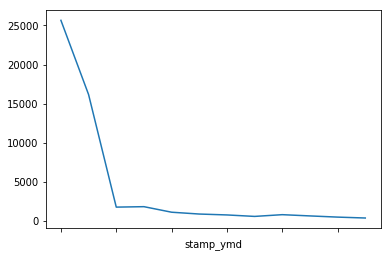

In [6]:
df_stamp = df[['stamp_ymd', 'commentCount']]
df_stamp.set_index("stamp_ymd", inplace=True)
df_stamp.groupby('stamp_ymd')['commentCount'].count().plot();

In [7]:
df_stampcount = df_stamp.groupby('stamp_ymd')['commentCount'].count()
!pip3 install pyecharts 
from pyecharts import Line
line = Line("每日评论数变化情况")
line.add("日期", df_stampcount.index, df_stampcount.values,line_opacity=1,line_type='dotted')
line

In [8]:
df_stampmax = df_stamp.groupby('stamp_ymd')['commentCount'].max()
line = Line("评论数增长情况")
line.add("日期", df_stampmax.index, df_stampmax.values,line_opacity=1,line_type='dotted')
line

In [ ]:
import time
import urllib.request
import random

filename = "images/emoji"
for num in range(1000):
    try:
        url = 'http://s1.music.126.net/style/web2/emt/emoji_{}.png'.format(num)
        path = filename + "/" + "emoji_{}.png".format(num)
        urllib.request.urlretrieve(url, path)
        print(num, url)
        if i/20:
           time.sleep(random.randint(0,1)) # 放缓爬取速度
    except:
        print('Error {}'.format(num))

In [9]:
import re
s = '最适合无聊的夏天无聊的我听[吐舌][色][亲亲]，近一月听到的最佳[赞]（一积分悬赏歌词）[大笑]'
pattern =re.compile(u"\[[\u4e00-\u9fa5]+\]") # [\u4e00-\u9fa5]+ 匹配中文 # \[ \] # 分别匹配左右中括号
result=re.findall(pattern,s)
print(result)

['[吐舌]', '[色]', '[亲亲]', '[赞]', '[大笑]']


In [10]:
def find_emoji(comment):
    pattern =re.compile(u"\[[\u4e00-\u9fa5]+\]")
    result=re.findall(pattern,comment)
    return result
df['emojis_list'] = df['comment'].apply(find_emoji)
df.head(2)

Unnamed: 0  No  page      userID  nickname  comment    commentTime  \
0           0   1     1   428398372       朽静君  @ 皇帝的新衣  1533728620502   
1           1   2     1  1322456683  chub1801    哟，大鹏哥  1533728303029   

                 stamp  likedCount  location     ...       remarkName  \
0  2018-08-08 19:43:40           1       NaN     ...              NaN   
1  2018-08-08 19:38:23           1       NaN     ...              NaN   

                                           beReplied pendantData  \
0                                                 []         NaN   
1  [{'user': {'locationInfo': None, 'vipType': 0,...         NaN   

   expressionUrl  liked   commentId  isRemoveHotComment commentCount  \
0            NaN  False  1208881990               False        51179   
1            NaN  False  1208879999               False        51178   

    stamp_ymd  emojis_list  
0  2018-08-08           []  
1  2018-08-08           []  

[2 rows x 26 columns]

In [11]:
emojis_list = df['emojis_list'].values.tolist()
emojis_list

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['[大笑]', '[大笑]', '[大笑]'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['[大哭]'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['[惊恐]'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['[奸笑]', '[奸笑]'],
 [],
 [],
 [],
 [],
 ['[大哭]'],
 ['[奸笑]', '[奸笑]'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['[大哭]'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['[弱]'],
 ['[拜]', '[拜]'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['[亲亲]', '[亲亲]'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['[大哭]'],
 [],
 ['[奸笑]'],
 [],
 [],
 ['[大哭]'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [

In [12]:
emojis_drop = [emoji for emoji in emojis_list if len(emoji)!=0]
emojis_drop

[['[大笑]', '[大笑]', '[大笑]'],
 ['[大哭]'],
 ['[惊恐]'],
 ['[奸笑]', '[奸笑]'],
 ['[大哭]'],
 ['[奸笑]', '[奸笑]'],
 ['[大哭]'],
 ['[弱]'],
 ['[拜]', '[拜]'],
 ['[亲亲]', '[亲亲]'],
 ['[大哭]'],
 ['[奸笑]'],
 ['[大哭]'],
 ['[公鸡]'],
 ['[撇嘴]', '[撇嘴]', '[撇嘴]', '[撇嘴]', '[撇嘴]', '[撇嘴]', '[撇嘴]'],
 ['[大哭]'],
 ['[大笑]'],
 ['[大哭]'],
 ['[狗]', '[狗]'],
 ['[奸笑]'],
 ['[大笑]'],
 ['[憨笑]'],
 ['[禁止]', '[禁止]', '[圈]', '[圈]'],
 ['[大哭]'],
 ['[大哭]'],
 ['[叉]'],
 ['[可爱]'],
 ['[狗]'],
 ['[大笑]'],
 ['[爱心]'],
 ['[奸笑]'],
 ['[大哭]'],
 ['[大哭]'],
 ['[呆]'],
 ['[呲牙]'],
 ['[大笑]'],
 ['[大哭]', '[大哭]'],
 ['[大哭]', '[大哭]', '[大哭]'],
 ['[大哭]'],
 ['[大笑]'],
 ['[大哭]', '[呆]'],
 ['[爱心]'],
 ['[吐舌]'],
 ['[奸笑]'],
 ['[大哭]'],
 ['[大哭]', '[大哭]'],
 ['[爱心]'],
 ['[大哭]'],
 ['[大哭]'],
 ['[爱心]'],
 ['[发怒]'],
 ['[呆]'],
 ['[奸笑]'],
 ['[大哭]', '[大哭]', '[大哭]'],
 ['[奸笑]'],
 ['[撇嘴]', '[撇嘴]', '[撇嘴]'],
 ['[大笑]'],
 ['[大哭]'],
 ['[奸笑]', '[奸笑]', '[奸笑]'],
 ['[狗]'],
 ['[大哭]'],
 ['[奸笑]'],
 ['[拜]'],
 ['[流感]'],
 ['[大哭]'],
 ['[外星]'],
 ['[大哭]'],
 ['[撇嘴]'],
 ['[可爱]'],
 ['[痛苦]'],
 ['[大哭]'],
 ['[亲亲]'],
 ['[可爱

In [13]:
emojis_droplist = sum(emojis_drop, [])
print(len(emojis_droplist))
print(emojis_droplist)

6143
['[大笑]', '[大笑]', '[大笑]', '[大哭]', '[惊恐]', '[奸笑]', '[奸笑]', '[大哭]', '[奸笑]', '[奸笑]', '[大哭]', '[弱]', '[拜]', '[拜]', '[亲亲]', '[亲亲]', '[大哭]', '[奸笑]', '[大哭]', '[公鸡]', '[撇嘴]', '[撇嘴]', '[撇嘴]', '[撇嘴]', '[撇嘴]', '[撇嘴]', '[撇嘴]', '[大哭]', '[大笑]', '[大哭]', '[狗]', '[狗]', '[奸笑]', '[大笑]', '[憨笑]', '[禁止]', '[禁止]', '[圈]', '[圈]', '[大哭]', '[大哭]', '[叉]', '[可爱]', '[狗]', '[大笑]', '[爱心]', '[奸笑]', '[大哭]', '[大哭]', '[呆]', '[呲牙]', '[大笑]', '[大哭]', '[大哭]', '[大哭]', '[大哭]', '[大哭]', '[大哭]', '[大笑]', '[大哭]', '[呆]', '[爱心]', '[吐舌]', '[奸笑]', '[大哭]', '[大哭]', '[大哭]', '[爱心]', '[大哭]', '[大哭]', '[爱心]', '[发怒]', '[呆]', '[奸笑]', '[大哭]', '[大哭]', '[大哭]', '[奸笑]', '[撇嘴]', '[撇嘴]', '[撇嘴]', '[大笑]', '[大哭]', '[奸笑]', '[奸笑]', '[奸笑]', '[狗]', '[大哭]', '[奸笑]', '[拜]', '[流感]', '[大哭]', '[外星]', '[大哭]', '[撇嘴]', '[可爱]', '[痛苦]', '[大哭]', '[亲亲]', '[可爱]', '[呆]', '[大哭]', '[憨笑]', '[大哭]', '[亲亲]', '[拜]', '[弱]', '[叉]', '[星星]', '[爱心]', '[呆]', '[爱心]', '[奸笑]', '[弱]', '[爱心]', '[呲牙]', '[呲牙]', '[呲牙]', '[强]', '[强]', '[钟情]', '[生病]', '[呆]', '[爱心]', '[爱心]', '[爱心]', '[大笑]', '

In [14]:
emojis_dropset = set(emojis_droplist)
print(len(emojis_dropset))
print(emojis_dropset)

70
{'[兔子]', '[生病]', '[赞]', '[猪]', '[女孩]', '[亲]', '[圈]', '[便便]', '[爱你]', '[幽灵]', '[强]', '[小鸡]', '[泪]', '[拳头]', '[流泪]', '[牵手]', '[加油]', '[开心]', '[示爱]', '[色]', '[爱意]', '[大哭]', '[哀伤]', '[大笑]', '[钟情]', '[禁止]', '[圣诞]', '[撇嘴]', '[奸笑]', '[外星]', '[弱]', '[男孩]', '[爱心]', '[亲亲]', '[憨笑]', '[生气]', '[手动狗头]', '[怒]', '[鬼脸]', '[污]', '[吐舌]', '[嘴唇]', '[跳舞]', '[呲牙]', '[超话]', '[太开心]', '[星星]', '[这边]', '[心碎]', '[作揖]', '[出鞘]', '[发怒]', '[皱眉]', '[公鸡]', '[晕]', '[心]', '[叉]', '[可爱]', '[流感]', '[悲伤]', '[汗]', '[呆]', '[惶恐]', '[拜]', '[惊恐]', '[口罩]', '[狗]', '[钻石]', '[痛苦]', '[憧憬]'}


In [16]:
print(len(emojis_droplist))
from collections import Counter
counter = Counter()
for emoji in emojis_droplist:
    counter[emoji] += 1
print(len(counter))
print(counter.most_common())
y_emojis = []
x_count = []
for emoji, count in counter.most_common():
    y_emojis.append(emoji)
    x_count.append(count)

6143
70
[('[爱心]', 1841), ('[强]', 1122), ('[外星]', 787), ('[大哭]', 354), ('[亲亲]', 266), ('[可爱]', 201), ('[大笑]', 179), ('[流泪]', 171), ('[奸笑]', 136), ('[色]', 134), ('[憨笑]', 87), ('[呆]', 70), ('[狗]', 66), ('[惊恐]', 62), ('[拜]', 54), ('[撇嘴]', 44), ('[呲牙]', 43), ('[汗]', 41), ('[星星]', 34), ('[亲]', 34), ('[弱]', 27), ('[钟情]', 26), ('[吐舌]', 23), ('[便便]', 21), ('[惶恐]', 21), ('[怒]', 19), ('[哀伤]', 17), ('[口罩]', 17), ('[开心]', 17), ('[鬼脸]', 17), ('[痛苦]', 16), ('[发怒]', 13), ('[嘴唇]', 13), ('[心碎]', 12), ('[生病]', 11), ('[心]', 11), ('[跳舞]', 10), ('[禁止]', 9), ('[泪]', 9), ('[公鸡]', 8), ('[叉]', 8), ('[流感]', 8), ('[晕]', 7), ('[生气]', 7), ('[幽灵]', 7), ('[钻石]', 6), ('[圈]', 5), ('[这边]', 4), ('[牵手]', 4), ('[拳头]', 4), ('[示爱]', 3), ('[猪]', 3), ('[爱意]', 3), ('[太开心]', 3), ('[皱眉]', 3), ('[赞]', 3), ('[加油]', 3), ('[圣诞]', 3), ('[兔子]', 2), ('[小鸡]', 2), ('[男孩]', 2), ('[悲伤]', 2), ('[手动狗头]', 1), ('[作揖]', 1), ('[憧憬]', 1), ('[女孩]', 1), ('[污]', 1), ('[爱你]', 1), ('[出鞘]', 1), ('[超话]', 1)]


In [18]:
from pyecharts import Bar
bar = Bar("emoji 使用情况")
bar.add("emoji", y_emojis, x_count, is_stack=True,is_label_show=True,xaxis_interval=0,xaxis_rotate=-90,xaxis_margin=8)
bar

In [33]:
from pyecharts import Bar
bar = Bar("Top10 emoji")
bar.use_theme('dark')
bar.add("emoji", y_emojis[:10], x_count[:10], is_stack=True)
bar

In [21]:
import warnings
warnings.filterwarnings("ignore")
import jieba
import numpy as np
import codecs
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline

all_content = df.comment.values.tolist()
print(len(all_content), '\n', all_content[-1])

51300 
 哇


In [23]:
segment = []
for line in all_content:
    try:
        segs = jieba.lcut(line)
        for seg in segs:
            if len(seg)>1 and seg != '\r\n':
                segment.append(seg)
    except:
        print(line)
        continue
# 去停用词
words_df = pd.DataFrame({"segment": segment})
stopwords_df = pd.read_csv('Chinese_Stopwords.txt',index_col=False, quoting=3,sep="\t",names=['stopwords'], encoding='utf-8') #quoting=3全不引用
words_df = words_df[~words_df.segment.isin(stopwords_df.stopwords)]
words_df.head(20)

segment
0       皇帝
1       新衣
2       大鹏
3      满满的
4       调音
5       大鹏
6      幼稚园
7       杀手
8       觉得
9       普通
11      谢谢
12      补充
13      加油
14      电鳗
15      别骂
16      我点
17      过来
18     吴亦凡
19      节奏
20     太好了

In [38]:
words_stat = words_df.groupby(by=['segment'])['segment'].agg({"计数": np.size})
words_stat = words_stat.reset_index().sort_values(by=["计数"], ascending=False)
main_words_state=words_stat.head(100)
main_words_state

segment    计数
2288          中国  4172
4048          加油  4003
5825          天地  3675
4891         吴亦凡  2848
5014          命运  2837
14512         高考  2714
2090          不行  2652
7602          感觉  2619
1192         skr  2497
13171      路遥知马力  2244
1623          一直  2019
5190          喜欢  1939
10357         爱心  1845
2372          举报  1825
13683         道理  1815
1251        step  1802
6777          希望  1782
12823         说话  1712
8811          明天  1710
10725         电鳗  1655
1944        不好意思  1648
14453         骂人  1640
12197         舞台  1575
11172         知道  1508
816    freestyle  1407
12045         脏字  1382
9794          没有  1338
2092          不要  1322
2756          从不  1268
1125      rapdog  1268
...          ...   ...
5079          哥们   816
13605         选手   815
6061          好多   813
3804          初心   811
6161         妮妮们   803
5258          嘴里   802
1974          不忘   801
10952        看不惯   799
14248         韵脚   796
7604          感触   796
10017         淘汰   795
12227         节拍   794
6263          学子   794
1960          不带   793
8258          掌握   792
785         fake   790
8567          整体   790
1408        yeah   789
8378          搭理   789
4138          区别   789
9630        气急败坏   788
14559        麦克风   788
5581          外星   787
1988          不愿   787
13661       逻辑思维   787
9449          歌有   786
6631          尽量   786
11565        粤语歌   786
13538         连虎   786
11488         答题   786

[100 rows x 2 columns]

In [53]:
from pyecharts import WordCloud
wordcloud = WordCloud(width=800, height=520)
wordcloud.add("51300余条评论生成的词云", main_words_state['segment'], main_words_state['计数'], word_size_range=[20, 100])
wordcloud